# Section one - Data Analysis and Comprehension

# 0. Imports 

In [82]:
import warnings
import pandas                  as pd
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from matplotlib                import pyplot as plt
from IPython.core.display      import HTML
  
from sklearn.model_selection   import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing     import LabelEncoder, PolynomialFeatures
from sklearn.ensemble          import RandomForestRegressor
from sklearn                   import linear_model
from sklearn                   import metrics
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, RFE, RFECV
from sklearn.svm               import SVR



warnings.filterwarnings('ignore') 

# 0.1. Helper Functions

In [83]:
# --- Jupyter Notebook Settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [84]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.2. Loading Data

In [85]:
df_raw = pd.read_csv('C:/Users/Cidones/Desktop/house_rocket_project/kc_house_data.csv')

    1. Identify peek at your data
    2. Dimensions of your data
    3. Data Type for each attribute
    4. Descriptive Statistics
       4.1 Central tendency
            4.1.1 Mean, Median, Mode
       4.2 Dispersion

# 1.0. Data Preparation


## 1.1 Rename Attributes


In [86]:
df1 = df_raw.copy()
df1.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875  20141209T000000  604000.0         4       3.00         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4  1954400510  20150218T000000  510000.0         3       2.00         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503

In [87]:
#new columns name
#new_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'area_living', 'area_lot', 'floors' 'waterfront', 'house_view', 'house_condition', 'house_grade', 'area_above', 'area_basement', 'year_built', 'year_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
#rename 
#df1.columns = new_cols 
# ERROR

## 1.2. Format of Attributes

In [88]:
df1.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [89]:
df1['bathrooms'] = np.round(df1['bathrooms'], 1)

#convert date from string to datetime64
df1['date'] = pd.to_datetime( df1['date'])

df1.head()

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0         3        1.0         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192 2014-12-09  538000.0         3        2.2         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400 2015-02-25  180000.0         2        1.0          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875 2014-12-09  604000.0         4        3.0         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4  1954400510 2015-02-18  510000.0         3        2.0         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503

In [90]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# 2.0. Describe Data

In [91]:
 df2 = df1.copy()

## 2.1. Data Dimensions

In [92]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Columns: {}'.format ( df2.shape[1] ) )

Number of Rows: 21613
Number of Columns: 21


## 2.2. Data Type Attributes


In [93]:
print(df2.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


## 2.3. Number of NA

In [94]:
df2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [96]:
#Drop id and date columns 
#df2 = df2.drop(['id', 'date'], axis=1)

## 2.4. Descriptive Statistics

In [97]:
#separate the categorical from numerical features
num_attributes  = df2.select_dtypes( include = ['int64', 'float64', 'datetime64'] )
cat_attributes = df2.select_dtypes( exclude = ['int64', 'float64', 'datetime64'] )

print( 'Num of Categorical : {}'.format( cat_attributes.shape[1]) )
print( 'Num of Numerical: {}'.format( num_attributes.shape[1] ) )

Num of Categorical : 0
Num of Numerical: 21


## 2.4.1 Central Tendency and Dispersion


###### 2.4.1.1. Numerical Attributes


In [98]:
#Measure of Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( median ) ).T
ct3 = pd.DataFrame( num_attributes.apply( lambda x: x.mode() ) )

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T


m = pd.concat( [ct1, ct2, ct3, d1, d2, d3, d4, d5, d6] ).T.reset_index()
print(m)
m.columns = ['attributes', 'mean', 'median', 'mode', 'standard_deviation', 'min', 'max', 'range', 'kurtosis', 'skew']


TypeError: ('DatetimeIndex cannot perform the operation mean', 'occurred at index date')

In [99]:
num_attributes.describe().T

count          mean           std           min           25%           50%           75%           max
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06  2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04  3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01
bathrooms      21613.0  2.118808e+00  7.668758e-01  0.000000e+00  1.800000e+00  2.200000e+00  2.500000e+00  8.000000e+00
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02  1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02  5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00  1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00  7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02  1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03  1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04  9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01  4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02 -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02  5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

# EDA - Exploration Data Analysis

## 3.1. Univariate Analysis

In [100]:
df3 = df2.copy()

## 3.1.1. Response Variable

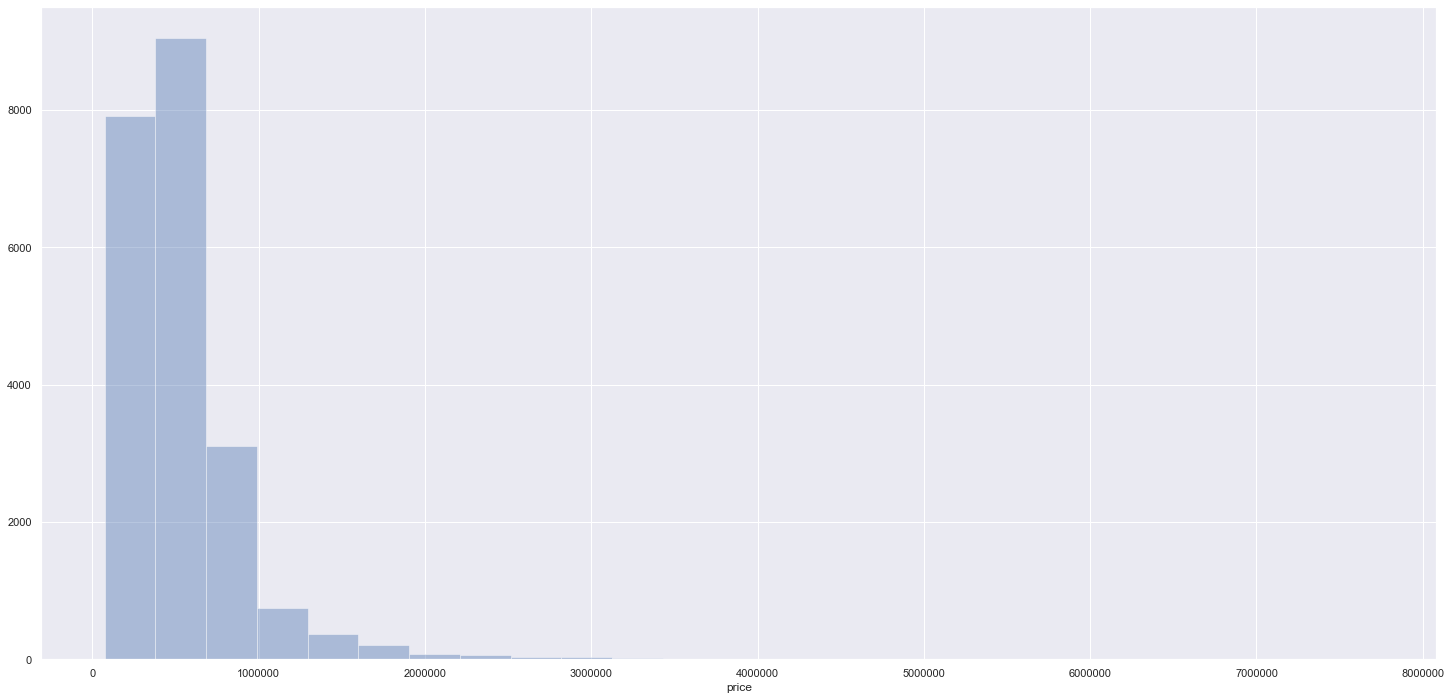

In [101]:
sns.distplot( df3['price'], kde=False, bins=25 );

## 3.1.2. Numerical Predictors

### 3.1.2.1. bedrooms

In [62]:
df3['bedrooms'].mode()

0    3
dtype: int64

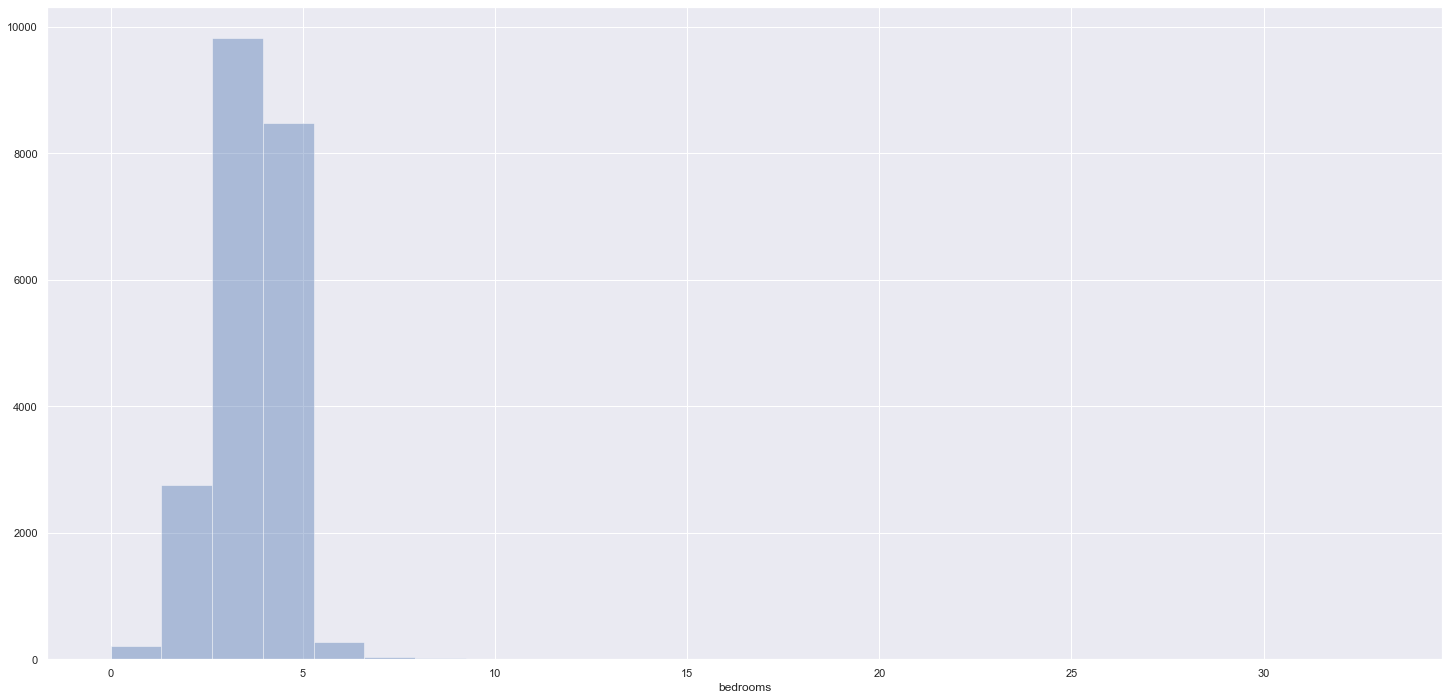

In [63]:
sns.distplot( df3['bedrooms'], kde=False, bins=25 );

### 3.1.2.1. bathrooms

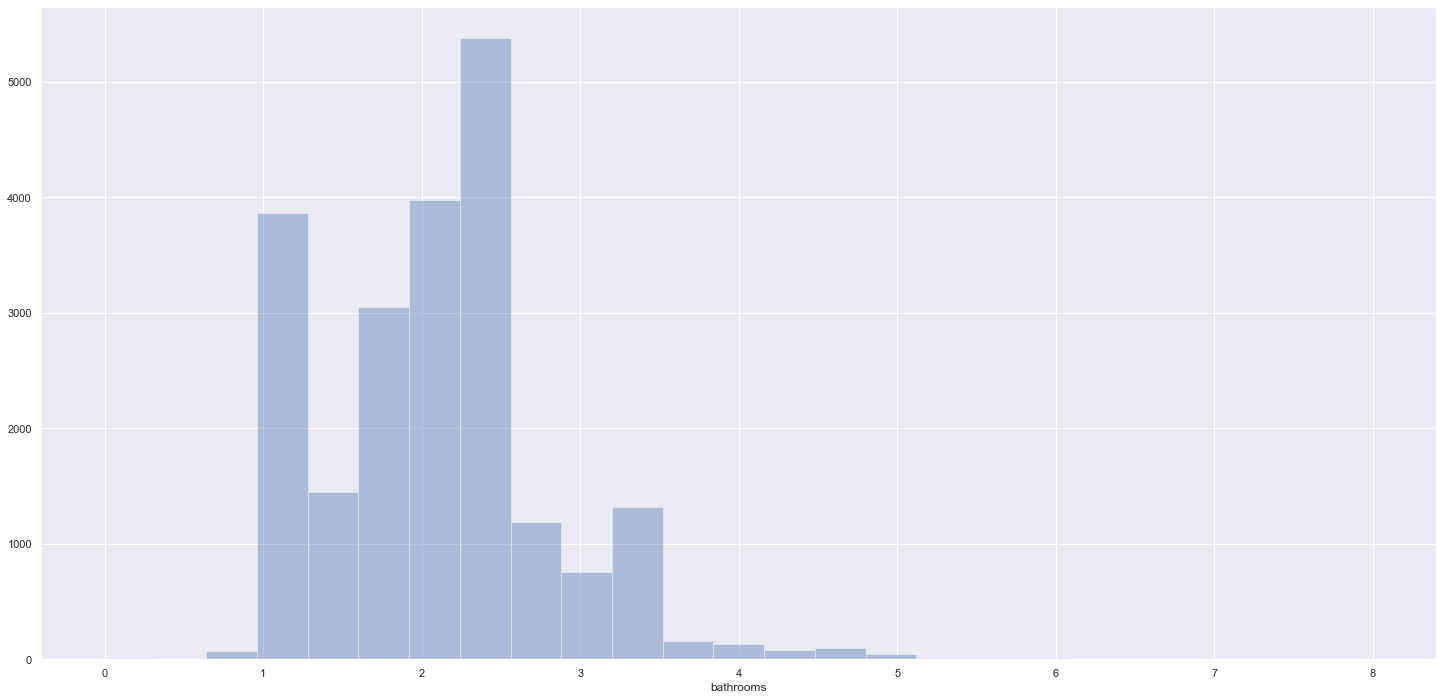

In [64]:
sns.distplot( df3['bathrooms'], kde=False, bins=25 );

### 3.1.2.1. sqft_living

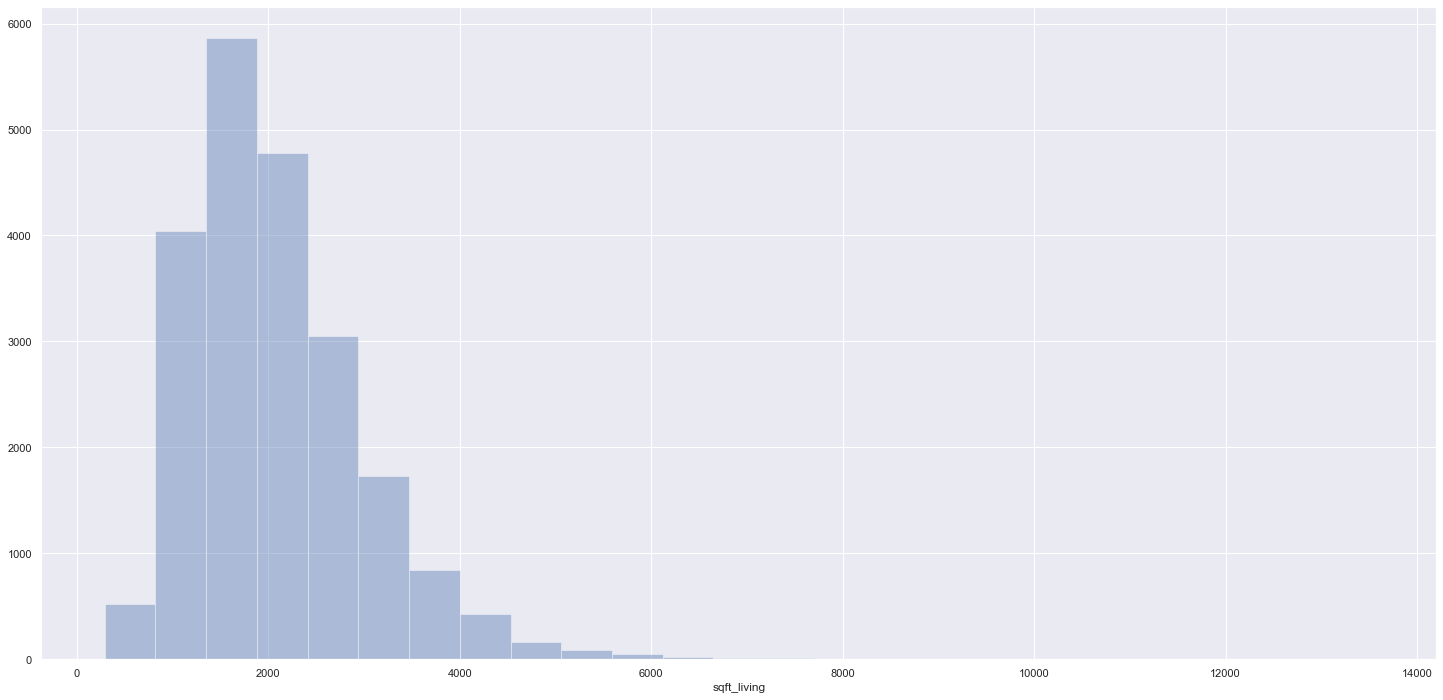

In [65]:
sns.distplot( df3['sqft_living'], kde=False, bins=25 );

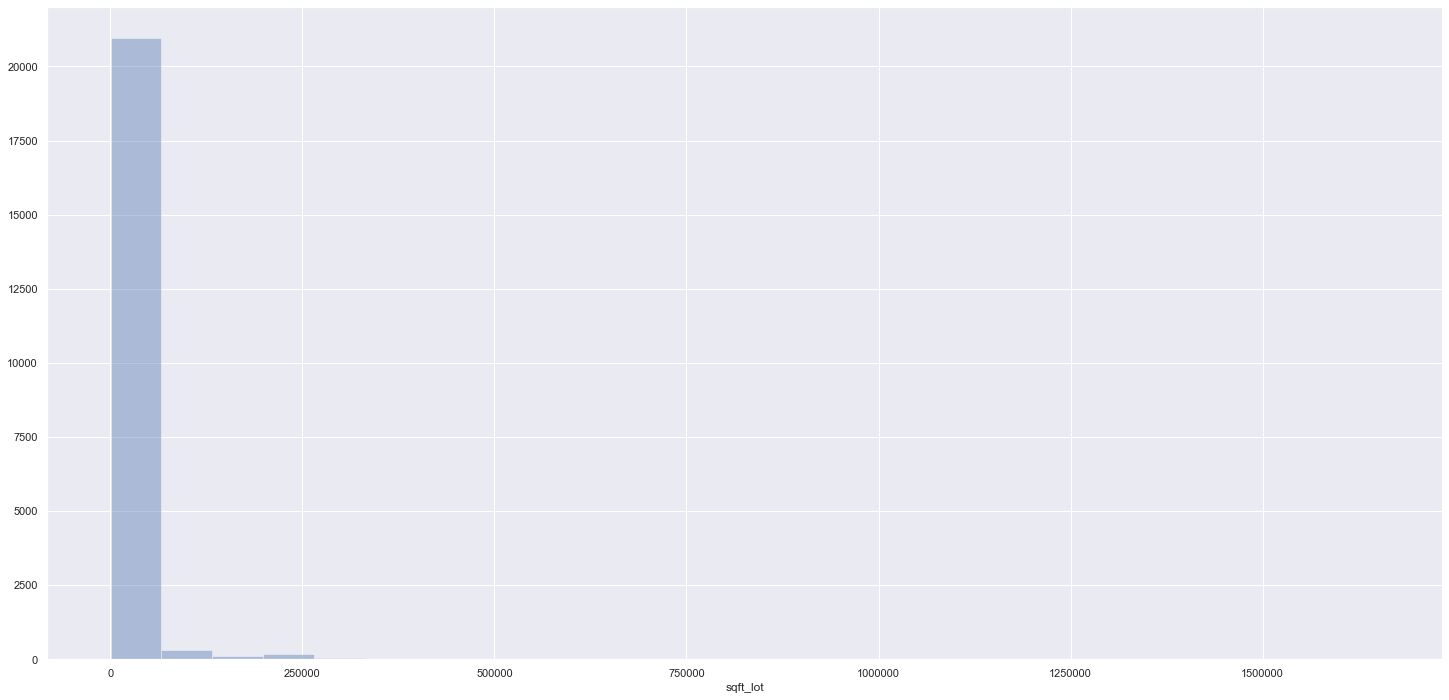

In [66]:
sns.distplot( df3['sqft_lot'], kde=False, bins=25 );

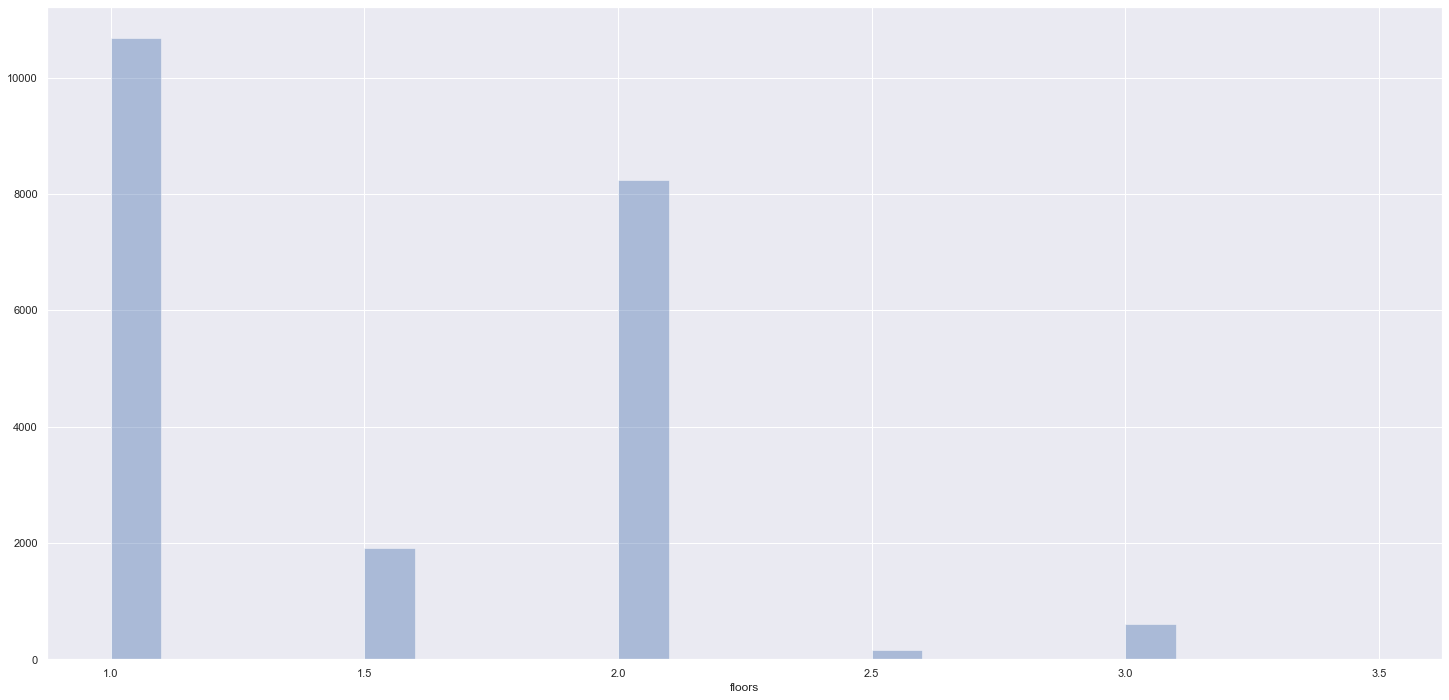

In [102]:
sns.distplot( df3['floors'], kde=False, bins=25 );

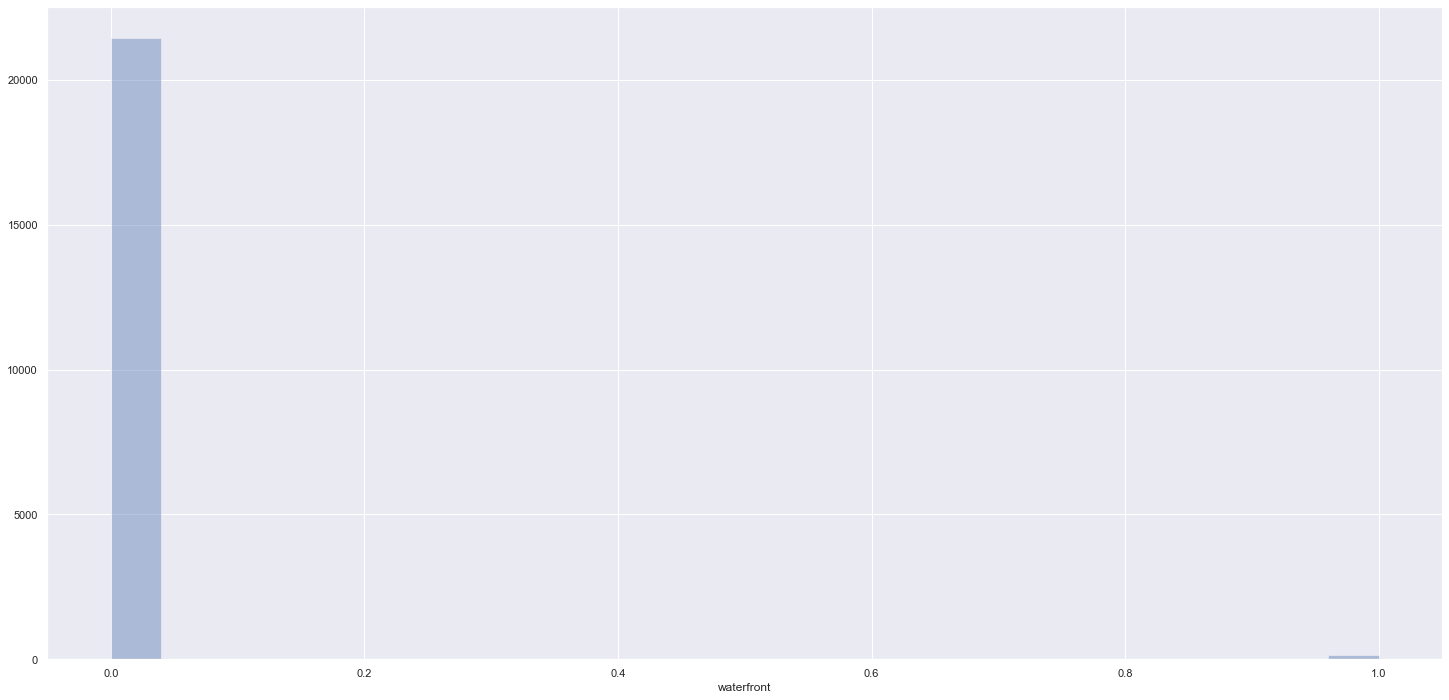

In [68]:
sns.distplot( df3['waterfront'], kde=False, bins=25 );

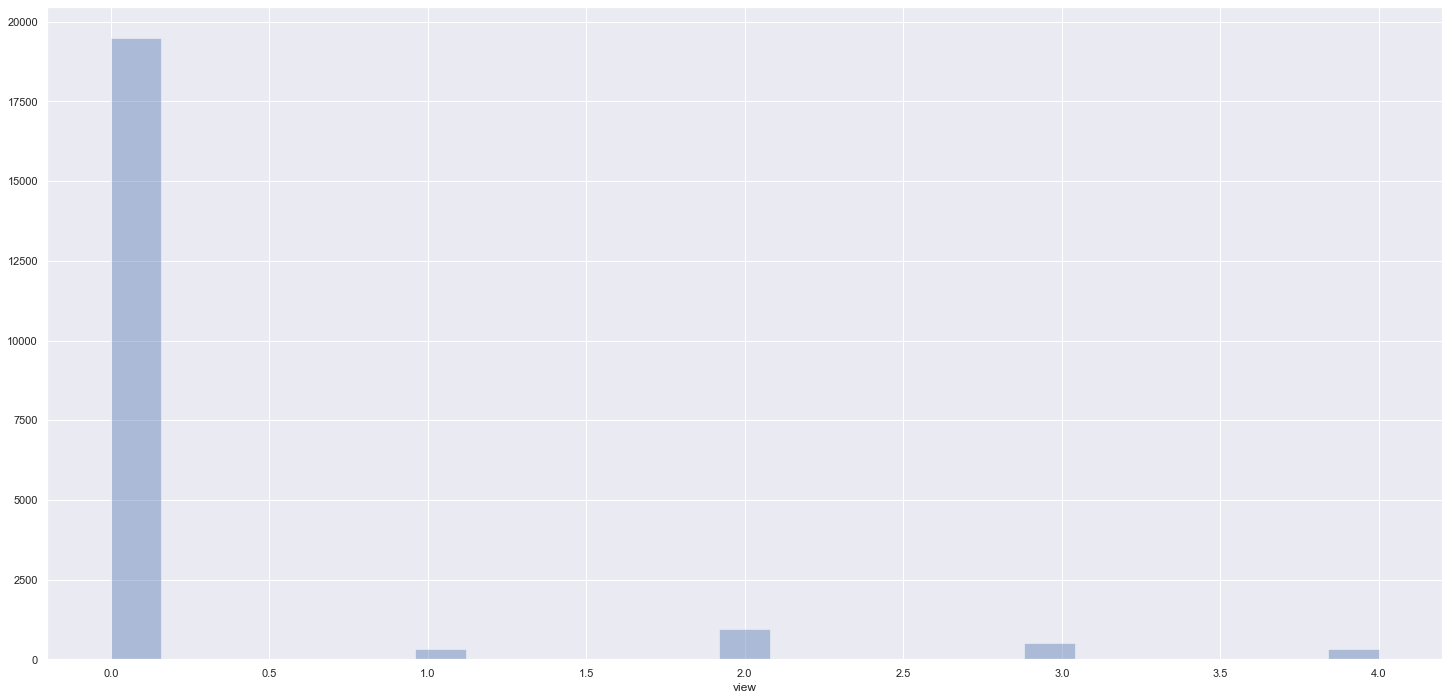

In [69]:
sns.distplot( df3['view'], kde=False, bins=25 );

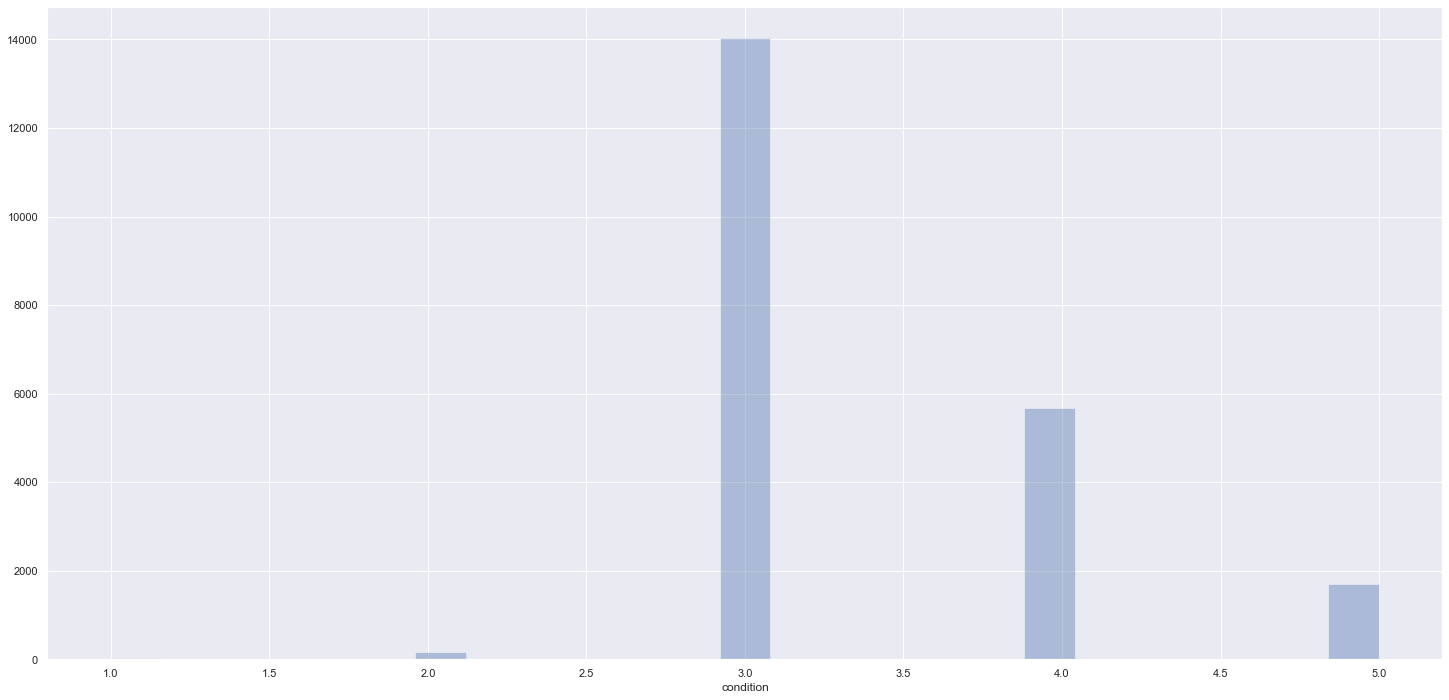

In [70]:
sns.distplot( df3['condition'], kde=False, bins=25 );

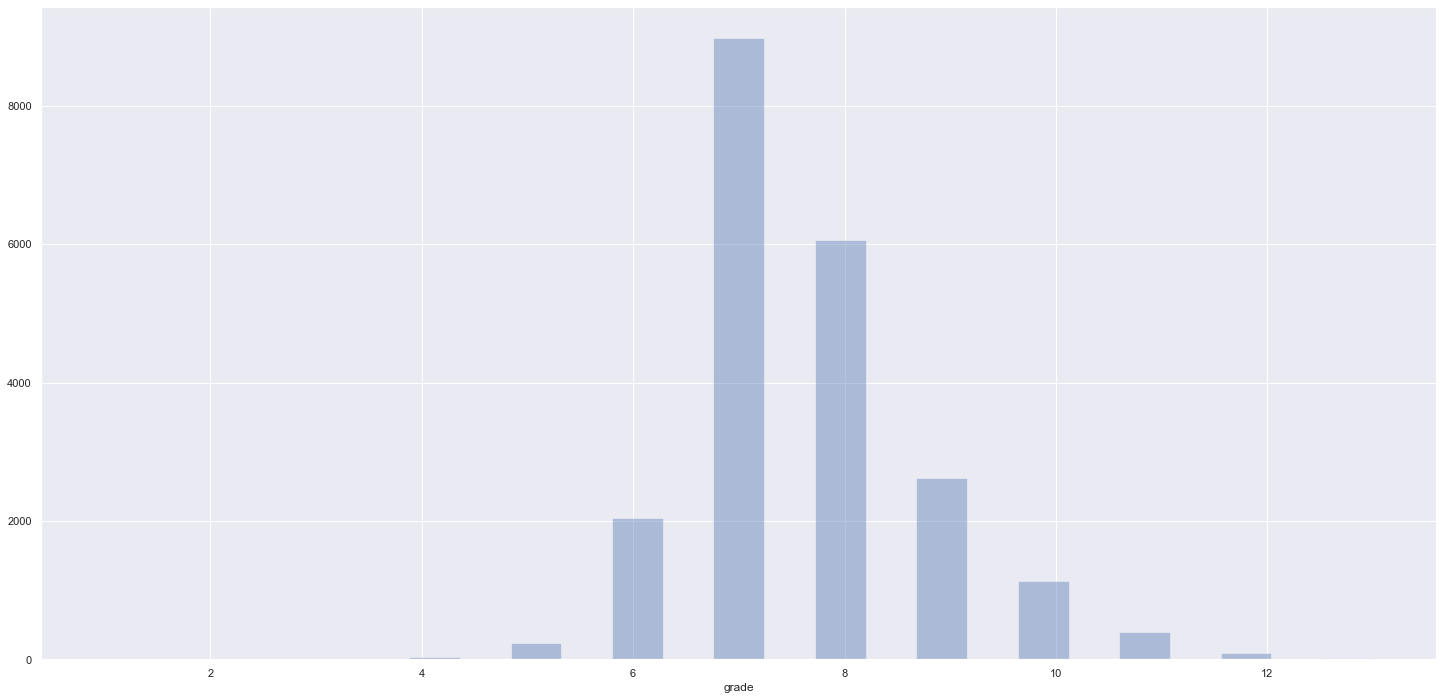

In [71]:
sns.distplot( df3['grade'], kde=False, bins=25 );

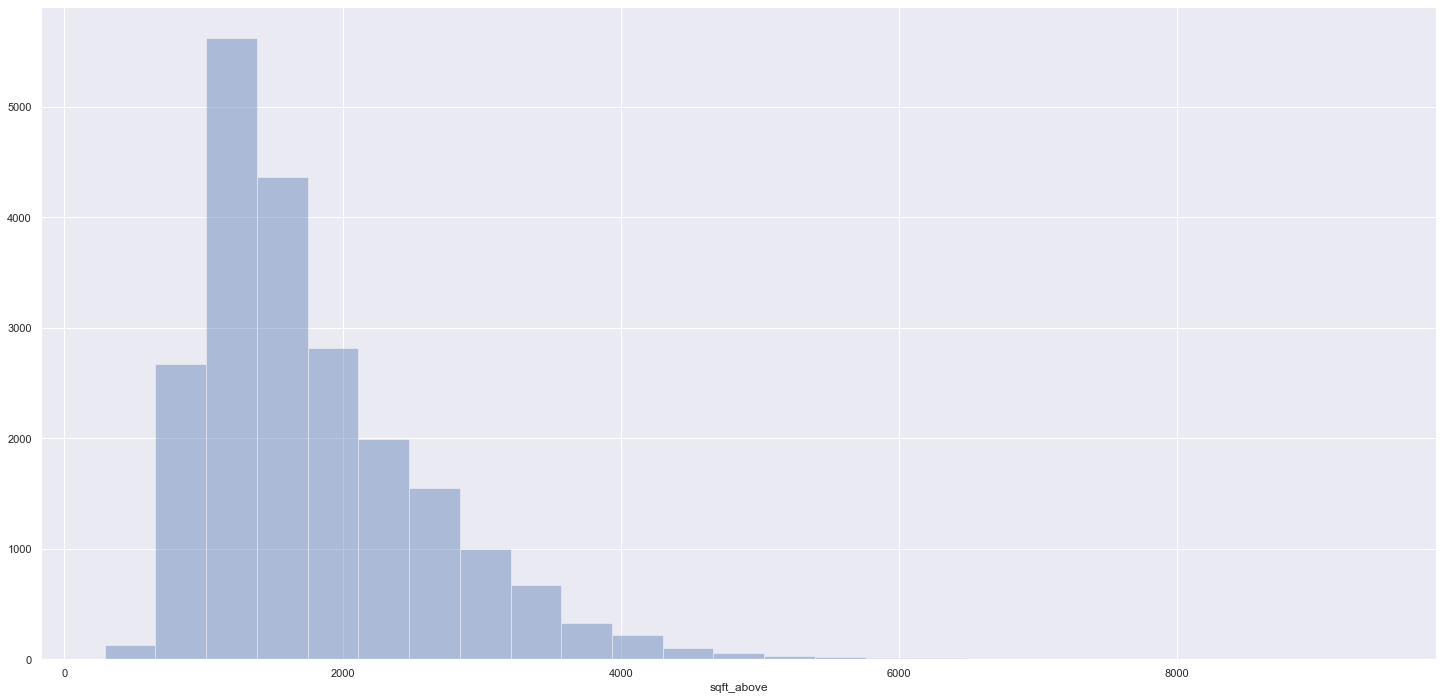

In [72]:
sns.distplot( df3['sqft_above'], kde=False, bins=25 );

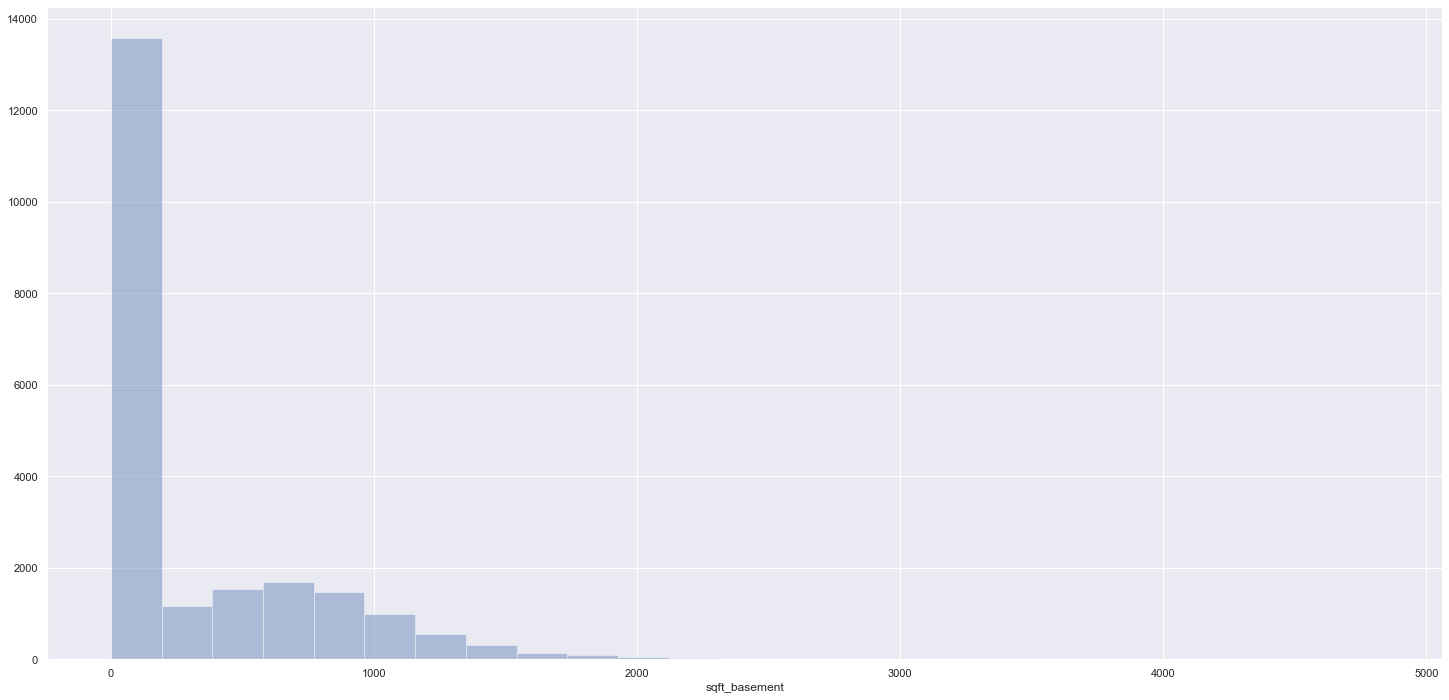

In [73]:
sns.distplot( df3['sqft_basement'], kde=False, bins=25 );

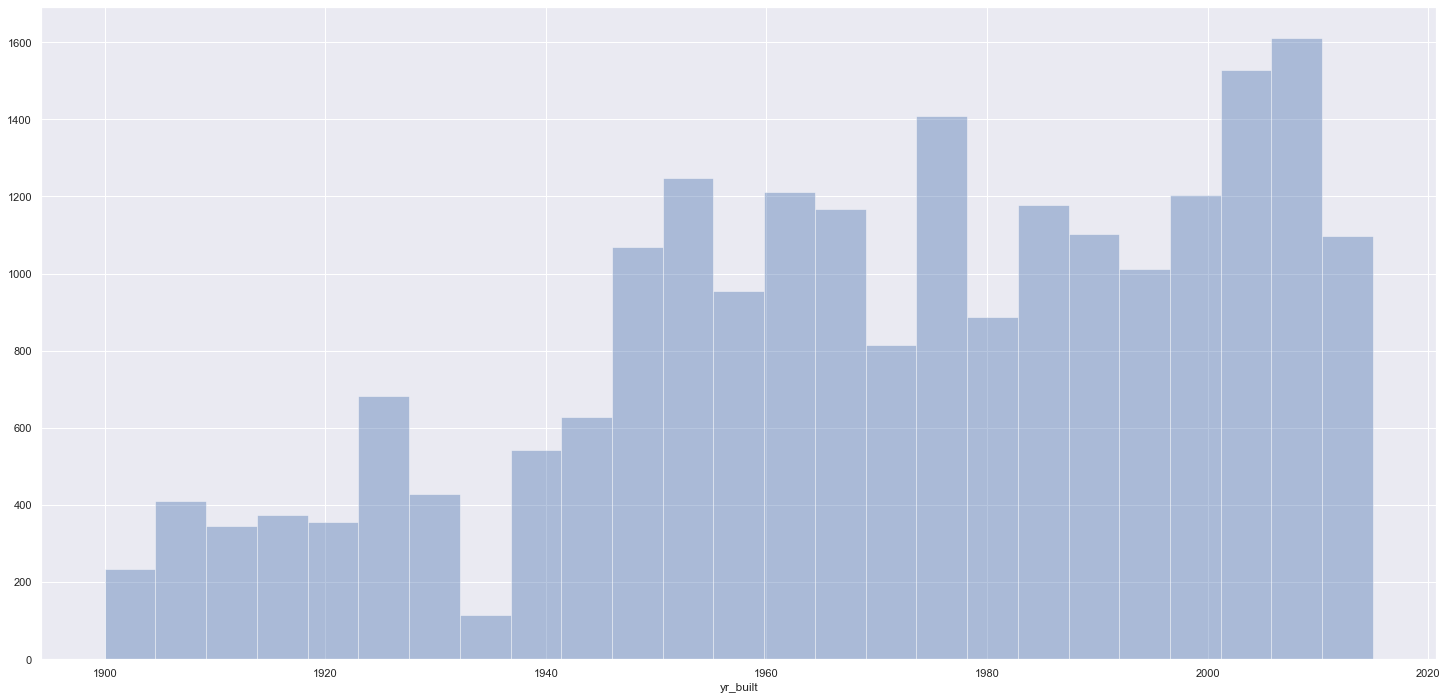

In [74]:
sns.distplot( df3['yr_built'], kde=False, bins=25 );

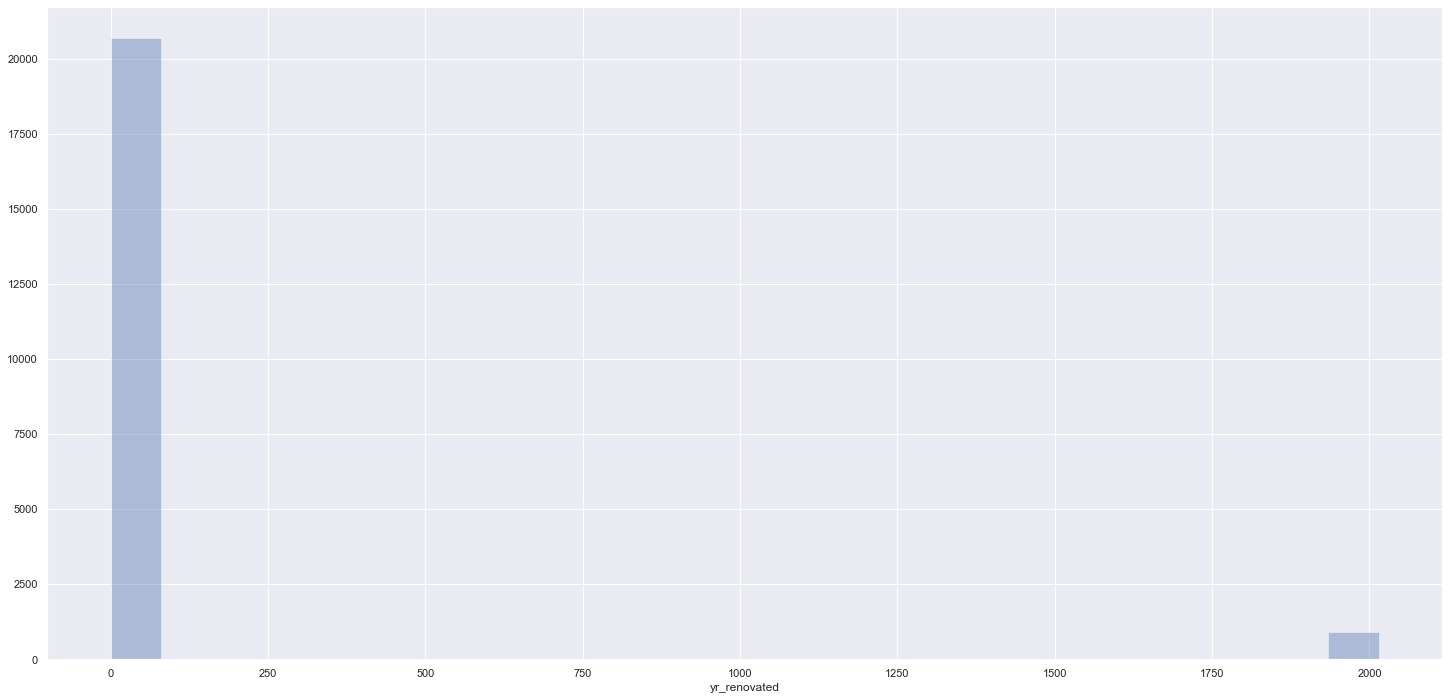

In [75]:
sns.distplot( df3['yr_renovated'], kde=False, bins=25 );

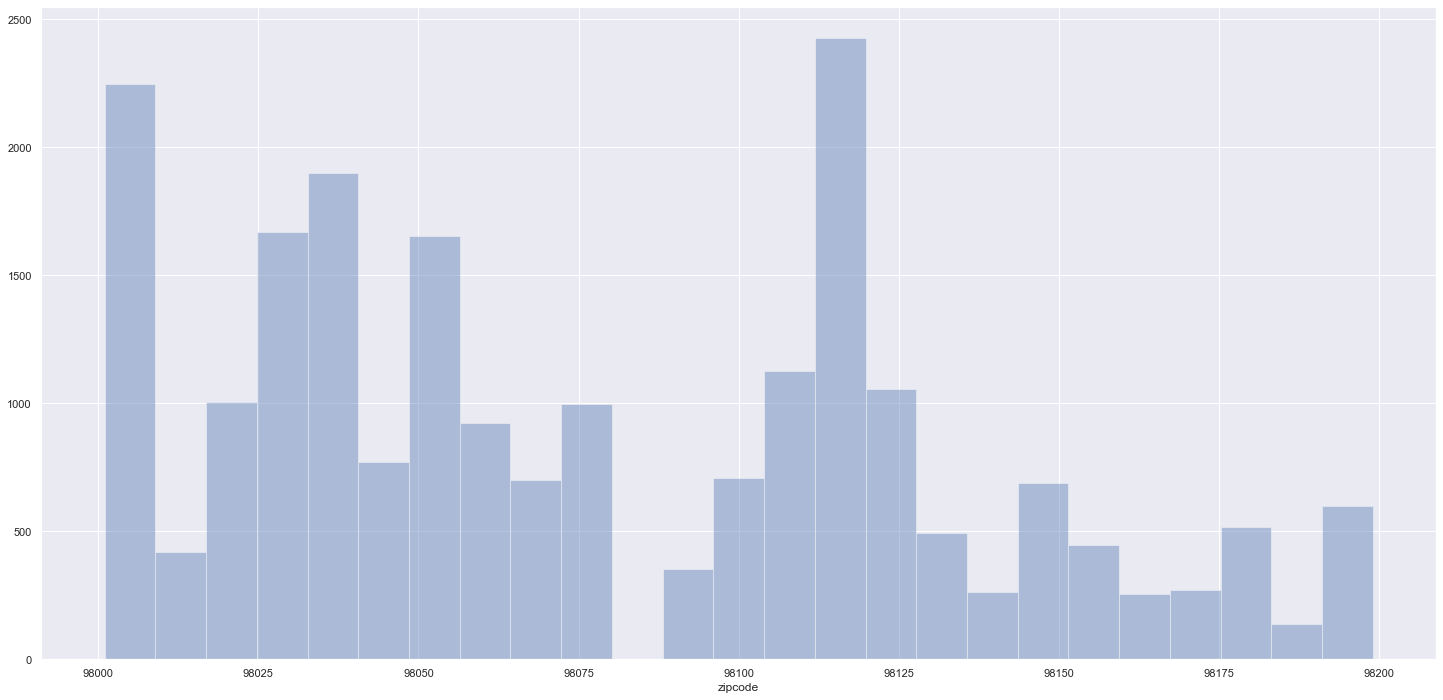

In [76]:
sns.distplot( df3['zipcode'], kde=False, bins=25 );

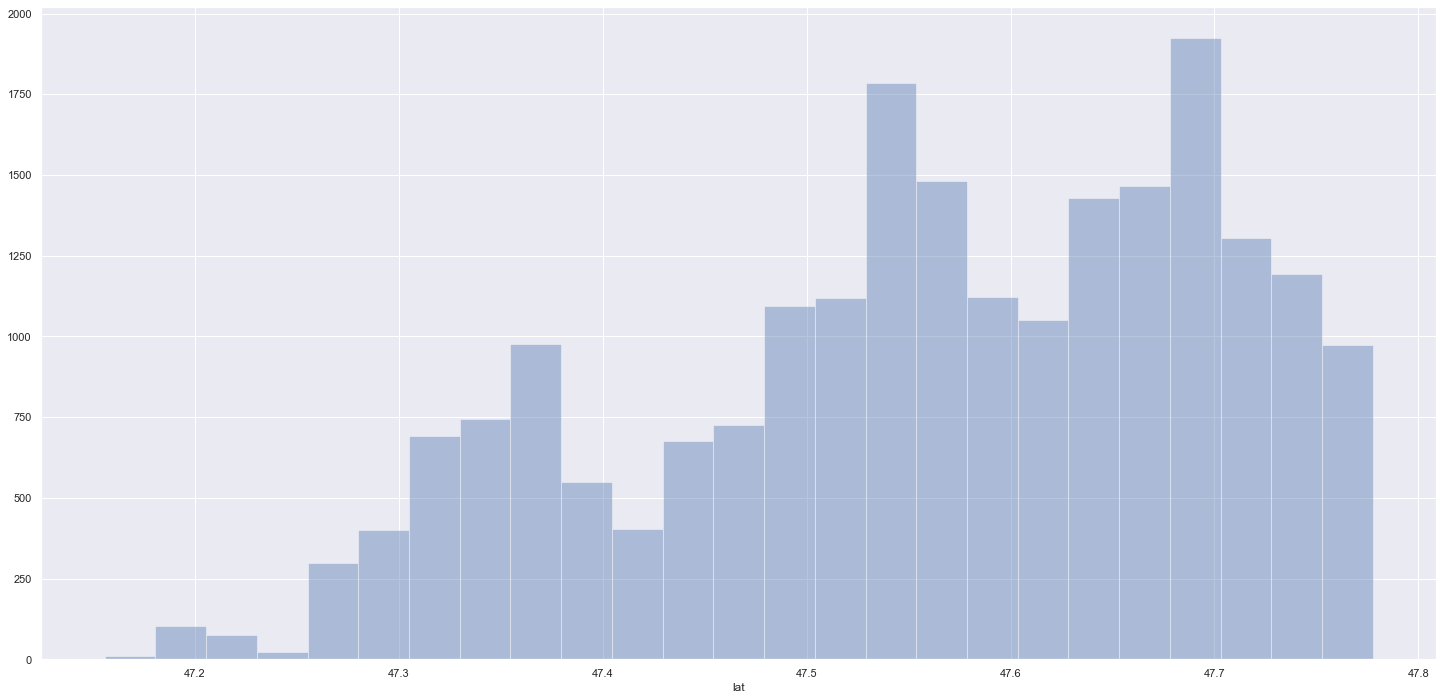

In [77]:
sns.distplot( df3['lat'], kde=False, bins=25 );

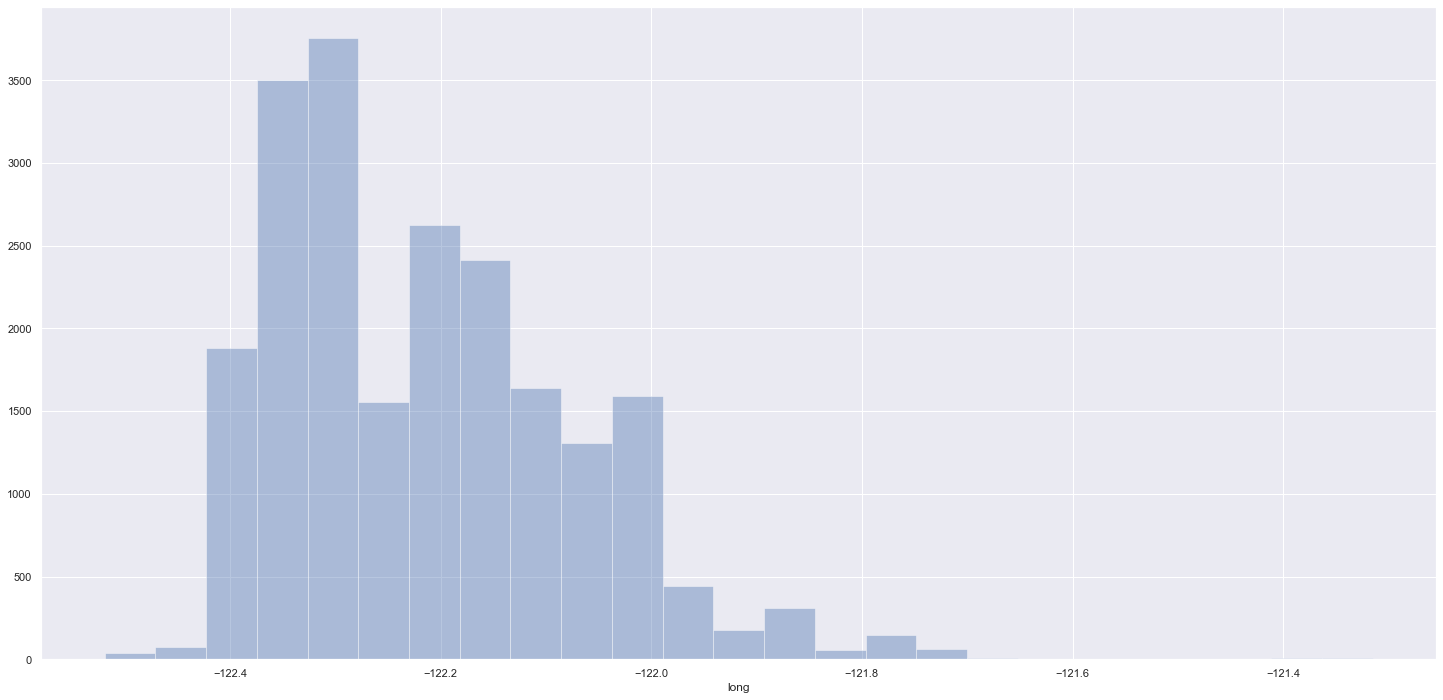

In [78]:
sns.distplot( df3['long'], kde=False, bins=25 );

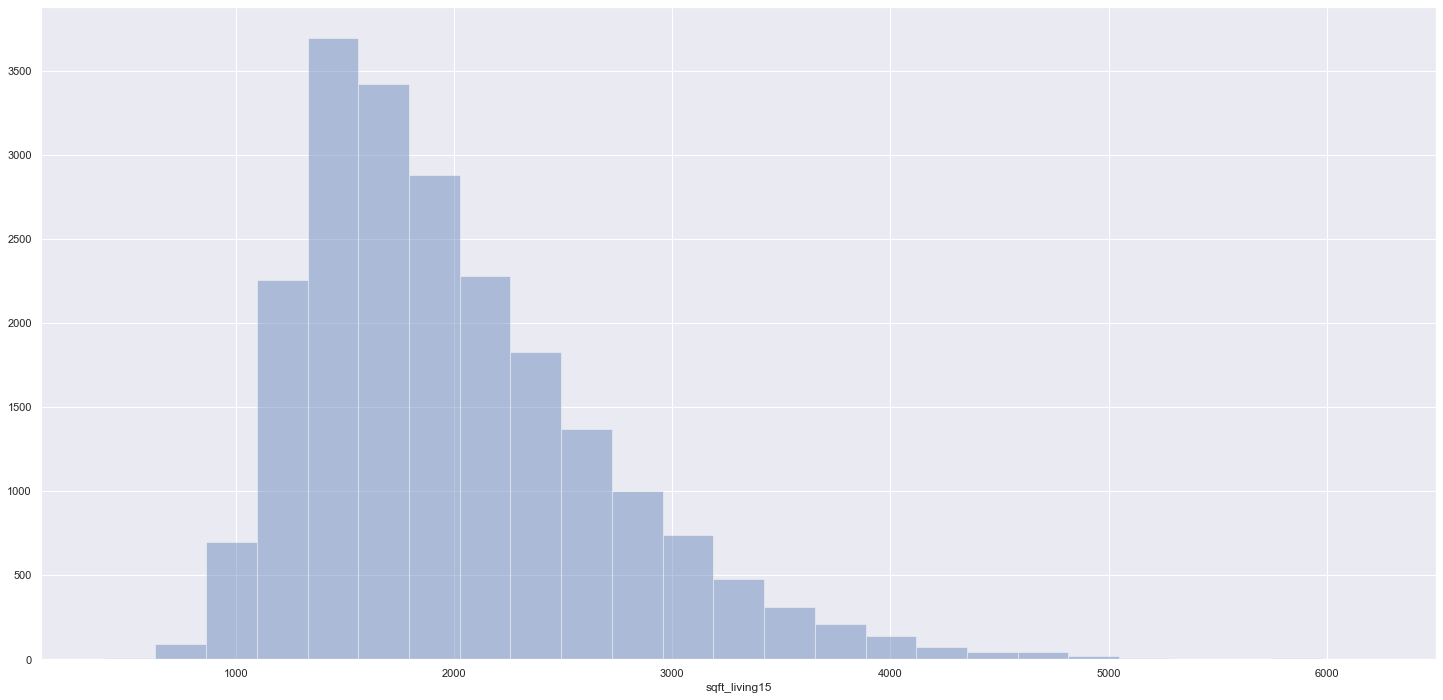

In [79]:
sns.distplot( df3['sqft_living15'], kde=False, bins=25 );

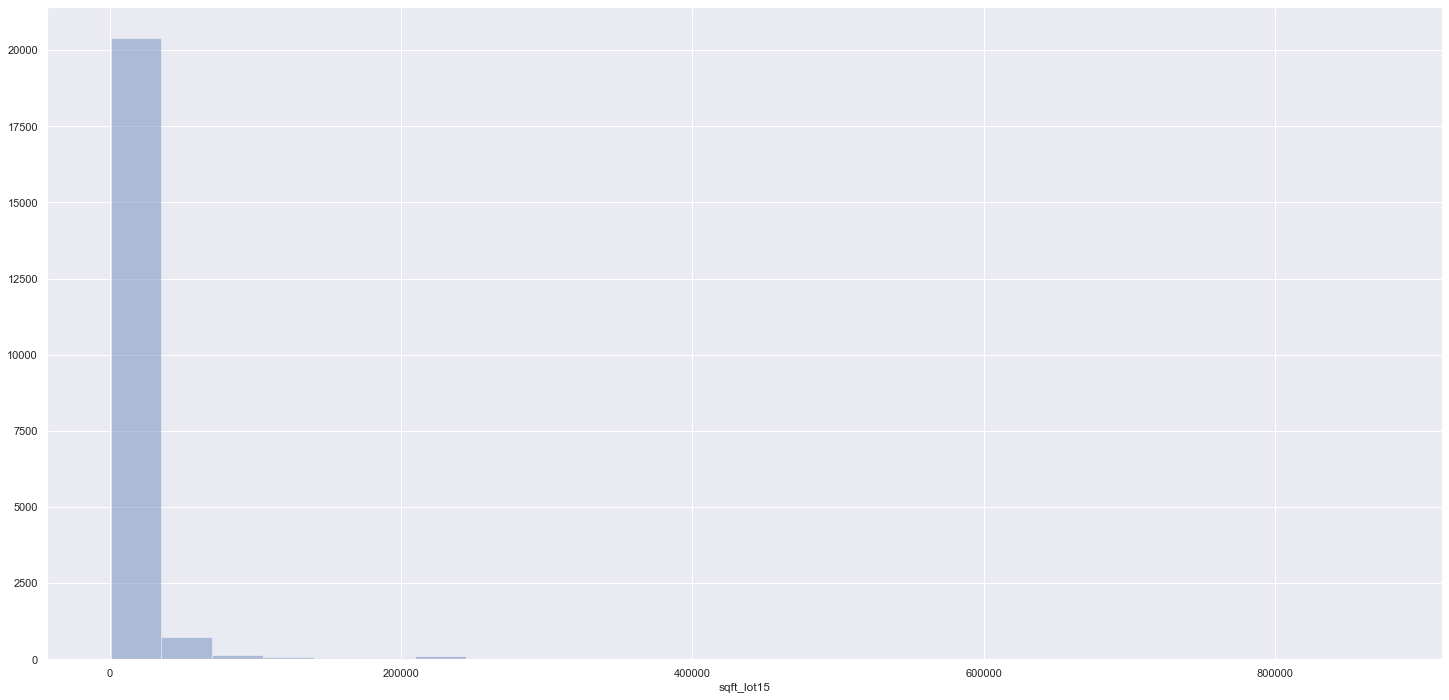

In [80]:
sns.distplot( df3['sqft_lot15'], kde=False, bins=25 );

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

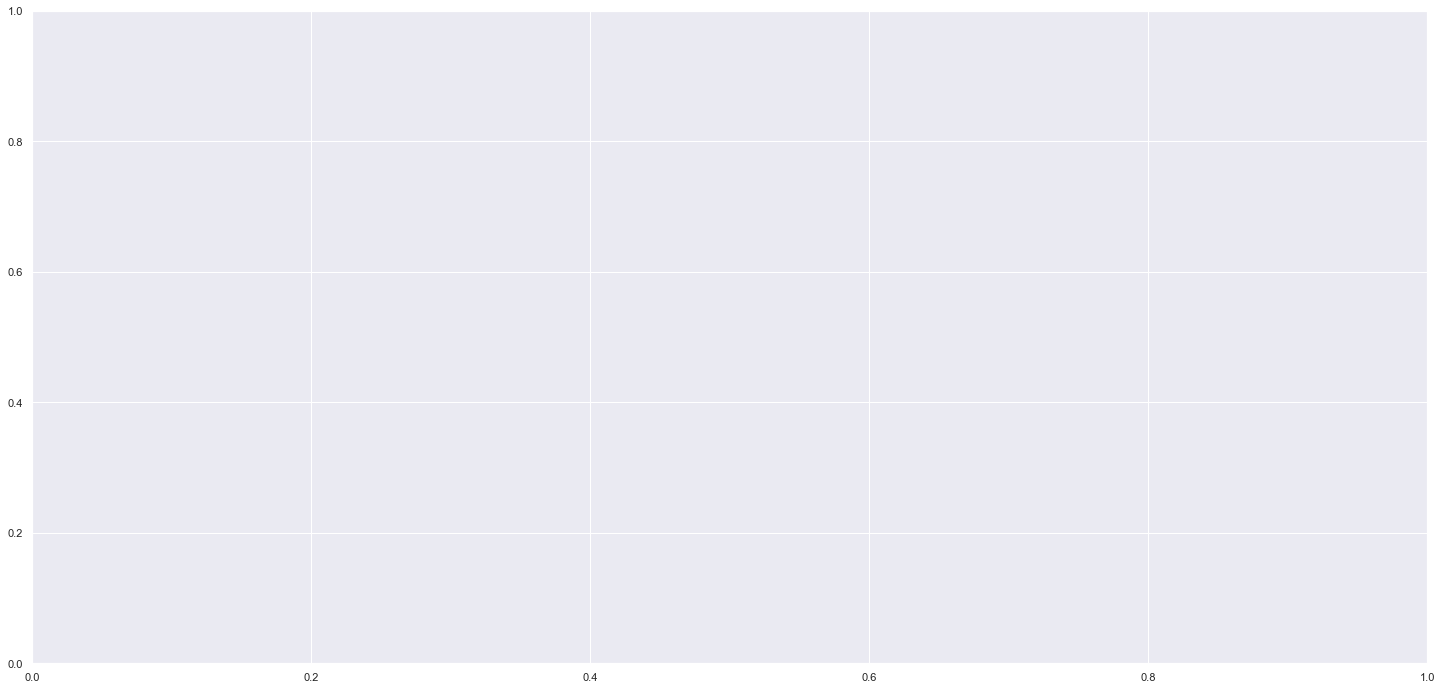

In [81]:
sns.distplot( df3['date'], kde=False, bins=25 );

## 3.2.0. Bivariate Analysis

In [40]:
df3.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875  20141209T000000  604000.0         4       3.00         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4  1954400510  20150218T000000  510000.0         3       2.00         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503

# 3.2.1. Numerical Predictors

### 3.2.1.1. price x bedrooms

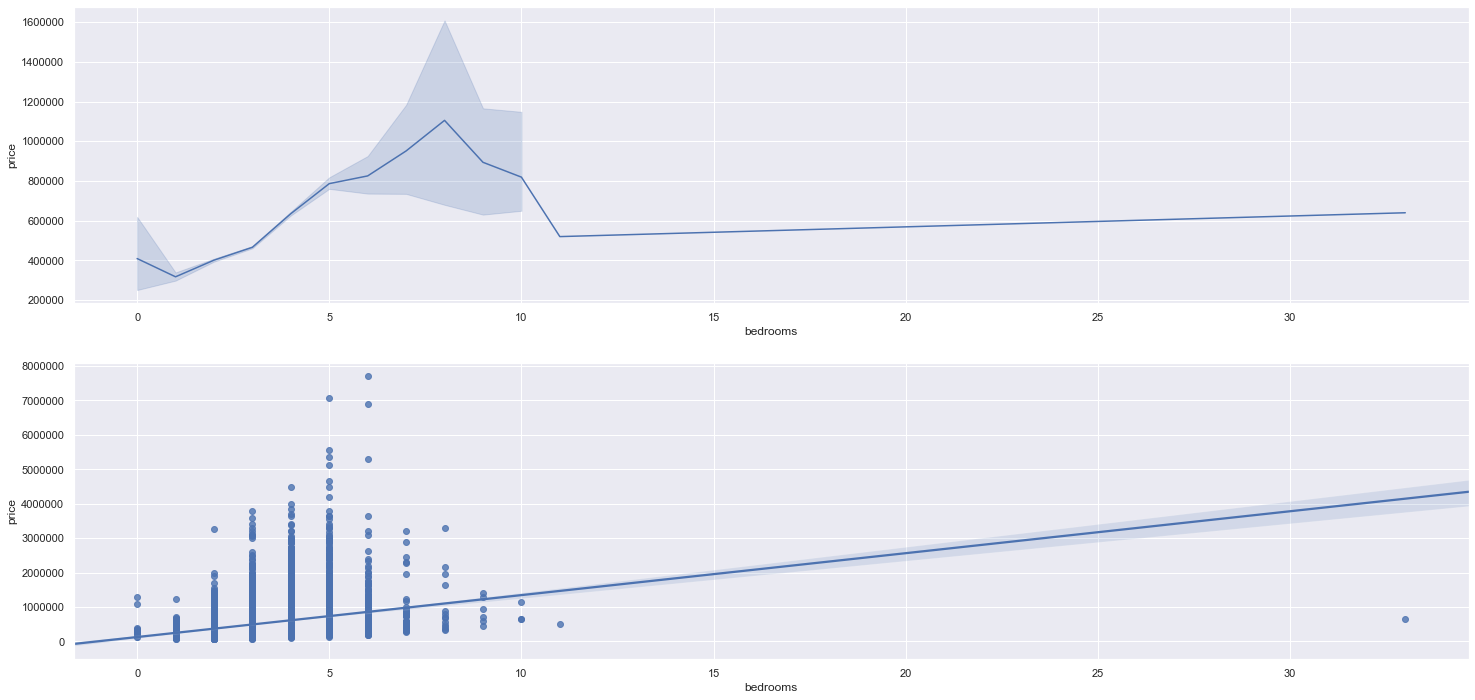

In [31]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='bedrooms', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='bedrooms', y='price', data=df3 );

#Bedrooms Hypothesis 
#Houses with 1+ bedrooms should have cost more because houses with 2+ bedrooms usually cost more than house with only 1 bedroom.
#this Hypothesis is correct, however houses with 8+ bathrooms has decresead and 10+ bathrooms maintain a steady line between $6M to $4m.
#This Graph represents that houses with 2+ bedrooms compared to price, cost is higher and from 5 to 8 bedrooms has a peak price over $1M
#more than around 5 bedrooms reaches a value of  $800k

### 3.2.1.2. price x bathrooms

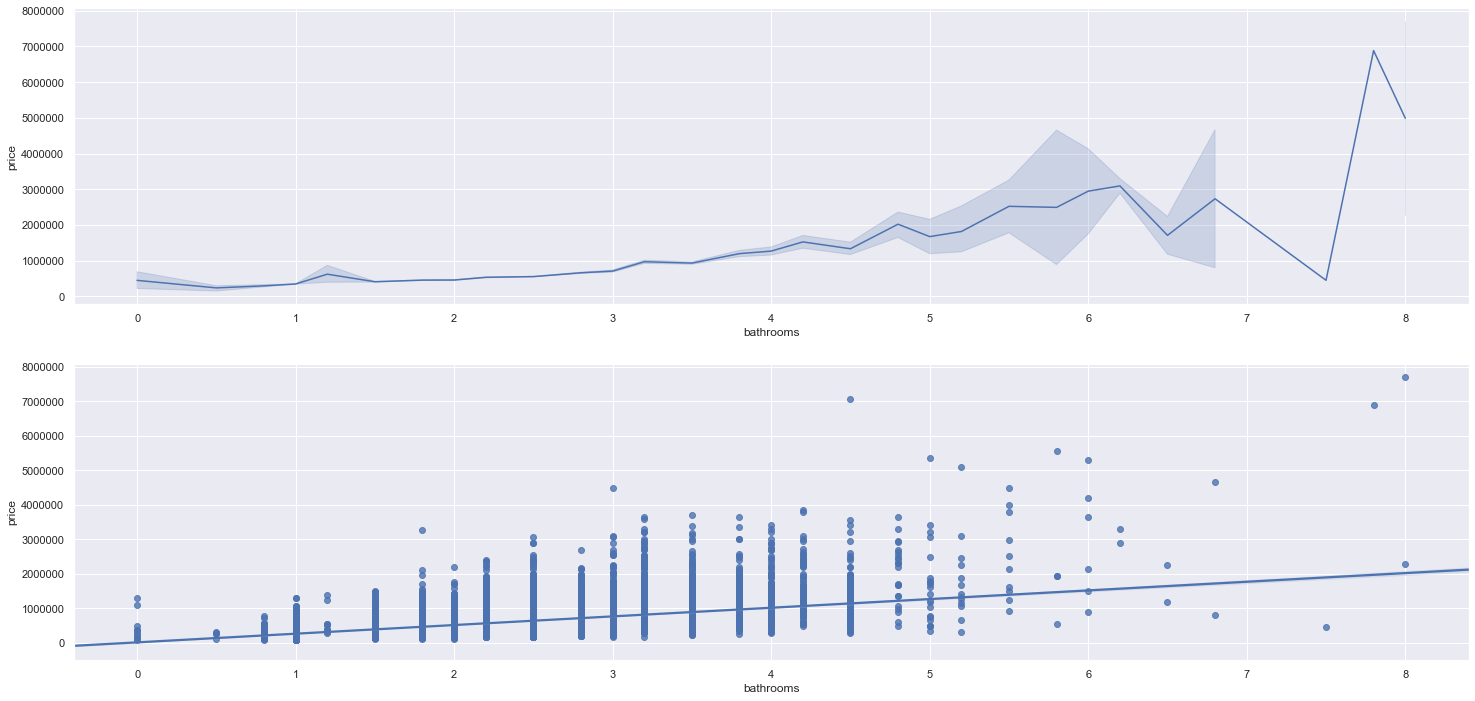

In [32]:
plt.subplot( 2, 1, 1 )
sns.lineplot( x='bathrooms', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='bathrooms', y='price', data=df3);

#Bathrooms Hypothesis
#Houses with 1+ bathrooms should have a higher cost because more bathrooms in a house adds value to it. 
#this hypothesis is correct, however there are a few houses that shows otherwise **investigate**
#This Graph represents that up to 3 bathrooms there is a slightly increase in price 
#4+ bathrooms reaches $1M and more bathrooms vary from $2M to $3M
#There is a case where 7+ bathrooms has a heavy fall in price **important**

### 3.2.1.3. price x sqft_living

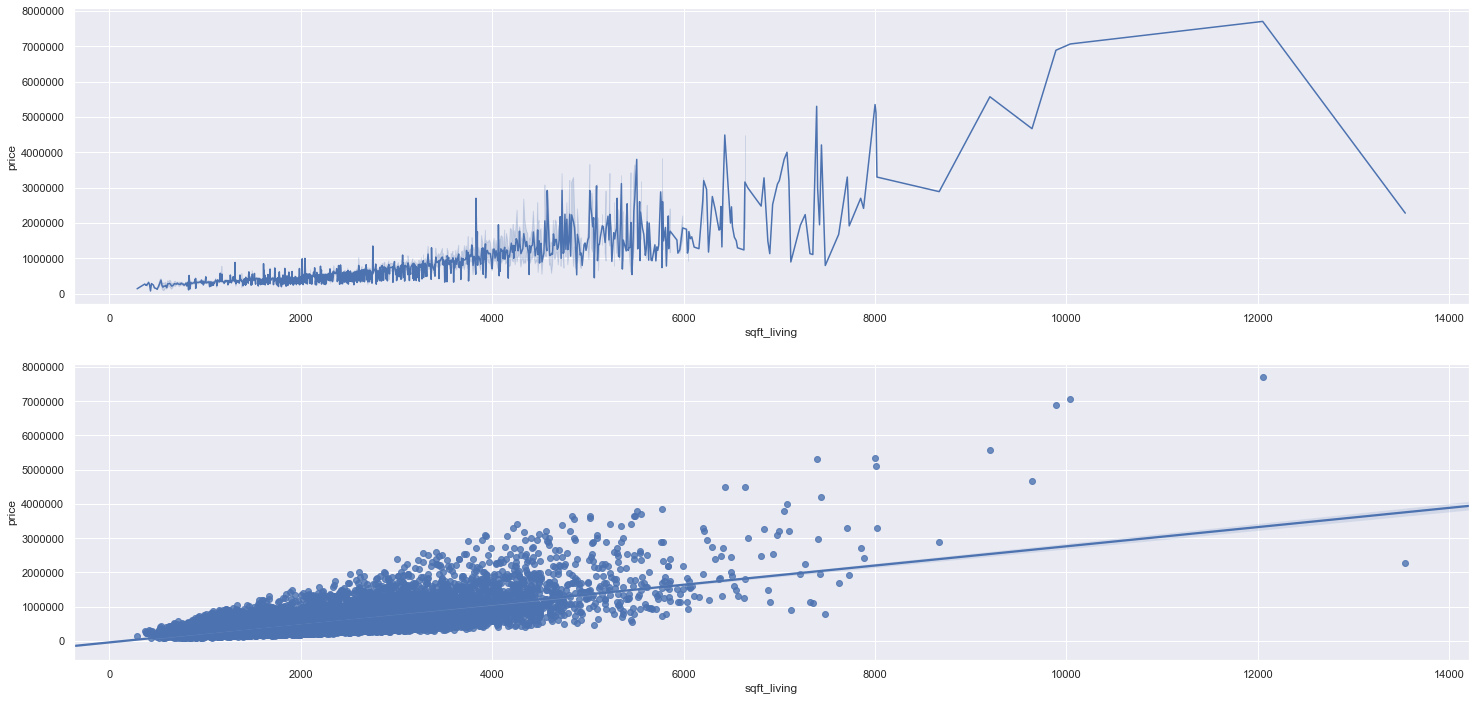

In [29]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_living', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_living', y='price', data=df3 );

#sqft_living Hypothesis
#Houses with higher square footage should have cost more because houses with more space adds more value to it.
#this Hypothesis is incorrect, nonetheless some houses which has bigger size in sqft, other houses in the same range has a price fall.
#This Graph represents that there is a great variance among all sizes of square footage area.
#There are several houses from from 4000 to 8000 sqft below $1M and should be taken into consideration 
#One outlier with almost 14000 sqft below $3M 


### 3.2.1.4. price x sqft_lot

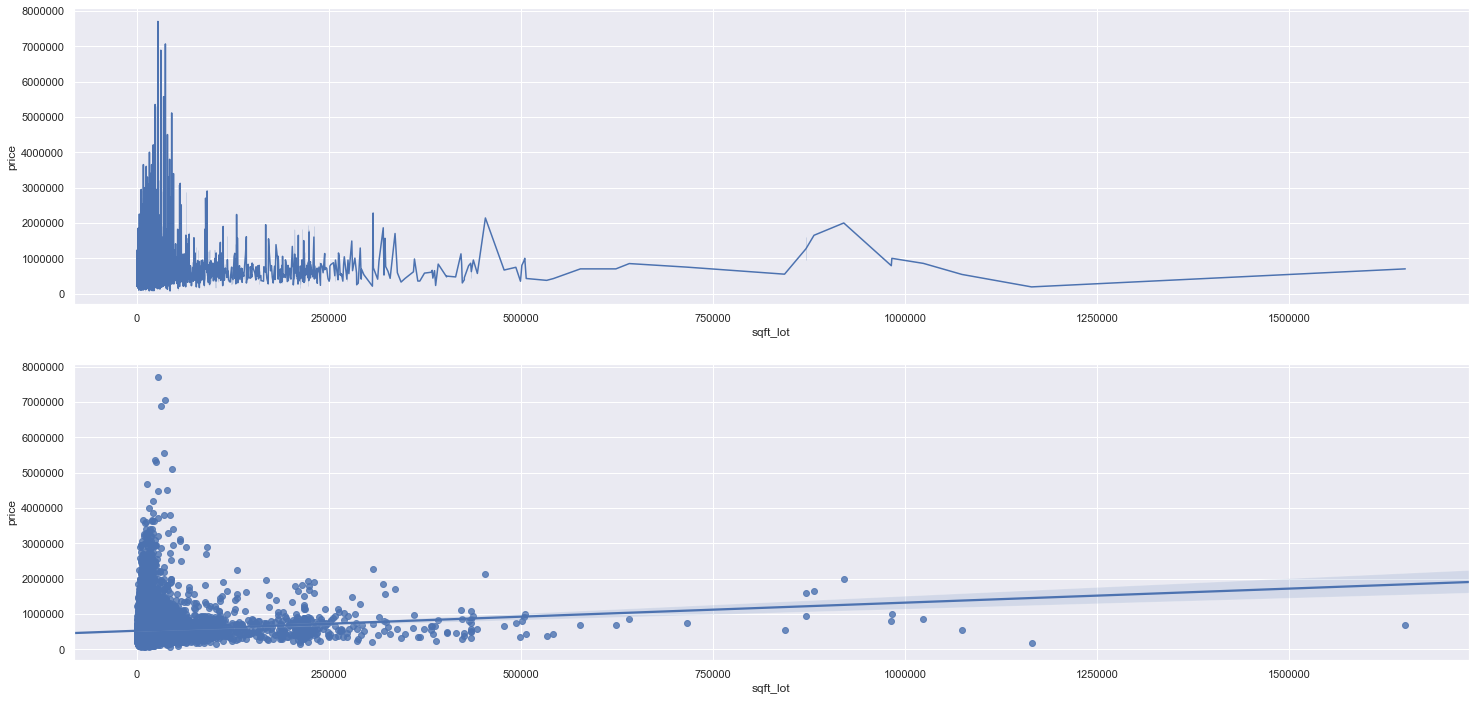

In [30]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_lot', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_lot', y='price', data=df3 );

#sqft_lot Hypothesis
#houses with high square footage of the lot should have cost more because the higher the space it adds more value to it.
#This hypothesis is incorrect, houses with less sqft_lot has higher prices 
#This graph represents that a great number of houses with less than 100 000 ft


### 3.2.1.5. price x floors

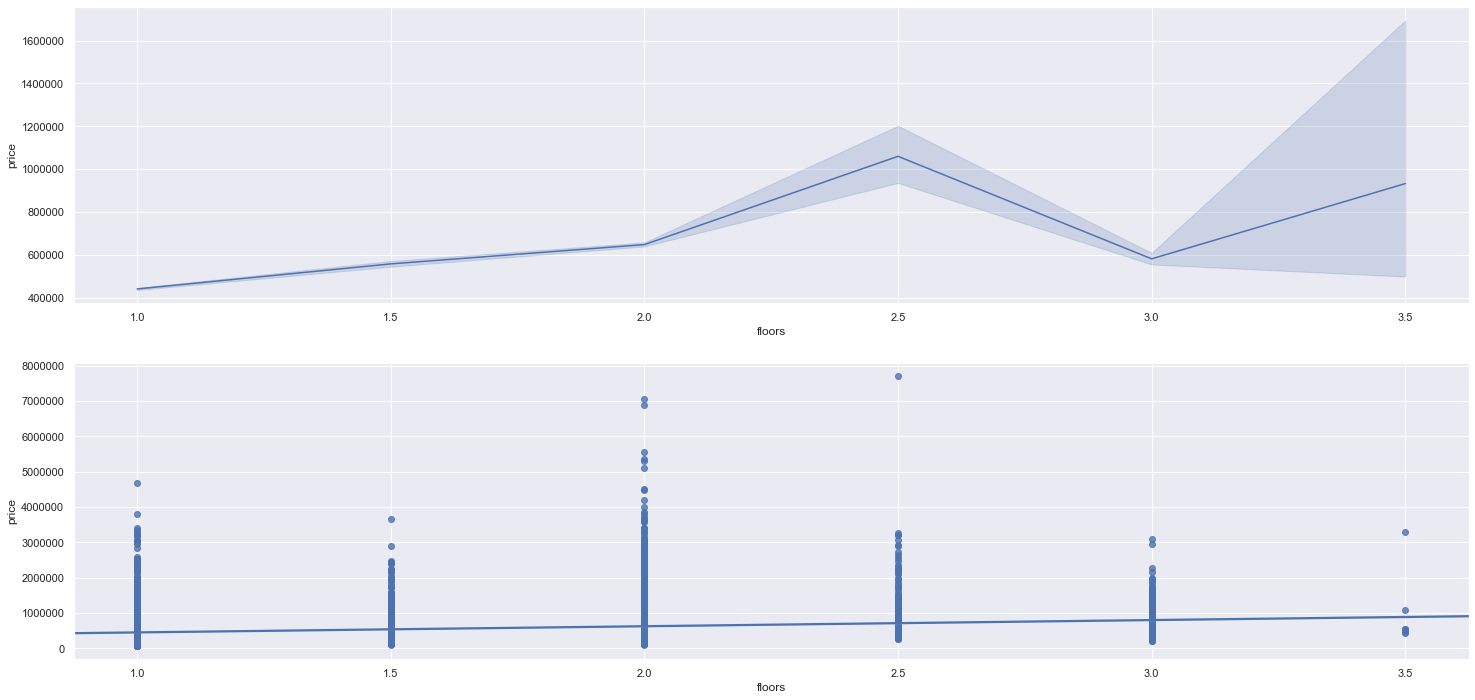

In [38]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='floors', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='floors', y='price', data=df3 );

#Floors hypothesis
#Houses with second floor should have higher cost because another floor adds value to the house.
#this hypothesis is correct, however houses with 3+ floors had their value decreased.
#this graph indicates that houses with 2 floors has higher prices 


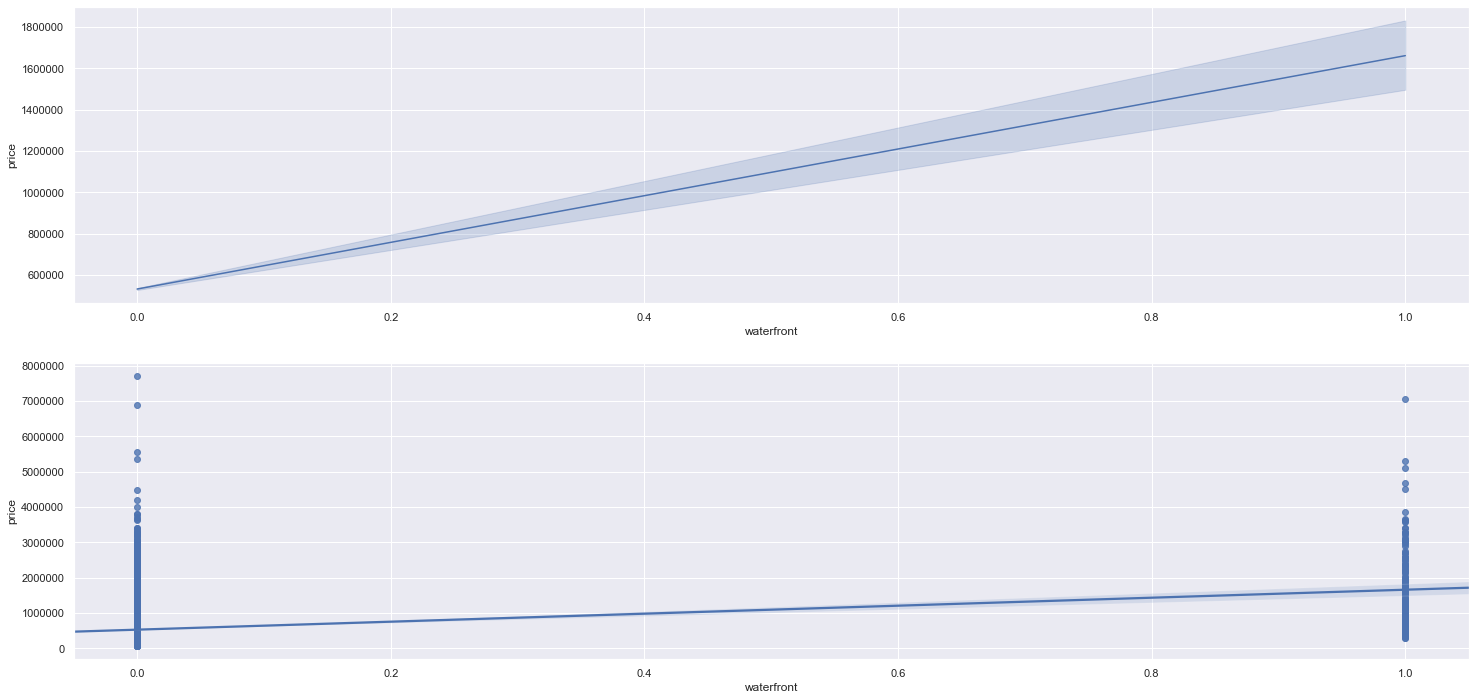

In [41]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='waterfront', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='waterfront', y='price', data=df3 );

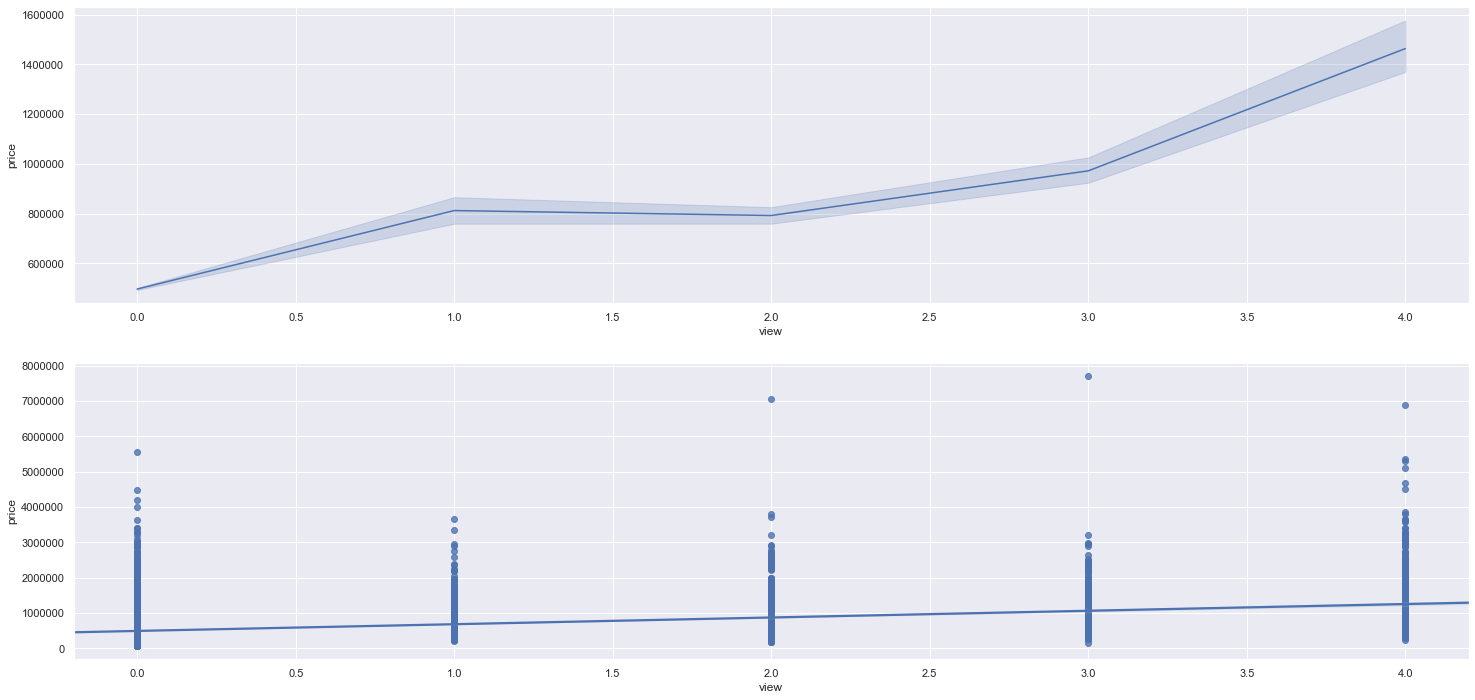

In [42]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='view', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='view', y='price', data=df3 );

#view hypothesis
#Houses with higher number of view should have higher cost because customers consider this option which adds value to it. 
#This hypothesis is correct, view is based from 0 to 4, which 4 is the highest number.
#This graph represents the number of views that keep increasing with along the number graded, 
#note that houses which cost millions is included in this graphic.

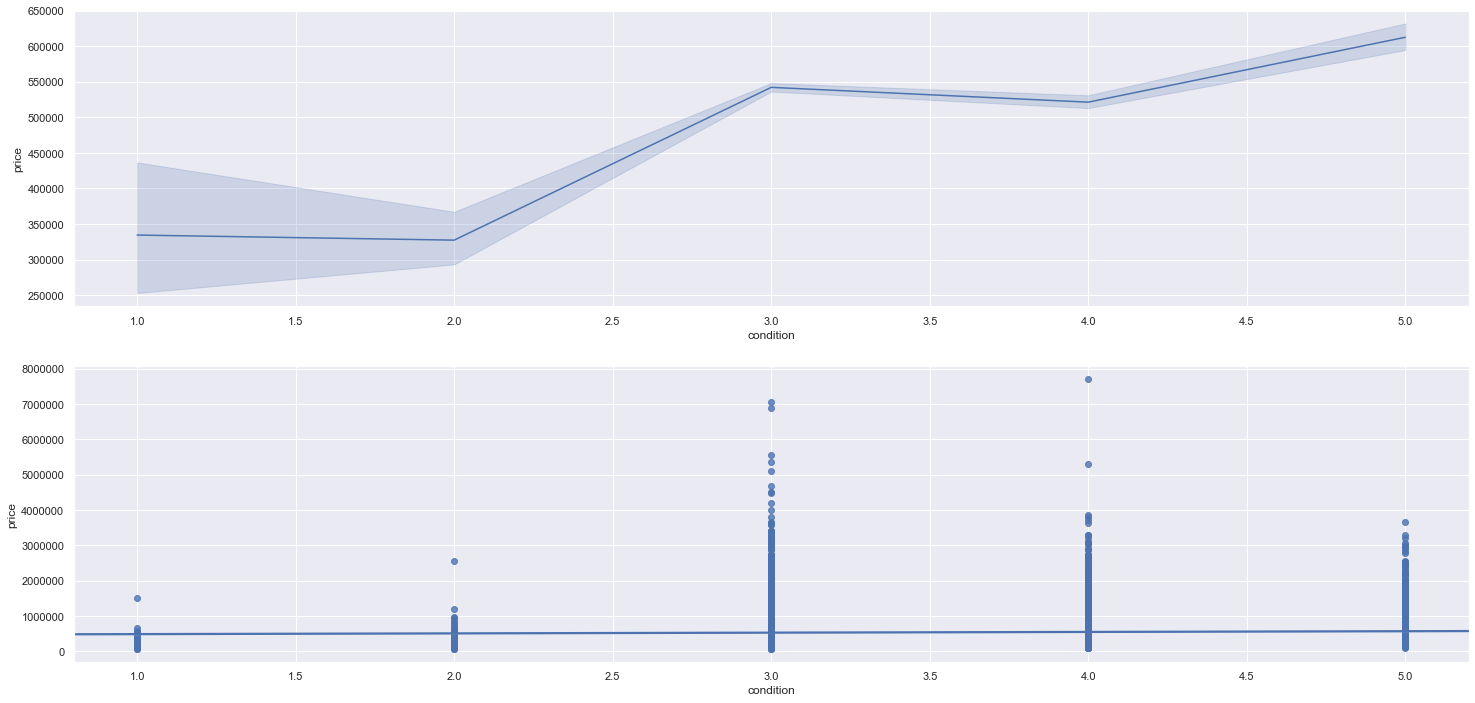

In [43]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='condition', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='condition', y='price', data=df3 );

#conditions hypothesis
#Houses with high conditions should have cost more than house with low condition 
#because the better the condition higher should be the price and the lower the condition should be cheaper
#This hypothesis is correct, even though most of the houses has condition nr 3 compared to nr 4 and 5
#some of these houses actually are in the same range of price or even cost less.



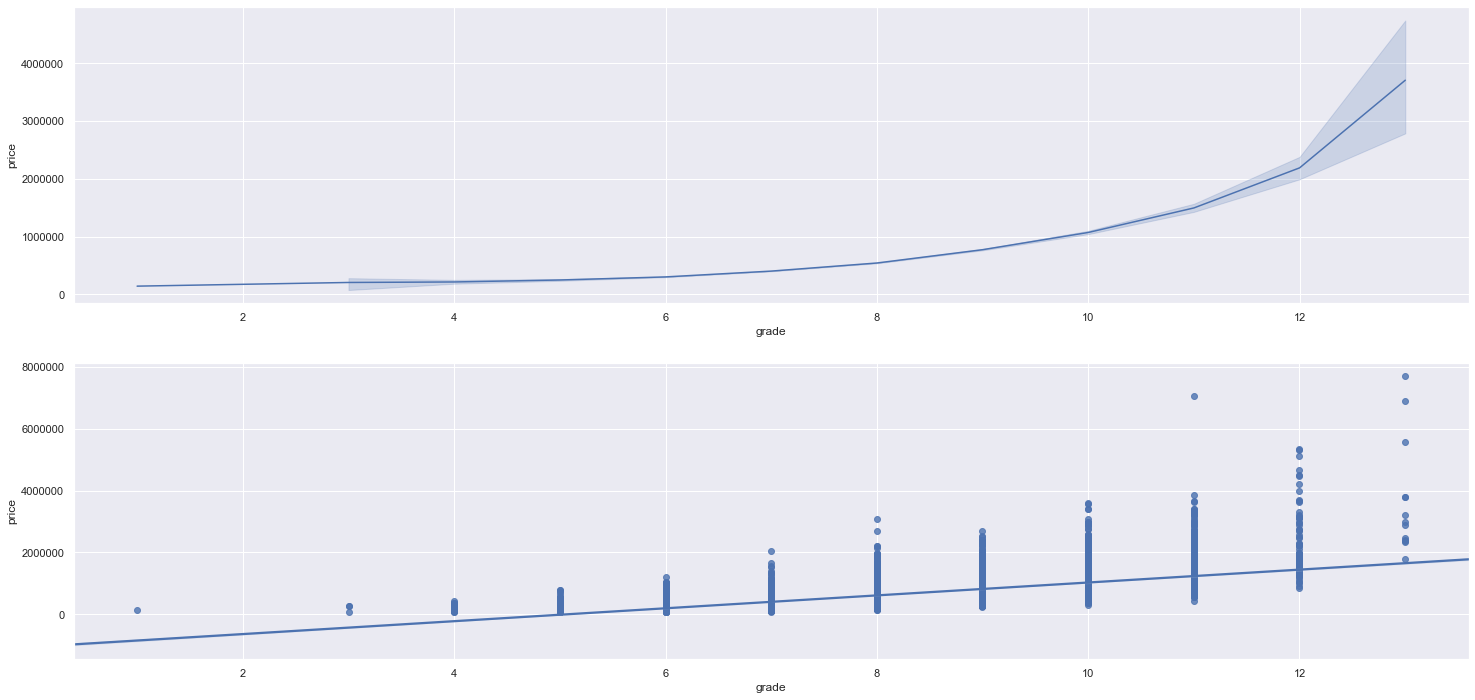

In [44]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='grade', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='grade', y='price', data=df3 );

#Grade hypothesis
#Houses that have been graded higher should have cost more because of the overall experience of the customer in the house.
#this hypothesis is correct, higher the grade price follows.
#This graph represent the increasing number of price based on the grade of a house, several houses that cost less than $2M
#has been graded up to 13 and it is likely to affect the price.

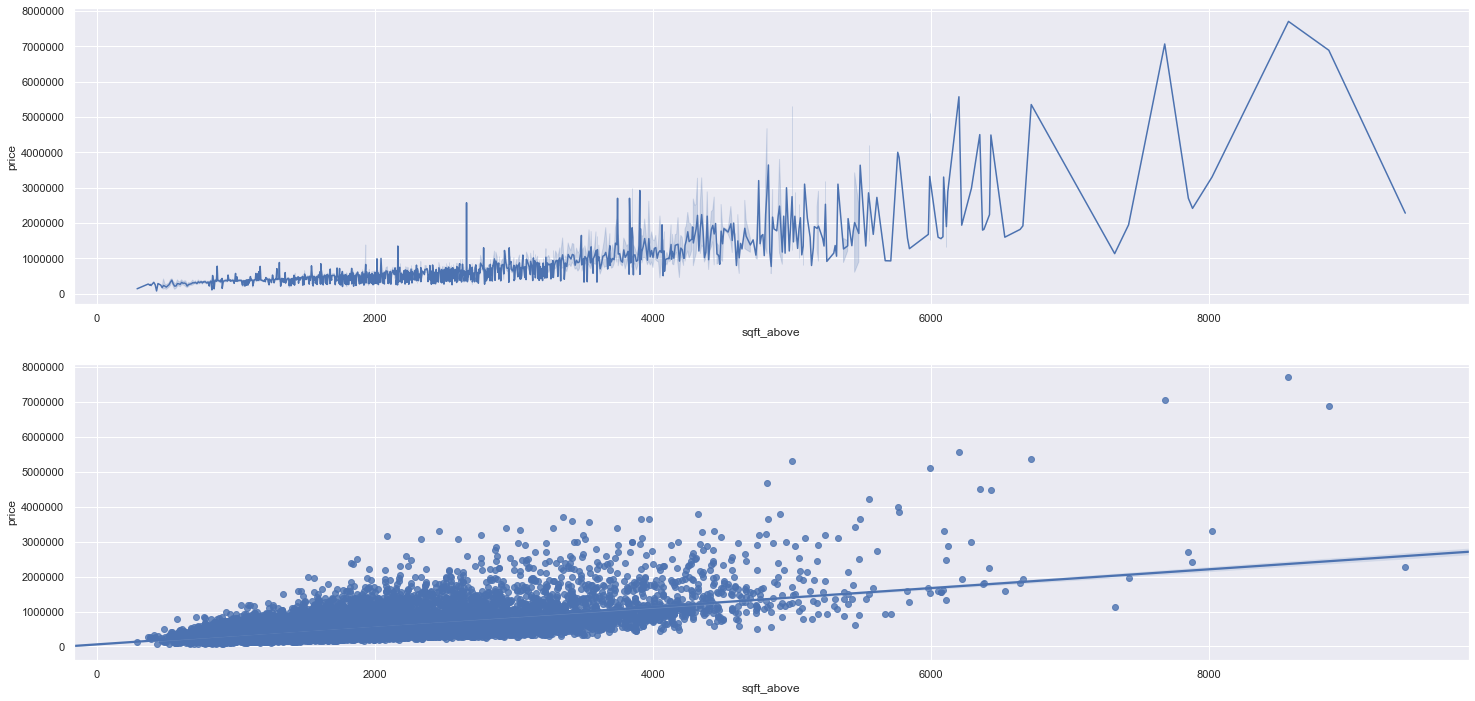

In [45]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_above', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_above', y='price', data=df3 );



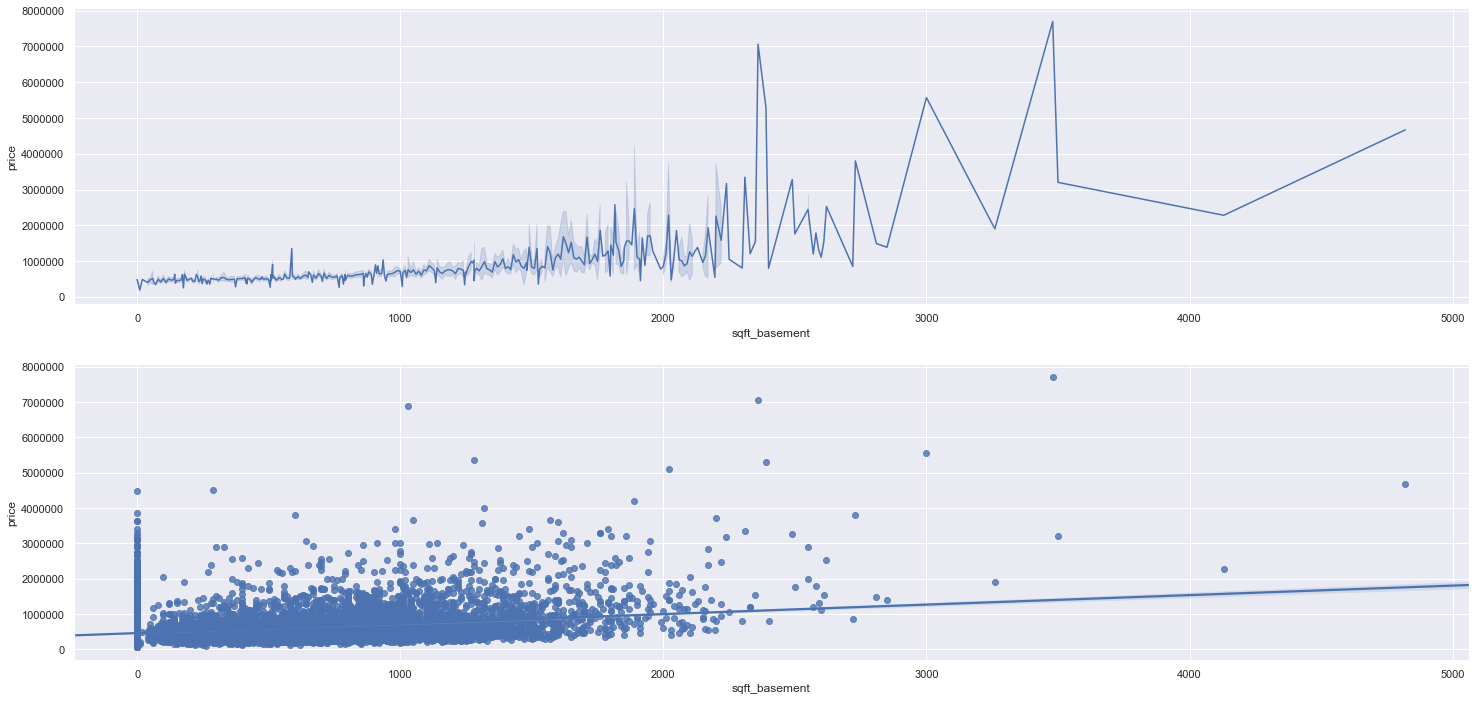

In [46]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_basement', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_basement', y='price', data=df3 );

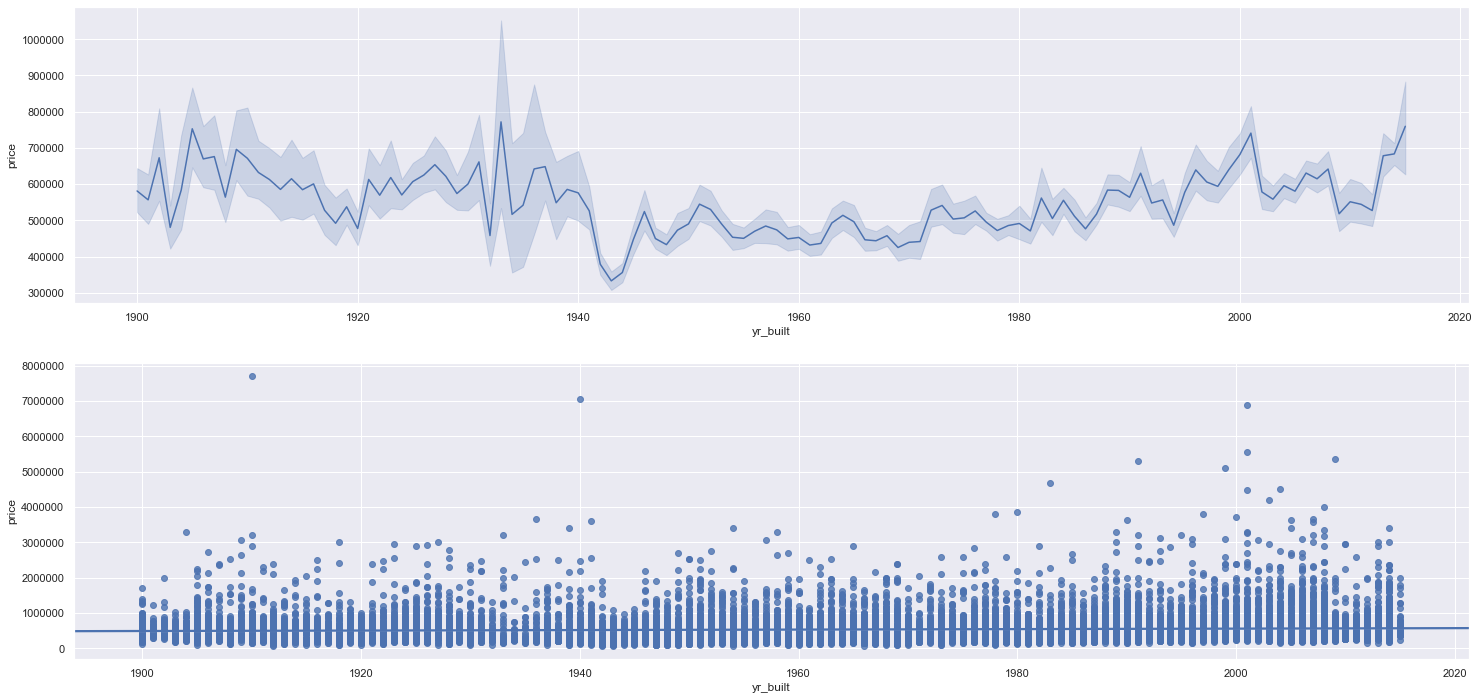

In [47]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='yr_built', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='yr_built', y='price', data=df3 );

#yr_built hypothesis
# Houses that have been built with more than 50 year old should cost less because it is old and needs renovation.
#This hypotheis is incorrect, graphic shows that some houses built from 1920 to 1940
#has higher prices than other built in 2000 onwards.
#This graphic represents houses built from 1900 to 2020, and indicates cost of newer houses is not a determining factor compared to price.

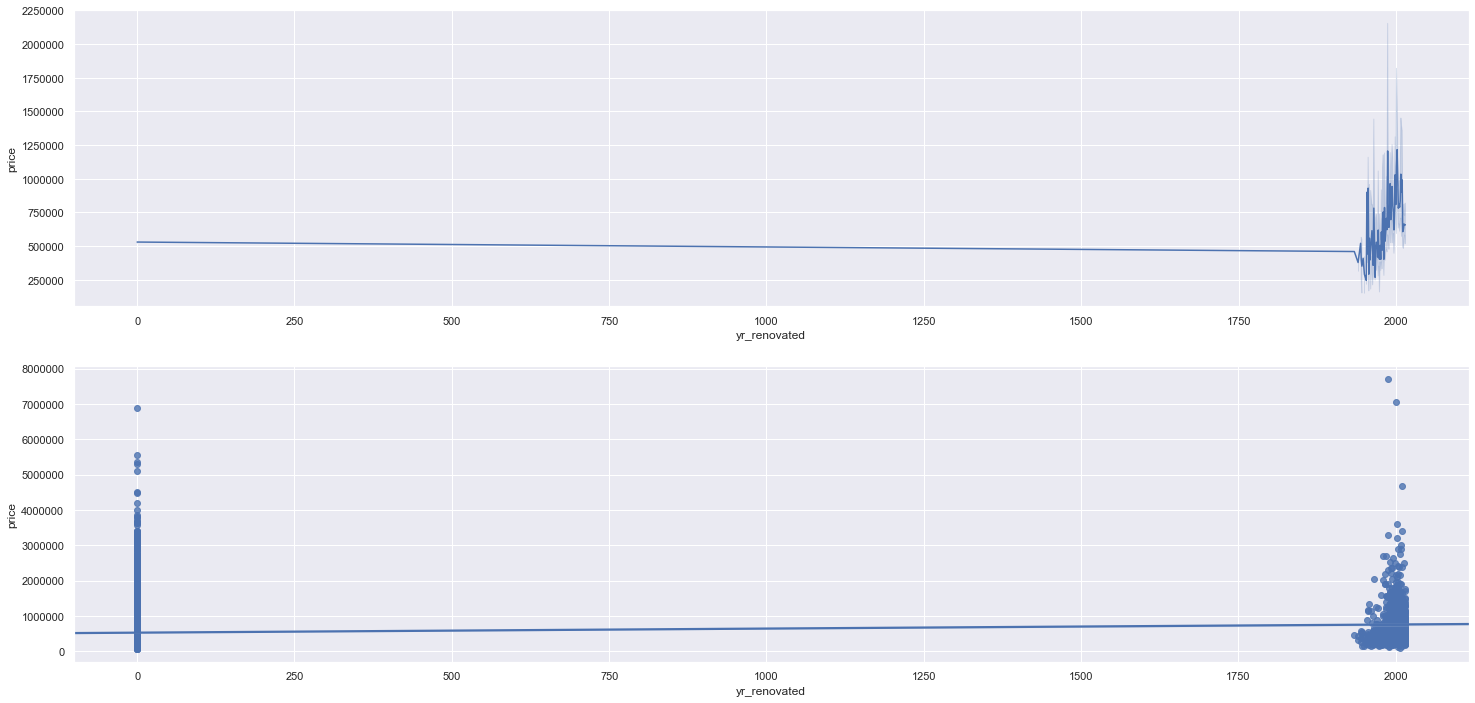

In [48]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='yr_renovated', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='yr_renovated', y='price', data=df3 );

#yr_renovated hypothesis
#Houses with renovation should cost more because this enhancement should add value to the house.
#This hypothesis is correct, houses renovated near 2000 has increased in value.
#This graphic shows that houses renovated towards and of 1990 and beginning of 2000 onwards has increased the value.

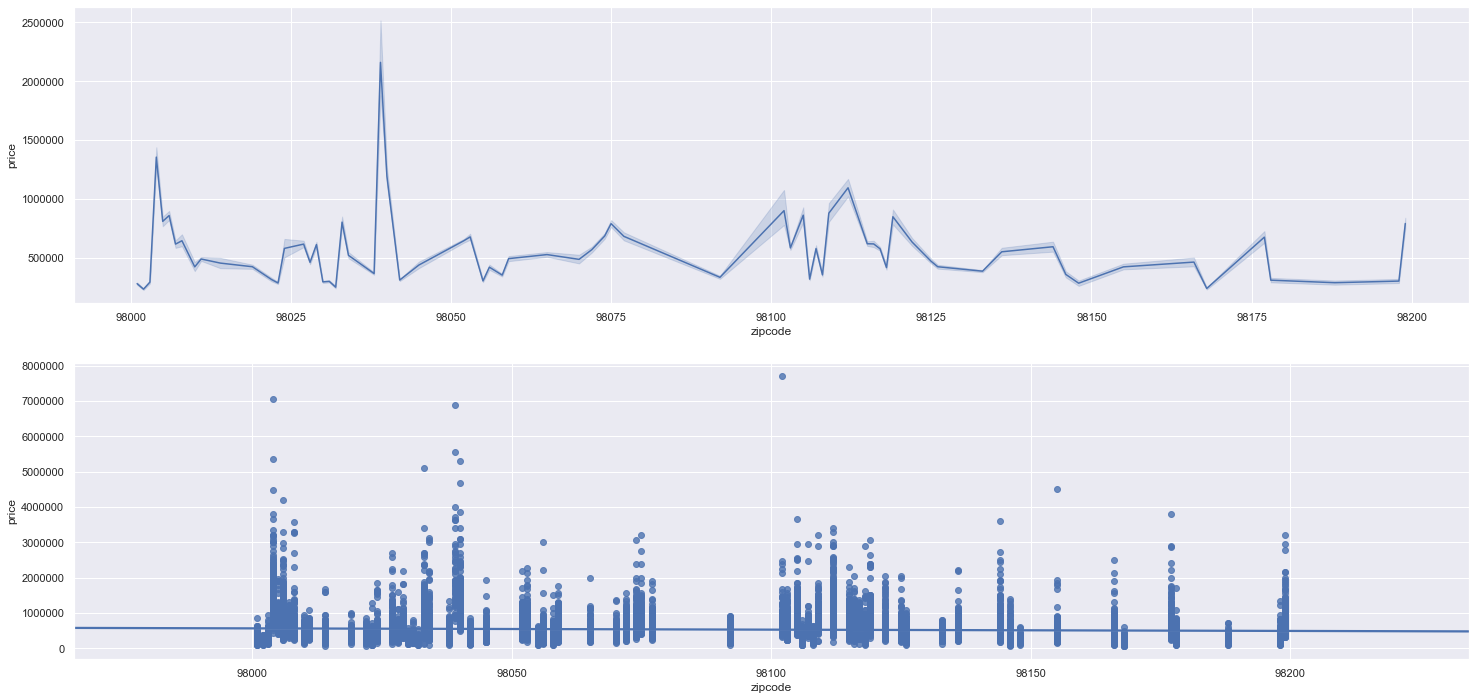

In [49]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='zipcode', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='zipcode', y='price', data=df3 );

#zipcode hypothesis
#Houses located in rich zipcodes should have cost more because rich neighbourhoods increases the value of a house.
#This graphs represents prices compared to zipcodes, suburbs such as Bellevue, Bridle Trails, Bel-Red, Woodridge 
#is an example of wealth zipcodes 
#Other wealth zipcodes, Kirkland, Yarrow Point, South Juanita, Highlands, South Rose Hill, Willow-Rose Hill, Moss Bay, Central Houghton
#All these zipcodes are likely to increase the house value because of its average income.



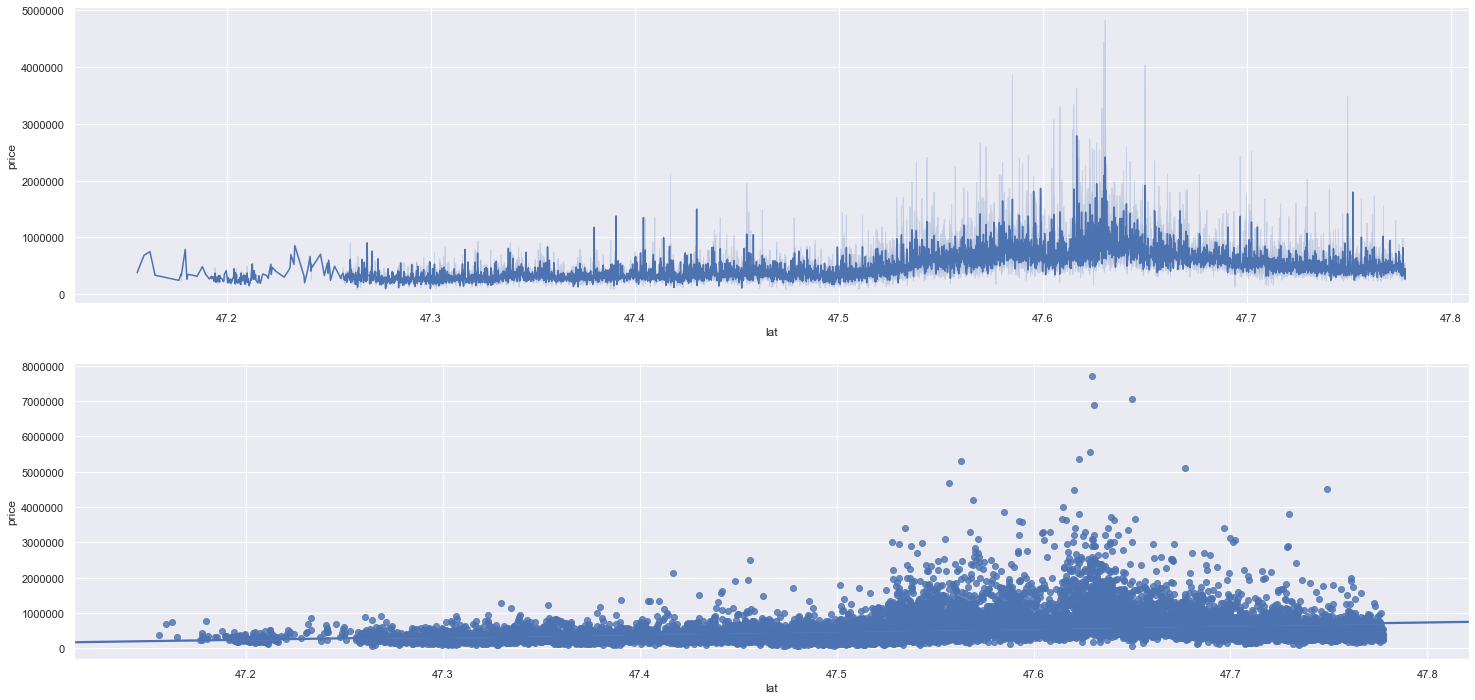

In [50]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='lat', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='lat', y='price', data=df3 );

#Lat hypothesis
#Houses with lat in rich or strategic areas should have cost more because houses with good location adds more value.
#This hypothesis is correct, the center of seattle lat is 47.6 and its surrounds which is closer to the cbd and lake washington 
#this graphics represent the latittude location compared to prices, and houses location between lat 47.6 to 47.7 accomodates a high nuumber of houses 
#with high prices.



In [ ]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='long', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='long', y='price', data=df3 );

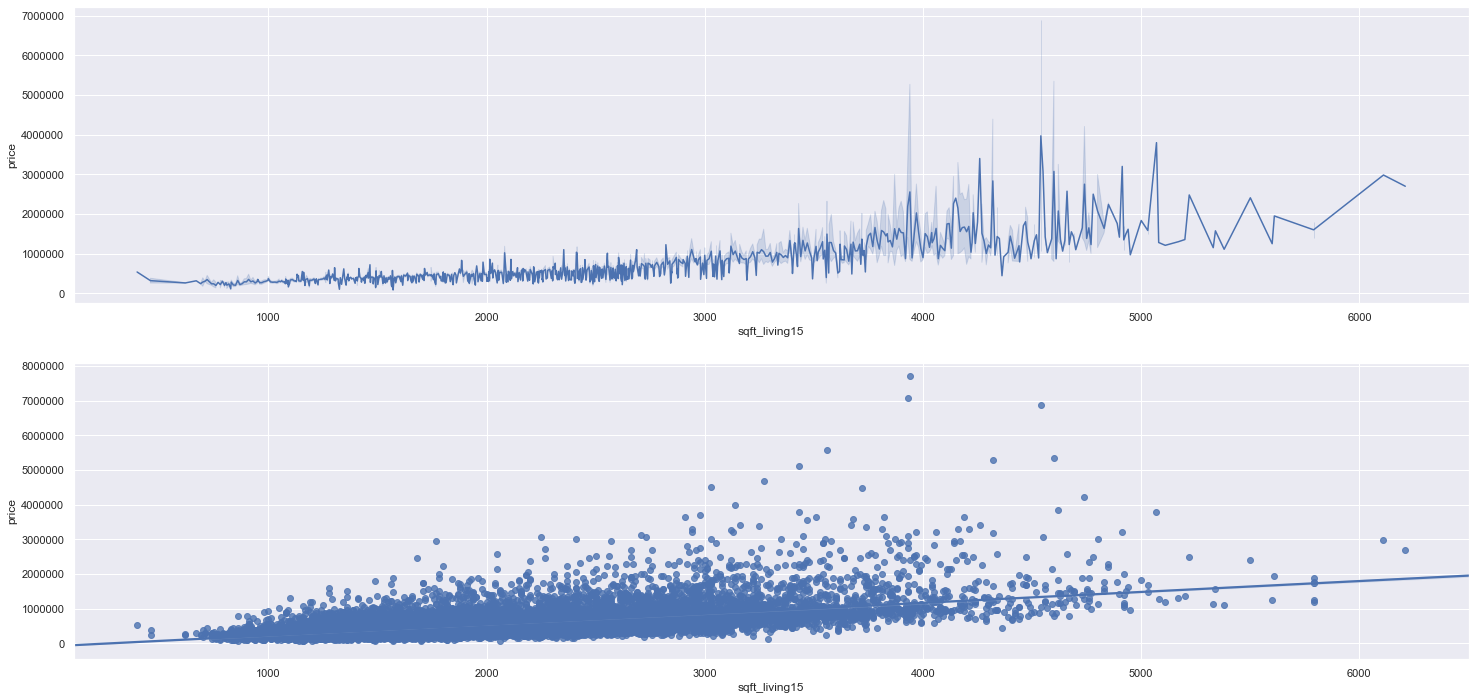

In [40]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_living15', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_living15', y='price', data=df3 );


#sqft_living15 hypothesis


TypeError: Could not convert 20141013T00000020141209T00000020150225T00000020141209T00000020150218T00000020140512T00000020140627T00000020150115T00000020150415T00000020150312T00000020150403T00000020140527T00000020140528T00000020141007T00000020150312T00000020150124T00000020140731T00000020140529T00000020141205T00000020150424T00000020140514T00000020140826T00000020140703T00000020140516T00000020141120T00000020141103T00000020140626T00000020141201T00000020140624T00000020150302T00000020141110T00000020141201T00000020140624T00000020141110T00000020141203T00000020140613T00000020140528T00000020141230T00000020150213T00000020140620T00000020140715T00000020140811T00000020140707T00000020141028T00000020140729T00000020140718T00000020150325T00000020140716T00000020150428T00000020150311T00000020140916T00000020150217T00000020141231T00000020150205T00000020150303T00000020140512T00000020140819T00000020150407T00000020140827T00000020150223T00000020141210T00000020140828T00000020141021T00000020141207T00000020140603T00000020141120T00000020140909T00000020141009T00000020140825T00000020140612T00000020140912T00000020150105T00000020140610T00000020140710T00000020150316T00000020141105T00000020141013T00000020150420T00000020140609T00000020150323T00000020141202T00000020141222T00000020141028T00000020150128T00000020140602T00000020141114T00000020141103T00000020140618T00000020140519T00000020140904T00000020140522T00000020150311T00000020150226T00000020140725T00000020141223T00000020140908T00000020150330T00000020140912T00000020140711T00000020140516T00000020140611T00000020141027T00000020141212T00000020141007T00000020140924T00000020150402T00000020140523T00000020140723T00000020150305T00000020140827T00000020140725T00000020150304T00000020140916T00000020141124T00000020141028T00000020141121T00000020140626T00000020140623T00000020150108T00000020150511T00000020150102T00000020141119T00000020150406T00000020141104T00000020140618T00000020150302T00000020140717T00000020140717T00000020140613T00000020150406T00000020150105T00000020150428T00000020140612T00000020140512T00000020150126T00000020140813T00000020140805T00000020140529T00000020140707T00000020140507T00000020140627T00000020140708T00000020150508T00000020150415T00000020150227T00000020141203T00000020140625T00000020140806T00000020141030T00000020141104T00000020140820T00000020150409T00000020150331T00000020150401T00000020140516T00000020140728T00000020141120T00000020140807T00000020141113T00000020141003T00000020140507T00000020150309T00000020150304T00000020140620T00000020140812T00000020141208T00000020150219T00000020150324T00000020140605T00000020140611T00000020150316T00000020150102T00000020140502T00000020150116T00000020140929T00000020150210T00000020140709T00000020140530T00000020141117T00000020150107T00000020140725T00000020150414T00000020140613T00000020140723T00000020140905T00000020141121T00000020150415T00000020140505T00000020150418T00000020141205T00000020140818T00000020141105T00000020140912T00000020140625T00000020141201T00000020140515T00000020141111T00000020140723T00000020150113T00000020141014T00000020150311T00000020141112T00000020140716T00000020140804T00000020150303T00000020140804T00000020140919T00000020150205T00000020141123T00000020140717T00000020150422T00000020140717T00000020140515T00000020150114T00000020140527T00000020150115T00000020150221T00000020140703T00000020140828T00000020141023T00000020140822T00000020140605T00000020140904T00000020140918T00000020140903T00000020140604T00000020150309T00000020140529T00000020150115T00000020150303T00000020150413T00000020140616T00000020141121T00000020141120T00000020140902T00000020140610T00000020150409T00000020150320T00000020140701T00000020140529T00000020141208T00000020141001T00000020150127T00000020150427T00000020140826T00000020150212T00000020140929T00000020150226T00000020150314T00000020150422T00000020140923T00000020140513T00000020150401T00000020150421T00000020140929T00000020140519T00000020141020T00000020150211T00000020141124T00000020140829T00000020141202T00000020141024T00000020141216T00000020150428T00000020141027T00000020140519T00000020140929T00000020140814T00000020150409T00000020150504T00000020141007T00000020150501T00000020141017T00000020140925T00000020141124T00000020150320T00000020150127T00000020141113T00000020150505T00000020150505T00000020140703T00000020150227T00000020150513T00000020140630T00000020150410T00000020140905T00000020141017T00000020150209T00000020140702T00000020140812T00000020140723T00000020150224T00000020141022T00000020141002T00000020140709T00000020140710T00000020140822T00000020150304T00000020140602T00000020140529T00000020140624T00000020140811T00000020140619T00000020150401T00000020150115T00000020150217T00000020150403T00000020140612T00000020150228T00000020150108T00000020150209T00000020141023T00000020140502T00000020140618T00000020141209T00000020141105T00000020150408T00000020150511T00000020140723T00000020141122T00000020140513T00000020141023T00000020140721T00000020150202T00000020140905T00000020150311T00000020141027T00000020140905T00000020150428T00000020140725T00000020140916T00000020150416T00000020140729T00000020150408T00000020140703T00000020141007T00000020140602T00000020140722T00000020140826T00000020150501T00000020150424T00000020141106T00000020140909T00000020141017T00000020140718T00000020140723T00000020141229T00000020141205T00000020141021T00000020150416T00000020140604T00000020140922T00000020150126T00000020141203T00000020150324T00000020140604T00000020140806T00000020141006T00000020140505T00000020140805T00000020140605T00000020140828T00000020141210T00000020140819T00000020140917T00000020150130T00000020150326T00000020141001T00000020150423T00000020141120T00000020141204T00000020141001T00000020150324T00000020141223T00000020140811T00000020140520T00000020140609T00000020141027T00000020150429T00000020150421T00000020140916T00000020140805T00000020150313T00000020150121T00000020140728T00000020141111T00000020140625T00000020140515T00000020140905T00000020140801T00000020141210T00000020140917T00000020140618T00000020140512T00000020140728T00000020150430T00000020150309T00000020140623T00000020140619T00000020140619T00000020150306T00000020140825T00000020150422T00000020150224T00000020140618T00000020140912T00000020140806T00000020150417T00000020150427T00000020140911T00000020150318T00000020140716T00000020141104T00000020140723T00000020150212T00000020140909T00000020140626T00000020150105T00000020141223T00000020140710T00000020141203T00000020140730T00000020141219T00000020150107T00000020140717T00000020150403T00000020141114T00000020150225T00000020140506T00000020150512T00000020141028T00000020140908T00000020140722T00000020140903T00000020140919T00000020140916T00000020140821T00000020150312T00000020140708T00000020140916T00000020140923T00000020140722T00000020140715T00000020150422T00000020140819T00000020141202T00000020141110T00000020150319T00000020141009T00000020141105T00000020150502T00000020141231T00000020150222T00000020150421T00000020141014T00000020140520T00000020150108T00000020141126T00000020140612T00000020150128T00000020140626T00000020150305T00000020141104T00000020141209T00000020141112T00000020140523T00000020141201T00000020141015T00000020150107T00000020150106T00000020140623T00000020150213T00000020141113T00000020141014T00000020140811T00000020140808T00000020140711T00000020140901T00000020150406T00000020140718T00000020141104T00000020140603T00000020150325T00000020141027T00000020150410T00000020150428T00000020140711T00000020140721T00000020141216T00000020150210T00000020141120T00000020150205T00000020150127T00000020141030T00000020140614T00000020140512T00000020150128T00000020140917T00000020140818T00000020141106T00000020150510T00000020140519T00000020140502T00000020141015T00000020150210T00000020140521T00000020140527T00000020150202T00000020140508T00000020140612T00000020150505T00000020150305T00000020140721T00000020141105T00000020140820T00000020150311T00000020141029T00000020150507T00000020141114T00000020140805T00000020150325T00000020140906T00000020150326T00000020141105T00000020140818T00000020141121T00000020140620T00000020140618T00000020141105T00000020141008T00000020150429T00000020150505T00000020150224T00000020140624T00000020150218T00000020150218T00000020150501T00000020141204T00000020150410T00000020150310T00000020150218T00000020141030T00000020141013T00000020140911T00000020141121T00000020150422T00000020140523T00000020150319T00000020140923T00000020140528T00000020140723T00000020141013T00000020150508T00000020140902T00000020141117T00000020140722T00000020140620T00000020140715T00000020150427T00000020141027T00000020141028T00000020140707T00000020141217T00000020140613T00000020141216T00000020140728T00000020141231T00000020140814T00000020141022T00000020141218T00000020140718T00000020150123T00000020150424T00000020140603T00000020150102T00000020141217T00000020141209T00000020141211T00000020150127T00000020141211T00000020140516T00000020140821T00000020140701T00000020141022T00000020141117T00000020140715T00000020140819T00000020140708T00000020140930T00000020150314T00000020140904T00000020141021T00000020150324T00000020140902T00000020150213T00000020140604T00000020140722T00000020141002T00000020141017T00000020140805T00000020141009T00000020150204T00000020140820T00000020140825T00000020150224T00000020150408T00000020140505T00000020150206T00000020141126T00000020150417T00000020141209T00000020141105T00000020140925T00000020140610T00000020140617T00000020150114T00000020150506T00000020140922T00000020150113T00000020140619T00000020150415T00000020140623T00000020141021T00000020150225T00000020140521T00000020140814T00000020140808T00000020150406T00000020141009T00000020140522T00000020140523T00000020140622T00000020141212T00000020140912T00000020140924T00000020140624T00000020140815T00000020150121T00000020140701T00000020150409T00000020150303T00000020140728T00000020150320T00000020150512T00000020140930T00000020150409T00000020150320T00000020140707T00000020141118T00000020150407T00000020141117T00000020141124T00000020140523T00000020150403T00000020140723T00000020150422T00000020141120T00000020140507T00000020150102T00000020140902T00000020150324T00000020141113T00000020150121T00000020140527T00000020141124T00000020141124T00000020140514T00000020140930T00000020140709T00000020140802T00000020140616T00000020140912T00000020150316T00000020140729T00000020140813T00000020140718T00000020140623T00000020150127T00000020140930T00000020140731T00000020140815T00000020140528T00000020140609T00000020141016T00000020141013T00000020150105T00000020140519T00000020150311T00000020140924T00000020150224T00000020140821T00000020140923T00000020140721T00000020150304T00000020140712T00000020140625T00000020141229T00000020140922T00000020140610T00000020141009T00000020150407T00000020150504T00000020141103T00000020141219T00000020140815T00000020140804T00000020150413T00000020141014T00000020140805T00000020140701T00000020140625T00000020140908T00000020140722T00000020140918T00000020150304T00000020141222T00000020140715T00000020140728T00000020150102T00000020150414T00000020140808T00000020140728T00000020140808T00000020150420T00000020140918T00000020140604T00000020140613T00000020140910T00000020141106T00000020140509T00000020140612T00000020140917T00000020140508T00000020140715T00000020150113T00000020141006T00000020150224T00000020140820T00000020141113T00000020141119T00000020140728T00000020141215T00000020141107T00000020140917T00000020140620T00000020150123T00000020140714T00000020140605T00000020150224T00000020140903T00000020150409T00000020141210T00000020140730T00000020140828T00000020140603T00000020140902T00000020140715T00000020150121T00000020150202T00000020141024T00000020140529T00000020140911T00000020150324T00000020150227T00000020141217T00000020141104T00000020150324T00000020140716T00000020150107T00000020140624T00000020140619T00000020141113T00000020140612T00000020140506T00000020150209T00000020140502T00000020140615T00000020141016T00000020140515T00000020140612T00000020150225T00000020140612T00000020141118T00000020150121T00000020141202T00000020150304T00000020150415T00000020141120T00000020140709T00000020140516T00000020140611T00000020140623T00000020140709T00000020141009T00000020150304T00000020140711T00000020141006T00000020140926T00000020141020T00000020150224T00000020140815T00000020140519T00000020150115T00000020150107T00000020140606T00000020150414T00000020141118T00000020140605T00000020140908T00000020140806T00000020150122T00000020141016T00000020150512T00000020141022T00000020150325T00000020141223T00000020141222T00000020150513T00000020140814T00000020140721T00000020141029T00000020140806T00000020140901T00000020141002T00000020150218T00000020140822T00000020150512T00000020140911T00000020140515T00000020150319T00000020150210T00000020140626T00000020140606T00000020140911T00000020141120T00000020150317T00000020140718T00000020150513T00000020140728T00000020150107T00000020141215T00000020141118T00000020140509T00000020150114T00000020141209T00000020140509T00000020141125T00000020140722T00000020150304T00000020141211T00000020140521T00000020141010T00000020140731T00000020140716T00000020140627T00000020140812T00000020141022T00000020150310T00000020140627T00000020141113T00000020140620T00000020150508T00000020140811T00000020150303T00000020141104T00000020150313T00000020150427T00000020140731T00000020141226T00000020150423T00000020150422T00000020140919T00000020150305T00000020150211T00000020140530T00000020140612T00000020150213T00000020141125T00000020141219T00000020140515T00000020140826T00000020150212T00000020141021T00000020140912T00000020140603T00000020140604T00000020141111T00000020140715T00000020140825T00000020140716T00000020140610T00000020141110T00000020140530T00000020140725T00000020140811T00000020141114T00000020140508T00000020140805T00000020150311T00000020150414T00000020140620T00000020140811T00000020140509T00000020140714T00000020150218T00000020140603T00000020150326T00000020141007T00000020141016T00000020140806T00000020141124T00000020141010T00000020140910T00000020140919T00000020140522T00000020140722T00000020141023T00000020141210T00000020140828T00000020140519T00000020140630T00000020150120T00000020150318T00000020140623T00000020140516T00000020141203T00000020140520T00000020150310T00000020150514T00000020140808T00000020140902T00000020150305T00000020150408T00000020150205T00000020140717T00000020150331T00000020150205T00000020140623T00000020141007T00000020150120T00000020150311T00000020140612T00000020141022T00000020140811T00000020140828T00000020150112T00000020150209T00000020150408T00000020150306T00000020141015T00000020150506T00000020150325T00000020140716T00000020140521T00000020150421T00000020140904T00000020150323T00000020140908T00000020140922T00000020141203T00000020141112T00000020150413T00000020140916T00000020141202T00000020140528T00000020140730T00000020140625T00000020140515T00000020140623T00000020140825T00000020141028T00000020150506T00000020150202T00000020140724T00000020140509T00000020140806T00000020140812T00000020150324T00000020150121T00000020150330T00000020150311T00000020150425T00000020150310T00000020140916T00000020140527T00000020140529T00000020141001T00000020140821T00000020150413T00000020150225T00000020141013T00000020150304T00000020150108T00000020150505T00000020140721T00000020140821T00000020140917T00000020140804T00000020150415T00000020140924T00000020150427T00000020141022T00000020140508T00000020140614T00000020141218T00000020150422T00000020141119T00000020140617T00000020150402T00000020141210T00000020140509T00000020141212T00000020140612T00000020141230T00000020140909T00000020140725T00000020150126T00000020140618T00000020140926T00000020150331T00000020140729T00000020150414T00000020140605T00000020140825T00000020140814T00000020140610T00000020140520T00000020150122T00000020140515T00000020150305T00000020141020T00000020150417T00000020150429T00000020140717T00000020140820T00000020140523T00000020150420T00000020150413T00000020150220T00000020150226T00000020150316T00000020140502T00000020140702T00000020150317T00000020140715T00000020150313T00000020150318T00000020140915T00000020140825T00000020141106T00000020140517T00000020141022T00000020140522T00000020140609T00000020140605T00000020150202T00000020150319T00000020140716T00000020141230T00000020150426T00000020140623T00000020140716T00000020140813T00000020140818T00000020141021T00000020150123T00000020141105T00000020140725T00000020140903T00000020140710T00000020150417T00000020140527T00000020150319T00000020150410T00000020150205T00000020150114T00000020150202T00000020140530T00000020150422T00000020150421T00000020141002T00000020140827T00000020140716T00000020150127T00000020140520T00000020140717T00000020150420T00000020140725T00000020150317T00000020150427T00000020140617T00000020150210T00000020150507T00000020140714T00000020141118T00000020150114T00000020141219T00000020150513T00000020150406T00000020140528T00000020141110T00000020141105T00000020140602T00000020150220T00000020150425T00000020150109T00000020140703T00000020141230T00000020150106T00000020150306T00000020140825T00000020150402T00000020150324T00000020140620T00000020140819T00000020150206T00000020140623T00000020150324T00000020140506T00000020150311T00000020140509T00000020150427T00000020140711T00000020140625T00000020150325T00000020140515T00000020140922T00000020140707T00000020140909T00000020150213T00000020150114T00000020150506T00000020140605T00000020140730T00000020150206T00000020150105T00000020141110T00000020150204T00000020140916T00000020141231T00000020141014T00000020150224T00000020150424T00000020140627T00000020140723T00000020141215T00000020141029T00000020140507T00000020140808T00000020150217T00000020150312T00000020150311T00000020150421T00000020150309T00000020150406T00000020140702T00000020141222T00000020141229T00000020140729T00000020141002T00000020140812T00000020140819T00000020140813T00000020140905T00000020141020T00000020140828T00000020150508T00000020140729T00000020141009T00000020140715T00000020150317T00000020140507T00000020140903T00000020150309T00000020141008T00000020140821T00000020140709T00000020150429T00000020150430T00000020140709T00000020140626T00000020140904T00000020140806T00000020140605T00000020140523T00000020141001T00000020140623T00000020140710T00000020141016T00000020150324T00000020140909T00000020141215T00000020141002T00000020141107T00000020150107T00000020141217T00000020141126T00000020141209T00000020140708T00000020140605T00000020140509T00000020141113T00000020140922T00000020150504T00000020141107T00000020141203T00000020140520T00000020140904T00000020140911T00000020150421T00000020141105T00000020141212T00000020140813T00000020150406T00000020141125T00000020141113T00000020150408T00000020141222T00000020140717T00000020140905T00000020141010T00000020150219T00000020150209T00000020140623T00000020140606T00000020150312T00000020150416T00000020140827T00000020150330T00000020141112T00000020141009T00000020141024T00000020150414T00000020150430T00000020140618T00000020150428T00000020141205T00000020140527T00000020141119T00000020150504T00000020141030T00000020140623T00000020150227T00000020140715T00000020140624T00000020150419T00000020141023T00000020140910T00000020141113T00000020140514T00000020140516T00000020140625T00000020141028T00000020140808T00000020140808T00000020140710T00000020141117T00000020150424T00000020140829T00000020141114T00000020140506T00000020140625T00000020140818T00000020141229T00000020141124T00000020141110T00000020140813T00000020141113T00000020141223T00000020140925T00000020140910T00000020140724T00000020140625T00000020141217T00000020140729T00000020141103T00000020140707T00000020140723T00000020140505T00000020150424T00000020140808T00000020150326T00000020150209T00000020140616T00000020140730T00000020140909T00000020140605T00000020150313T00000020150113T00000020141014T00000020140904T00000020150219T00000020140509T00000020141210T00000020140703T00000020150310T00000020140514T00000020140606T00000020150501T00000020150324T00000020140611T00000020150320T00000020150218T00000020140527T00000020141118T00000020140916T00000020150325T00000020140926T00000020150505T00000020140508T00000020140523T00000020140915T00000020141030T00000020141217T00000020150409T00000020150413T00000020150324T00000020140814T00000020150320T00000020140819T00000020150324T00000020150202T00000020141024T00000020141020T00000020140909T00000020150127T00000020140513T00000020140529T00000020140630T00000020150424T00000020140725T00000020150113T00000020140902T00000020141027T00000020140717T00000020150413T00000020140605T00000020141126T00000020141104T00000020150309T00000020140909T00000020140603T00000020140917T00000020140618T00000020150429T00000020140728T00000020141112T00000020150116T00000020150421T00000020140605T00000020140511T00000020141008T00000020140624T00000020140814T00000020140818T00000020140702T00000020150227T00000020140929T00000020150401T00000020141118T00000020150108T00000020150511T00000020150413T00000020140714T00000020140703T00000020140524T00000020140819T00000020140905T00000020140724T00000020140623T00000020140625T00000020140731T00000020141223T00000020141028T00000020140708T00000020140707T00000020150414T00000020140626T00000020140917T00000020140520T00000020140625T00000020140506T00000020140929T00000020140806T00000020140723T00000020150123T00000020140805T00000020141210T00000020140528T00000020140522T00000020140513T00000020150204T00000020150214T00000020140502T00000020141007T00000020140723T00000020140714T00000020140514T00000020141208T00000020150331T00000020141204T00000020140507T00000020140905T00000020140604T00000020141216T00000020141009T00000020140806T00000020150205T00000020140812T00000020140924T00000020150319T00000020150421T00000020150416T00000020150403T00000020140917T00000020140801T00000020150219T00000020150503T00000020150206T00000020150302T00000020150415T00000020150428T00000020141105T00000020140804T00000020141229T00000020140505T00000020141204T00000020150217T00000020150128T00000020140923T00000020150226T00000020140730T00000020141007T00000020150330T00000020140815T00000020141120T00000020140513T00000020140826T00000020140829T00000020140601T00000020150424T00000020150305T00000020141107T00000020140822T00000020140625T00000020150406T00000020150318T00000020140825T00000020150413T00000020140522T00000020140812T00000020150212T00000020150410T00000020140626T00000020140717T00000020150326T00000020150422T00000020150501T00000020140627T00000020141022T00000020150320T00000020140826T00000020150204T00000020140811T00000020140513T00000020150107T00000020140919T00000020140605T00000020140529T00000020150325T00000020140530T00000020150420T00000020150220T00000020141027T00000020150324T00000020140910T00000020150318T00000020150414T00000020140623T00000020150408T00000020140624T00000020140728T00000020141218T00000020140711T00000020141230T00000020140711T00000020140924T00000020140723T00000020150401T00000020150506T00000020140911T00000020140826T00000020141110T00000020150205T00000020140929T00000020141031T00000020141001T00000020140923T00000020150316T00000020150227T00000020150312T00000020140613T00000020141006T00000020150318T00000020141106T00000020150224T00000020150504T00000020140925T00000020140623T00000020140626T00000020141106T00000020150213T00000020150318T00000020150211T00000020141013T00000020140528T00000020140604T00000020150109T00000020140602T00000020140807T00000020140529T00000020140828T00000020141015T00000020150513T00000020140829T00000020140911T00000020140825T00000020140922T00000020141103T00000020150506T00000020140827T00000020140624T00000020150327T00000020140630T00000020150420T00000020150428T00000020150402T00000020150420T00000020141230T00000020141124T00000020150409T00000020150225T00000020140621T00000020141117T00000020140603T00000020150414T00000020141013T00000020140507T00000020150325T00000020141008T00000020141208T00000020141018T00000020140703T00000020141125T00000020150409T00000020140908T00000020141027T00000020150105T00000020140509T00000020140917T00000020141016T00000020150331T00000020150512T00000020141118T00000020150204T00000020140919T00000020140707T00000020150401T00000020140612T00000020150212T00000020140818T00000020150323T00000020150429T00000020150424T00000020150425T00000020150310T00000020140627T00000020150401T00000020141120T00000020140718T00000020140602T00000020140625T00000020150413T00000020150430T00000020141022T00000020140926T00000020141112T00000020141013T00000020141014T00000020150326T00000020150327T00000020140903T00000020141024T00000020140527T00000020140603T00000020140528T00000020140604T00000020150406T00000020150113T00000020141014T00000020140701T00000020140806T00000020150326T00000020141113T00000020140814T00000020150428T00000020150506T00000020140716T00000020140822T00000020141021T00000020150415T00000020140620T00000020140905T00000020140508T00000020140903T00000020141124T00000020140701T00000020141202T00000020150309T00000020150130T00000020140729T00000020141220T00000020141003T00000020150401T00000020141028T00000020141030T00000020150218T00000020140701T00000020141029T00000020140617T00000020150107T00000020140728T00000020140624T00000020140626T00000020141105T00000020140909T00000020150304T00000020150220T00000020140723T00000020141029T00000020141016T00000020140722T00000020140901T00000020141104T00000020141205T00000020141017T00000020140604T00000020150429T00000020140910T00000020140724T00000020140618T00000020150424T00000020141112T00000020141210T00000020150105T00000020140528T00000020141007T00000020141104T00000020140922T00000020140930T00000020141204T00000020141106T00000020150330T00000020140709T00000020140820T00000020140523T00000020150330T00000020150108T00000020150107T00000020140915T00000020150116T00000020141118T00000020140711T00000020140630T00000020140710T00000020140626T00000020141029T00000020140701T00000020141027T00000020140911T00000020150401T00000020140610T00000020141029T00000020140513T00000020150327T00000020140622T00000020140731T00000020140521T00000020140717T00000020140711T00000020140616T00000020140530T00000020141231T00000020150408T00000020140812T00000020150410T00000020141208T00000020140522T00000020150227T00000020140506T00000020141031T00000020140620T00000020140505T00000020141208T00000020140904T00000020140811T00000020150422T00000020140805T00000020141212T00000020141208T00000020150116T00000020140617T00000020150415T00000020150204T00000020140516T00000020150203T00000020140514T00000020140825T00000020140728T00000020150327T00000020140508T00000020141118T00000020141121T00000020140909T00000020140904T00000020141008T00000020140623T00000020150312T00000020140604T00000020140514T00000020141120T00000020141209T00000020141001T00000020140528T00000020150102T00000020140605T00000020140725T00000020150311T00000020140602T00000020140611T00000020141107T00000020150210T00000020150225T00000020141014T00000020150318T00000020150316T00000020150105T00000020141104T00000020140515T00000020140630T00000020150407T00000020141021T00000020150129T00000020150203T00000020140918T00000020150120T00000020150323T00000020141204T00000020150217T00000020140827T00000020140520T00000020140718T00000020140605T00000020140625T00000020150429T00000020141027T00000020140519T00000020140909T00000020150205T00000020140926T00000020140903T00000020141014T00000020141201T00000020150220T00000020140505T00000020150428T00000020140908T00000020140805T00000020150331T00000020141210T00000020140508T00000020140614T00000020140815T00000020150406T00000020140509T00000020141222T00000020150423T00000020150305T00000020150303T00000020140512T00000020150326T00000020140726T00000020140523T00000020140627T00000020150414T00000020141105T00000020150122T00000020150223T00000020140729T00000020141111T00000020141119T00000020150223T00000020140719T00000020150423T00000020140808T00000020150506T00000020141107T00000020141103T00000020140714T00000020141212T00000020141118T00000020140721T00000020140708T00000020150327T00000020150426T00000020150407T00000020140924T00000020140924T00000020140911T00000020150413T00000020140623T00000020140624T00000020150505T00000020150417T00000020140702T00000020150501T00000020150331T00000020140820T00000020141114T00000020150303T00000020150506T00000020140506T00000020140912T00000020140904T00000020140521T00000020140619T00000020140820T00000020140601T00000020141201T00000020140820T00000020140516T00000020150325T00000020150423T00000020140624T00000020150413T00000020140818T00000020150401T00000020140716T00000020150203T00000020140514T00000020140616T00000020150102T00000020150211T00000020140716T00000020150423T00000020140813T00000020140519T00000020140924T00000020140828T00000020150306T00000020150310T00000020140602T00000020150416T00000020150304T00000020141006T00000020150312T00000020141202T00000020140829T00000020141222T00000020140721T00000020140911T00000020141226T00000020140730T00000020150311T00000020150116T00000020141202T00000020140614T00000020140717T00000020150113T00000020141203T00000020150410T00000020140722T00000020140613T00000020150309T00000020150305T00000020141125T00000020141013T00000020150217T00000020140701T00000020150421T00000020140929T00000020141021T00000020140624T00000020141111T00000020150127T00000020140528T00000020140505T00000020150402T00000020150330T00000020150116T00000020150218T00000020140905T00000020141211T00000020140722T00000020141221T00000020140707T00000020140708T00000020140919T00000020140523T00000020140603T00000020141208T00000020141211T00000020140918T00000020141023T00000020150211T00000020140828T00000020141017T00000020141202T00000020140827T00000020150417T00000020150218T00000020140514T00000020140718T00000020150217T00000020141223T00000020150203T00000020140925T00000020150408T00000020150403T00000020140516T00000020150417T00000020150211T00000020140902T00000020140529T00000020141021T00000020150414T00000020140721T00000020140811T00000020140714T00000020140609T00000020150422T00000020150414T00000020140829T00000020150424T00000020140724T00000020141119T00000020140905T00000020140729T00000020140828T00000020150420T00000020140520T00000020140609T00000020150330T00000020140520T00000020140918T00000020140812T00000020140521T00000020150205T00000020150227T00000020140626T00000020141104T00000020141215T00000020140729T00000020140529T00000020141112T00000020140919T00000020140710T00000020141013T00000020141208T00000020141001T00000020140822T00000020150505T00000020150326T00000020141105T00000020140610T00000020141113T00000020150105T00000020140529T00000020140521T00000020141113T00000020140915T00000020140721T00000020140509T00000020141219T00000020140909T00000020140905T00000020140723T00000020140628T00000020141001T00000020141124T00000020150317T00000020140725T00000020150414T00000020150325T00000020140623T00000020140508T00000020141105T00000020141114T00000020140718T00000020150323T00000020140924T00000020150127T00000020150410T00000020140617T00000020141022T00000020140611T00000020141001T00000020150304T00000020140930T00000020140905T00000020140617T00000020141217T00000020140626T00000020150213T00000020140908T00000020140709T00000020140718T00000020141118T00000020140714T00000020141218T00000020140724T00000020141205T00000020140506T00000020140728T00000020150325T00000020141118T00000020140512T00000020150331T00000020150421T00000020150309T00000020140819T00000020150324T00000020140805T00000020140926T00000020150323T00000020140627T00000020140922T00000020150504T00000020140728T00000020150429T00000020150325T00000020140903T00000020140519T00000020150402T00000020140915T00000020140722T00000020150102T00000020150401T00000020140828T00000020150427T00000020141104T00000020140723T00000020150428T00000020150426T00000020141014T00000020150415T00000020140929T00000020140725T00000020140602T00000020140811T00000020140730T00000020140916T00000020150402T00000020150310T00000020140623T00000020150425T00000020140626T00000020140620T00000020140925T00000020140801T00000020150505T00000020150417T00000020140603T00000020140805T00000020140720T00000020140512T00000020141215T00000020140627T00000020140718T00000020140605T00000020141110T00000020140520T00000020150210T00000020141208T00000020141215T00000020141114T00000020141001T00000020140630T00000020140910T00000020141222T00000020150428T00000020140604T00000020150313T00000020150414T00000020140611T00000020140826T00000020150121T00000020140527T00000020141008T00000020141105T00000020141007T00000020141122T00000020150202T00000020150202T00000020140723T00000020140610T00000020150323T00000020141117T00000020140707T00000020141118T00000020140717T00000020141008T00000020140609T00000020140709T00000020140618T00000020140725T00000020140514T00000020150119T00000020150427T00000020141222T00000020150211T00000020150126T00000020141201T00000020140801T00000020140625T00000020140729T00000020141015T00000020150428T00000020140617T00000020140520T00000020140612T00000020140709T00000020140912T00000020140716T00000020140516T00000020141117T00000020140616T00000020140905T00000020150209T00000020140904T00000020141027T00000020140508T00000020140708T00000020140923T00000020150325T00000020141224T00000020141124T00000020140916T00000020141210T00000020140509T00000020140527T00000020141211T00000020140801T00000020141119T00000020140926T00000020150203T00000020140630T00000020150424T00000020140911T00000020150427T00000020140826T00000020140708T00000020140611T00000020140915T00000020140515T00000020150501T00000020141103T00000020150305T00000020150507T00000020140904T00000020150430T00000020140612T00000020150424T00000020140625T00000020150422T00000020140912T00000020141015T00000020150316T00000020140628T00000020150302T00000020140506T00000020150226T00000020150327T00000020140904T00000020150326T00000020150218T00000020140918T00000020140701T00000020141124T00000020150511T00000020141029T00000020141103T00000020141002T00000020141014T00000020140804T00000020140718T00000020140619T00000020150206T00000020141003T00000020140725T00000020140904T00000020140903T00000020140912T00000020150415T00000020140628T00000020140509T00000020140703T00000020150309T00000020150324T00000020141030T00000020150318T00000020140526T00000020150323T00000020150428T00000020150313T00000020150409T00000020141023T00000020150421T00000020141017T00000020150128T00000020150130T00000020140625T00000020140627T00000020150316T00000020140507T00000020140915T00000020140806T00000020150427T00000020141023T00000020141204T00000020150413T00000020141029T00000020140708T00000020140701T00000020150106T00000020141112T00000020140811T00000020140818T00000020141111T00000020150213T00000020140709T00000020150503T00000020140602T00000020140709T00000020140514T00000020140619T00000020140916T00000020141027T00000020150423T00000020150414T00000020140903T00000020140804T00000020150223T00000020140818T00000020140609T00000020140919T00000020141112T00000020140527T00000020150317T00000020150504T00000020150203T00000020141003T00000020141009T00000020150330T00000020140730T00000020141021T00000020140729T00000020150112T00000020141215T00000020150225T00000020150421T00000020140929T00000020140616T00000020140512T00000020141205T00000020141027T00000020140609T00000020140701T00000020141205T00000020150429T00000020140825T00000020140623T00000020150123T00000020141124T00000020140520T00000020141209T00000020140514T00000020140905T00000020150413T00000020140822T00000020150414T00000020140718T00000020140604T00000020141218T00000020140910T00000020140728T00000020140603T00000020140703T00000020140827T00000020150330T00000020150219T00000020141224T00000020150406T00000020140620T00000020141208T00000020140612T00000020150225T00000020140821T00000020150507T00000020140902T00000020141114T00000020140910T00000020141030T00000020140520T00000020150402T00000020140915T00000020140909T00000020140725T00000020141204T00000020141216T00000020150312T00000020141015T00000020140512T00000020150408T00000020150217T00000020150109T00000020140716T00000020150218T00000020141125T00000020140715T00000020140816T00000020150309T00000020140721T00000020150106T00000020150424T00000020140922T00000020140814T00000020150504T00000020150421T00000020140714T00000020150305T00000020150423T00000020140505T00000020140820T00000020140528T00000020140611T00000020141110T00000020141217T00000020140515T00000020140707T00000020141110T00000020150313T00000020150424T00000020140825T00000020140728T00000020141107T00000020141028T00000020140929T00000020141205T00000020140508T00000020150325T00000020150402T00000020140827T00000020140904T00000020140922T00000020140519T00000020140611T00000020150316T00000020141201T00000020141103T00000020140916T00000020140925T00000020140528T00000020140819T00000020141106T00000020150127T00000020140523T00000020140909T00000020140820T00000020150420T00000020141224T00000020150430T00000020140814T00000020140924T00000020140603T00000020141024T00000020140718T00000020141024T00000020140725T00000020140512T00000020141021T00000020140827T00000020140815T00000020140827T00000020141022T00000020150326T00000020140923T00000020141110T00000020140516T00000020140927T00000020150407T00000020140619T00000020141027T00000020140915T00000020141008T00000020150504T00000020140902T00000020140728T00000020141114T00000020141203T00000020140618T00000020141027T00000020140801T00000020140624T00000020141023T00000020150427T00000020140724T00000020150424T00000020150327T00000020140602T00000020140620T00000020150210T00000020150217T00000020140520T00000020140711T00000020150303T00000020140919T00000020141226T00000020150325T00000020150424T00000020141217T00000020140523T00000020141202T00000020150331T00000020140701T00000020141120T00000020150402T00000020140709T00000020141215T00000020140806T00000020150220T00000020141217T00000020141229T00000020141212T00000020141210T00000020140723T00000020140604T00000020140818T00000020140618T00000020140522T00000020140625T00000020150501T00000020150410T00000020140612T00000020141007T00000020150505T00000020150320T00000020140903T00000020140625T00000020141121T00000020140911T00000020141230T00000020140619T00000020141229T00000020150423T00000020150114T00000020140706T00000020150408T00000020140821T00000020150220T00000020140627T00000020141006T00000020140903T00000020150306T00000020150302T00000020141030T00000020141104T00000020150425T00000020141211T00000020140827T00000020150116T00000020150112T00000020140718T00000020141031T00000020140926T00000020150403T00000020140703T00000020140502T00000020140723T00000020150210T00000020150504T00000020140612T00000020140722T00000020141107T00000020150226T00000020150401T00000020140916T00000020150422T00000020140815T00000020140825T00000020140610T00000020150417T00000020140820T00000020150225T00000020150417T00000020140613T00000020140508T00000020150410T00000020140807T00000020150313T00000020140514T00000020140827T00000020150407T00000020140605T00000020140625T00000020140916T00000020140904T00000020150430T00000020140519T00000020140622T00000020150116T00000020140610T00000020141212T00000020141223T00000020140620T00000020140801T00000020150415T00000020140505T00000020140822T00000020141112T00000020140923T00000020140912T00000020150326T00000020140505T00000020141214T00000020140919T00000020140619T00000020140916T00000020150416T00000020140918T00000020140813T00000020150511T00000020150327T00000020150311T00000020150129T00000020150303T00000020141218T00000020140718T00000020140523T00000020141210T00000020150112T00000020140530T00000020150105T00000020150409T00000020141212T00000020150324T00000020140721T00000020140731T00000020150423T00000020140922T00000020141126T00000020141205T00000020141112T00000020150403T00000020140627T00000020150211T00000020140926T00000020140623T00000020140624T00000020150406T00000020140513T00000020140516T00000020150225T00000020140620T00000020150113T00000020141103T00000020140826T00000020140813T00000020150430T00000020140708T00000020140502T00000020150505T00000020141202T00000020150204T00000020141027T00000020150330T00000020140711T00000020141204T00000020150422T00000020140508T00000020141020T00000020140527T00000020141210T00000020141028T00000020140922T00000020140523T00000020140521T00000020140821T00000020140617T00000020150415T00000020140811T00000020140625T00000020141202T00000020140818T00000020140915T00000020150319T00000020140722T00000020140709T00000020150224T00000020140814T00000020140624T00000020140724T00000020150310T00000020150507T00000020140619T00000020150427T00000020140506T00000020141113T00000020140630T00000020140611T00000020141003T00000020150416T00000020140506T00000020140714T00000020150212T00000020150221T00000020140815T00000020150504T00000020150503T00000020140818T00000020140812T00000020141005T00000020150225T00000020150312T00000020150206T00000020140923T00000020140626T00000020141010T00000020140529T00000020140706T00000020150511T00000020140929T00000020140708T00000020150410T00000020150420T00000020140821T00000020140717T00000020140519T00000020141020T00000020140708T00000020150410T00000020140818T00000020140723T00000020140805T00000020140910T00000020150428T00000020150107T00000020140515T00000020140622T00000020150406T00000020141223T00000020141203T00000020150309T00000020141205T00000020140716T00000020141204T00000020140603T00000020150409T00000020150305T00000020141212T00000020141010T00000020150224T00000020140709T00000020150318T00000020140715T00000020141210T00000020140723T00000020150225T00000020141105T00000020150413T00000020140625T00000020140529T00000020140622T00000020141209T00000020150126T00000020140506T00000020141106T00000020141029T00000020140829T00000020140630T00000020140610T00000020140929T00000020150412T00000020150420T00000020141111T00000020141223T00000020140624T00000020150129T00000020141001T00000020141215T00000020140612T00000020150312T00000020140916T00000020140522T00000020150402T00000020140516T00000020140925T00000020150129T00000020140710T00000020140808T00000020140708T00000020150424T00000020140612T00000020140730T00000020150402T00000020140527T00000020150424T00000020150408T00000020150325T00000020150324T00000020141204T00000020140603T00000020140724T00000020140829T00000020141106T00000020150219T00000020140905T00000020140829T00000020150114T00000020150512T00000020140818T00000020141001T00000020140922T00000020150220T00000020141115T00000020140728T00000020140923T00000020140806T00000020150317T00000020140918T00000020140609T00000020150327T00000020140910T00000020150108T00000020140922T00000020140829T00000020150403T00000020140714T00000020140514T00000020141222T00000020150228T00000020150319T00000020150206T00000020140724T00000020140617T00000020150129T00000020140708T00000020140623T00000020141010T00000020150311T00000020140714T00000020150407T00000020140618T00000020140721T00000020140630T00000020150414T00000020140716T00000020150428T00000020140923T00000020140521T00000020150218T00000020150403T00000020140805T00000020150218T00000020141118T00000020140515T00000020150429T00000020141029T00000020140801T00000020140924T00000020150309T00000020140601T00000020141203T00000020140909T00000020150123T00000020141031T00000020140626T00000020150429T00000020150323T00000020141226T00000020141108T00000020140909T00000020140825T00000020141017T00000020150102T00000020150504T00000020150417T00000020140618T00000020141204T00000020141226T00000020140701T00000020140609T00000020141219T00000020140523T00000020140521T00000020150305T00000020141201T00000020140926T00000020150224T00000020140603T00000020150212T00000020150320T00000020140929T00000020150122T00000020141205T00000020140918T00000020150105T00000020140918T00000020141110T00000020140911T00000020150511T00000020140530T00000020150313T00000020150410T00000020140903T00000020140904T00000020141111T00000020150120T00000020150305T00000020150401T00000020140821T00000020140609T00000020140919T00000020140731T00000020150325T00000020141103T00000020141111T00000020141201T00000020141021T00000020150512T00000020140523T00000020140714T00000020141120T00000020150320T00000020150128T00000020141031T00000020150210T00000020141020T00000020140829T00000020140609T00000020141103T00000020141120T00000020140721T00000020150324T00000020150217T00000020140923T00000020140729T00000020140908T00000020150127T00000020140813T00000020141105T00000020141201T00000020150424T00000020140708T00000020141118T00000020150427T00000020140908T00000020140601T00000020140616T00000020150407T00000020150303T00000020140529T00000020150408T00000020140712T00000020141215T00000020150505T00000020140916T00000020150225T00000020140507T00000020150202T00000020141107T00000020150217T00000020141125T00000020140807T00000020140708T00000020140508T00000020140620T00000020141203T00000020141204T00000020140902T00000020150304T00000020140812T00000020150408T00000020150423T00000020140605T00000020141201T00000020140602T00000020150303T00000020141126T00000020150202T00000020140724T00000020140725T00000020140911T00000020140725T00000020140829T00000020140805T00000020140923T00000020141212T00000020141007T00000020150211T00000020140612T00000020140508T00000020141007T00000020140902T00000020140728T00000020141114T00000020140915T00000020141205T00000020141204T00000020140815T00000020141111T00000020140524T00000020150505T00000020140710T00000020141101T00000020140801T00000020140730T00000020150430T00000020141020T00000020140709T00000020141104T00000020150311T00000020150508T00000020150128T00000020150122T00000020140606T00000020150310T00000020140626T00000020140603T00000020140717T00000020140603T00000020141226T00000020140902T00000020140525T00000020140725T00000020150423T00000020140708T00000020150429T00000020140922T00000020141014T00000020150414T00000020141020T00000020141210T00000020140904T00000020140801T00000020141006T00000020150316T00000020150320T00000020140922T00000020150504T00000020140812T00000020140619T00000020141208T00000020140918T00000020141119T00000020150317T00000020140506T00000020140912T00000020140822T00000020141008T00000020140829T00000020150407T00000020140702T00000020140930T00000020140829T00000020140916T00000020141201T00000020150512T00000020140903T00000020140625T00000020141121T00000020140812T00000020140625T00000020140723T00000020140813T00000020140904T00000020141121T00000020141104T00000020141203T00000020150410T00000020140722T00000020140807T00000020140820T00000020150210T00000020150212T00000020140520T00000020140822T00000020141014T00000020140627T00000020140807T00000020150506T00000020140825T00000020140630T00000020141028T00000020141231T00000020150512T00000020140513T00000020140728T00000020141211T00000020141001T00000020141103T00000020140623T00000020140619T00000020150318T00000020150417T00000020140619T00000020141126T00000020150331T00000020140910T00000020150127T00000020140929T00000020150401T00000020150224T00000020141117T00000020140702T00000020150227T00000020140523T00000020150127T00000020141007T00000020140619T00000020140509T00000020140820T00000020140925T00000020141027T00000020150319T00000020141219T00000020140918T00000020140519T00000020140604T00000020150218T00000020140814T00000020150217T00000020150211T00000020140725T00000020140725T00000020140911T00000020150310T00000020140708T00000020150313T00000020150106T00000020150226T00000020150226T00000020140828T00000020140724T00000020141028T00000020140610T00000020150505T00000020140701T00000020140522T00000020141230T00000020150108T00000020140620T00000020150128T00000020140505T00000020140919T00000020140716T00000020150213T00000020150513T00000020140929T00000020150407T00000020150323T00000020150423T00000020140716T00000020141016T00000020140910T00000020141208T00000020150320T00000020150504T00000020140807T00000020150428T00000020150318T00000020140724T00000020140528T00000020140710T00000020140709T00000020140709T00000020150429T00000020140519T00000020150106T00000020140820T00000020140922T00000020140702T00000020150428T00000020140805T00000020141114T00000020140519T00000020141220T00000020150430T00000020140527T00000020141002T00000020140820T00000020141120T00000020141215T00000020141223T00000020150504T00000020140714T00000020140513T00000020141022T00000020150219T00000020141124T00000020140917T00000020150306T00000020140731T00000020140923T00000020140801T00000020150402T00000020150124T00000020150407T00000020150417T00000020150205T00000020140811T00000020141117T00000020140806T00000020141020T00000020140718T00000020140715T00000020140707T00000020150116T00000020150416T00000020141202T00000020150226T00000020141028T00000020141211T00000020150427T00000020141008T00000020150421T00000020150205T00000020150324T00000020150227T00000020140617T00000020150323T00000020140604T00000020150327T00000020140812T00000020150417T00000020140820T00000020140716T00000020150224T00000020150330T00000020141023T00000020150420T00000020140905T00000020140707T00000020140521T00000020140521T00000020150219T00000020150331T00000020140911T00000020141009T00000020150503T00000020141031T00000020141010T00000020140801T00000020150220T00000020140620T00000020140916T00000020150406T00000020141010T00000020140729T00000020140918T00000020140722T00000020150226T00000020140922T00000020141217T00000020140505T00000020141028T00000020141008T00000020141118T00000020141205T00000020150313T00000020140620T00000020140806T00000020141211T00000020140717T00000020150313T00000020150227T00000020140811T00000020150130T00000020150304T00000020140506T00000020141117T00000020140707T00000020140924T00000020150127T00000020150129T00000020140826T00000020140815T00000020150304T00000020150128T00000020140722T00000020150224T00000020140520T00000020140509T00000020141204T00000020150407T00000020140804T00000020150414T00000020141121T00000020150330T00000020150331T00000020150319T00000020140828T00000020140820T00000020150115T00000020141111T00000020141029T00000020140917T00000020140724T00000020141125T00000020140724T00000020140725T00000020150422T00000020140804T00000020150225T00000020150218T00000020141118T00000020140717T00000020150303T00000020140916T00000020140604T00000020141027T00000020141010T00000020141216T00000020150415T00000020140715T00000020150317T00000020141020T00000020141216T00000020141217T00000020140613T00000020150427T00000020150224T00000020150506T00000020140909T00000020141006T00000020150504T00000020150327T00000020150330T00000020140625T00000020150129T00000020150205T00000020150504T00000020141020T00000020140925T00000020150511T00000020141021T00000020150428T00000020140603T00000020150415T00000020141126T00000020150311T00000020140723T00000020140515T00000020140701T00000020141031T00000020141120T00000020141205T00000020140822T00000020141007T00000020150127T00000020150204T00000020141202T00000020140903T00000020150317T00000020140624T00000020141009T00000020150120T00000020140801T00000020141207T00000020140818T00000020140611T00000020150226T00000020150326T00000020150225T00000020140620T00000020141015T00000020140924T00000020150313T00000020140811T00000020140603T00000020140819T00000020140731T00000020150129T00000020140514T00000020140929T00000020140624T00000020140725T00000020140606T00000020140606T00000020150313T00000020150512T00000020140529T00000020140513T00000020150213T00000020141028T00000020140630T00000020141113T00000020140718T00000020140708T00000020150318T00000020140801T00000020150414T00000020150331T00000020150217T00000020140506T00000020140721T00000020150319T00000020140603T00000020141120T00000020150325T00000020150304T00000020141212T00000020140925T00000020140502T00000020141202T00000020140924T00000020140610T00000020140716T00000020140611T00000020141015T00000020150202T00000020140831T00000020150406T00000020141010T00000020150211T00000020150427T00000020140916T00000020141201T00000020141107T00000020140514T00000020141111T00000020140604T00000020150311T00000020141028T00000020140623T00000020141001T00000020140625T00000020140827T00000020150331T00000020140613T00000020140907T00000020140923T00000020150306T00000020140529T00000020150416T00000020150112T00000020141118T00000020150425T00000020150427T00000020140703T00000020141114T00000020141224T00000020140708T00000020140618T00000020150316T00000020150326T00000020140923T00000020150407T00000020140515T00000020141230T00000020141030T00000020140902T00000020140707T00000020140609T00000020150403T00000020140522T00000020140522T00000020150312T00000020140728T00000020140606T00000020140505T00000020141107T00000020150429T00000020141219T00000020141124T00000020140618T00000020150505T00000020140806T00000020141103T00000020150219T00000020141205T00000020140624T00000020150127T00000020140808T00000020140508T00000020150203T00000020140528T00000020140527T00000020141009T00000020140828T00000020140716T00000020140919T00000020141205T00000020141231T00000020150127T00000020141119T00000020140826T00000020140527T00000020140521T00000020140702T00000020140910T00000020140701T00000020140930T00000020141103T00000020141211T00000020140505T00000020150325T00000020140609T00000020140930T00000020140806T00000020150130T00000020150312T00000020150305T00000020141003T00000020140804T00000020140623T00000020141229T00000020141105T00000020140605T00000020141008T00000020150505T00000020140626T00000020141030T00000020150505T00000020150423T00000020141015T00000020140821T00000020141017T00000020140621T00000020141020T00000020150217T00000020140911T00000020140902T00000020150205T00000020140904T00000020140701T00000020150329T00000020140625T00000020140506T00000020141104T00000020150420T00000020140623T00000020150422T00000020140707T00000020150106T00000020150317T00000020141208T00000020141210T00000020150113T00000020141204T00000020141110T00000020150323T00000020141021T00000020140630T00000020141120T00000020141218T00000020150217T00000020140805T00000020141215T00000020141028T00000020140730T00000020140513T00000020150319T00000020140602T00000020140620T00000020150209T00000020141021T00000020140926T00000020140602T00000020141009T00000020141231T00000020150203T00000020150422T00000020141028T00000020150507T00000020141021T00000020140826T00000020141215T00000020140624T00000020141222T00000020150425T00000020141204T00000020150116T00000020141125T00000020141030T00000020140512T00000020141107T00000020141104T00000020140519T00000020150311T00000020150429T00000020140521T00000020141013T00000020141210T00000020140926T00000020140728T00000020140521T00000020140519T00000020150123T00000020140730T00000020150410T00000020150123T00000020140605T00000020141019T00000020140722T00000020140711T00000020140731T00000020140826T00000020140701T00000020140519T00000020150429T00000020140916T00000020141024T00000020150202T00000020150319T00000020150218T00000020140512T00000020140919T00000020140821T00000020150416T00000020140509T00000020141209T00000020150403T00000020140507T00000020140711T00000020140910T00000020150423T00000020150501T00000020150325T00000020150127T00000020140610T00000020150107T00000020140912T00000020140819T00000020150224T00000020140703T00000020141029T00000020141001T00000020140826T00000020150105T00000020141018T00000020141106T00000020140729T00000020140708T00000020141103T00000020140707T00000020150225T00000020150319T00000020140820T00000020150327T00000020150316T00000020140708T00000020140609T00000020140718T00000020140820T00000020150217T00000020140723T00000020140813T00000020140514T00000020140522T00000020140924T00000020141121T00000020141219T00000020141008T00000020150126T00000020141002T00000020140701T00000020140618T00000020140617T00000020150312T00000020150511T00000020140926T00000020141203T00000020140623T00000020140708T00000020140812T00000020150204T00000020140723T00000020150409T00000020140619T00000020140930T00000020150320T00000020150123T00000020140723T00000020140605T00000020141113T00000020140626T00000020140919T00000020141202T00000020141007T00000020140516T00000020140814T00000020140827T00000020141126T00000020150102T00000020140728T00000020140718T00000020150213T00000020150407T00000020140807T00000020140821T00000020140725T00000020140717T00000020150106T00000020150324T00000020140617T00000020150203T00000020140912T00000020141022T00000020150422T00000020140513T00000020140716T00000020140718T00000020140905T00000020141222T00000020140625T00000020140529T00000020140807T00000020140911T00000020140818T00000020140918T00000020140910T00000020140807T00000020141231T00000020141007T00000020150226T00000020141211T00000020150414T00000020150407T00000020140730T00000020140506T00000020140905T00000020150218T00000020140603T00000020140714T00000020150330T00000020140703T00000020140924T00000020150401T00000020150423T00000020150407T00000020150402T00000020150421T00000020140606T00000020150318T00000020140729T00000020140624T00000020140903T00000020150506T00000020140821T00000020140514T00000020140904T00000020140717T00000020150114T00000020140815T00000020150406T00000020140929T00000020140629T00000020140926T00000020140707T00000020140909T00000020140723T00000020140902T00000020150217T00000020150424T00000020140722T00000020140617T00000020141017T00000020140729T00000020141204T00000020141027T00000020150506T00000020150210T00000020140825T00000020140912T00000020150213T00000020141028T00000020141014T00000020150327T00000020140722T00000020150220T00000020141201T00000020150420T00000020140702T00000020141022T00000020141124T00000020140613T00000020140625T00000020140827T00000020150304T00000020140702T00000020140902T00000020141024T00000020150324T00000020140804T00000020141229T00000020140623T00000020150326T00000020150423T00000020140519T00000020150202T00000020140923T00000020141008T00000020141120T00000020140502T00000020150331T00000020141024T00000020150324T00000020150415T00000020140506T00000020150225T00000020150115T00000020141023T00000020140502T00000020140623T00000020140709T00000020150331T00000020140909T00000020141209T00000020150209T00000020150413T00000020141029T00000020141218T00000020150429T00000020150330T00000020140529T00000020150408T00000020150413T00000020150504T00000020140806T00000020140828T00000020140529T00000020141020T00000020150121T00000020140714T00000020140826T00000020140826T00000020150508T00000020140513T00000020141203T00000020140611T00000020140912T00000020150318T00000020140505T00000020140825T00000020141121T00000020141216T00000020150408T00000020141113T00000020140623T00000020141020T00000020150212T00000020141029T00000020140826T00000020141209T00000020140507T00000020141105T00000020150430T00000020141218T00000020140520T00000020150513T00000020150507T00000020140919T00000020150410T00000020140714T00000020150130T00000020141229T00000020150305T00000020141118T00000020150305T00000020140725T00000020150203T00000020140519T00000020150306T00000020140610T00000020140523T00000020141112T00000020140909T00000020140916T00000020141121T00000020140603T00000020140813T00000020150506T00000020140708T00000020150309T00000020141202T00000020140731T00000020140915T00000020150203T00000020141208T00000020140514T00000020140826T00000020150128T00000020141231T00000020140818T00000020150505T00000020141016T00000020140813T00000020141113T00000020141205T00000020140611T00000020150417T00000020141208T00000020141219T00000020140604T00000020140805T00000020141117T00000020140616T00000020140605T00000020140606T00000020150421T00000020140905T00000020150409T00000020141017T00000020141021T00000020150430T00000020141030T00000020140504T00000020150203T00000020141001T00000020150206T00000020150202T00000020141014T00000020150109T00000020150108T00000020141031T00000020140707T00000020140602T00000020150203T00000020150226T00000020140612T00000020140522T00000020150213T00000020150504T00000020141015T00000020150413T00000020141024T00000020150401T00000020140507T00000020140801T00000020141003T00000020140521T00000020150325T00000020150413T00000020150211T00000020140724T00000020150121T00000020150323T00000020150309T00000020140505T00000020150422T00000020141203T00000020140619T00000020150501T00000020141222T00000020150113T00000020140819T00000020150422T00000020140925T00000020140619T00000020141027T00000020140918T00000020140923T00000020140612T00000020150504T00000020141029T00000020140918T00000020140710T00000020141216T00000020150330T00000020141211T00000020140519T00000020150213T00000020141209T00000020150206T00000020150429T00000020140911T00000020150119T00000020140912T00000020150218T00000020150508T00000020140731T00000020140708T00000020141002T00000020150218T00000020150421T00000020141007T00000020140512T00000020140821T00000020140625T00000020141008T00000020150416T00000020141030T00000020150429T00000020140930T00000020140725T00000020141009T00000020150406T00000020140813T00000020150421T00000020141208T00000020150327T00000020140602T00000020150113T00000020140611T00000020140805T00000020150416T00000020141201T00000020140616T00000020150501T00000020140811T00000020150404T00000020140801T00000020140903T00000020141126T00000020141223T00000020141210T00000020140716T00000020150407T00000020140801T00000020140721T00000020150504T00000020141024T00000020140714T00000020140723T00000020140722T00000020150409T00000020140730T00000020140818T00000020141217T00000020140904T00000020140804T00000020140520T00000020140624T00000020140613T00000020141217T00000020150112T00000020140613T00000020150325T00000020140905T00000020140814T00000020141016T00000020140821T00000020150226T00000020150504T00000020140616T00000020140902T00000020140908T00000020141209T00000020140627T00000020140924T00000020140905T00000020150414T00000020150504T00000020140604T00000020140529T00000020140708T00000020140721T00000020140505T00000020140716T00000020150420T00000020140606T00000020140827T00000020140625T00000020140721T00000020150511T00000020141121T00000020150223T00000020150220T00000020140924T00000020150324T00000020150213T00000020150401T00000020140527T00000020140602T00000020140611T00000020150507T00000020140701T00000020150506T00000020141022T00000020141008T00000020150305T00000020150423T00000020140622T00000020150220T00000020141226T00000020141112T00000020140827T00000020140715T00000020140718T00000020140726T00000020150427T00000020140519T00000020140724T00000020140723T00000020140605T00000020140616T00000020140826T00000020141001T00000020140508T00000020140710T00000020150428T00000020150324T00000020140509T00000020140602T00000020140911T00000020141017T00000020141006T00000020140604T00000020140619T00000020150422T00000020140924T00000020140603T00000020150424T00000020141007T00000020150108T00000020150120T00000020150317T00000020140513T00000020141007T00000020150418T00000020141223T00000020141229T00000020150122T00000020140926T00000020141007T00000020150305T00000020140721T00000020150415T00000020150304T00000020150331T00000020150325T00000020150427T00000020150123T00000020141105T00000020150406T00000020141107T00000020140813T00000020150123T00000020140528T00000020150508T00000020141214T00000020140710T00000020140527T00000020140630T00000020141001T00000020141209T00000020140919T00000020150106T00000020150422T00000020141001T00000020150213T00000020140604T00000020140910T00000020141223T00000020150421T00000020140805T00000020150219T00000020140902T00000020140520T00000020140620T00000020141116T00000020150429T00000020150221T00000020150427T00000020140822T00000020140623T00000020141107T00000020150210T00000020140819T00000020140919T00000020141231T00000020140716T00000020141224T00000020140814T00000020150216T00000020140611T00000020141201T00000020140617T00000020140604T00000020141118T00000020150415T00000020150422T00000020141022T00000020140531T00000020150417T00000020140507T00000020141202T00000020141029T00000020141107T00000020141014T00000020141209T00000020150203T00000020140620T00000020141215T00000020140722T00000020140815T00000020140929T00000020150318T00000020141105T00000020150326T00000020150408T00000020150429T00000020141111T00000020150306T00000020140513T00000020150428T00000020140827T00000020140805T00000020150407T00000020140602T00000020141106T00000020150505T00000020150211T00000020140819T00000020150420T00000020150410T00000020140916T00000020141106T00000020140919T00000020140529T00000020150418T00000020140729T00000020140513T00000020150304T00000020150121T00000020150116T00000020150312T00000020150225T00000020140807T00000020141201T00000020141113T00000020150309T00000020140523T00000020141112T00000020141003T00000020141004T00000020150427T00000020150313T00000020141014T00000020140804T00000020141218T00000020141023T00000020150116T00000020150422T00000020140518T00000020141021T00000020140820T00000020150325T00000020141223T00000020141030T00000020140728T00000020140919T00000020150506T00000020150421T00000020141114T00000020140513T00000020150506T00000020141118T00000020140505T00000020141114T00000020141211T00000020150507T00000020150211T00000020150421T00000020140717T00000020140516T00000020140609T00000020141125T00000020140707T00000020150302T00000020141010T00000020140514T00000020140729T00000020141001T00000020150121T00000020140918T00000020150304T00000020141103T00000020141001T00000020140729T00000020140515T00000020141114T00000020140922T00000020140620T00000020140822T00000020140513T00000020140707T00000020150506T00000020140927T00000020140729T00000020150316T00000020150501T00000020140709T00000020141109T00000020140529T00000020140521T00000020150428T00000020140926T00000020141230T00000020141201T00000020140528T00000020140808T00000020140924T00000020150303T00000020140623T00000020141230T00000020150507T00000020140916T00000020150108T00000020140708T00000020140811T00000020140709T00000020141201T00000020140821T00000020150316T00000020150512T00000020150105T00000020141118T00000020150325T00000020140728T00000020140815T00000020140827T00000020150416T00000020140722T00000020150106T00000020140902T00000020140612T00000020140915T00000020140618T00000020150327T00000020141029T00000020140828T00000020140520T00000020141016T00000020141013T00000020150427T00000020140618T00000020150424T00000020140926T00000020150331T00000020140625T00000020140930T00000020150501T00000020150115T00000020140605T00000020141222T00000020140516T00000020140610T00000020141003T00000020141126T00000020140508T00000020140628T00000020150422T00000020141216T00000020150105T00000020140723T00000020150427T00000020140530T00000020150224T00000020140902T00000020150218T00000020140731T00000020140710T00000020150219T00000020141209T00000020150513T00000020141030T00000020150430T00000020141021T00000020141003T00000020140711T00000020150315T00000020140925T00000020140801T00000020150209T00000020150312T00000020140515T00000020140731T00000020140612T00000020140716T00000020140926T00000020140708T00000020140718T00000020140528T00000020141023T00000020150129T00000020150325T00000020150501T00000020150427T00000020150209T00000020150422T00000020140728T00000020140917T00000020140731T00000020141027T00000020140623T00000020140825T00000020140617T00000020150408T00000020150325T00000020141118T00000020140926T00000020141215T00000020140821T00000020140908T00000020140628T00000020141201T00000020150410T00000020141216T00000020140814T00000020140820T00000020141021T00000020140515T00000020141229T00000020141212T00000020150220T00000020141021T00000020140614T00000020141001T00000020140804T00000020150123T00000020140806T00000020141112T00000020150407T00000020140502T00000020141212T00000020150309T00000020140902T00000020141126T00000020140627T00000020140916T00000020140624T00000020150326T00000020150414T00000020141031T00000020150318T00000020150417T00000020141125T00000020140805T00000020141029T00000020140623T00000020150305T00000020140918T00000020150428T00000020150421T00000020140522T00000020150423T00000020141204T00000020140813T00000020150426T00000020150427T00000020140827T00000020150310T00000020141010T00000020141006T00000020150316T00000020141117T00000020140604T00000020141121T00000020140926T00000020140710T00000020141226T00000020141215T00000020150115T00000020141028T00000020150511T00000020140617T00000020140519T00000020150407T00000020140724T00000020140801T00000020140807T00000020140924T00000020140617T00000020150421T00000020150429T00000020140519T00000020140829T00000020150204T00000020140523T00000020141124T00000020150415T00000020150311T00000020140528T00000020150317T00000020140826T00000020140724T00000020150320T00000020141120T00000020140703T00000020140718T00000020141118T00000020141210T00000020140915T00000020150423T00000020141106T00000020140508T00000020150414T00000020150309T00000020140804T00000020140804T00000020141114T00000020140915T00000020140515T00000020150504T00000020141112T00000020141029T00000020141208T00000020150305T00000020140814T00000020141203T00000020141212T00000020140801T00000020141029T00000020150318T00000020140905T00000020140811T00000020150420T00000020140606T00000020140814T00000020140730T00000020140911T00000020140716T00000020140709T00000020141117T00000020150423T00000020150326T00000020150428T00000020141110T00000020141201T00000020140730T00000020150414T00000020140620T00000020141202T00000020150429T00000020150112T00000020141022T00000020150427T00000020141124T00000020141003T00000020140731T00000020140520T00000020140628T00000020140724T00000020140630T00000020150311T00000020140624T00000020140528T00000020140604T00000020140828T00000020141122T00000020140712T00000020140814T00000020150406T00000020150306T00000020141110T00000020140515T00000020141027T00000020141112T00000020140715T00000020140812T00000020150412T00000020140612T00000020140523T00000020141111T00000020141028T00000020140626T00000020150402T00000020150310T00000020140731T00000020140805T00000020141010T00000020150313T00000020140826T00000020150305T00000020140524T00000020140725T00000020150401T00000020150126T00000020140909T00000020140829T00000020150323T00000020150206T00000020150312T00000020140730T00000020150220T00000020150318T00000020140722T00000020140818T00000020140926T00000020150404T00000020141002T00000020141117T00000020140718T00000020140725T00000020150504T00000020140708T00000020141015T00000020140820T00000020150408T00000020140919T00000020141119T00000020140603T00000020141016T00000020150405T00000020140910T00000020140717T00000020150505T00000020140530T00000020140815T00000020140903T00000020150412T00000020150427T00000020150108T00000020140712T00000020140703T00000020150414T00000020141219T00000020141214T00000020140630T00000020150415T00000020140616T00000020140813T00000020150422T00000020150423T00000020141120T00000020150401T00000020140509T00000020140616T00000020140929T00000020150219T00000020141002T00000020141007T00000020141008T00000020140629T00000020140909T00000020150325T00000020141202T00000020140619T00000020150507T00000020141003T00000020140818T00000020140512T00000020140609T00000020150511T00000020140513T00000020141007T00000020150205T00000020150330T00000020150327T00000020150108T00000020140925T00000020140630T00000020150504T00000020150331T00000020140620T00000020141028T00000020140720T00000020150227T00000020140623T00000020150203T00000020140510T00000020150502T00000020140728T00000020140623T00000020150427T00000020150304T00000020140828T00000020141208T00000020140602T00000020150423T00000020150408T00000020150311T00000020140620T00000020140925T00000020140516T00000020140811T00000020141008T00000020140923T00000020140716T00000020150225T00000020140702T00000020150408T00000020140703T00000020140506T00000020140610T00000020140616T00000020141118T00000020150402T00000020150115T00000020140730T00000020141029T00000020141113T00000020140619T00000020141113T00000020140520T00000020150407T00000020140820T00000020150207T00000020140821T00000020140731T00000020150423T00000020141117T00000020140625T00000020150416T00000020140812T00000020141017T00000020150407T00000020141016T00000020140528T00000020140527T00000020140923T00000020141021T00000020140822T00000020140724T00000020140715T00000020140519T00000020140731T00000020150330T00000020150220T00000020140627T00000020150318T00000020140703T00000020140922T00000020141111T00000020141016T00000020140715T00000020140820T00000020150204T00000020150416T00000020150210T00000020150227T00000020150506T00000020140725T00000020150504T00000020140630T00000020150410T00000020150324T00000020141031T00000020140716T00000020141002T00000020140821T00000020140820T00000020140506T00000020150223T00000020141119T00000020140626T00000020140702T00000020141105T00000020150318T00000020140814T00000020150414T00000020141010T00000020150106T00000020140611T00000020140623T00000020140519T00000020150407T00000020140903T00000020150309T00000020140602T00000020141007T00000020140606T00000020150325T00000020140507T00000020140527T00000020150507T00000020140506T00000020140626T00000020150406T00000020141022T00000020140616T00000020150313T00000020140519T00000020150414T00000020141210T00000020140726T00000020141202T00000020150311T00000020140608T00000020140729T00000020150410T00000020141209T00000020150205T00000020140618T00000020140605T00000020140610T00000020141110T00000020150108T00000020150331T00000020141006T00000020140807T00000020150225T00000020150414T00000020150313T00000020150122T00000020150407T00000020150109T00000020140715T00000020141205T00000020141210T00000020140522T00000020150420T00000020141203T00000020150325T00000020141113T00000020141112T00000020140710T00000020150317T00000020141015T00000020141021T00000020140626T00000020140623T00000020150330T00000020140804T00000020140604T00000020140819T00000020140507T00000020150421T00000020140721T00000020140616T00000020150120T00000020140624T00000020141209T00000020140514T00000020140609T00000020141103T00000020140623T00000020150323T00000020150213T00000020141103T00000020141201T00000020140911T00000020140909T00000020140924T00000020141020T00000020141215T00000020140715T00000020141218T00000020150422T00000020140611T00000020150121T00000020140808T00000020140527T00000020140514T00000020150507T00000020150206T00000020140603T00000020140505T00000020150413T00000020140904T00000020140814T00000020140514T00000020141204T00000020140820T00000020141113T00000020150211T00000020140909T00000020140609T00000020150213T00000020140826T00000020150227T00000020140616T00000020150128T00000020140906T00000020140602T00000020140812T00000020140715T00000020150413T00000020141117T00000020140612T00000020141230T00000020150430T00000020150218T00000020150505T00000020150408T00000020140903T00000020140714T00000020140911T00000020140724T00000020150324T00000020141027T00000020150427T00000020150414T00000020140514T00000020150507T00000020141103T00000020150414T00000020150428T00000020141121T00000020141120T00000020140523T00000020140911T00000020150505T00000020150304T00000020150512T00000020150218T00000020140521T00000020150506T00000020140906T00000020150304T00000020140613T00000020150421T00000020140904T00000020140507T00000020141202T00000020150508T00000020140702T00000020140822T00000020150427T00000020150406T00000020150428T00000020140520T00000020140926T00000020140513T00000020150427T00000020140731T00000020140523T00000020141030T00000020141124T00000020140818T00000020140519T00000020140716T00000020140725T00000020141202T00000020140815T00000020140721T00000020150402T00000020150422T00000020150331T00000020140915T00000020140903T00000020140528T00000020140718T00000020150123T00000020140806T00000020150203T00000020140521T00000020140721T00000020150331T00000020141118T00000020141004T00000020141028T00000020140908T00000020140915T00000020150102T00000020141107T00000020140701T00000020150324T00000020140814T00000020141111T00000020140925T00000020150326T00000020150218T00000020141201T00000020140919T00000020150408T00000020141002T00000020150304T00000020140610T00000020150402T00000020140827T00000020150318T00000020140721T00000020150422T00000020140709T00000020141208T00000020141229T00000020140715T00000020150224T00000020141223T00000020141231T00000020140721T00000020140627T00000020140602T00000020140710T00000020140925T00000020141030T00000020150223T00000020150424T00000020150320T00000020140820T00000020140504T00000020150316T00000020150423T00000020150421T00000020150429T00000020150115T00000020150415T00000020141112T00000020140512T00000020140714T00000020141112T00000020141201T00000020150211T00000020150204T00000020140915T00000020140804T00000020140902T00000020141017T00000020140903T00000020140624T00000020150422T00000020141230T00000020140819T00000020150415T00000020141001T00000020150422T00000020150206T00000020141108T00000020150220T00000020140513T00000020150313T00000020140818T00000020141107T00000020141017T00000020140807T00000020141015T00000020140917T00000020150422T00000020140616T00000020140912T00000020141124T00000020150330T00000020150423T00000020141202T00000020140514T00000020140718T00000020150127T00000020140529T00000020141216T00000020141013T00000020141218T00000020150127T00000020150312T00000020150224T00000020140925T00000020141119T00000020150219T00000020140716T00000020150407T00000020150121T00000020141212T00000020140603T00000020150414T00000020141104T00000020140605T00000020140514T00000020150305T00000020150424T00000020150505T00000020141001T00000020140718T00000020140502T00000020150511T00000020140714T00000020141213T00000020140811T00000020150511T00000020140821T00000020140924T00000020150107T00000020140730T00000020140902T00000020141126T00000020141013T00000020141007T00000020150325T00000020150416T00000020150212T00000020150212T00000020150506T00000020140807T00000020150506T00000020141016T00000020141023T00000020140707T00000020140610T00000020140610T00000020150415T00000020140516T00000020140718T00000020140611T00000020150304T00000020141014T00000020140930T00000020140905T00000020140624T00000020140620T00000020140702T00000020140626T00000020140502T00000020150319T00000020141009T00000020140522T00000020141215T00000020140710T00000020150311T00000020150204T00000020150416T00000020140724T00000020150302T00000020140709T00000020140930T00000020150505T00000020141216T00000020150206T00000020140514T00000020141016T00000020150213T00000020140626T00000020141216T00000020140716T00000020141210T00000020150325T00000020150421T00000020150417T00000020140822T00000020140822T00000020140811T00000020140707T00000020140804T00000020140618T00000020140919T00000020150114T00000020140620T00000020141030T00000020141014T00000020141112T00000020141126T00000020150116T00000020150217T00000020140502T00000020150406T00000020140620T00000020141110T00000020140618T00000020140729T00000020140530T00000020141119T00000020140715T00000020150129T00000020150225T00000020150331T00000020140911T00000020150310T00000020150311T00000020140807T00000020140822T00000020140507T00000020141216T00000020150325T00000020140703T00000020140930T00000020140807T00000020150419T00000020150423T00000020140805T00000020150414T00000020140930T00000020140523T00000020140729T00000020150309T00000020141103T00000020141029T00000020150415T00000020141210T00000020141119T00000020150311T00000020141009T00000020150220T00000020140807T00000020140721T00000020140519T00000020140809T00000020140703T00000020140929T00000020140813T00000020150109T00000020141210T00000020140521T00000020150324T00000020141112T00000020150427T00000020150402T00000020140812T00000020150331T00000020140623T00000020140701T00000020140708T00000020140911T00000020140731T00000020140529T00000020141031T00000020141125T00000020141023T00000020140801T00000020140709T00000020140626T00000020141216T00000020140827T00000020150506T00000020140716T00000020150407T00000020150318T00000020141021T00000020140619T00000020141010T00000020150311T00000020141022T00000020140919T00000020140605T00000020141126T00000020141210T00000020140915T00000020150203T00000020141118T00000020140703T00000020140523T00000020150220T00000020140904T00000020140618T00000020150219T00000020150220T00000020150505T00000020150223T00000020140627T00000020140520T00000020150313T00000020140715T00000020140510T00000020140514T00000020150424T00000020140505T00000020150218T00000020141106T00000020150318T00000020150127T00000020150403T00000020150420T00000020140516T00000020141212T00000020140528T00000020140523T00000020150417T00000020141023T00000020140926T00000020150321T00000020150425T00000020140701T00000020150225T00000020141216T00000020150330T00000020140807T00000020150401T00000020150416T00000020150403T00000020141119T00000020150319T00000020150417T00000020140716T00000020150324T00000020150410T00000020140710T00000020150427T00000020140807T00000020140826T00000020150406T00000020140701T00000020140814T00000020150417T00000020141013T00000020141217T00000020150325T00000020150123T00000020140512T00000020150318T00000020140926T00000020150317T00000020140626T00000020140710T00000020150401T00000020150311T00000020140626T00000020150311T00000020140827T00000020140801T00000020141030T00000020140828T00000020141202T00000020150313T00000020150511T00000020141205T00000020141022T00000020150507T00000020150108T00000020141226T00000020141230T00000020140523T00000020150422T00000020140912T00000020150408T00000020141208T00000020150228T00000020141222T00000020140521T00000020150312T00000020150128T00000020141001T00000020140714T00000020141121T00000020150428T00000020141215T00000020140721T00000020141007T00000020150422T00000020140523T00000020150112T00000020150211T00000020150217T00000020141125T00000020140825T00000020140618T00000020150414T00000020140618T00000020141223T00000020140910T00000020150430T00000020140708T00000020150319T00000020141010T00000020140825T00000020150414T00000020150116T00000020150428T00000020140701T00000020141120T00000020140826T00000020140625T00000020150507T00000020140822T00000020141124T00000020140512T00000020150312T00000020150408T00000020141029T00000020140626T00000020150423T00000020150116T00000020141209T00000020150126T00000020140904T00000020150311T00000020150421T00000020141126T00000020150223T00000020140530T00000020150218T00000020141014T00000020140624T00000020150122T00000020150119T00000020150421T00000020140522T00000020150513T00000020141028T00000020150310T00000020140930T00000020141201T00000020140818T00000020150323T00000020150113T00000020150123T00000020140808T00000020150325T00000020140919T00000020140623T00000020140818T00000020140908T00000020141020T00000020140813T00000020140714T00000020140512T00000020140915T00000020140605T00000020150311T00000020140916T00000020141012T00000020140529T00000020141002T00000020150402T00000020141211T00000020150105T00000020140603T00000020140826T00000020140515T00000020141213T00000020140828T00000020140523T00000020141104T00000020140908T00000020140730T00000020141028T00000020141031T00000020141215T00000020150203T00000020141125T00000020141213T00000020140523T00000020141013T00000020150102T00000020150128T00000020140722T00000020150327T00000020141226T00000020150128T00000020141015T00000020141023T00000020150417T00000020150318T00000020140514T00000020140812T00000020150306T00000020141015T00000020150428T00000020141007T00000020150202T00000020141114T00000020141226T00000020140806T00000020150225T00000020141006T00000020150306T00000020141002T00000020141119T00000020140711T00000020150202T00000020150408T00000020140519T00000020140722T00000020150409T00000020140506T00000020140827T00000020140527T00000020140514T00000020140918T00000020150224T00000020141023T00000020140710T00000020141010T00000020150406T00000020140724T00000020141229T00000020150302T00000020140731T00000020140521T00000020140903T00000020141209T00000020141023T00000020140731T00000020140619T00000020140919T00000020150325T00000020140813T00000020150330T00000020150306T00000020141222T00000020141010T00000020140826T00000020140915T00000020150320T00000020150112T00000020140827T00000020150325T00000020150325T00000020150209T00000020150429T00000020150414T00000020141027T00000020140930T00000020141106T00000020140716T00000020140516T00000020150505T00000020140721T00000020140505T00000020140908T00000020140520T00000020150428T00000020150203T00000020140508T00000020150319T00000020141023T00000020140813T00000020140717T00000020141208T00000020150506T00000020140606T00000020140819T00000020150108T00000020140702T00000020150124T00000020150204T00000020150203T00000020150311T00000020141107T00000020150318T00000020140721T00000020140724T00000020141017T00000020150318T00000020140507T00000020141104T00000020140623T00000020140814T00000020150504T00000020140815T00000020150127T00000020140825T00000020150325T00000020140617T00000020140826T00000020150305T00000020140624T00000020150311T00000020141119T00000020140516T00000020150310T00000020150330T00000020141210T00000020150420T00000020150126T00000020140709T00000020150501T00000020150401T00000020140710T00000020140806T00000020141215T00000020150501T00000020150123T00000020141010T00000020141106T00000020150406T00000020140612T00000020140508T00000020141008T00000020150326T00000020140618T00000020140908T00000020140624T00000020140815T00000020141121T00000020140611T00000020140623T00000020150109T00000020150504T00000020150306T00000020150220T00000020140528T00000020141113T00000020140613T00000020140512T00000020141203T00000020141021T00000020140711T00000020140827T00000020141212T00000020150409T00000020150211T00000020150427T00000020140623T00000020150218T00000020150416T00000020140926T00000020150421T00000020140622T00000020140908T00000020150401T00000020141118T00000020150423T00000020140616T00000020150423T00000020150220T00000020150324T00000020140710T00000020140620T00000020140521T00000020150324T00000020150106T00000020150225T00000020140516T00000020140514T00000020140815T00000020150419T00000020150403T00000020140806T00000020141008T00000020140711T00000020150209T00000020140904T00000020150115T00000020140910T00000020140819T00000020140617T00000020150311T00000020150318T00000020150428T00000020150224T00000020141106T00000020141110T00000020150330T00000020141212T00000020140818T00000020140812T00000020140731T00000020140801T00000020140604T00000020141120T00000020140611T00000020140922T00000020150401T00000020150320T00000020141027T00000020150325T00000020141110T00000020140528T00000020140905T00000020150508T00000020141022T00000020141030T00000020140521T00000020140905T00000020140729T00000020150203T00000020140820T00000020150428T00000020140730T00000020140703T00000020150219T00000020141107T00000020140729T00000020150202T00000020141001T00000020140710T00000020141216T00000020150319T00000020140523T00000020150422T00000020150205T00000020140904T00000020150205T00000020141111T00000020140508T00000020140722T00000020141223T00000020140806T00000020140722T00000020150311T00000020141013T00000020150409T00000020150121T00000020140708T00000020150417T00000020141231T00000020150204T00000020150506T00000020141003T00000020140925T00000020150204T00000020141106T00000020150406T00000020140908T00000020150223T00000020140506T00000020150428T00000020140917T00000020140821T00000020140922T00000020141106T00000020150311T00000020140612T00000020141211T00000020150408T00000020140730T00000020140617T00000020141021T00000020140908T00000020140506T00000020150204T00000020141003T00000020150224T00000020140806T00000020140825T00000020150501T00000020150224T00000020150429T00000020140804T00000020140701T00000020141201T00000020140712T00000020140808T00000020150409T00000020140502T00000020141204T00000020140721T00000020150407T00000020140604T00000020141215T00000020141226T00000020140616T00000020141030T00000020140620T00000020140912T00000020140828T00000020140827T00000020150504T00000020150420T00000020150313T00000020141028T00000020140610T00000020140710T00000020140522T00000020140925T00000020141209T00000020150417T00000020141028T00000020150515T00000020140813T00000020140610T00000020140612T00000020140827T00000020141203T00000020150428T00000020140910T00000020150410T00000020141113T00000020140929T00000020140530T00000020140616T00000020150415T00000020141017T00000020140903T00000020150223T00000020140729T00000020140609T00000020140730T00000020140502T00000020140521T00000020140926T00000020140821T00000020141202T00000020140528T00000020140924T00000020150428T00000020140714T00000020150128T00000020150427T00000020150312T00000020140624T00000020140926T00000020150113T00000020140718T00000020141121T00000020140624T00000020141028T00000020141216T00000020150505T00000020141009T00000020141002T00000020141120T00000020140801T00000020141023T00000020150305T00000020140515T00000020140715T00000020150206T00000020141204T00000020150127T00000020150504T00000020150406T00000020150406T00000020150312T00000020140826T00000020141216T00000020150504T00000020140709T00000020150317T00000020140707T00000020140505T00000020140815T00000020150311T00000020140624T00000020141106T00000020150316T00000020141020T00000020140724T00000020140813T00000020140819T00000020140514T00000020150402T00000020141024T00000020140930T00000020140630T00000020140716T00000020141008T00000020140811T00000020141223T00000020150427T00000020140911T00000020150427T00000020140901T00000020140813T00000020141029T00000020150225T00000020140827T00000020140624T00000020150202T00000020140624T00000020140604T00000020140819T00000020140625T00000020140904T00000020140716T00000020140924T00000020150219T00000020140821T00000020150212T00000020140710T00000020150108T00000020150309T00000020150109T00000020140708T00000020140630T00000020141030T00000020140513T00000020150513T00000020140611T00000020150210T00000020150415T00000020140930T00000020141006T00000020141223T00000020140520T00000020140619T00000020140711T00000020140826T00000020150116T00000020140521T00000020141113T00000020140717T00000020150127T00000020140909T00000020140903T00000020150109T00000020141222T00000020140721T00000020150428T00000020150303T00000020141017T00000020150427T00000020140716T00000020141008T00000020150217T00000020150226T00000020141031T00000020141113T00000020150206T00000020140610T00000020150320T00000020140725T00000020150126T00000020140801T00000020140714T00000020140718T00000020140708T00000020140611T00000020140930T00000020150501T00000020140811T00000020140819T00000020150113T00000020140527T00000020150430T00000020140716T00000020140604T00000020140728T00000020140728T00000020140625T00000020140717T00000020140731T00000020140926T00000020141112T00000020140626T00000020141104T00000020150120T00000020150430T00000020150225T00000020150406T00000020141202T00000020141202T00000020141208T00000020141002T00000020140730T00000020150424T00000020140519T00000020150323T00000020141022T00000020150112T00000020150501T00000020141029T00000020141120T00000020141126T00000020140725T00000020140625T00000020140827T00000020150107T00000020150105T00000020141203T00000020140527T00000020141030T00000020150326T00000020141104T00000020140827T00000020140708T00000020150318T00000020140613T00000020150414T00000020140714T00000020140630T00000020141021T00000020140603T00000020140715T00000020140701T00000020150115T00000020150506T00000020150330T00000020141211T00000020150212T00000020140516T00000020150402T00000020150121T00000020150226T00000020150424T00000020150304T00000020150223T00000020140611T00000020140731T00000020140522T00000020140711T00000020140715T00000020140701T00000020150504T00000020140528T00000020140714T00000020140509T00000020141014T00000020140805T00000020150218T00000020140515T00000020140623T00000020141125T00000020140815T00000020141203T00000020150429T00000020150403T00000020140929T00000020141112T00000020150330T00000020150204T00000020141007T00000020141219T00000020150123T00000020141201T00000020140528T00000020141024T00000020150218T00000020150409T00000020150423T00000020150402T00000020150305T00000020140623T00000020140820T00000020141208T00000020141006T00000020150408T00000020140708T00000020150323T00000020150317T00000020140616T00000020140819T00000020141024T00000020140905T00000020150325T00000020141106T00000020140916T00000020140622T00000020140731T00000020140702T00000020140714T00000020140702T00000020140815T00000020140723T00000020150310T00000020150404T00000020140924T00000020150126T00000020141014T00000020150321T00000020150105T00000020140805T00000020140908T00000020140703T00000020150330T00000020141022T00000020150218T00000020150327T00000020141202T00000020140507T00000020140725T00000020150414T00000020140710T00000020150503T00000020140923T00000020140515T00000020140626T00000020140721T00000020141015T00000020150410T00000020140512T00000020140708T00000020150225T00000020150109T00000020141125T00000020140509T00000020150505T00000020140721T00000020140723T00000020140910T00000020150317T00000020140819T00000020141023T00000020141229T00000020141215T00000020140602T00000020150126T00000020140502T00000020140820T00000020150501T00000020141006T00000020141023T00000020150422T00000020140722T00000020140930T00000020150428T00000020141110T00000020150227T00000020141203T00000020141211T00000020140610T00000020140508T00000020141015T00000020140905T00000020150408T00000020140516T00000020140709T00000020150316T00000020150413T00000020140717T00000020140731T00000020141106T00000020150420T00000020140708T00000020150223T00000020150331T00000020150113T00000020140829T00000020140515T00000020140825T00000020150427T00000020150412T00000020141020T00000020140519T00000020140619T00000020140828T00000020141009T00000020141009T00000020150121T00000020141201T00000020141024T00000020140519T00000020150310T00000020141006T00000020140806T00000020140516T00000020141105T00000020141111T00000020141005T00000020141212T00000020140620T00000020150206T00000020150513T00000020150421T00000020141211T00000020140505T00000020140613T00000020140930T00000020140521T00000020140605T00000020140911T00000020140814T00000020150415T00000020140515T00000020150109T00000020150420T00000020150416T00000020140804T00000020140821T00000020150313T00000020141114T00000020140612T00000020150116T00000020150330T00000020140707T00000020140911T00000020140910T00000020140807T00000020140618T00000020140623T00000020141203T00000020150123T00000020141120T00000020141120T00000020141004T00000020140916T00000020141027T00000020150318T00000020141223T00000020140624T00000020140523T00000020150126T00000020141028T00000020140925T00000020150102T00000020140528T00000020150309T00000020150406T00000020140826T00000020141006T00000020140630T00000020150108T00000020150220T00000020141020T00000020150504T00000020141202T00000020150225T00000020140623T00000020150413T00000020150428T00000020140716T00000020150224T00000020140604T00000020150302T00000020150506T00000020140711T00000020140805T00000020140819T00000020140923T00000020141210T00000020140808T00000020141017T00000020150120T00000020150504T00000020150311T00000020140522T00000020140602T00000020140815T00000020140710T00000020140828T00000020150416T00000020140616T00000020150220T00000020140721T00000020150506T00000020141222T00000020150306T00000020141028T00000020140722T00000020140708T00000020140528T00000020141230T00000020140722T00000020140917T00000020150512T00000020150327T00000020150129T00000020140602T00000020141201T00000020141027T00000020140610T00000020140709T00000020140617T00000020140822T00000020140619T00000020140505T00000020150218T00000020150310T00000020141028T00000020150217T00000020141121T00000020140904T00000020150401T00000020150318T00000020150410T00000020141126T00000020150416T00000020140625T00000020140819T00000020140911T00000020141029T00000020150428T00000020141119T00000020141224T00000020140722T00000020140722T00000020140717T00000020140514T00000020150223T00000020150508T00000020150227T00000020150317T00000020140723T00000020140813T00000020140527T00000020150420T00000020150402T00000020140826T00000020140813T00000020150408T00000020150428T00000020140529T00000020140728T00000020150506T00000020150501T00000020140817T00000020150123T00000020140807T00000020150428T00000020150429T00000020140626T00000020150501T00000020140514T00000020140620T00000020141003T00000020140916T00000020141202T00000020140513T00000020150113T00000020141028T00000020140612T00000020150504T00000020150318T00000020150316T00000020141006T00000020140703T00000020140721T00000020150107T00000020140801T00000020150126T00000020140905T00000020140615T00000020141212T00000020141201T00000020141203T00000020140718T00000020141009T00000020150401T00000020150417T00000020141219T00000020140909T00000020141030T00000020150501T00000020141001T00000020150408T00000020140812T00000020140728T00000020140801T00000020150514T00000020141010T00000020150409T00000020150415T00000020150217T00000020141001T00000020140507T00000020150318T00000020150423T00000020150403T00000020141222T00000020140819T00000020141113T00000020150325T00000020140625T00000020150202T00000020150319T00000020150323T00000020140514T00000020140729T00000020141209T00000020150113T00000020150511T00000020140630T00000020140819T00000020140530T00000020150408T00000020141007T00000020150305T00000020140604T00000020140722T00000020141104T00000020141222T00000020140623T00000020140630T00000020141003T00000020140619T00000020140519T00000020140918T00000020150225T00000020150429T00000020150414T00000020150302T00000020140902T00000020141106T00000020140625T00000020150204T00000020140508T00000020150327T00000020140716T00000020140819T00000020140910T00000020141222T00000020140923T00000020150224T00000020150427T00000020141020T00000020140709T00000020140707T00000020150331T00000020141224T00000020140721T00000020150427T00000020140514T00000020150326T00000020140924T00000020141106T00000020141106T00000020140531T00000020140908T00000020140701T00000020140917T00000020140710T00000020141118T00000020140711T00000020150505T00000020140819T00000020141211T00000020141014T00000020150506T00000020140915T00000020141104T00000020140519T00000020140513T00000020150114T00000020141113T00000020150217T00000020141222T00000020140714T00000020140627T00000020150505T00000020140822T00000020140610T00000020140725T00000020150507T00000020141020T00000020150317T00000020150304T00000020150302T00000020140506T00000020141007T00000020140630T00000020150408T00000020140704T00000020150220T00000020150421T00000020140619T00000020140505T00000020150331T00000020141028T00000020140714T00000020140527T00000020140909T00000020150128T00000020140502T00000020140804T00000020140702T00000020140602T00000020141105T00000020140813T00000020140815T00000020150130T00000020140908T00000020140611T00000020141016T00000020140909T00000020141112T00000020140627T00000020140527T00000020140811T00000020150402T00000020150116T00000020141021T00000020140915T00000020150430T00000020150224T00000020141211T00000020150428T00000020140602T00000020140604T00000020140808T00000020141211T00000020140709T00000020140716T00000020150416T00000020140618T00000020150224T00000020150414T00000020140627T00000020150106T00000020140724T00000020141203T00000020140913T00000020150127T00000020150429T00000020141019T00000020140722T00000020150206T00000020150327T00000020140513T00000020140623T00000020150105T00000020150303T00000020140820T00000020150320T00000020140617T00000020141210T00000020140925T00000020150311T00000020141028T00000020141201T00000020140630T00000020150307T00000020150128T00000020141115T00000020150411T00000020141001T00000020141209T00000020141126T00000020140922T00000020150206T00000020140714T00000020140723T00000020150317T00000020141203T00000020141226T00000020140625T00000020140619T00000020140710T00000020140612T00000020140622T00000020140723T00000020140924T00000020150330T00000020141218T00000020150206T00000020140724T00000020141126T00000020140926T00000020140715T00000020150421T00000020150317T00000020150427T00000020141016T00000020140610T00000020150313T00000020140521T00000020140626T00000020150224T00000020150226T00000020150414T00000020140820T00000020150422T00000020140711T00000020150304T00000020150126T00000020141029T00000020150327T00000020150410T00000020141103T00000020140918T00000020140730T00000020150507T00000020150323T00000020140613T00000020141024T00000020150105T00000020140502T00000020150324T00000020140709T00000020140811T00000020150304T00000020140818T00000020150416T00000020150305T00000020150222T00000020150507T00000020141013T00000020150408T00000020150406T00000020140710T00000020150127T00000020140731T00000020140730T00000020150513T00000020140610T00000020150313T00000020140618T00000020141105T00000020150206T00000020140714T00000020150129T00000020140808T00000020140820T00000020140612T00000020141202T00000020150415T00000020140509T00000020140527T00000020140827T00000020140709T00000020150309T00000020141210T00000020140826T00000020140818T00000020140725T00000020150323T00000020140912T00000020140910T00000020140714T00000020141009T00000020140922T00000020150505T00000020140626T00000020140916T00000020150420T00000020150423T00000020140602T00000020140604T00000020141125T00000020141021T00000020150224T00000020140711T00000020150414T00000020140709T00000020150324T00000020140709T00000020150225T00000020140815T00000020141114T00000020150212T00000020150422T00000020140711T00000020140506T00000020140819T00000020141002T00000020140512T00000020140905T00000020150414T00000020140610T00000020150318T00000020150430T00000020141205T00000020141231T00000020150209T00000020140616T00000020140604T00000020140723T00000020141005T00000020150325T00000020140624T00000020150421T00000020150422T00000020140729T00000020140512T00000020140908T00000020141226T00000020140721T00000020140718T00000020140811T00000020141120T00000020150130T00000020141204T00000020141223T00000020150330T00000020140930T00000020140716T00000020150204T00000020150323T00000020141121T00000020140716T00000020140625T00000020140522T00000020150511T00000020140723T00000020141106T00000020140515T00000020150325T00000020140626T00000020140717T00000020140908T00000020150324T00000020150205T00000020150507T00000020141014T00000020141121T00000020141216T00000020140811T00000020140609T00000020150430T00000020141119T00000020140717T00000020140810T00000020140829T00000020140908T00000020140724T00000020150303T00000020150408T00000020150327T00000020140909T00000020140804T00000020140626T00000020140708T00000020150218T00000020141030T00000020140918T00000020140724T00000020150327T00000020140626T00000020150406T00000020150304T00000020150430T00000020150312T00000020141212T00000020140624T00000020140811T00000020150209T00000020140819T00000020140522T00000020150409T00000020141020T00000020140625T00000020140626T00000020140917T00000020150317T00000020150130T00000020150430T00000020140515T00000020141202T00000020150424T00000020141029T00000020141002T00000020140902T00000020150413T00000020140729T00000020140825T00000020150427T00000020140916T00000020150120T00000020140924T00000020150219T00000020140715T00000020150429T00000020140623T00000020140520T00000020141229T00000020140520T00000020140529T00000020140805T00000020140617T00000020150422T00000020150422T00000020150331T00000020140909T00000020141202T00000020141013T00000020150303T00000020141119T00000020150331T00000020141028T00000020150223T00000020150330T00000020141008T00000020140711T00000020150504T00000020140708T00000020141119T00000020141214T00000020140506T00000020140924T00000020150311T00000020140930T00000020141021T00000020140528T00000020150225T00000020140625T00000020150102T00000020141103T00000020141031T00000020140603T00000020150109T00000020150409T00000020150319T00000020150224T00000020140723T00000020140507T00000020140621T00000020140611T00000020141119T00000020150115T00000020140924T00000020150123T00000020150206T00000020140505T00000020140806T00000020140909T00000020140729T00000020141114T00000020150428T00000020140623T00000020150317T00000020141117T00000020140610T00000020150317T00000020140502T00000020141119T00000020140820T00000020141009T00000020150108T00000020140822T00000020150504T00000020141208T00000020140808T00000020141103T00000020140808T00000020140817T00000020140707T00000020140908T00000020140814T00000020140722T00000020140919T00000020141027T00000020140703T00000020150309T00000020150309T00000020150217T00000020150130T00000020140509T00000020140930T00000020140711T00000020150121T00000020140807T00000020140825T00000020150507T00000020150320T00000020140507T00000020140916T00000020150123T00000020141209T00000020141202T00000020150429T00000020150212T00000020140509T00000020150211T00000020140721T00000020140616T00000020141202T00000020141106T00000020140826T00000020140709T00000020141024T00000020140624T00000020141016T00000020150424T00000020140502T00000020140623T00000020140911T00000020150318T00000020150210T00000020140820T00000020141009T00000020150421T00000020141010T00000020150512T00000020140818T00000020150422T00000020140610T00000020140729T00000020150115T00000020150330T00000020150422T00000020140721T00000020150326T00000020141212T00000020141219T00000020150423T00000020140630T00000020141022T00000020140508T00000020140925T00000020141219T00000020140611T00000020140530T00000020140703T00000020140602T00000020150129T00000020141113T00000020140916T00000020140519T00000020150309T00000020140715T00000020140521T00000020150320T00000020140625T00000020140906T00000020150420T00000020150327T00000020140508T00000020141028T00000020140729T00000020150219T00000020141204T00000020140805T00000020141104T00000020140822T00000020141001T00000020141216T00000020150408T00000020150508T00000020141201T00000020141206T00000020140908T00000020141018T00000020140613T00000020140624T00000020141125T00000020150402T00000020140722T00000020140909T00000020150213T00000020140801T00000020150409T00000020150420T00000020141103T00000020150227T00000020150127T00000020150326T00000020150325T00000020140912T00000020141008T00000020140613T00000020140715T00000020140821T00000020141216T00000020141205T00000020141201T00000020140916T00000020140609T00000020141027T00000020140923T00000020150327T00000020140723T00000020140618T00000020141208T00000020140523T00000020150509T00000020140528T00000020141023T00000020140714T00000020150408T00000020141217T00000020140813T00000020150209T00000020150219T00000020150224T00000020150304T00000020150310T00000020150310T00000020150127T00000020140714T00000020140612T00000020140714T00000020141209T00000020141117T00000020150326T00000020140521T00000020150303T00000020150220T00000020150304T00000020140527T00000020141219T00000020140918T00000020150112T00000020140717T00000020140902T00000020150213T00000020150504T00000020150204T00000020150226T00000020140717T00000020141119T00000020141103T00000020141001T00000020141024T00000020150406T00000020141021T00000020141224T00000020150430T00000020150213T00000020150203T00000020141020T00000020140819T00000020140825T00000020141204T00000020140908T00000020150505T00000020150303T00000020140625T00000020140902T00000020140918T00000020141008T00000020140718T00000020140505T00000020141020T00000020150427T00000020141209T00000020140729T00000020150414T00000020150503T00000020141022T00000020141022T00000020141126T00000020140603T00000020140701T00000020140918T00000020141212T00000020140626T00000020140812T00000020141204T00000020150227T00000020141229T00000020150326T00000020140630T00000020140617T00000020141121T00000020140805T00000020150421T00000020150427T00000020141007T00000020140806T00000020140521T00000020150313T00000020140926T00000020140806T00000020150309T00000020140919T00000020141126T00000020141007T00000020150126T00000020141226T00000020140604T00000020150202T00000020141023T00000020141111T00000020140923T00000020141216T00000020150422T00000020150318T00000020141209T00000020140530T00000020150219T00000020150327T00000020141009T00000020150224T00000020150402T00000020141008T00000020140912T00000020150403T00000020140814T00000020150414T00000020140605T00000020140803T00000020140908T00000020150406T00000020141113T00000020140714T00000020141203T00000020140731T00000020140917T00000020140902T00000020140623T00000020150408T00000020140508T00000020150331T00000020150129T00000020140811T00000020150217T00000020150316T00000020150115T00000020141027T00000020141014T00000020140513T00000020140711T00000020150122T00000020140508T00000020141126T00000020150219T00000020140918T00000020140515T00000020150128T00000020140709T00000020141215T00000020140812T00000020150223T00000020140805T00000020140718T00000020140821T00000020140703T00000020150424T00000020140703T00000020140925T00000020140926T00000020140505T00000020150206T00000020150504T00000020140521T00000020150422T00000020150429T00000020150324T00000020140818T00000020140514T00000020140820T00000020150305T00000020140505T00000020140728T00000020150424T00000020140829T00000020141211T00000020150325T00000020141028T00000020141119T00000020140924T00000020140902T00000020140630T00000020140508T00000020141001T00000020140606T00000020140911T00000020141210T00000020140709T00000020141111T00000020150319T00000020141022T00000020141010T00000020141208T00000020140813T00000020150324T00000020140624T00000020150219T00000020150327T00000020140807T00000020150323T00000020140722T00000020140729T00000020140915T00000020141208T00000020141027T00000020140721T00000020140708T00000020140625T00000020140724T00000020150421T00000020140619T00000020150127T00000020140927T00000020140922T00000020140609T00000020141024T00000020140922T00000020140731T00000020140924T00000020140812T00000020140605T00000020140512T00000020150316T00000020150323T00000020141002T00000020150213T00000020140718T00000020150501T00000020150422T00000020141219T00000020140722T00000020140520T00000020141215T00000020150505T00000020140827T00000020150408T00000020140701T00000020141008T00000020140729T00000020150312T00000020140616T00000020141230T00000020140617T00000020150424T00000020141007T00000020150309T00000020140606T00000020150318T00000020141110T00000020140924T00000020140729T00000020141205T00000020141021T00000020141016T00000020150317T00000020150501T00000020140701T00000020140609T00000020141031T00000020140512T00000020140827T00000020141114T00000020140618T00000020141204T00000020141105T00000020141212T00000020140919T00000020140815T00000020140613T00000020140702T00000020150216T00000020150323T00000020150414T00000020140729T00000020140923T00000020140827T00000020141218T00000020140730T00000020150105T00000020140707T00000020140624T00000020150413T00000020140729T00000020141117T00000020140613T00000020150429T00000020150402T00000020140605T00000020140520T00000020140605T00000020150407T00000020140620T00000020140730T00000020150310T00000020150212T00000020140619T00000020140513T00000020140929T00000020141028T00000020140605T00000020140709T00000020150310T00000020141226T00000020141212T00000020140508T00000020140616T00000020140820T00000020150226T00000020140912T00000020150330T00000020140806T00000020141203T00000020150204T00000020150430T00000020150311T00000020140609T00000020150204T00000020140820T00000020141022T00000020140522T00000020140623T00000020150327T00000020150105T00000020140925T00000020140520T00000020140819T00000020140507T00000020150429T00000020141203T00000020150422T00000020140623T00000020140526T00000020140522T00000020140710T00000020141028T00000020140514T00000020150304T00000020150424T00000020150216T00000020140604T00000020140516T00000020140820T00000020140625T00000020140707T00000020140612T00000020140729T00000020150302T00000020141216T00000020140714T00000020141203T00000020150402T00000020140819T00000020150320T00000020140723T00000020140902T00000020140513T00000020140617T00000020141208T00000020140804T00000020140703T00000020150220T00000020150225T00000020150312T00000020140729T00000020150421T00000020140602T00000020140603T00000020141204T00000020141126T00000020150406T00000020140821T00000020141023T00000020140630T00000020140515T00000020141218T00000020140719T00000020140902T00000020140711T00000020141211T00000020140923T00000020150206T00000020140905T00000020150225T00000020140609T00000020140606T00000020141126T00000020140528T00000020150226T00000020150202T00000020150326T00000020150403T00000020150225T00000020140507T00000020140617T00000020140805T00000020140820T00000020150403T00000020141119T00000020141028T00000020140627T00000020140827T00000020140606T00000020140929T00000020141125T00000020150416T00000020140827T00000020141217T00000020141121T00000020140814T00000020150122T00000020141217T00000020150219T00000020140610T00000020140923T00000020140806T00000020141016T00000020141007T00000020140702T00000020141223T00000020150323T00000020150429T00000020140627T00000020141125T00000020140619T00000020140708T00000020150514T00000020140825T00000020140702T00000020140730T00000020150416T00000020140730T00000020141205T00000020150129T00000020140616T00000020150429T00000020140930T00000020140728T00000020141022T00000020150512T00000020140618T00000020150402T00000020140729T00000020140923T00000020150403T00000020140812T00000020150507T00000020140916T00000020150114T00000020150309T00000020150123T00000020140523T00000020141009T00000020150227T00000020141013T00000020141007T00000020140826T00000020150130T00000020140610T00000020150313T00000020140708T00000020150501T00000020141016T00000020150428T00000020150327T00000020141009T00000020140528T00000020150501T00000020150507T00000020150105T00000020141106T00000020141006T00000020141013T00000020141030T00000020140709T00000020150507T00000020150512T00000020150423T00000020140531T00000020140724T00000020150330T00000020141216T00000020141201T00000020140708T00000020141029T00000020140917T00000020140619T00000020150311T00000020141211T00000020140911T00000020140811T00000020141028T00000020140630T00000020141002T00000020140827T00000020150128T00000020141120T00000020140619T00000020140910T00000020140617T00000020150403T00000020140619T00000020140520T00000020150324T00000020140608T00000020140916T00000020140806T00000020141217T00000020140721T00000020140915T00000020141021T00000020140724T00000020150107T00000020150428T00000020141201T00000020140825T00000020150218T00000020140618T00000020150105T00000020150218T00000020150331T00000020150403T00000020150414T00000020141202T00000020141010T00000020140502T00000020140922T00000020140523T00000020141112T00000020150408T00000020150116T00000020140701T00000020141215T00000020150129T00000020141010T00000020141211T00000020141028T00000020141120T00000020140617T00000020140702T00000020141009T00000020140718T00000020150209T00000020140512T00000020140909T00000020141230T00000020141029T00000020141212T00000020150210T00000020141209T00000020140710T00000020150410T00000020150513T00000020140715T00000020150406T00000020150406T00000020141107T00000020150304T00000020140621T00000020150210T00000020140926T00000020140915T00000020141124T00000020140702T00000020140826T00000020150222T00000020141111T00000020150316T00000020140606T00000020141216T00000020140606T00000020140707T00000020141009T00000020150227T00000020141231T00000020140910T00000020140530T00000020140805T00000020141107T00000020150421T00000020150217T00000020150303T00000020141105T00000020141027T00000020150407T00000020150302T00000020140522T00000020141107T00000020140926T00000020150107T00000020140923T00000020150325T00000020140626T00000020140612T00000020150213T00000020141120T00000020150108T00000020150323T00000020150408T00000020140714T00000020140701T00000020141205T00000020140708T00000020140619T00000020141021T00000020150224T00000020140606T00000020150303T00000020140620T00000020140709T00000020140826T00000020141020T00000020150511T00000020140520T00000020150326T00000020140805T00000020150313T00000020140710T00000020141008T00000020150123T00000020140514T00000020141029T00000020140627T00000020150413T00000020140722T00000020141030T00000020150414T00000020150429T00000020141212T00000020140820T00000020141008T00000020140827T00000020140901T00000020150402T00000020140922T00000020150316T00000020150416T00000020140811T00000020141125T00000020150316T00000020140718T00000020150427T00000020150109T00000020141010T00000020150415T00000020140805T00000020140807T00000020140528T00000020150210T00000020140612T00000020150407T00000020150415T00000020140730T00000020140715T00000020150313T00000020141216T00000020140912T00000020150420T00000020140514T00000020140615T00000020140520T00000020140924T00000020140928T00000020150402T00000020140923T00000020150320T00000020140623T00000020150122T00000020150305T00000020140926T00000020141113T00000020141121T00000020140724T00000020150428T00000020140527T00000020150107T00000020140805T00000020150217T00000020150305T00000020141120T00000020150416T00000020140715T00000020150113T00000020140519T00000020150309T00000020140801T00000020150402T00000020140516T00000020141022T00000020150326T00000020140630T00000020141212T00000020140903T00000020150326T00000020140908T00000020150410T00000020150219T00000020150421T00000020141024T00000020141215T00000020140707T00000020140630T00000020150212T00000020150402T00000020140716T00000020141112T00000020140820T00000020140505T00000020150505T00000020140728T00000020140925T00000020140623T00000020150304T00000020140604T00000020140926T00000020150219T00000020140627T00000020150225T00000020150327T00000020140529T00000020140624T00000020140815T00000020141120T00000020141016T00000020140912T00000020150425T00000020150327T00000020150318T00000020141231T00000020150407T00000020150217T00000020150129T00000020150219T00000020150327T00000020140826T00000020150424T00000020141010T00000020150323T00000020141220T00000020150206T00000020141024T00000020140602T00000020150312T00000020141013T00000020150209T00000020140822T00000020140819T00000020150423T00000020150311T00000020150120T00000020140515T00000020140610T00000020141001T00000020140520T00000020140619T00000020150507T00000020150223T00000020150417T00000020150403T00000020140818T00000020141119T00000020140528T00000020150508T00000020141201T00000020150316T00000020140618T00000020150105T00000020150220T00000020140911T00000020140509T00000020141230T00000020150327T00000020150108T00000020140522T00000020150416T00000020140520T00000020150507T00000020150410T00000020140613T00000020150212T00000020140808T00000020140515T00000020150317T00000020141209T00000020150120T00000020140506T00000020140613T00000020140520T00000020150204T00000020140701T00000020150224T00000020150122T00000020140714T00000020140801T00000020141022T00000020140716T00000020141223T00000020150120T00000020150311T00000020150102T00000020150327T00000020140616T00000020140801T00000020140819T00000020140811T00000020141226T00000020141014T00000020150219T00000020140812T00000020150226T00000020140530T00000020141009T00000020141107T00000020141008T00000020140924T00000020140625T00000020150112T00000020141002T00000020140721T00000020150428T00000020150427T00000020140825T00000020150512T00000020140624T00000020141106T00000020141107T00000020140826T00000020150423T00000020150505T00000020150326T00000020140820T00000020141008T00000020150122T00000020140812T00000020140814T00000020140617T00000020150129T00000020150317T00000020150120T00000020140628T00000020141226T00000020140801T00000020150407T00000020140609T00000020141009T00000020140902T00000020140807T00000020150304T00000020141016T00000020140521T00000020140701T00000020150421T00000020150504T00000020140722T00000020150401T00000020140909T00000020141121T00000020141014T00000020141119T00000020150429T00000020141009T00000020140714T00000020140613T00000020150303T00000020150507T00000020141204T00000020140925T00000020150107T00000020150205T00000020141117T00000020140709T00000020141020T00000020150417T00000020150403T00000020140821T00000020150223T00000020140715T00000020141204T00000020150113T00000020140617T00000020150411T00000020150507T00000020150317T00000020150330T00000020150316T00000020150421T00000020141104T00000020140909T00000020140616T00000020140723T00000020150116T00000020140624T00000020150429T00000020140812T00000020141126T00000020140527T00000020140821T00000020150415T00000020150202T00000020140613T00000020150330T00000020141008T00000020150105T00000020141118T00000020140729T00000020141024T00000020141016T00000020141210T00000020141007T00000020140917T00000020141211T00000020150304T00000020140515T00000020150319T00000020150323T00000020140716T00000020140915T00000020140917T00000020141009T00000020140527T00000020150327T00000020150309T00000020140625T00000020140903T00000020140709T00000020150313T00000020140529T00000020140520T00000020140805T00000020140625T00000020140923T00000020150326T00000020150326T00000020141117T00000020150319T00000020140908T00000020140502T00000020141007T00000020150223T00000020140905T00000020140812T00000020150408T00000020141125T00000020150112T00000020141007T00000020140609T00000020150219T00000020150330T00000020150324T00000020140603T00000020150508T00000020140911T00000020140711T00000020141002T00000020140629T00000020150115T00000020140602T00000020141104T00000020150504T00000020141211T00000020140829T00000020150326T00000020140826T00000020141119T00000020150115T00000020150327T00000020140618T00000020150130T00000020150407T00000020140710T00000020140718T00000020150119T00000020140910T00000020141209T00000020140806T00000020141007T00000020141113T00000020141003T00000020141010T00000020141001T00000020140826T00000020140911T00000020150416T00000020141114T00000020150324T00000020150413T00000020140529T00000020150220T00000020140522T00000020140820T00000020140629T00000020141210T00000020140926T00000020140603T00000020140731T00000020150114T00000020141202T00000020150422T00000020150413T00000020140729T00000020141114T00000020140910T00000020140602T00000020141120T00000020140602T00000020150424T00000020150414T00000020140912T00000020141010T00000020141027T00000020150429T00000020141222T00000020140602T00000020150508T00000020150430T00000020140805T00000020141217T00000020150417T00000020140807T00000020140801T00000020150429T00000020150219T00000020150218T00000020141105T00000020141105T00000020150428T00000020141022T00000020140620T00000020150319T00000020140814T00000020140825T00000020140908T00000020140530T00000020140604T00000020150330T00000020150430T00000020140714T00000020140731T00000020140917T00000020150421T00000020141118T00000020141029T00000020141222T00000020140509T00000020141022T00000020141229T00000020141121T00000020140520T00000020140827T00000020150121T00000020150430T00000020140916T00000020140811T00000020141211T00000020140910T00000020140507T00000020140825T00000020140617T00000020140723T00000020141218T00000020141031T00000020140505T00000020150324T00000020141021T00000020140521T00000020140725T00000020140911T00000020140814T00000020150223T00000020140603T00000020140730T00000020141029T00000020140616T00000020140725T00000020140804T00000020140619T00000020140610T00000020140513T00000020141014T00000020150122T00000020141231T00000020140612T00000020140923T00000020140603T00000020150505T00000020140529T00000020150210T00000020141110T00000020150325T00000020141028T00000020140926T00000020140825T00000020140512T00000020140923T00000020140630T00000020141201T00000020150513T00000020140909T00000020140523T00000020141021T00000020150514T00000020141210T00000020140819T00000020140731T00000020150203T00000020141208T00000020150324T00000020150511T00000020140827T00000020140923T00000020150129T00000020150210T00000020141107T00000020150424T00000020150319T00000020150415T00000020150114T00000020140822T00000020141202T00000020140605T00000020141104T00000020140515T00000020140729T00000020140917T00000020140528T00000020140516T00000020141024T00000020150120T00000020150217T00000020141208T00000020140821T00000020140909T00000020140610T00000020140805T00000020141125T00000020140917T00000020150330T00000020140507T00000020140716T00000020150504T00000020140924T00000020150504T00000020140805T00000020140916T00000020140502T00000020140701T00000020150414T00000020140715T00000020141014T00000020150126T00000020141229T00000020140616T00000020140826T00000020140926T00000020140702T00000020150112T00000020140613T00000020150105T00000020150512T00000020140915T00000020150329T00000020150320T00000020150316T00000020140502T00000020140902T00000020140905T00000020140515T00000020141211T00000020150324T00000020150508T00000020150411T00000020140721T00000020141010T00000020150102T00000020140610T00000020140619T00000020150218T00000020141008T00000020150408T00000020140708T00000020150305T00000020150304T00000020140909T00000020140514T00000020140930T00000020140806T00000020140519T00000020140714T00000020150416T00000020141117T00000020141010T00000020140623T00000020150408T00000020150316T00000020150303T00000020141029T00000020140729T00000020140820T00000020140827T00000020150304T00000020150323T00000020150217T00000020150407T00000020140909T00000020141112T00000020140819T00000020140512T00000020141105T00000020150408T00000020140909T00000020150205T00000020141211T00000020140812T00000020140822T00000020150422T00000020140723T00000020150204T00000020150304T00000020150424T00000020140929T00000020150422T00000020150327T00000020141028T00000020140825T00000020150410T00000020140626T00000020140626T00000020141222T00000020150430T00000020140813T00000020150430T00000020150427T00000020150401T00000020141202T00000020140818T00000020150326T00000020150416T00000020140620T00000020150224T00000020140715T00000020140611T00000020140624T00000020150218T00000020140619T00000020140714T00000020150501T00000020141126T00000020140912T00000020140820T00000020150122T00000020140613T00000020150417T00000020150505T00000020150218T00000020140730T00000020140924T00000020140924T00000020150311T00000020150508T00000020150204T00000020150504T00000020150120T00000020140616T00000020150411T00000020150225T00000020150204T00000020140925T00000020150202T00000020150407T00000020150130T00000020140827T00000020150225T00000020140828T00000020150506T00000020141230T00000020141028T00000020150305T00000020140714T00000020140529T00000020140618T00000020140610T00000020150224T00000020141021T00000020150423T00000020140903T00000020140910T00000020140505T00000020150330T00000020141103T00000020150106T00000020150115T00000020140804T00000020140807T00000020150126T00000020140617T00000020141117T00000020150410T00000020140919T00000020150327T00000020141008T00000020140811T00000020140627T00000020140710T00000020140625T00000020150325T00000020141113T00000020150218T00000020140801T00000020150317T00000020141215T00000020140820T00000020150416T00000020140503T00000020140929T00000020141118T00000020140929T00000020140520T00000020140519T00000020140610T00000020150224T00000020140922T00000020140610T00000020140909T00000020141218T00000020150421T00000020150121T00000020140905T00000020150227T00000020150506T00000020140722T00000020150323T00000020150319T00000020140930T00000020141010T00000020140723T00000020140904T00000020150212T00000020140623T00000020141009T00000020150126T00000020150427T00000020141010T00000020150226T00000020140926T00000020150224T00000020140514T00000020140516T00000020150421T00000020150122T00000020140912T00000020141217T00000020140827T00000020150428T00000020140602T00000020140911T00000020140610T00000020150429T00000020150325T00000020140522T00000020140814T00000020150401T00000020150422T00000020150203T00000020141217T00000020150403T00000020150319T00000020140619T00000020150505T00000020140505T00000020150310T00000020150414T00000020150413T00000020150414T00000020150413T00000020150324T00000020140626T00000020150212T00000020150330T00000020140917T00000020140521T00000020150420T00000020150503T00000020140623T00000020140718T00000020141119T00000020150114T00000020140825T00000020140903T00000020150411T00000020140919T00000020141003T00000020140518T00000020141023T00000020140513T00000020150513T00000020150407T00000020150127T00000020140605T00000020140527T00000020140616T00000020150213T00000020140604T00000020140617T00000020140713T00000020141029T00000020150219T00000020141114T00000020140828T00000020141202T00000020140818T00000020150417T00000020150121T00000020141119T00000020140909T00000020150409T00000020140625T00000020150406T00000020141210T00000020150218T00000020141215T00000020141120T00000020150427T00000020140711T00000020141113T00000020141209T00000020150429T00000020150417T00000020140822T00000020140814T00000020150126T00000020150210T00000020140916T00000020140603T00000020140702T00000020150316T00000020140624T00000020150408T00000020140714T00000020140527T00000020141113T00000020150413T00000020140528T00000020150422T00000020140725T00000020140801T00000020141029T00000020141209T00000020141121T00000020150407T00000020141226T00000020140718T00000020150429T00000020150306T00000020140708T00000020150507T00000020140908T00000020141008T00000020150303T00000020141206T00000020141001T00000020140826T00000020141218T00000020141203T00000020141106T00000020150505T00000020140822T00000020150310T00000020150128T00000020150506T00000020140713T00000020141201T00000020150309T00000020150505T00000020140807T00000020150511T00000020150330T00000020141105T00000020150408T00000020140612T00000020150428T00000020141117T00000020140812T00000020140721T00000020140617T00000020141107T00000020141103T00000020141106T00000020140828T00000020150427T00000020140509T00000020140628T00000020141125T00000020150511T00000020141229T00000020150420T00000020150306T00000020141031T00000020150401T00000020150413T00000020141015T00000020140519T00000020140513T00000020140502T00000020150220T00000020150102T00000020150319T00000020150311T00000020141117T00000020141029T00000020150317T00000020150204T00000020140701T00000020150409T00000020150212T00000020140812T00000020140818T00000020140701T00000020150212T00000020140605T00000020150309T00000020141106T00000020140710T00000020140624T00000020141209T00000020150504T00000020140820T00000020150304T00000020150402T00000020140502T00000020140827T00000020140813T00000020140527T00000020150501T00000020141021T00000020141113T00000020150410T00000020140825T00000020140926T00000020141015T00000020140715T00000020140915T00000020140602T00000020140926T00000020150318T00000020140507T00000020141125T00000020150318T00000020140725T00000020141108T00000020140619T00000020140624T00000020150121T00000020150409T00000020150108T00000020150416T00000020150120T00000020150417T00000020150318T00000020141212T00000020150310T00000020140911T00000020150402T00000020141211T00000020140715T00000020140708T00000020150504T00000020150205T00000020140806T00000020141001T00000020140522T00000020150105T00000020150304T00000020150421T00000020140609T00000020140505T00000020150312T00000020140626T00000020150126T00000020141120T00000020140806T00000020150305T00000020140513T00000020140605T00000020140804T00000020150428T00000020141014T00000020140624T00000020150219T00000020150203T00000020140701T00000020150424T00000020150417T00000020140516T00000020150413T00000020140615T00000020141231T00000020140625T00000020141015T00000020140731T00000020140522T00000020140609T00000020141110T00000020140512T00000020140630T00000020141107T00000020141022T00000020141216T00000020150226T00000020150317T00000020140621T00000020140612T00000020150321T00000020140507T00000020140811T00000020141209T00000020150225T00000020141027T00000020150112T00000020150331T00000020141222T00000020150508T00000020140619T00000020141016T00000020150512T00000020150331T00000020140708T00000020150203T00000020150312T00000020140617T00000020150428T00000020141008T00000020140714T00000020140507T00000020140711T00000020140712T00000020140903T00000020150424T00000020150212T00000020140626T00000020140821T00000020150319T00000020141006T00000020150427T00000020150121T00000020140729T00000020141125T00000020141109T00000020150414T00000020150310T00000020141118T00000020140509T00000020140624T00000020150313T00000020140701T00000020140528T00000020150303T00000020150501T00000020141021T00000020141027T00000020141113T00000020141105T00000020141230T00000020140731T00000020140811T00000020141013T00000020150127T00000020140709T00000020140604T00000020140613T00000020140508T00000020140827T00000020150401T00000020140911T00000020150414T00000020141001T00000020141030T00000020140730T00000020140610T00000020150402T00000020141117T00000020141021T00000020150319T00000020141107T00000020140609T00000020150513T00000020150127T00000020140925T00000020150417T00000020140617T00000020150401T00000020140617T00000020150303T00000020140520T00000020150305T00000020140614T00000020150416T00000020141106T00000020150424T00000020150311T00000020150406T00000020150425T00000020141217T00000020140714T00000020140821T00000020141124T00000020140923T00000020141113T00000020141021T00000020141222T00000020140819T00000020140521T00000020140806T00000020140507T00000020141210T00000020140903T00000020140818T00000020150323T00000020141202T00000020140528T00000020150422T00000020150326T00000020140820T00000020140503T00000020140604T00000020140818T00000020140722T00000020141106T00000020140825T00000020150325T00000020150122T00000020140520T00000020140528T00000020140709T00000020141230T00000020140814T00000020150428T00000020141110T00000020141218T00000020141110T00000020140611T00000020150508T00000020150313T00000020150116T00000020140526T00000020140620T00000020141106T00000020140825T00000020141211T00000020140811T00000020140918T00000020150317T00000020141203T00000020140627T00000020150415T00000020140916T00000020141006T00000020141006T00000020141003T00000020140916T00000020150319T00000020140804T00000020141119T00000020141222T00000020140805T00000020140529T00000020140521T00000020140529T00000020141020T00000020141002T00000020150501T00000020150330T00000020141014T00000020150219T00000020141208T00000020140619T00000020140917T00000020140602T00000020150427T00000020141007T00000020140527T00000020150116T00000020141002T00000020140606T00000020140619T00000020140506T00000020140703T00000020150406T00000020150422T00000020140612T00000020140611T00000020140602T00000020140714T00000020141006T00000020140701T00000020141020T00000020140929T00000020150414T00000020150219T00000020140908T00000020141022T00000020140611T00000020150226T00000020140903T00000020150114T00000020140701T00000020141217T00000020140804T00000020140709T00000020140808T00000020140606T00000020140929T00000020140721T00000020150324T00000020140827T00000020141028T00000020150312T00000020150213T00000020140617T00000020140710T00000020140818T00000020140811T00000020140611T00000020140611T00000020150414T00000020140710T00000020150130T00000020141027T00000020150513T00000020141231T00000020150114T00000020150325T00000020141028T00000020141125T00000020150223T00000020141203T00000020141212T00000020150402T00000020140519T00000020140506T00000020140626T00000020140618T00000020141007T00000020141030T00000020140717T00000020150302T00000020150417T00000020141201T00000020140702T00000020140923T00000020140714T00000020150327T00000020140626T00000020140912T00000020140619T00000020141202T00000020150219T00000020150331T00000020140630T00000020141027T00000020140801T00000020140905T00000020140627T00000020150130T00000020140826T00000020140514T00000020150401T00000020141019T00000020140916T00000020140715T00000020140523T00000020150501T00000020140616T00000020140525T00000020150112T00000020140716T00000020141028T00000020140520T00000020141002T00000020141031T00000020141203T00000020141208T00000020150304T00000020141104T00000020140902T00000020140623T00000020150504T00000020150512T00000020150115T00000020150429T00000020150508T00000020141218T00000020150402T00000020150420T00000020140926T00000020150506T00000020150409T00000020150413T00000020140708T00000020150313T00000020140716T00000020150209T00000020150428T00000020150410T00000020150211T00000020141015T00000020150408T00000020140508T00000020140705T00000020140915T00000020141010T00000020150219T00000020140924T00000020141202T00000020150421T00000020140728T00000020140708T00000020150501T00000020140821T00000020140710T00000020140612T00000020140519T00000020150414T00000020140826T00000020140814T00000020150305T00000020140908T00000020140806T00000020140529T00000020150223T00000020150331T00000020140721T00000020150325T00000020140617T00000020150505T00000020150317T00000020140527T00000020140521T00000020140604T00000020150430T00000020140929T00000020140724T00000020140609T00000020150325T00000020150128T00000020150113T00000020140530T00000020141028T00000020140918T00000020140910T00000020140625T00000020140623T00000020140728T00000020140826T00000020140919T00000020150511T00000020140626T00000020141023T00000020150430T00000020140530T00000020140821T00000020141013T00000020150309T00000020140919T00000020150224T00000020150410T00000020140516T00000020140807T00000020140804T00000020140506T00000020141025T00000020141209T00000020140708T00000020140918T00000020140523T00000020150203T00000020140620T00000020150209T00000020150109T00000020150126T00000020140722T00000020150309T00000020150126T00000020141113T00000020140812T00000020140616T00000020140926T00000020150306T00000020150107T00000020141212T00000020140912T00000020140908T00000020140708T00000020141124T00000020141205T00000020140709T00000020140801T00000020140905T00000020150302T00000020140605T00000020140813T00000020150313T00000020141128T00000020141009T00000020150407T00000020150109T00000020150325T00000020150416T00000020141016T00000020150114T00000020150306T00000020140509T00000020150401T00000020150416T00000020140530T00000020141124T00000020150107T00000020141204T00000020141216T00000020140604T00000020150209T00000020140507T00000020141106T00000020140916T00000020140605T00000020140703T00000020140926T00000020140611T00000020140519T00000020140523T00000020150225T00000020150319T00000020140604T00000020140703T00000020140624T00000020140827T00000020140625T00000020140603T00000020150121T00000020140701T00000020140916T00000020141205T00000020141121T00000020140708T00000020140826T00000020140805T00000020140807T00000020140721T00000020140929T00000020140716T00000020140519T00000020141022T00000020150411T00000020140829T00000020150323T00000020150107T00000020141105T00000020150325T00000020140903T00000020140722T00000020150109T00000020150225T00000020140604T00000020140825T00000020140916T00000020140918T00000020141229T00000020140723T00000020141016T00000020140811T00000020140625T00000020150312T00000020140601T00000020150508T00000020140620T00000020150102T00000020150106T00000020140929T00000020141113T00000020140917T00000020140926T00000020140509T00000020141215T00000020140613T00000020140916T00000020140808T00000020150409T00000020140812T00000020141219T00000020141013T00000020140929T00000020141121T00000020150430T00000020140717T00000020140925T00000020140502T00000020150309T00000020150414T00000020140516T00000020140703T00000020150408T00000020141017T00000020150428T00000020140520T00000020140506T00000020141202T00000020140731T00000020140527T00000020150126T00000020141124T00000020150120T00000020150220T00000020140610T00000020140710T00000020150309T00000020141112T00000020150204T00000020140731T00000020141104T00000020150305T00000020141007T00000020140826T00000020140918T00000020140926T00000020150508T00000020140725T00000020140709T00000020150409T00000020141021T00000020150328T00000020141203T00000020140620T00000020140730T00000020150120T00000020140605T00000020150102T00000020150325T00000020140826T00000020150115T00000020150403T00000020140807T00000020150316T00000020140623T00000020140523T00000020140817T00000020140728T00000020140611T00000020140808T00000020140807T00000020150330T00000020140729T00000020140923T00000020150129T00000020141204T00000020150302T00000020140512T00000020150311T00000020150420T00000020150505T00000020140915T00000020150423T00000020140903T00000020140529T00000020140525T00000020140520T00000020140627T00000020140609T00000020150327T00000020140605T00000020140722T00000020150303T00000020140922T00000020150324T00000020140815T00000020150128T00000020150224T00000020140619T00000020140519T00000020140909T00000020140926T00000020141104T00000020150507T00000020141014T00000020141003T00000020140822T00000020140724T00000020140722T00000020140912T00000020140710T00000020150126T00000020140603T00000020140530T00000020140819T00000020150429T00000020150106T00000020140808T00000020140811T00000020150512T00000020150512T00000020140620T00000020150421T00000020140707T00000020140723T00000020141119T00000020140923T00000020140729T00000020140602T00000020140623T00000020150422T00000020140909T00000020141006T00000020150414T00000020140929T00000020150327T00000020140819T00000020150306T00000020140716T00000020140930T00000020150301T00000020150126T00000020150505T00000020140818T00000020141113T00000020140508T00000020140916T00000020150428T00000020140623T00000020140624T00000020140911T00000020150210T00000020150223T00000020150123T00000020140912T00000020140617T00000020141105T00000020141121T00000020140512T00000020150106T00000020150312T00000020150113T00000020140507T00000020140612T00000020140918T00000020140625T00000020141007T00000020141202T00000020140506T00000020141031T00000020150109T00000020150205T00000020150421T00000020150405T00000020141218T00000020140723T00000020150312T00000020141212T00000020141003T00000020150312T00000020140919T00000020150107T00000020150505T00000020140826T00000020140626T00000020140612T00000020140505T00000020141204T00000020150217T00000020141117T00000020141017T00000020141210T00000020140903T00000020140609T00000020141231T00000020150225T00000020140509T00000020140507T00000020140725T00000020141229T00000020141028T00000020140710T00000020150318T00000020140924T00000020140805T00000020140612T00000020150404T00000020140910T00000020150421T00000020140626T00000020150116T00000020150224T00000020141222T00000020140717T00000020140506T00000020140512T00000020150303T00000020141023T00000020141213T00000020140530T00000020140515T00000020140717T00000020150113T00000020150430T00000020140626T00000020150501T00000020141209T00000020140613T00000020140723T00000020140819T00000020150421T00000020140920T00000020150420T00000020150224T00000020141218T00000020140813T00000020140917T00000020150224T00000020140603T00000020140917T00000020150121T00000020141210T00000020140625T00000020141021T00000020140915T00000020141014T00000020150305T00000020140702T00000020141029T00000020141014T00000020140514T00000020140505T00000020150113T00000020140516T00000020140611T00000020140626T00000020141230T00000020150506T00000020141009T00000020141216T00000020150219T00000020141003T00000020141216T00000020140826T00000020150206T00000020150420T00000020140902T00000020140905T00000020140904T00000020140605T00000020150408T00000020140702T00000020140604T00000020140812T00000020140812T00000020150427T00000020150224T00000020141112T00000020140506T00000020140804T00000020140507T00000020141201T00000020150321T00000020141102T00000020140625T00000020140904T00000020141215T00000020140714T00000020150212T00000020150326T00000020140522T00000020150323T00000020140825T00000020150121T00000020140627T00000020150320T00000020140918T00000020150306T00000020140514T00000020141016T00000020150213T00000020140911T00000020150414T00000020140624T00000020141010T00000020140620T00000020140718T00000020140609T00000020141120T00000020140910T00000020140812T00000020140720T00000020140527T00000020141106T00000020140624T00000020141119T00000020140716T00000020150427T00000020150421T00000020141028T00000020150409T00000020140618T00000020150127T00000020140516T00000020141124T00000020141229T00000020150331T00000020140722T00000020140718T00000020150401T00000020140618T00000020141105T00000020150303T00000020140602T00000020140717T00000020141203T00000020140918T00000020150220T00000020140626T00000020140623T00000020140729T00000020141120T00000020140618T00000020140602T00000020140710T00000020140701T00000020150303T00000020150203T00000020150415T00000020150219T00000020140728T00000020140925T00000020150304T00000020150310T00000020140805T00000020141015T00000020140728T00000020140608T00000020150305T00000020140814T00000020150506T00000020141103T00000020141007T00000020141222T00000020140715T00000020141119T00000020150402T00000020141218T00000020150330T00000020150505T00000020140926T00000020140813T00000020140805T00000020150114T00000020150210T00000020140916T00000020150211T00000020141013T00000020140524T00000020140919T00000020140910T00000020141120T00000020140604T00000020140929T00000020150219T00000020140815T00000020141210T00000020140522T00000020141231T00000020140513T00000020140915T00000020141215T00000020140606T00000020140925T00000020141229T00000020150128T00000020141106T00000020141024T00000020150327T00000020150126T00000020140923T00000020150504T00000020140703T00000020150424T00000020140818T00000020150506T00000020150330T00000020140505T00000020141125T00000020140822T00000020141002T00000020140507T00000020150421T00000020140521T00000020140528T00000020141210T00000020140711T00000020140826T00000020141215T00000020150323T00000020140701T00000020150311T00000020150327T00000020140902T00000020150424T00000020141203T00000020140506T00000020150313T00000020140903T00000020150423T00000020141017T00000020150423T00000020140508T00000020141016T00000020140730T00000020150327T00000020140916T00000020141028T00000020141114T00000020141201T00000020140627T00000020140827T00000020140609T00000020141006T00000020140815T00000020140728T00000020141103T00000020141205T00000020141009T00000020140723T00000020141023T00000020141103T00000020140506T00000020141223T00000020140729T00000020141217T00000020140812T00000020140627T00000020141121T00000020150401T00000020140729T00000020141007T00000020150427T00000020141028T00000020150109T00000020140524T00000020141027T00000020150121T00000020150204T00000020140825T00000020150312T00000020150402T00000020150430T00000020150116T00000020150225T00000020140508T00000020140924T00000020140616T00000020141112T00000020140722T00000020150327T00000020140807T00000020140725T00000020150116T00000020150324T00000020140623T00000020140610T00000020150331T00000020140924T00000020150105T00000020140623T00000020141013T00000020140808T00000020150413T00000020140922T00000020140519T00000020140918T00000020140805T00000020150206T00000020141113T00000020141118T00000020150508T00000020141002T00000020141202T00000020140717T00000020150429T00000020140728T00000020141024T00000020140905T00000020140610T00000020140910T00000020140922T00000020150420T00000020150313T00000020140509T00000020150327T00000020140611T00000020141022T00000020150422T00000020140820T00000020140916T00000020150326T00000020150303T00000020141030T00000020140721T00000020150120T00000020140703T00000020140505T00000020140520T00000020140820T00000020141007T00000020140818T00000020150327T00000020150420T00000020140617T00000020140919T00000020150127T00000020140826T00000020150330T00000020140630T00000020140813T00000020141017T00000020150209T00000020150206T00000020150423T00000020150220T00000020141029T00000020150414T00000020150420T00000020140508T00000020140903T00000020140918T00000020150316T00000020141229T00000020150425T00000020141230T00000020141003T00000020140519T00000020140808T00000020140711T00000020141117T00000020141226T00000020140610T00000020150402T00000020140918T00000020150506T00000020140902T00000020140718T00000020150325T00000020150319T00000020141007T00000020150305T00000020140814T00000020140924T00000020140826T00000020150113T00000020141217T00000020141016T00000020140515T00000020141218T00000020140709T00000020140811T00000020150209T00000020150209T00000020140527T00000020150424T00000020150224T00000020150511T00000020141103T00000020140613T00000020140812T00000020140715T00000020150324T00000020140724T00000020140508T00000020140919T00000020150304T00000020150310T00000020140828T00000020140717T00000020140709T00000020150330T00000020140819T00000020141009T00000020140513T00000020150413T00000020150227T00000020140825T00000020140828T00000020150501T00000020141105T00000020150102T00000020141119T00000020140602T00000020141016T00000020150213T00000020141103T00000020150317T00000020150310T00000020140625T00000020150424T00000020141009T00000020140923T00000020150210T00000020150319T00000020140811T00000020140805T00000020150204T00000020141217T00000020141010T00000020150318T00000020140603T00000020150205T00000020150323T00000020140902T00000020150427T00000020150417T00000020141217T00000020140506T00000020150429T00000020140808T00000020140703T00000020140709T00000020140916T00000020150423T00000020140709T00000020150504T00000020140519T00000020140716T00000020140715T00000020140626T00000020140516T00000020141023T00000020140518T00000020140520T00000020141209T00000020140729T00000020150128T00000020140811T00000020141010T00000020150422T00000020140708T00000020140626T00000020140829T00000020141125T00000020141120T00000020140724T00000020141103T00000020141002T00000020140702T00000020140618T00000020140812T00000020150316T00000020140609T00000020141113T00000020141210T00000020140708T00000020141023T00000020140610T00000020140630T00000020141020T00000020150507T00000020140505T00000020141017T00000020150304T00000020140508T00000020150421T00000020140610T00000020140714T00000020141216T00000020150330T00000020141117T00000020140603T00000020140708T00000020140909T00000020140627T00000020140623T00000020140805T00000020150429T00000020140623T00000020141119T00000020140616T00000020141104T00000020140903T00000020140616T00000020141222T00000020140822T00000020140609T00000020140530T00000020150409T00000020140722T00000020150123T00000020140502T00000020140512T00000020141210T00000020140512T00000020150415T00000020141003T00000020141020T00000020140926T00000020141114T00000020140502T00000020140820T00000020150324T00000020140527T00000020141015T00000020141215T00000020150423T00000020140509T00000020140610T00000020140910T00000020141029T00000020140915T00000020140703T00000020141114T00000020150410T00000020150408T00000020150421T00000020150327T00000020150429T00000020140515T00000020140530T00000020150115T00000020140602T00000020141013T00000020141028T00000020150324T00000020140514T00000020140508T00000020150410T00000020150313T00000020141008T00000020141112T00000020140606T00000020150415T00000020150507T00000020140925T00000020140620T00000020140827T00000020150220T00000020150430T00000020141020T00000020140522T00000020150422T00000020140701T00000020150416T00000020140814T00000020150427T00000020150125T00000020140828T00000020140619T00000020140627T00000020150513T00000020141107T00000020140623T00000020150406T00000020150408T00000020140904T00000020150226T00000020150225T00000020140616T00000020140819T00000020141203T00000020150507T00000020150430T00000020140522T00000020140504T00000020140611T00000020140912T00000020150218T00000020141106T00000020140729T00000020141205T00000020140923T00000020140512T00000020150408T00000020141118T00000020141022T00000020141224T00000020140811T00000020150218T00000020141124T00000020150213T00000020150126T00000020150209T00000020140820T00000020150320T00000020141119T00000020140826T00000020140703T00000020140915T00000020140903T00000020140711T00000020141021T00000020150210T00000020140805T00000020141119T00000020140828T00000020140605T00000020141118T00000020140922T00000020140520T00000020140606T00000020141117T00000020141204T00000020140729T00000020140516T00000020150210T00000020150205T00000020140829T00000020140512T00000020150401T00000020140825T00000020150422T00000020150120T00000020150417T00000020150102T00000020150323T00000020141028T00000020150107T00000020140805T00000020150320T00000020150122T00000020140616T00000020140619T00000020140625T00000020150319T00000020150213T00000020140714T00000020140904T00000020140617T00000020140808T00000020140626T00000020150106T00000020150402T00000020150305T00000020150324T00000020140513T00000020150508T00000020141106T00000020140716T00000020150327T00000020140812T00000020141113T00000020150305T00000020150303T00000020150423T00000020150323T00000020140624T00000020140825T00000020140701T00000020140721T00000020140917T00000020140724T00000020140707T00000020141121T00000020140507T00000020141219T00000020141028T00000020141223T00000020140529T00000020150323T00000020140729T00000020140805T00000020140623T00000020140617T00000020140516T00000020141211T00000020150406T00000020140812T00000020150505T00000020140514T00000020140602T00000020150501T00000020140604T00000020150120T00000020140515T00000020140724T00000020150429T00000020140624T00000020140527T00000020140804T00000020140811T00000020140708T00000020140625T00000020140730T00000020140608T00000020141006T00000020141230T00000020150430T00000020141226T00000020140612T00000020141210T00000020140929T00000020150206T00000020150206T00000020150414T00000020141212T00000020140812T00000020150512T00000020150122T00000020150507T00000020150422T00000020150411T00000020140701T00000020141111T00000020140910T00000020140806T00000020150307T00000020150403T00000020150224T00000020150128T00000020140617T00000020150114T00000020141008T00000020141125T00000020141125T00000020141007T00000020140715T00000020141003T00000020140814T00000020150409T00000020150312T00000020141209T00000020150209T00000020141003T00000020150424T00000020140814T00000020140624T00000020141105T00000020150507T00000020140827T00000020150326T00000020150428T00000020140729T00000020140624T00000020140826T00000020140714T00000020140507T00000020150320T00000020150409T00000020141126T00000020141013T00000020140709T00000020140527T00000020150109T00000020140709T00000020140813T00000020140622T00000020150316T00000020140820T00000020141002T00000020141021T00000020150410T00000020140822T00000020141231T00000020150429T00000020141009T00000020150313T00000020141223T00000020140911T00000020150206T00000020150422T00000020150127T00000020150116T00000020141030T00000020140820T00000020141224T00000020140810T00000020140912T00000020140724T00000020140825T00000020141208T00000020140602T00000020150206T00000020140918T00000020140624T00000020150508T00000020140925T00000020141105T00000020150102T00000020140626T00000020150323T00000020150123T00000020140705T00000020150330T00000020141029T00000020140923T00000020150412T00000020150325T00000020150409T00000020150105T00000020150316T00000020140812T00000020140722T00000020141113T00000020141113T00000020150115T00000020141030T00000020141218T00000020141119T00000020140611T00000020150430T00000020140602T00000020141103T00000020140724T00000020140925T00000020150317T00000020150507T00000020140731T00000020150413T00000020141008T00000020140825T00000020150319T00000020140701T00000020141007T00000020150227T00000020141029T00000020140923T00000020150213T00000020141110T00000020140513T00000020150309T00000020150417T00000020140821T00000020150205T00000020140922T00000020141215T00000020150416T00000020140731T00000020150501T00000020140910T00000020140729T00000020140806T00000020140605T00000020140923T00000020140724T00000020140527T00000020140926T00000020140609T00000020140520T00000020150429T00000020140820T00000020140507T00000020150413T00000020140916T00000020140507T00000020150321T00000020140909T00000020140902T00000020141006T00000020140609T00000020140630T00000020150422T00000020150410T00000020140917T00000020150421T00000020140902T00000020150507T00000020140806T00000020150407T00000020140708T00000020141001T00000020140825T00000020140707T00000020140716T00000020140618T00000020141117T00000020140821T00000020150106T00000020141107T00000020140925T00000020140807T00000020140912T00000020140708T00000020141119T00000020141217T00000020141001T00000020150224T00000020141028T00000020150220T00000020141003T00000020140805T00000020140519T00000020150403T00000020140728T00000020150429T00000020141015T00000020141001T00000020141120T00000020150407T00000020140512T00000020141007T00000020140508T00000020141217T00000020140904T00000020150108T00000020150309T00000020140528T00000020140701T00000020140926T00000020150209T00000020140807T00000020150402T00000020140609T00000020140708T00000020150318T00000020140512T00000020140804T00000020140821T00000020140820T00000020150326T00000020140806T00000020140616T00000020141210T00000020150415T00000020150129T00000020140522T00000020150318T00000020140820T00000020150410T00000020140527T00000020140520T00000020140624T00000020150430T00000020150219T00000020141218T00000020140620T00000020140717T00000020141103T00000020141030T00000020140911T00000020141217T00000020140605T00000020150505T00000020140626T00000020141030T00000020140929T00000020140508T00000020141202T00000020150325T00000020141022T00000020140529T00000020150108T00000020140923T00000020150115T00000020150429T00000020150417T00000020150313T00000020150302T00000020150227T00000020140603T00000020140724T00000020150204T00000020141224T00000020140812T00000020141003T00000020140718T00000020141014T00000020140612T00000020140724T00000020140827T00000020140930T00000020140919T00000020141125T00000020140627T00000020141114T00000020150224T00000020140603T00000020140605T00000020141028T00000020140505T00000020150306T00000020150428T00000020140514T00000020140923T00000020140713T00000020150501T00000020140616T00000020150423T00000020140910T00000020140722T00000020140801T00000020150120T00000020150427T00000020140808T00000020150313T00000020141008T00000020140728T00000020141205T00000020140912T00000020140721T00000020150330T00000020140620T00000020150219T00000020140728T00000020140709T00000020140918T00000020140904T00000020141101T00000020141111T00000020150506T00000020141007T00000020150225T00000020140630T00000020141217T00000020150508T00000020150105T00000020150414T00000020141020T00000020150324T00000020140611T00000020150429T00000020150417T00000020140709T00000020141120T00000020140530T00000020141212T00000020140626T00000020150424T00000020140626T00000020150313T00000020140909T00000020141121T00000020140519T00000020141118T00000020150116T00000020140530T00000020150402T00000020150413T00000020140806T00000020141110T00000020140905T00000020150218T00000020140711T00000020140908T00000020150227T00000020140506T00000020150226T00000020141009T00000020150213T00000020150311T00000020141002T00000020140822T00000020141208T00000020140725T00000020150310T00000020140604T00000020140703T00000020141028T00000020150205T00000020150107T00000020140701T00000020141027T00000020141110T00000020140724T00000020140826T00000020150512T00000020141106T00000020150430T00000020141015T00000020140721T00000020140617T00000020150123T00000020150317T00000020150413T00000020150422T00000020140825T00000020150113T00000020140507T00000020140516T00000020150321T00000020150506T00000020141201T00000020141016T00000020140522T00000020140711T00000020150130T00000020140613T00000020150319T00000020141217T00000020150105T00000020140618T00000020140826T00000020150326T00000020150323T00000020140923T00000020141013T00000020140821T00000020141110T00000020150209T00000020140925T00000020140912T00000020140527T00000020140818T00000020150403T00000020150306T00000020150504T00000020141014T00000020140609T00000020150226T00000020150428T00000020140726T00000020141217T00000020141105T00000020140617T00000020150505T00000020140724T00000020140902T00000020140603T00000020141015T00000020150429T00000020150213T00000020140505T00000020150312T00000020140905T00000020140620T00000020141124T00000020141105T00000020150512T00000020140520T00000020140610T00000020150223T00000020141016T00000020150112T00000020150326T00000020140814T00000020141204T00000020141027T00000020150306T00000020140624T00000020140506T00000020141008T00000020140922T00000020140611T00000020150402T00000020140827T00000020140916T00000020141006T00000020140520T00000020140918T00000020141114T00000020150402T00000020141217T00000020141024T00000020140519T00000020140619T00000020141118T00000020141211T00000020140625T00000020140811T00000020140502T00000020141107T00000020150324T00000020140716T00000020150406T00000020141121T00000020141009T00000020140915T00000020141230T00000020150408T00000020140810T00000020140506T00000020141008T00000020140519T00000020141001T00000020150414T00000020140722T00000020140813T00000020140813T00000020140829T00000020150312T00000020140716T00000020140926T00000020150127T00000020140506T00000020141103T00000020140905T00000020150316T00000020140924T00000020140922T00000020150107T00000020140818T00000020140723T00000020150424T00000020141028T00000020150409T00000020140619T00000020141007T00000020141125T00000020141020T00000020140812T00000020141112T00000020140822T00000020141204T00000020141016T00000020150424T00000020140812T00000020140718T00000020141030T00000020141027T00000020150102T00000020141107T00000020150202T00000020150225T00000020141014T00000020150316T00000020150205T00000020141003T00000020140814T00000020150424T00000020140930T00000020140711T00000020141224T00000020150411T00000020140613T00000020150311T00000020141120T00000020150304T00000020150224T00000020141212T00000020140626T00000020141120T00000020141217T00000020140923T00000020150220T00000020140909T00000020150402T00000020141016T00000020150420T00000020141024T00000020140616T00000020150327T00000020150408T00000020140822T00000020140822T00000020150107T00000020140802T00000020140711T00000020140623T00000020140915T00000020150219T00000020141024T00000020150325T00000020140627T00000020141125T00000020140717T00000020140818T00000020140731T00000020150128T00000020141028T00000020141008T00000020141017T00000020141110T00000020141215T00000020141211T00000020141119T00000020140827T00000020140619T00000020141017T00000020150414T00000020150325T00000020141103T00000020150501T00000020141124T00000020141030T00000020140813T00000020150109T00000020140515T00000020140509T00000020140924T00000020150304T00000020150211T00000020140701T00000020150507T00000020141006T00000020150502T00000020150331T00000020141212T00000020140707T00000020140925T00000020150423T00000020141222T00000020141013T00000020141211T00000020141204T00000020150304T00000020140827T00000020150430T00000020141028T00000020140612T00000020140813T00000020141030T00000020141118T00000020150309T00000020141010T00000020140925T00000020141008T00000020150107T00000020140521T00000020140624T00000020140717T00000020140925T00000020150318T00000020150316T00000020150223T00000020140802T00000020150224T00000020140807T00000020150220T00000020141024T00000020141007T00000020140710T00000020140702T00000020141119T00000020141224T00000020141215T00000020141226T00000020140718T00000020140722T00000020141204T00000020140523T00000020150423T00000020140910T00000020140926T00000020141105T00000020141218T00000020140815T00000020141013T00000020150114T00000020150225T00000020141023T00000020141230T00000020141210T00000020150414T00000020141119T00000020140805T00000020140603T00000020150317T00000020150311T00000020140923T00000020141208T00000020141027T00000020140728T00000020140610T00000020140806T00000020140604T00000020150327T00000020140729T00000020150121T00000020140904T00000020150508T00000020140701T00000020140924T00000020140805T00000020140715T00000020140625T00000020141031T00000020140926T00000020141020T00000020140908T00000020140730T00000020150409T00000020141124T00000020140902T00000020140626T00000020140530T00000020140923T00000020141119T00000020140814T00000020141124T00000020140623T00000020150506T00000020150302T00000020150210T00000020140701T00000020140825T00000020150306T00000020150225T00000020150304T00000020140807T00000020141208T00000020140811T00000020141003T00000020141117T00000020140714T00000020140918T00000020150504T00000020150114T00000020140529T00000020150331T00000020140522T00000020150303T00000020140905T00000020150419T00000020140729T00000020140606T00000020141113T00000020150330T00000020140602T00000020140721T00000020140930T00000020140602T00000020140711T00000020140909T00000020141028T00000020140708T00000020141230T00000020140731T00000020150319T00000020150422T00000020150309T00000020141022T00000020150326T00000020140626T00000020150210T00000020140506T00000020150217T00000020140821T00000020150223T00000020150430T00000020140708T00000020141103T00000020140603T00000020140522T00000020140618T00000020140902T00000020141216T00000020150302T00000020141004T00000020150310T00000020150407T00000020141020T00000020140514T00000020141118T00000020140624T00000020140710T00000020140909T00000020140508T00000020150410T00000020140926T00000020141027T00000020141203T00000020140530T00000020150312T00000020140717T00000020150209T00000020150421T00000020150414T00000020140721T00000020140512T00000020150202T00000020140806T00000020140613T00000020150226T00000020140512T00000020150317T00000020150428T00000020140820T00000020141201T00000020150115T00000020140819T00000020140910T00000020141201T00000020141202T00000020140815T00000020140609T00000020150508T00000020140512T00000020141107T00000020140609T00000020140623T00000020150417T00000020150325T00000020140509T00000020140516T00000020150413T00000020150421T00000020140505T00000020141201T00000020140506T00000020150424T00000020141118T00000020140616T00000020141224T00000020140926T00000020140807T00000020140725T00000020140528T00000020150316T00000020140919T00000020140623T00000020140610T00000020150317T00000020150427T00000020140606T00000020140915T00000020140904T00000020141016T00000020140624T00000020150427T00000020140623T00000020150225T00000020141222T00000020141216T00000020140909T00000020140620T00000020140804T00000020140528T00000020141212T00000020140725T00000020140816T00000020140723T00000020140813T00000020141008T00000020140512T00000020150113T00000020150427T00000020150501T00000020140912T00000020141003T00000020141024T00000020140612T00000020140530T00000020141201T00000020140710T00000020150430T00000020141205T00000020140812T00000020141021T00000020140714T00000020150409T00000020140822T00000020140527T00000020140612T00000020141205T00000020141003T00000020150123T00000020150427T00000020141013T00000020141230T00000020140701T00000020140729T00000020150320T00000020150429T00000020141007T00000020140917T00000020150324T00000020150403T00000020140902T00000020140902T00000020140613T00000020141202T00000020140913T00000020141013T00000020140527T00000020141006T00000020140527T00000020141031T00000020150430T00000020141021T00000020141124T00000020150317T00000020150211T00000020150401T00000020140918T00000020140821T00000020140815T00000020140623T00000020140822T00000020140814T00000020141201T00000020140514T00000020140828T00000020141209T00000020150217T00000020150402T00000020150126T00000020140813T00000020140922T00000020141103T00000020150414T00000020141105T00000020150213T00000020140818T00000020140610T00000020141226T00000020140804T00000020140720T00000020140829T00000020150413T00000020150409T00000020141113T00000020150407T00000020141022T00000020140625T00000020140528T00000020140819T00000020150218T00000020150225T00000020141007T00000020140807T00000020140523T00000020140811T00000020150220T00000020141104T00000020140502T00000020150318T00000020150317T00000020140814T00000020150430T00000020141118T00000020150319T00000020140723T00000020141014T00000020141017T00000020150428T00000020150218T00000020141001T00000020140627T00000020140819T00000020140825T00000020141106T00000020150306T00000020150309T00000020140801T00000020141118T00000020140813T00000020141229T00000020141001T00000020140714T00000020150312T00000020141224T00000020150206T00000020140717T00000020150327T00000020150316T00000020141017T00000020141009T00000020140805T00000020150507T00000020140618T00000020141201T00000020140820T00000020150422T00000020140819T00000020141211T00000020140929T00000020140620T00000020140829T00000020150508T00000020150318T00000020140624T00000020140629T00000020150408T00000020150508T00000020141015T00000020141016T00000020150409T00000020140602T00000020141113T00000020141014T00000020150324T00000020150102T00000020150423T00000020150309T00000020141229T00000020141113T00000020150507T00000020140923T00000020150204T00000020140909T00000020150324T00000020140811T00000020150407T00000020140616T00000020150126T00000020150408T00000020141210T00000020140506T00000020150512T00000020140624T00000020140709T00000020140801T00000020140819T00000020141112T00000020140708T00000020140825T00000020141217T00000020150204T00000020141204T00000020141015T00000020140515T00000020150116T00000020141030T00000020140801T00000020141016T00000020150223T00000020141006T00000020140822T00000020141121T00000020140606T00000020140917T00000020150312T00000020140702T00000020140911T00000020150223T00000020140708T00000020140714T00000020140825T00000020150420T00000020140725T00000020150304T00000020150409T00000020150116T00000020150206T00000020150205T00000020150321T00000020141008T00000020141120T00000020140731T00000020141114T00000020150113T00000020150210T00000020141016T00000020150415T00000020141117T00000020140619T00000020140528T00000020141118T00000020141023T00000020140620T00000020150224T00000020140723T00000020140711T00000020140509T00000020140708T00000020140718T00000020141106T00000020150509T00000020140513T00000020140613T00000020141203T00000020141016T00000020141007T00000020141117T00000020141103T00000020140828T00000020140709T00000020140611T00000020140521T00000020150406T00000020140507T00000020140613T00000020141208T00000020141023T00000020141208T00000020141113T00000020140509T00000020141118T00000020150409T00000020141006T00000020150429T00000020150430T00000020140626T00000020140826T00000020140929T00000020140813T00000020141222T00000020150411T00000020141211T00000020140903T00000020150507T00000020140604T00000020150204T00000020140523T00000020140707T00000020140618T00000020141203T00000020140804T00000020140710T00000020141113T00000020141020T00000020150427T00000020150420T00000020140820T00000020140714T00000020141113T00000020140804T00000020150401T00000020140718T00000020141020T00000020150323T00000020140910T00000020150210T00000020141119T00000020140625T00000020150504T00000020141113T00000020140605T00000020150209T00000020150210T00000020140826T00000020141022T00000020140512T00000020150420T00000020140508T00000020150512T00000020150108T00000020140519T00000020141002T00000020140721T00000020140806T00000020140814T00000020140903T00000020150122T00000020150204T00000020150311T00000020140915T00000020140509T00000020141222T00000020140909T00000020141124T00000020140609T00000020140619T00000020140903T00000020150306T00000020150205T00000020141218T00000020140624T00000020140923T00000020140505T00000020140505T00000020140911T00000020140716T00000020141210T00000020140930T00000020140808T00000020141205T00000020150428T00000020140619T00000020150420T00000020140722T00000020141022T00000020140805T00000020140612T00000020150319T00000020140908T00000020141021T00000020140923T00000020140722T00000020140730T00000020141017T00000020140627T00000020150428T00000020150218T00000020140828T00000020140714T00000020150204T00000020140630T00000020140804T00000020140617T00000020140826T00000020140711T00000020150401T00000020140603T00000020150304T00000020150205T00000020140528T00000020140926T00000020150428T00000020150213T00000020140917T00000020141209T00000020140703T00000020150224T00000020140616T00000020141117T00000020141029T00000020150320T00000020140625T00000020140509T00000020140624T00000020140812T00000020150407T00000020150128T00000020140513T00000020141217T00000020150318T00000020141009T00000020150415T00000020140703T00000020141024T00000020140908T00000020150327T00000020141118T00000020150107T00000020141111T00000020141116T00000020140626T00000020140827T00000020141125T00000020140723T00000020140701T00000020150417T00000020141010T00000020150421T00000020140723T00000020140520T00000020140828T00000020140623T00000020140530T00000020140709T00000020150325T00000020150330T00000020150410T00000020150318T00000020140630T00000020141202T00000020141028T00000020150127T00000020140620T00000020140603T00000020150114T00000020150428T00000020150121T00000020141113T00000020150213T00000020150227T00000020140725T00000020150324T00000020141230T00000020140813T00000020141003T00000020140725T00000020150313T00000020140828T00000020140626T00000020141031T00000020150107T00000020140730T00000020141015T00000020140801T00000020141118T00000020150320T00000020150112T00000020150317T00000020140615T00000020150325T00000020140812T00000020140514T00000020140919T00000020150423T00000020140527T00000020140910T00000020141117T00000020150416T00000020141105T00000020141104T00000020150413T00000020141112T00000020141010T00000020140819T00000020140919T00000020140805T00000020150318T00000020140707T00000020150213T00000020141030T00000020140929T00000020140618T00000020150506T00000020150409T00000020140610T00000020150406T00000020140812T00000020141106T00000020150212T00000020141015T00000020140815T00000020141027T00000020141020T00000020150217T00000020141118T00000020141106T00000020150406T00000020141002T00000020140923T00000020141112T00000020141118T00000020140905T00000020150227T00000020141216T00000020141229T00000020141208T00000020140827T00000020140516T00000020141016T00000020141209T00000020141017T00000020140707T00000020140610T00000020150512T00000020150112T00000020150505T00000020140702T00000020150401T00000020141105T00000020150122T00000020141105T00000020140627T00000020140715T00000020140702T00000020140714T00000020150309T00000020150424T00000020150319T00000020150326T00000020141126T00000020140707T00000020140528T00000020150324T00000020140611T00000020140827T00000020150128T00000020140818T00000020140716T00000020140616T00000020140808T00000020140612T00000020150115T00000020140610T00000020150501T00000020141016T00000020140828T00000020140508T00000020150427T00000020140814T00000020150506T00000020150217T00000020140707T00000020150224T00000020140904T00000020141103T00000020140616T00000020140929T00000020150307T00000020150214T00000020140515T00000020140925T00000020150219T00000020140619T00000020141202T00000020150413T00000020140916T00000020141229T00000020140521T00000020140602T00000020141107T00000020150212T00000020150102T00000020140821T00000020140820T00000020150318T00000020140624T00000020141030T00000020150122T00000020140603T00000020140923T00000020140516T00000020150217T00000020150116T00000020150127T00000020150325T00000020140909T00000020140710T00000020150217T00000020150202T00000020140513T00000020150226T00000020150415T00000020140716T00000020140828T00000020150326T00000020140903T00000020140722T00000020141119T00000020140717T00000020140711T00000020140827T00000020140723T00000020140703T00000020150116T00000020150127T00000020140513T00000020141113T00000020140822T00000020141119T00000020140509T00000020140701T00000020150324T00000020141202T00000020141211T00000020140611T00000020150424T00000020140611T00000020140904T00000020140620T00000020150414T00000020141210T00000020141121T00000020141212T00000020140527T00000020141114T00000020140606T00000020140716T00000020141111T00000020150506T00000020141224T00000020140721T00000020140620T00000020150213T00000020150327T00000020150506T00000020141216T00000020140620T00000020150412T00000020141124T00000020140617T00000020150113T00000020140513T00000020150427T00000020141031T00000020141006T00000020141219T00000020141211T00000020140828T00000020140623T00000020140814T00000020150202T00000020150326T00000020150428T00000020150319T00000020141203T00000020140917T00000020140525T00000020140731T00000020140722T00000020150218T00000020140627T00000020140617T00000020140623T00000020150320T00000020150303T00000020150211T00000020150406T00000020150317T00000020140910T00000020140611T00000020150220T00000020140722T00000020141215T00000020140618T00000020140710T00000020141121T00000020141203T00000020140604T00000020140625T00000020150415T00000020150402T00000020150211T00000020140917T00000020150209T00000020141211T00000020140820T00000020141009T00000020140701T00000020140626T00000020140619T00000020140715T00000020140903T00000020140903T00000020140811T00000020140515T00000020150310T00000020141216T00000020141105T00000020140908T00000020140805T00000020140605T00000020141217T00000020141208T00000020140603T00000020150304T00000020140910T00000020140527T00000020150225T00000020140923T00000020150409T00000020140724T00000020140725T00000020140903T00000020140728T00000020140822T00000020140505T00000020150311T00000020141009T00000020140822T00000020150427T00000020140620T00000020140811T00000020141112T00000020140507T00000020150507T00000020150225T00000020141003T00000020140905T00000020150503T00000020141205T00000020140812T00000020141216T00000020141119T00000020150224T00000020150225T00000020150407T00000020140905T00000020141014T00000020140814T00000020141015T00000020140729T00000020140604T00000020140818T00000020141117T00000020140710T00000020140828T00000020141014T00000020140613T00000020150401T00000020150313T00000020141110T00000020150306T00000020141016T00000020140701T00000020141022T00000020140821T00000020141106T00000020140825T00000020140624T00000020150423T00000020141105T00000020140526T00000020140524T00000020150210T00000020150406T00000020141118T00000020141216T00000020150114T00000020150407T00000020140716T00000020150417T00000020140515T00000020141222T00000020141029T00000020150105T00000020150225T00000020141021T00000020141029T00000020140616T00000020140819T00000020150224T00000020140903T00000020140725T00000020140920T00000020140721T00000020140821T00000020140822T00000020140728T00000020141028T00000020150429T00000020150415T00000020140520T00000020150511T00000020140814T00000020150429T00000020140617T00000020141209T00000020141027T00000020150126T00000020140904T00000020140811T00000020140722T00000020150312T00000020140603T00000020150323T00000020140714T00000020140820T00000020140807T00000020140716T00000020140609T00000020141002T00000020150115T00000020140709T00000020140527T00000020141203T00000020140806T00000020140602T00000020141014T00000020140819T00000020140724T00000020140811T00000020140520T00000020141202T00000020140624T00000020150410T00000020140922T00000020140604T00000020141020T00000020141028T00000020141105T00000020140729T00000020140509T00000020141126T00000020141118T00000020141017T00000020140528T00000020141024T00000020150318T00000020150511T00000020140829T00000020140620T00000020141110T00000020141124T00000020140603T00000020150506T00000020150317T00000020141107T00000020140620T00000020150220T00000020140820T00000020141020T00000020140922T00000020141015T00000020150505T00000020140613T00000020141028T00000020140922T00000020150312T00000020140520T00000020140507T00000020140505T00000020140923T00000020141209T00000020150102T00000020150413T00000020141217T00000020140625T00000020150303T00000020140610T00000020140718T00000020140519T00000020140524T00000020141104T00000020141017T00000020140519T00000020140922T00000020140730T00000020141016T00000020141028T00000020150211T00000020150324T00000020150505T00000020150413T00000020150127T00000020141002T00000020140825T00000020141215T00000020140921T00000020140516T00000020140626T00000020150409T00000020140729T00000020150127T00000020150325T00000020150412T00000020140724T00000020150403T00000020141110T00000020141211T00000020140929T00000020140627T00000020140505T00000020150107T00000020150324T00000020150306T00000020150217T00000020140925T00000020150429T00000020150227T00000020150212T00000020140915T00000020150113T00000020140514T00000020141030T00000020140514T00000020141007T00000020150331T00000020150223T00000020150121T00000020140502T00000020150217T00000020140620T00000020140626T00000020150316T00000020141001T00000020141114T00000020140522T00000020140721T00000020150506T00000020140825T00000020150402T00000020150102T00000020140630T00000020140903T00000020141212T00000020140523T00000020141124T00000020141022T00000020150220T00000020150331T00000020140729T00000020140610T00000020141028T00000020140829T00000020140512T00000020140625T00000020150407T00000020141113T00000020140722T00000020140903T00000020140618T00000020150109T00000020150213T00000020141014T00000020140703T00000020150427T00000020141112T00000020140822T00000020141205T00000020140509T00000020141022T00000020140701T00000020150427T00000020141021T00000020140623T00000020150319T00000020140821T00000020150428T00000020150220T00000020150410T00000020150309T00000020141229T00000020140911T00000020150310T00000020150203T00000020140904T00000020150514T00000020141023T00000020140722T00000020140829T00000020140515T00000020140925T00000020150325T00000020150209T00000020141208T00000020140617T00000020141110T00000020140709T00000020150401T00000020141029T00000020140508T00000020140804T00000020140623T00000020140502T00000020150326T00000020141120T00000020150407T00000020150502T00000020150319T00000020141027T00000020150413T00000020140709T00000020140827T00000020141105T00000020141007T00000020140615T00000020141010T00000020140730T00000020140529T00000020150428T00000020150130T00000020150422T00000020141226T00000020140724T00000020140617T00000020140522T00000020140516T00000020150413T00000020140701T00000020140528T00000020141201T00000020150303T00000020150302T00000020140505T00000020140716T00000020141002T00000020150504T00000020150211T00000020140529T00000020140604T00000020150128T00000020150406T00000020140703T00000020141107T00000020140807T00000020140911T00000020150415T00000020140716T00000020140707T00000020140708T00000020141107T00000020150505T00000020140821T00000020150317T00000020140925T00000020140825T00000020140617T00000020141022T00000020140708T00000020150406T00000020140812T00000020140819T00000020150507T00000020150212T00000020141121T00000020140911T00000020150312T00000020150302T00000020140528T00000020150225T00000020150421T00000020140924T00000020150309T00000020140617T00000020141121T00000020140730T00000020140916T00000020141017T00000020141007T00000020141007T00000020141008T00000020140602T00000020150121T00000020140627T00000020141009T00000020140904T00000020141020T00000020150223T00000020140724T00000020141202T00000020141107T00000020140723T00000020140625T00000020150318T00000020140701T00000020150220T00000020140801T00000020150508T00000020150320T00000020140630T00000020140814T00000020141103T00000020150401T00000020141110T00000020141203T00000020141027T00000020140507T00000020141009T00000020150121T00000020150408T00000020150109T00000020140620T00000020150430T00000020140721T00000020141209T00000020141029T00000020140821T00000020150325T00000020150423T00000020141118T00000020140714T00000020140528T00000020140715T00000020140702T00000020141024T00000020150224T00000020140923T00000020140516T00000020141024T00000020150113T00000020141010T00000020140916T00000020140721T00000020140811T00000020140509T00000020141124T00000020141223T00000020140813T00000020140821T00000020140714T00000020140612T00000020140606T00000020150302T00000020141124T00000020141117T00000020140725T00000020150429T00000020140627T00000020140825T00000020150128T00000020140915T00000020141010T00000020140528T00000020140925T00000020141124T00000020140623T00000020150422T00000020140728T00000020141027T00000020150320T00000020150302T00000020150105T00000020140721T00000020141015T00000020150304T00000020140826T00000020140723T00000020141218T00000020140819T00000020150331T00000020150128T00000020140911T00000020150327T00000020150506T00000020150311T00000020141110T00000020150417T00000020141021T00000020141121T00000020141125T00000020140723T00000020140710T00000020140723T00000020150211T00000020140722T00000020140505T00000020140923T00000020140515T00000020141120T00000020150326T00000020150330T00000020150405T00000020140708T00000020140806T00000020141230T00000020141218T00000020141018T00000020140729T00000020150226T00000020150410T00000020140708T00000020140714T00000020150128T00000020150414T00000020150302T00000020140825T00000020141021T00000020150220T00000020140530T00000020141113T00000020140806T00000020140917T00000020140729T00000020141215T00000020150424T00000020150305T00000020140820T00000020140611T00000020140702T00000020140730T00000020150403T00000020150319T00000020140630T00000020140625T00000020140623T00000020140825T00000020150406T00000020140822T00000020140912T00000020150401T00000020150414T00000020150415T00000020140808T00000020141112T00000020150206T00000020140630T00000020150204T00000020141117T00000020140813T00000020150126T00000020140912T00000020150330T00000020140822T00000020141103T00000020140520T00000020141113T00000020150406T00000020140520T00000020150410T00000020140730T00000020140822T00000020141023T00000020141024T00000020150429T00000020140918T00000020141030T00000020140808T00000020140620T00000020140717T00000020140513T00000020140807T00000020150403T00000020140910T00000020150401T00000020140714T00000020141229T00000020140514T00000020140619T00000020140623T00000020140826T00000020150218T00000020140702T00000020140915T00000020140718T00000020140604T00000020141023T00000020141118T00000020140512T00000020141022T00000020150312T00000020140814T00000020150218T00000020140924T00000020140530T00000020140721T00000020141121T00000020140714T00000020150414T00000020140527T00000020140923T00000020150402T00000020141015T00000020140618T00000020140731T00000020140911T00000020150402T00000020141022T00000020150112T00000020140521T00000020141224T00000020140829T00000020150513T00000020140722T00000020140711T00000020141218T00000020150422T00000020150423T00000020150218T00000020140625T00000020140521T00000020140805T00000020140723T00000020150316T00000020140826T00000020150420T00000020140529T00000020141120T00000020140502T00000020150423T00000020140801T00000020140806T00000020140722T00000020141124T00000020150420T00000020141217T00000020140605T00000020150122T00000020140508T00000020140909T00000020150318T00000020150422T00000020140626T00000020140822T00000020140502T00000020150107T00000020150320T00000020150402T00000020150513T00000020140717T00000020141103T00000020141107T00000020150423T00000020141010T00000020150218T00000020141027T00000020140605T00000020140917T00000020141126T00000020150501T00000020150429T00000020141006T00000020141205T00000020140516T00000020150427T00000020140612T00000020140825T00000020140514T00000020150304T00000020141208T00000020140929T00000020140528T00000020150122T00000020150413T00000020140606T00000020140520T00000020140709T00000020150429T00000020140528T00000020140508T00000020141117T00000020140505T00000020140624T00000020150428T00000020150402T00000020140825T00000020150428T00000020140815T00000020140717T00000020150410T00000020140729T00000020140715T00000020140624T00000020140917T00000020150107T00000020150408T00000020140806T00000020150225T00000020140728T00000020140904T00000020140822T00000020141113T00000020140618T00000020141111T00000020150422T00000020140609T00000020141212T00000020150126T00000020141121T00000020141119T00000020141113T00000020150512T00000020150408T00000020140915T00000020141203T00000020140924T00000020140908T00000020140625T00000020140916T00000020140930T00000020140519T00000020150320T00000020140603T00000020141107T00000020141217T00000020141112T00000020140620T00000020140509T00000020141020T00000020141229T00000020150420T00000020150304T00000020150325T00000020141121T00000020140624T00000020140805T00000020141126T00000020140717T00000020140513T00000020140923T00000020140804T00000020150316T00000020140725T00000020140714T00000020140708T00000020150430T00000020140729T00000020140825T00000020141103T00000020140807T00000020140515T00000020141208T00000020150225T00000020140926T00000020141024T00000020140508T00000020141027T00000020150102T00000020150425T00000020140602T00000020150327T00000020140528T00000020141223T00000020150407T00000020140702T00000020150428T00000020140902T00000020140926T00000020150326T00000020141113T00000020140929T00000020140715T00000020141112T00000020150128T00000020141210T00000020140624T00000020140916T00000020150410T00000020141212T00000020140506T00000020150127T00000020141230T00000020140722T00000020141008T00000020141006T00000020140617T00000020150427T00000020141023T00000020141117T00000020140519T00000020140822T00000020150226T00000020150306T00000020140604T00000020150505T00000020141021T00000020141027T00000020141014T00000020140612T00000020140923T00000020141009T00000020140729T00000020150213T00000020150429T00000020140627T00000020140920T00000020150324T00000020141112T00000020150320T00000020150116T00000020140911T00000020140619T00000020150219T00000020150306T00000020140728T00000020150325T00000020141125T00000020141020T00000020140903T00000020150218T00000020150401T00000020141218T00000020141118T00000020140814T00000020150211T00000020150110T00000020150325T00000020150420T00000020141114T00000020150202T00000020141103T00000020141029T00000020150424T00000020150424T00000020140922T00000020140521T00000020150303T00000020140601T00000020141218T00000020140725T00000020140610T00000020141029T00000020140721T00000020140624T00000020140711T00000020150317T00000020141204T00000020150324T00000020141218T00000020140604T00000020140626T00000020150420T00000020140506T00000020140716T00000020141211T00000020150414T00000020140617T00000020141113T00000020141104T00000020150421T00000020140522T00000020141006T00000020150407T00000020150416T00000020150123T00000020150507T00000020141006T00000020150421T00000020140520T00000020140723T00000020141107T00000020150406T00000020150429T00000020140921T00000020150428T00000020140806T00000020140606T00000020140623T00000020140528T00000020140801T00000020141201T00000020150313T00000020150129T00000020140820T00000020150423T00000020150302T00000020140507T00000020140626T00000020150411T00000020141103T00000020140804T00000020150424T00000020150130T00000020141222T00000020150415T00000020140722T00000020141121T00000020150212T00000020140505T00000020150424T00000020140826T00000020141217T00000020150424T00000020150224T00000020140620T00000020140528T00000020150423T00000020150323T00000020140827T00000020140805T00000020140710T00000020140929T00000020150224T00000020140520T00000020141114T00000020141211T00000020150414T00000020140915T00000020140617T00000020140509T00000020140910T00000020140521T00000020140723T00000020140821T00000020150408T00000020140720T00000020140513T00000020141201T00000020141120T00000020150304T00000020140716T00000020141003T00000020140506T00000020150403T00000020140605T00000020141114T00000020150114T00000020150310T00000020141014T00000020140730T00000020150422T00000020140620T00000020140603T00000020141118T00000020140915T00000020140708T00000020141125T00000020150429T00000020141112T00000020140910T00000020140828T00000020140617T00000020150310T00000020140821T00000020150325T00000020140717T00000020140604T00000020140916T00000020150127T00000020150222T00000020140528T00000020141114T00000020140620T00000020140605T00000020150409T00000020140929T00000020140709T00000020140515T00000020141223T00000020140723T00000020140515T00000020140822T00000020141217T00000020150427T00000020140729T00000020150225T00000020140521T00000020150127T00000020150409T00000020140806T00000020141224T00000020141013T00000020150213T00000020150430T00000020141121T00000020140703T00000020140610T00000020140609T00000020140725T00000020140718T00000020141017T00000020140726T00000020150306T00000020140808T00000020140619T00000020140506T00000020150202T00000020140929T00000020140521T00000020140812T00000020140707T00000020150318T00000020150421T00000020140812T00000020141017T00000020150423T00000020150225T00000020140731T00000020141205T00000020150209T00000020150213T00000020150123T00000020140728T00000020150413T00000020150424T00000020140728T00000020150402T00000020150323T00000020141113T00000020140702T00000020141015T00000020140923T00000020150320T00000020140715T00000020140829T00000020140516T00000020150217T00000020140719T00000020140519T00000020141202T00000020140717T00000020140513T00000020150309T00000020150130T00000020140617T00000020140620T00000020140802T00000020141105T00000020140709T00000020140521T00000020140702T00000020141017T00000020140804T00000020150128T00000020140515T00000020141211T00000020150220T00000020140909T00000020140922T00000020150420T00000020150301T00000020141217T00000020140602T00000020140729T00000020150505T00000020150325T00000020141029T00000020140818T00000020150423T00000020141007T00000020150429T00000020141219T00000020140701T00000020141117T00000020140808T00000020150403T00000020140610T00000020150429T00000020141015T00000020140703T00000020150129T00000020150416T00000020141117T00000020140924T00000020141120T00000020140618T00000020150120T00000020141119T00000020150417T00000020140826T00000020150416T00000020150427T00000020141215T00000020150206T00000020150305T00000020150313T00000020140626T00000020150209T00000020140825T00000020140618T00000020140715T00000020140813T00000020141113T00000020140902T00000020150413T00000020150220T00000020150326T00000020150429T00000020140813T00000020150220T00000020150410T00000020140708T00000020150422T00000020140502T00000020150428T00000020141116T00000020150218T00000020150506T00000020141211T00000020140616T00000020141211T00000020140619T00000020140523T00000020141205T00000020140828T00000020141202T00000020150112T00000020150327T00000020140612T00000020150227T00000020141103T00000020150217T00000020140625T00000020141006T00000020140827T00000020140929T00000020150112T00000020150410T00000020141201T00000020140813T00000020140524T00000020150326T00000020150507T00000020141028T00000020150423T00000020150407T00000020141010T00000020150401T00000020140523T00000020140627T00000020140606T00000020150415T00000020141113T00000020150403T00000020150310T00000020150203T00000020141009T00000020140811T00000020150319T00000020141001T00000020140523T00000020140507T00000020140513T00000020150402T00000020140611T00000020141208T00000020141030T00000020141030T00000020140828T00000020140624T00000020141022T00000020140623T00000020140623T00000020140626T00000020141107T00000020150504T00000020140818T00000020141014T00000020150225T00000020150310T00000020140627T00000020140606T00000020150219T00000020140624T00000020140919T00000020140709T00000020150421T00000020140617T00000020140513T00000020141022T00000020140825T00000020140605T00000020141209T00000020141009T00000020141023T00000020140612T00000020140625T00000020140909T00000020140606T00000020150417T00000020150402T00000020141201T00000020140619T00000020140808T00000020150401T00000020140923T00000020140724T00000020140623T00000020150325T00000020140626T00000020141209T00000020150130T00000020150112T00000020141203T00000020140823T00000020140929T00000020141002T00000020140903T00000020140519T00000020150423T00000020140922T00000020140627T00000020140707T00000020141002T00000020140715T00000020150416T00000020140626T00000020140814T00000020150512T00000020141030T00000020140917T00000020140829T00000020141021T00000020140929T00000020140628T00000020140822T00000020141114T00000020140611T00000020141229T00000020150206T00000020150508T00000020141126T00000020141007T00000020140502T00000020150206T00000020150320T00000020140730T00000020150218T00000020140724T00000020140507T00000020141223T00000020141117T00000020140613T00000020140716T00000020141010T00000020140715T00000020141201T00000020150508T00000020150430T00000020150319T00000020141229T00000020140605T00000020141010T00000020150430T00000020140624T00000020140831T00000020140606T00000020141013T00000020140528T00000020140620T00000020150323T00000020140826T00000020140528T00000020150407T00000020141029T00000020140910T00000020140701T00000020150422T00000020140917T00000020150305T00000020150429T00000020150209T00000020140716T00000020150306T00000020140826T00000020150107T00000020150429T00000020140711T00000020150220T00000020140507T00000020140516T00000020141205T00000020140916T00000020141017T00000020140825T00000020141107T00000020141016T00000020140724T00000020140513T00000020140724T00000020140512T00000020140507T00000020140507T00000020141006T00000020140715T00000020141218T00000020140815T00000020141223T00000020140728T00000020140512T00000020141028T00000020140923T00000020150428T00000020141028T00000020150305T00000020150423T00000020140820T00000020141016T00000020140902T00000020140626T00000020150218T00000020150129T00000020140728T00000020141028T00000020150422T00000020140805T00000020140613T00000020140618T00000020141030T00000020140910T00000020140709T00000020150408T00000020140603T00000020141215T00000020140606T00000020140728T00000020140717T00000020140721T00000020140522T00000020140705T00000020140903T00000020140729T00000020150430T00000020140804T00000020141108T00000020150421T00000020150423T00000020150325T00000020141218T00000020150217T00000020141107T00000020140614T00000020141015T00000020141203T00000020140606T00000020141104T00000020150402T00000020141020T00000020150422T00000020140919T00000020150422T00000020140709T00000020141201T00000020141008T00000020141020T00000020150422T00000020140619T00000020141028T00000020140624T00000020140506T00000020141001T00000020140718T00000020150507T00000020150224T00000020150416T00000020140718T00000020150402T00000020140616T00000020141205T00000020150331T00000020150313T00000020150102T00000020150514T00000020141205T00000020141017T00000020140908T00000020140812T00000020141124T00000020150128T00000020150503T00000020140716T00000020140527T00000020150424T00000020150313T00000020150401T00000020140718T00000020140822T00000020141105T00000020140523T00000020140828T00000020150218T00000020140915T00000020150424T00000020141211T00000020150402T00000020141028T00000020141118T00000020140505T00000020140509T00000020141230T00000020140721T00000020141014T00000020140923T00000020140827T00000020140917T00000020140729T00000020140619T00000020140606T00000020150205T00000020141124T00000020140826T00000020150310T00000020141014T00000020150414T00000020150313T00000020150501T00000020150311T00000020150318T00000020140717T00000020150421T00000020141119T00000020140714T00000020140921T00000020141124T00000020150318T00000020150210T00000020140627T00000020150224T00000020150219T00000020141110T00000020140507T00000020140812T00000020141218T00000020140714T00000020140528T00000020140916T00000020150402T00000020140630T00000020140609T00000020150125T00000020141026T00000020140917T00000020150507T00000020140925T00000020150218T00000020140811T00000020141113T00000020150202T00000020140822T00000020150410T00000020150428T00000020150506T00000020140623T00000020141021T00000020150421T00000020140623T00000020141223T00000020150119T00000020141208T00000020150211T00000020141202T00000020150305T00000020140730T00000020150209T00000020141217T00000020141003T00000020140729T00000020141117T00000020140924T00000020140505T00000020141110T00000020150424T00000020150106T00000020150106T00000020150423T00000020150112T00000020150226T00000020140822T00000020140806T00000020141202T00000020140717T00000020150506T00000020140520T00000020141231T00000020140709T00000020141126T00000020141223T00000020140521T00000020140616T00000020140904T00000020141120T00000020150507T00000020140819T00000020140820T00000020150415T00000020150212T00000020150317T00000020140924T00000020140828T00000020150417T00000020140703T00000020150203T00000020140528T00000020150414T00000020150212T00000020140522T00000020150330T00000020140724T00000020141016T00000020150204T00000020150325T00000020150114T00000020150318T00000020150330T00000020140505T00000020140922T00000020140512T00000020140808T00000020140813T00000020150416T00000020150318T00000020140924T00000020150106T00000020140805T00000020140911T00000020150423T00000020150106T00000020150406T00000020150331T00000020141104T00000020140610T00000020140818T00000020150409T00000020150315T00000020150326T00000020150202T00000020140618T00000020140619T00000020140925T00000020150312T00000020140627T00000020140804T00000020140701T00000020150416T00000020141024T00000020140603T00000020150127T00000020150220T00000020140804T00000020141218T00000020140918T00000020150423T00000020140610T00000020141208T00000020140922T00000020150220T00000020141016T00000020150223T00000020140807T00000020150511T00000020141110T00000020150116T00000020150318T00000020140725T00000020150319T00000020150508T00000020140825T00000020141023T00000020150430T00000020140624T00000020150210T00000020140605T00000020140605T00000020141013T00000020140915T00000020140923T00000020140909T00000020140909T00000020140611T00000020150505T00000020140715T00000020140523T00000020150505T00000020141226T00000020140702T00000020140516T00000020150507T00000020141013T00000020141205T00000020150317T00000020141027T00000020141002T00000020141105T00000020140716T00000020140908T00000020150428T00000020140923T00000020140818T00000020140611T00000020150108T00000020150306T00000020140522T00000020140616T00000020150325T00000020150511T00000020140523T00000020150423T00000020140721T00000020150512T00000020140529T00000020140516T00000020141215T00000020141113T00000020140813T00000020141110T00000020141114T00000020150407T00000020140813T00000020141008T00000020140507T00000020150318T00000020141126T00000020141219T00000020141022T00000020150217T00000020150513T00000020140912T00000020141027T00000020140711T00000020141231T00000020150403T00000020141212T00000020141107T00000020141223T00000020141010T00000020141020T00000020140530T00000020150323T00000020150108T00000020150122T00000020140611T00000020141020T00000020150427T00000020140908T00000020140627T00000020140716T00000020140718T00000020150129T00000020150205T00000020140828T00000020140612T00000020150421T00000020150403T00000020150402T00000020141129T00000020150501T00000020140819T00000020140529T00000020150120T00000020150310T00000020140910T00000020150123T00000020140616T00000020150114T00000020140509T00000020140728T00000020140610T00000020140725T00000020140613T00000020150224T00000020141126T00000020140730T00000020140612T00000020140903T00000020141211T00000020150326T00000020140813T00000020140702T00000020150213T00000020150210T00000020150403T00000020140729T00000020150316T00000020140924T00000020140711T00000020150421T00000020150122T00000020150217T00000020141027T00000020140716T00000020140924T00000020140926T00000020140923T00000020150226T00000020140811T00000020141205T00000020141203T00000020150311T00000020141015T00000020140827T00000020140918T00000020150203T00000020141201T00000020140630T00000020150506T00000020140820T00000020150304T00000020141111T00000020140826T00000020140918T00000020150114T00000020140924T00000020150506T00000020140930T00000020150422T00000020140902T00000020150416T00000020150407T00000020141010T00000020150402T00000020141010T00000020141231T00000020141120T00000020140910T00000020141006T00000020150416T00000020140529T00000020141202T00000020150217T00000020140523T00000020150408T00000020140710T00000020141009T00000020140819T00000020140607T00000020140827T00000020140825T00000020141104T00000020141009T00000020140903T00000020140804T00000020141030T00000020150427T00000020150406T00000020141209T00000020150324T00000020140514T00000020150304T00000020150210T00000020150415T00000020141206T00000020150206T00000020150309T00000020150318T00000020140925T00000020140522T00000020140908T00000020150130T00000020141210T00000020150316T00000020141008T00000020150428T00000020140505T00000020150316T00000020141111T00000020141001T00000020141101T00000020150112T00000020141015T00000020140514T00000020140805T00000020150316T00000020141106T00000020150220T00000020140801T00000020141003T00000020140801T00000020150501T00000020150323T00000020140908T00000020141208T00000020140507T00000020140923T00000020140528T00000020140618T00000020141112T00000020140604T00000020150326T00000020140731T00000020140923T00000020150524T00000020140527T00000020150430T00000020150224T00000020140915T00000020141219T00000020140718T00000020150429T00000020141120T00000020140714T00000020141110T00000020141019T00000020140816T00000020140619T00000020140624T00000020140922T00000020140611T00000020140709T00000020150204T00000020141010T00000020150302T00000020150108T00000020140710T00000020141231T00000020150205T00000020150214T00000020150330T00000020150323T00000020140626T00000020140820T00000020141022T00000020140508T00000020150209T00000020141008T00000020150430T00000020140510T00000020150304T00000020140521T00000020150217T00000020150105T00000020141014T00000020141211T00000020140720T00000020141014T00000020141009T00000020141001T00000020140805T00000020150406T00000020141215T00000020150501T00000020141201T00000020140919T00000020141118T00000020140527T00000020141010T00000020140502T00000020140923T00000020141226T00000020141010T00000020140606T00000020150504T00000020150219T00000020141009T00000020141110T00000020140910T00000020140820T00000020150325T00000020140910T00000020150407T00000020140916T00000020141007T00000020141003T00000020150505T00000020150219T00000020141208T00000020150506T00000020140730T00000020140609T00000020150505T00000020150325T00000020150225T00000020141112T00000020150413T00000020141110T00000020141020T00000020141216T00000020140516T00000020140904T00000020141121T00000020141119T00000020140529T00000020150402T00000020141209T00000020140512T00000020141224T00000020140905T00000020140527T00000020140520T00000020150312T00000020141231T00000020150319T00000020140804T00000020141107T00000020150506T00000020141110T00000020140512T00000020140923T00000020150323T00000020141112T00000020140514T00000020141212T00000020150128T00000020140603T00000020140503T00000020140530T00000020150420T00000020140527T00000020140521T00000020140620T00000020140715T00000020140703T00000020150107T00000020141222T00000020141119T00000020140916T00000020141118T00000020140819T00000020141124T00000020150311T00000020150123T00000020140805T00000020150114T00000020141204T00000020150327T00000020150122T00000020140722T00000020140523T00000020140801T00000020140717T00000020140826T00000020141205T00000020150219T00000020150226T00000020140625T00000020150504T00000020150424T00000020150225T00000020140606T00000020150416T00000020140915T00000020140515T00000020150423T00000020140711T00000020150402T00000020150226T00000020140516T00000020140808T00000020150305T00000020150311T00000020140818T00000020141024T00000020150402T00000020140813T00000020150217T00000020150225T00000020140722T00000020141201T00000020150106T00000020140911T00000020140626T00000020141212T00000020141008T00000020140721T00000020140925T00000020141031T00000020141031T00000020140624T00000020140604T00000020140630T00000020150326T00000020141201T00000020140520T00000020150408T00000020150325T00000020141107T00000020141027T00000020140731T00000020150310T00000020140808T00000020140618T00000020140723T00000020140714T00000020140522T00000020150327T00000020140722T00000020140509T00000020150417T00000020150210T00000020150428T00000020150401T00000020141206T00000020150509T00000020141114T00000020140801T00000020140707T00000020141201T00000020140716T00000020150304T00000020150328T00000020140701T00000020150210T00000020140523T00000020150324T00000020150204T00000020140520T00000020150309T00000020150123T00000020150430T00000020140528T00000020140611T00000020150312T00000020140804T00000020140908T00000020150120T00000020141023T00000020140711T00000020141204T00000020150501T00000020141203T00000020150128T00000020141107T00000020150113T00000020140505T00000020140515T00000020140603T00000020141029T00000020140917T00000020150306T00000020150408T00000020150511T00000020150423T00000020140612T00000020150107T00000020150506T00000020150331T00000020140813T00000020150305T00000020140925T00000020150213T00000020140731T00000020150327T00000020140930T00000020140625T00000020141117T00000020140731T00000020141016T00000020150306T00000020140625T00000020141009T00000020150227T00000020140716T00000020140814T00000020150408T00000020150310T00000020150218T00000020141217T00000020140610T00000020140527T00000020141226T00000020140618T00000020140527T00000020150325T00000020141124T00000020141124T00000020141009T00000020150316T00000020141023T00000020150417T00000020150312T00000020140718T00000020140509T00000020140714T00000020141223T00000020150316T00000020140820T00000020150407T00000020141110T00000020150206T00000020150506T00000020150303T00000020140625T00000020140826T00000020141030T00000020141211T00000020140714T00000020140702T00000020140806T00000020140528T00000020150225T00000020141009T00000020140929T00000020140520T00000020140711T00000020140915T00000020140513T00000020150131T00000020150318T00000020141121T00000020150420T00000020140520T00000020141006T00000020150409T00000020140821T00000020141010T00000020141106T00000020141003T00000020150422T00000020140528T00000020141023T00000020150504T00000020140827T00000020140818T00000020150507T00000020140509T00000020150115T00000020150122T00000020140729T00000020150406T00000020140919T00000020150219T00000020140922T00000020141003T00000020150317T00000020150311T00000020150217T00000020140811T00000020141026T00000020150327T00000020150408T00000020141003T00000020150504T00000020140711T00000020141030T00000020141120T00000020141002T00000020150219T00000020150327T00000020141009T00000020141123T00000020141003T00000020150422T00000020150505T00000020150122T00000020150120T00000020140819T00000020141021T00000020150430T00000020140902T00000020150130T00000020150102T00000020150306T00000020140821T00000020141021T00000020141208T00000020150504T00000020140625T00000020141017T00000020140718T00000020140909T00000020140507T00000020141110T00000020140513T00000020141029T00000020140520T00000020140612T00000020141003T00000020140627T00000020150407T00000020150427T00000020150427T00000020140709T00000020140728T00000020141009T00000020140903T00000020150419T00000020140815T00000020150325T00000020140819T00000020150512T00000020140613T00000020140815T00000020140701T00000020150115T00000020150109T00000020140702T00000020141216T00000020140612T00000020150507T00000020140625T00000020140924T00000020140625T00000020140919T00000020141230T00000020140827T00000020140807T00000020150112T00000020140519T00000020141121T00000020141216T00000020140808T00000020140617T00000020141107T00000020140709T00000020141223T00000020150422T00000020141017T00000020150129T00000020140522T00000020140610T00000020140625T00000020150310T00000020140701T00000020150506T00000020140731T00000020140613T00000020150402T00000020140728T00000020150422T00000020140513T00000020141203T00000020150311T00000020150211T00000020141031T00000020141015T00000020140903T00000020150115T00000020140911T00000020140829T00000020150324T00000020150109T00000020140905T00000020141209T00000020150313T00000020150325T00000020141222T00000020141105T00000020140512T00000020141028T00000020141023T00000020140513T00000020140623T00000020150223T00000020150303T00000020140918T00000020140925T00000020140620T00000020140924T00000020150313T00000020150326T00000020150225T00000020150306T00000020141223T00000020141205T00000020140616T00000020140724T00000020150223T00000020150313T00000020150401T00000020140708T00000020150309T00000020140902T00000020141014T00000020140927T00000020140909T00000020141028T00000020140828T00000020140512T00000020140815T00000020140811T00000020140626T00000020150508T00000020140716T00000020140626T00000020141023T00000020141105T00000020140725T00000020140707T00000020141020T00000020141012T00000020141014T00000020140507T00000020140923T00000020150218T00000020150112T00000020150212T00000020150421T00000020150407T00000020150401T00000020140721T00000020140825T00000020140807T00000020150126T00000020140811T00000020150506T00000020141219T00000020150414T00000020140701T00000020150218T00000020141007T00000020150420T00000020141224T00000020140728T00000020140630T00000020140826T00000020140531T00000020141010T00000020150330T00000020140627T00000020150129T00000020140724T00000020140911T00000020150120T00000020140909T00000020140715T00000020141216T00000020140718T00000020150325T00000020141001T00000020150319T00000020140908T00000020150209T00000020140806T00000020140911T00000020140701T00000020140806T00000020140530T00000020140515T00000020140513T00000020140619T00000020150220T00000020141003T00000020140820T00000020141013T00000020141106T00000020150408T00000020150326T00000020150318T00000020140814T00000020150324T00000020140514T00000020140825T00000020150317T00000020141010T00000020140521T00000020141201T00000020141103T00000020150220T00000020141007T00000020140522T00000020141016T00000020150402T00000020140904T00000020141118T00000020140911T00000020140522T00000020141224T00000020150203T00000020140527T00000020140821T00000020150303T00000020140701T00000020140924T00000020140602T00000020150108T00000020140609T00000020140716T00000020150316T00000020140911T00000020150224T00000020140626T00000020140701T00000020140930T00000020141020T00000020150303T00000020150121T00000020140613T00000020150406T00000020150423T00000020140612T00000020141202T00000020140812T00000020141014T00000020150109T00000020150413T00000020150325T00000020140502T00000020140612T00000020150429T00000020140515T00000020140616T00000020140919T00000020150226T00000020140904T00000020140617T00000020150402T00000020140608T00000020140714T00000020141111T00000020141010T00000020140623T00000020150403T00000020150423T00000020150504T00000020150429T00000020140729T00000020150212T00000020150128T00000020150227T00000020150420T00000020150427T00000020150326T00000020141110T00000020140731T00000020140820T00000020141125T00000020140729T00000020141103T00000020150411T00000020150326T00000020150423T00000020140826T00000020140826T00000020140520T00000020140908T00000020140924T00000020140815T00000020140715T00000020140821T00000020141205T00000020141224T00000020150319T00000020150108T00000020140606T00000020141107T00000020140909T00000020140809T00000020140929T00000020150420T00000020140926T00000020140823T00000020150213T00000020140722T00000020141025T00000020150506T00000020140915T00000020141217T00000020141021T00000020141216T00000020140820T00000020150506T00000020150311T00000020141020T00000020150424T00000020141212T00000020141006T00000020140805T00000020140724T00000020141224T00000020141021T00000020150219T00000020140723T00000020140730T00000020140829T00000020140710T00000020141229T00000020140808T00000020150306T00000020141113T00000020140729T00000020150129T00000020150416T00000020140613T00000020150424T00000020140613T00000020141014T00000020141223T00000020150429T00000020141030T00000020141201T00000020150218T00000020141026T00000020140715T00000020140616T00000020150512T00000020150313T00000020140509T00000020141231T00000020150401T00000020150226T00000020140623T00000020141117T00000020140714T00000020140820T00000020140722T00000020150403T00000020140616T00000020150313T00000020140923T00000020140701T00000020150401T00000020141222T00000020140523T00000020150209T00000020140905T00000020141114T00000020150513T00000020140904T00000020140903T00000020141119T00000020141027T00000020150226T00000020140822T00000020140625T00000020150430T00000020140604T00000020150126T00000020140731T00000020140820T00000020150120T00000020140812T00000020150108T00000020140617T00000020150409T00000020140617T00000020150414T00000020150406T00000020141117T00000020141014T00000020141001T00000020150428T00000020140610T00000020150402T00000020140807T00000020150302T00000020141029T00000020140519T00000020141125T00000020141124T00000020140917T00000020150317T00000020140722T00000020150502T00000020140716T00000020141104T00000020140605T00000020150211T00000020140505T00000020141217T00000020140520T00000020140613T00000020141222T00000020141010T00000020140530T00000020141020T00000020150504T00000020140826T00000020141209T00000020150129T00000020140702T00000020140722T00000020141013T00000020150428T00000020141017T00000020140524T00000020150304T00000020141223T00000020140711T00000020141124T00000020150406T00000020150304T00000020150423T00000020140619T00000020150219T00000020141010T00000020141106T00000020141120T00000020150316T00000020150316T00000020150213T00000020150427T00000020140924T00000020141015T00000020141030T00000020140827T00000020141015T00000020141020T00000020150417T00000020150420T00000020141211T00000020150327T00000020140625T00000020140723T00000020141017T00000020150318T00000020150427T00000020140717T00000020140916T00000020140901T00000020140603T00000020140516T00000020140808T00000020140508T00000020150318T00000020141117T00000020150401T00000020141008T00000020140530T00000020140905T00000020140604T00000020150410T00000020150304T00000020140729T00000020140626T00000020150317T00000020140919T00000020140605T00000020141110T00000020140513T00000020140630T00000020140911T00000020141022T00000020140827T00000020150313T00000020141203T00000020140527T00000020150430T00000020140625T00000020140804T00000020140530T00000020140903T00000020150407T00000020141029T00000020140814T00000020140707T00000020141114T00000020150420T00000020140604T00000020141103T00000020150501T00000020141223T00000020150401T00000020140630T00000020141002T00000020150428T00000020140701T00000020150102T00000020140820T00000020150414T00000020150425T00000020150403T00000020140922T00000020140724T00000020150417T00000020150324T00000020140812T00000020140926T00000020150311T00000020140825T00000020150407T00000020141029T00000020140924T00000020140813T00000020141007T00000020150205T00000020141022T00000020140626T00000020140603T00000020140521T00000020150403T00000020140507T00000020140509T00000020140813T00000020140822T00000020150122T00000020140911T00000020140724T00000020141117T00000020150424T00000020141215T00000020141211T00000020141009T00000020140509T00000020141209T00000020140505T00000020141201T00000020150401T00000020140909T00000020141201T00000020140814T00000020140717T00000020140506T00000020150126T00000020150414T00000020141112T00000020141008T00000020140718T00000020140826T00000020140603T00000020150105T00000020140603T00000020150507T00000020150321T00000020141118T00000020140905T00000020150303T00000020140514T00000020150325T00000020140917T00000020141017T00000020150427T00000020141212T00000020150511T00000020150325T00000020150403T00000020150506T00000020140620T00000020140903T00000020140502T00000020141103T00000020141112T00000020150327T00000020140619T00000020140709T00000020140626T00000020140521T00000020140609T00000020140724T00000020150210T00000020140721T00000020140905T00000020140813T00000020141103T00000020140801T00000020150129T00000020140823T00000020150507T00000020140805T00000020141013T00000020150311T00000020150421T00000020140822T00000020140519T00000020141023T00000020140801T00000020141007T00000020141107T00000020140917T00000020140611T00000020140625T00000020150304T00000020140822T00000020140626T00000020140707T00000020140929T00000020150313T00000020150317T00000020140730T00000020150108T00000020141212T00000020140528T00000020150506T00000020140922T00000020140617T00000020150331T00000020140624T00000020140828T00000020140721T00000020140926T00000020140714T00000020141125T00000020141229T00000020150427T00000020141104T00000020140717T00000020141210T00000020141028T00000020141030T00000020150213T00000020141117T00000020140908T00000020140625T00000020150413T00000020140624T00000020140820T00000020140819T00000020150328T00000020140604T00000020140922T00000020150126T00000020140529T00000020140821T00000020140912T00000020150422T00000020140916T00000020140827T00000020140730T00000020140724T00000020141113T00000020140827T00000020141217T00000020141215T00000020150108T00000020141015T00000020150310T00000020140819T00000020150413T00000020141222T00000020150410T00000020150306T00000020140804T00000020140827T00000020140603T00000020150316T00000020141120T00000020141229T00000020140521T00000020150428T00000020141112T00000020141119T00000020140728T00000020140904T00000020140508T00000020140512T00000020141110T00000020140715T00000020140502T00000020140707T00000020150224T00000020140725T00000020140617T00000020140815T00000020150313T00000020150508T00000020140507T00000020140929T00000020150327T00000020140730T00000020140813T00000020140726T00000020140609T00000020140812T00000020141203T00000020140722T00000020141015T00000020140519T00000020140909T00000020150120T00000020141107T00000020140709T00000020140930T00000020141023T00000020150122T00000020150410T00000020141125T00000020150323T00000020150429T00000020140923T00000020150113T00000020150424T00000020141104T00000020141205T00000020140819T00000020141204T00000020150420T00000020140915T00000020140611T00000020140918T00000020140916T00000020140908T00000020150320T00000020150417T00000020141021T00000020150319T00000020141112T00000020150420T00000020140905T00000020140620T00000020140819T00000020140827T00000020141107T00000020141120T00000020140705T00000020140702T00000020150217T00000020140725T00000020140925T00000020150428T00000020141202T00000020150422T00000020150130T00000020140702T00000020140915T00000020140707T00000020140505T00000020150122T00000020141020T00000020140610T00000020150114T00000020140908T00000020141125T00000020140611T00000020150326T00000020141015T00000020140618T00000020140605T00000020140729T00000020141027T00000020140508T00000020150128T00000020140818T00000020150226T00000020141031T00000020140522T00000020140624T00000020150226T00000020141122T00000020140702T00000020150121T00000020140729T00000020150415T00000020141205T00000020140822T00000020150304T00000020150421T00000020140512T00000020140623T00000020140811T00000020141110T00000020140602T00000020150408T00000020150403T00000020140923T00000020141106T00000020150202T00000020140505T00000020140828T00000020140507T00000020141017T00000020150311T00000020140718T00000020150303T00000020140505T00000020140625T00000020140718T00000020141212T00000020140529T00000020150424T00000020140821T00000020150423T00000020140505T00000020141202T00000020150413T00000020150326T00000020140918T00000020140812T00000020150122T00000020141023T00000020141121T00000020150317T00000020150422T00000020150409T00000020140617T00000020141106T00000020141028T00000020150429T00000020141121T00000020141009T00000020141105T00000020141029T00000020150108T00000020140703T00000020140616T00000020141002T00000020140714T00000020140708T00000020150224T00000020140820T00000020141212T00000020150121T00000020140530T00000020150224T00000020150223T00000020140711T00000020140813T00000020150325T00000020150217T00000020140710T00000020140822T00000020150326T00000020140604T00000020150430T00000020150305T00000020150320T00000020140819T00000020140905T00000020140625T00000020150407T00000020150504T00000020140515T00000020140620T00000020150402T00000020140801T00000020141218T00000020140922T00000020140729T00000020141021T00000020141104T00000020140922T00000020150317T00000020140603T00000020140924T00000020140811T00000020141113T00000020150320T00000020150510T00000020141028T00000020140929T00000020141118T00000020140911T00000020150212T00000020140902T00000020141202T00000020140903T00000020140814T00000020141001T00000020140701T00000020140529T00000020141215T00000020141016T00000020140625T00000020150311T00000020140624T00000020140504T00000020140702T00000020141106T00000020150408T00000020140805T00000020150114T00000020140527T00000020140731T00000020140820T00000020150318T00000020150206T00000020141007T00000020141001T00000020150326T00000020150122T00000020140707T00000020140617T00000020140904T00000020141024T00000020140722T00000020140625T00000020140728T00000020140530T00000020141222T00000020140703T00000020150123T00000020150128T00000020141103T00000020150211T00000020150422T00000020150224T00000020150305T00000020140603T00000020150331T00000020141222T00000020141105T00000020150324T00000020150318T00000020140912T00000020141010T00000020150312T00000020150420T00000020150219T00000020140528T00000020140627T00000020141006T00000020140603T00000020140529T00000020140624T00000020140514T00000020140709T00000020140606T00000020140925T00000020141020T00000020141006T00000020140714T00000020150211T00000020140506T00000020140822T00000020140731T00000020140619T00000020141208T00000020140804T00000020140724T00000020140624T00000020141015T00000020141016T00000020150407T00000020150401T00000020141203T00000020150325T00000020140708T00000020150122T00000020140806T00000020140606T00000020150124T00000020140924T00000020140623T00000020150216T00000020140701T00000020140910T00000020150309T00000020150121T00000020141117T00000020140617T00000020150102T00000020140529T00000020140702T00000020140606T00000020150204T00000020140825T00000020140623T00000020141023T00000020140918T00000020140821T00000020140829T00000020140708T00000020150407T00000020150407T00000020150508T00000020150403T00000020141121T00000020140721T00000020140826T00000020150508T00000020140605T00000020150415T00000020141021T00000020140703T00000020141211T00000020141016T00000020150501T00000020150421T00000020140702T00000020140613T00000020140716T00000020140916T00000020140724T00000020150327T00000020141015T00000020150505T00000020150430T00000020141025T00000020150504T00000020140909T00000020150507T00000020150224T00000020140507T00000020150413T00000020140515T00000020150306T00000020150409T00000020150324T00000020141107T00000020140905T00000020150329T00000020150428T00000020140917T00000020150105T00000020140822T00000020140829T00000020140827T00000020141117T00000020150222T00000020150112T00000020150318T00000020150224T00000020141208T00000020150310T00000020141110T00000020141212T00000020140610T00000020140911T00000020140811T00000020150129T00000020141013T00000020140820T00000020141212T00000020150408T00000020141028T00000020141016T00000020150420T00000020150423T00000020141114T00000020140521T00000020140526T00000020140715T00000020140804T00000020140619T00000020150423T00000020150406T00000020140612T00000020141218T00000020140610T00000020140813T00000020150415T00000020140822T00000020150302T00000020140702T00000020140808T00000020141125T00000020150403T00000020150318T00000020150319T00000020140804T00000020150313T00000020141201T00000020150406T00000020140805T00000020141107T00000020150401T00000020140814T00000020140723T00000020140723T00000020140826T00000020141020T00000020140922T00000020141001T00000020150105T00000020150327T00000020140813T00000020140805T00000020150424T00000020140917T00000020141008T00000020141222T00000020150501T00000020140715T00000020140513T00000020140623T00000020140520T00000020141117T00000020140605T00000020140507T00000020140710T00000020150304T00000020150421T00000020140820T00000020140620T00000020140916T00000020140528T00000020140801T00000020150211T00000020140520T00000020141215T00000020150505T00000020140808T00000020150329T00000020140822T00000020150122T00000020150317T00000020150423T00000020141014T00000020141030T00000020141009T00000020150102T00000020140904T00000020140709T00000020140917T00000020150123T00000020140515T00000020150406T00000020140512T00000020140922T00000020150327T00000020140926T00000020141007T00000020150331T00000020150401T00000020141027T00000020140801T00000020140625T00000020140714T00000020140910T00000020140916T00000020140611T00000020140621T00000020140613T00000020140813T00000020150426T00000020150227T00000020140611T00000020140818T00000020141218T00000020140521T00000020140509T00000020140604T00000020150213T00000020140725T00000020140530T00000020150312T00000020150428T00000020140922T00000020140822T00000020150407T00000020140624T00000020150429T00000020141119T00000020140620T00000020141111T00000020150508T00000020150316T00000020140619T00000020150223T00000020150115T00000020140909T00000020150408T00000020140529T00000020140515T00000020150420T00000020150112T00000020150403T00000020140507T00000020140923T00000020141027T00000020140710T00000020150408T00000020150320T00000020150417T00000020150423T00000020140519T00000020141002T00000020141016T00000020140922T00000020150428T00000020140711T00000020150310T00000020141124T00000020150325T00000020140619T00000020150326T00000020141112T00000020140729T00000020140701T00000020141023T00000020150420T00000020140603T00000020150317T00000020140718T00000020150411T00000020150113T00000020140916T00000020140930T00000020150205T00000020140725T00000020140917T00000020141227T00000020140512T00000020141008T00000020150421T00000020140813T00000020140508T00000020140725T00000020140918T00000020140528T00000020141209T00000020150318T00000020150226T00000020140714T00000020141024T00000020150506T00000020140523T00000020141030T00000020140917T00000020140828T00000020140807T00000020140714T00000020140723T00000020141003T00000020140808T00000020140709T00000020140702T00000020150403T00000020150326T00000020140522T00000020140711T00000020140609T00000020150123T00000020150219T00000020140923T00000020140513T00000020150508T00000020150408T00000020150107T00000020140915T00000020140721T00000020140926T00000020141216T00000020150405T00000020140805T00000020150303T00000020140619T00000020150416T00000020140617T00000020141021T00000020140509T00000020150317T00000020141106T00000020140605T00000020140917T00000020150413T00000020141216T00000020140709T00000020150129T00000020141111T00000020141020T00000020150114T00000020140821T00000020150408T00000020141022T00000020150102T00000020150403T00000020141013T00000020150323T00000020140924T00000020141218T00000020140917T00000020150402T00000020140905T00000020140527T00000020141104T00000020140630T00000020140526T00000020150505T00000020141028T00000020141017T00000020140923T00000020140915T00000020150310T00000020140922T00000020150212T00000020141209T00000020140506T00000020150424T00000020140708T00000020150413T00000020150403T00000020140723T00000020140903T00000020150417T00000020150406T00000020150402T00000020141104T00000020150323T00000020141016T00000020141006T00000020140527T00000020140618T00000020150422T00000020140520T00000020141119T00000020150414T00000020140708T00000020141006T00000020140520T00000020140829T00000020140609T00000020140528T00000020141105T00000020141208T00000020141002T00000020140913T00000020140611T00000020140703T00000020140528T00000020140521T00000020150506T00000020150317T00000020150313T00000020141212T00000020150119T00000020140623T00000020140520T00000020140527T00000020140905T00000020150501T00000020140827T00000020150414T00000020140919T00000020140718T00000020140609T00000020140711T00000020140812T00000020141125T00000020141024T00000020150228T00000020140827T00000020140814T00000020140725T00000020140506T00000020150305T00000020141113T00000020140521T00000020150311T00000020150127T00000020150219T00000020140528T00000020150424T00000020141002T00000020140710T00000020150409T00000020150316T00000020141027T00000020140514T00000020141010T00000020140701T00000020141010T00000020150304T00000020140617T00000020150304T00000020141017T00000020150330T00000020140908T00000020140822T00000020140826T00000020150507T00000020141024T00000020150513T00000020141209T00000020141015T00000020141120T00000020140606T00000020141023T00000020140905T00000020141202T00000020141124T00000020140825T00000020141105T00000020140925T00000020140620T00000020140605T00000020150504T00000020141104T00000020150220T00000020141204T00000020140723T00000020140818T00000020150209T00000020150218T00000020140709T00000020140909T00000020150505T00000020140502T00000020141030T00000020150325T00000020140711T00000020140701T00000020150330T00000020140723T00000020140716T00000020140820T00000020140916T00000020140617T00000020140730T00000020150304T00000020141103T00000020150507T00000020150224T00000020150224T00000020140819T00000020150105T00000020141106T00000020140805T00000020140828T00000020140606T00000020140612T00000020141104T00000020140627T00000020140812T00000020150209T00000020150409T00000020150209T00000020150410T00000020141204T00000020140512T00000020150120T00000020140908T00000020141203T00000020150326T00000020150416T00000020140708T00000020150323T00000020141218T00000020140516T00000020140606T00000020141023T00000020140527T00000020150117T00000020140929T00000020140915T00000020141201T00000020140702T00000020140515T00000020141117T00000020140505T00000020150318T00000020140530T00000020140707T00000020140516T00000020150218T00000020140613T00000020140522T00000020141203T00000020140825T00000020141114T00000020140710T00000020140821T00000020150506T00000020140826T00000020141007T00000020150402T00000020140715T00000020140825T00000020140730T00000020140516T00000020150508T00000020140724T00000020141125T00000020140701T00000020140922T00000020150403T00000020141027T00000020140623T00000020140814T00000020140703T00000020141203T00000020150402T00000020140702T00000020150219T00000020141014T00000020141216T00000020150324T00000020141028T00000020140609T00000020150414T00000020140812T00000020140711T00000020150402T00000020140709T00000020140905T00000020140709T00000020141014T00000020150425T00000020140604T00000020140822T00000020150424T00000020140722T00000020140731T00000020140721T00000020150323T00000020150421T00000020140728T00000020141006T00000020150402T00000020140828T00000020140819T00000020140718T00000020141229T00000020140827T00000020140924T00000020140529T00000020150217T00000020141110T00000020141121T00000020140617T00000020140715T00000020140609T00000020150423T00000020140529T00000020140628T00000020140812T00000020140715T00000020150507T00000020140711T00000020141104T00000020140515T00000020140515T00000020141003T00000020140815T00000020140902T00000020140506T00000020140910T00000020140806T00000020150421T00000020140521T00000020140605T00000020140723T00000020140609T00000020150409T00000020141215T00000020141123T00000020140530T00000020140730T00000020140828T00000020150323T00000020150506T00000020141006T00000020141229T00000020140723T00000020141001T00000020140630T00000020140507T00000020140804T00000020141105T00000020150402T00000020141027T00000020140908T00000020141208T00000020150423T00000020150327T00000020141105T00000020150204T00000020141202T00000020140903T00000020150414T00000020150305T00000020150213T00000020150420T00000020141226T00000020150420T00000020150413T00000020140623T00000020140721T00000020141203T00000020140903T00000020150427T00000020140506T00000020141204T00000020141117T00000020150422T00000020141016T00000020140729T00000020150504T00000020140722T00000020140513T00000020141111T00000020141010T00000020140711T00000020150212T00000020140916T00000020141210T00000020141215T00000020150120T00000020150423T00000020140914T00000020150501T00000020140721T00000020140930T00000020140520T00000020150102T00000020150423T00000020141110T00000020140820T00000020150414T00000020141219T00000020140918T00000020140820T00000020140626T00000020141209T00000020140902T00000020140829T00000020141121T00000020140812T00000020150324T00000020141110T00000020141022T00000020150408T00000020150325T00000020140820T00000020140506T00000020140629T00000020150420T00000020140808T00000020150409T00000020141114T00000020140504T00000020140617T00000020141104T00000020140625T00000020140903T00000020150323T00000020150409T00000020140619T00000020140818T00000020150327T00000020150413T00000020141113T00000020140710T00000020140721T00000020150415T00000020141014T00000020150308T00000020150505T00000020140807T00000020140529T00000020141211T00000020150430T00000020150508T00000020140811T00000020140709T00000020140805T00000020150326T00000020150413T00000020141208T00000020141209T00000020140707T00000020141008T00000020140816T00000020140822T00000020140731T00000020150327T00000020141212T00000020141112T00000020141219T00000020150422T00000020150106T00000020141007T00000020140605T00000020140515T00000020150327T00000020141217T00000020141021T00000020150512T00000020150406T00000020141015T00000020140707T00000020140612T00000020150324T00000020141209T00000020150427T00000020141211T00000020150401T00000020140717T00000020150422T00000020150324T00000020141118T00000020140521T00000020141006T00000020140827T00000020140926T00000020150115T00000020150424T00000020150210T00000020140527T00000020140518T00000020141007T00000020150413T00000020140715T00000020141105T00000020140731T00000020140708T00000020141231T00000020140502T00000020150305T00000020150327T00000020140506T00000020150105T00000020150403T00000020140806T00000020141202T00000020150304T00000020141110T00000020150420T00000020140829T00000020140917T00000020140603T00000020150102T00000020140826T00000020150508T00000020140915T00000020150127T00000020140806T00000020150304T00000020140518T00000020150505T00000020140929T00000020140826T00000020150318T00000020140812T00000020141121T00000020150401T00000020141023T00000020150304T00000020150116T00000020140805T00000020140730T00000020141029T00000020141216T00000020150402T00000020150417T00000020140619T00000020150128T00000020141117T00000020150223T00000020140910T00000020140829T00000020150316T00000020150306T00000020140821T00000020150202T00000020140912T00000020141104T00000020141022T00000020150331T00000020150202T00000020141223T00000020141119T00000020140826T00000020140520T00000020141217T00000020141114T00000020140622T00000020150326T00000020141125T00000020150504T00000020140826T00000020150506T00000020140508T00000020140513T00000020150319T00000020141217T00000020150211T00000020140905T00000020150205T00000020140716T00000020150210T00000020150223T00000020141119T00000020150501T00000020141016T00000020141119T00000020150325T00000020141203T00000020141027T00000020140818T00000020150305T00000020150310T00000020140715T00000020140702T00000020150305T00000020150330T00000020141227T00000020150430T00000020140717T00000020141202T00000020150331T00000020140701T00000020140522T00000020140702T00000020150309T00000020140923T00000020150213T00000020150417T00000020150320T00000020141028T00000020150429T00000020150222T00000020141013T00000020140826T00000020140513T00000020150408T00000020140903T00000020140929T00000020150106T00000020141202T00000020150225T00000020140820T00000020140510T00000020140826T00000020140617T00000020150227T00000020140808T00000020140616T00000020141020T00000020150323T00000020140602T00000020140725T00000020140724T00000020140608T00000020150116T00000020140911T00000020140617T00000020140911T00000020150212T00000020141125T00000020140523T00000020140919T00000020140506T00000020140909T00000020150129T00000020140918T00000020150408T00000020150326T00000020140820T00000020140616T00000020141120T00000020141007T00000020140812T00000020150314T00000020150506T00000020140722T00000020150428T00000020141001T00000020141219T00000020141010T00000020150213T00000020141218T00000020140714T00000020140514T00000020150408T00000020150421T00000020150212T00000020140512T00000020150413T00000020140715T00000020141028T00000020141013T00000020150407T00000020140506T00000020150409T00000020150506T00000020150430T00000020140625T00000020150403T00000020140819T00000020150421T00000020141113T00000020140923T00000020140617T00000020140818T00000020140821T00000020150417T00000020150313T00000020150504T00000020140626T00000020140827T00000020141022T00000020150226T00000020140728T00000020140725T00000020150428T00000020140915T00000020141216T00000020150204T00000020140703T00000020150427T00000020141125T00000020141030T00000020150402T00000020140624T00000020140917T00000020150206T00000020140627T00000020140731T00000020150505T00000020141223T00000020140826T00000020140520T00000020141008T00000020141120T00000020140825T00000020141218T00000020140630T00000020140812T00000020140528T00000020150430T00000020140528T00000020140514T00000020150413T00000020150506T00000020140918T00000020140606T00000020140519T00000020141222T00000020141204T00000020140618T00000020141124T00000020140808T00000020150105T00000020141218T00000020150324T00000020140821T00000020140728T00000020140904T00000020141217T00000020141107T00000020140801T00000020141203T00000020141224T00000020140916T00000020140520T00000020141021T00000020150126T00000020140513T00000020150407T00000020140822T00000020150114T00000020140813T00000020141203T00000020150126T00000020141121T00000020140521T00000020150408T00000020140923T00000020150105T00000020150412T00000020140701T00000020140701T00000020140702T00000020140822T00000020150225T00000020140715T00000020140814T00000020140605T00000020150114T00000020141112T00000020140723T00000020150107T00000020141107T00000020140801T00000020141209T00000020150310T00000020141210T00000020150421T00000020140610T00000020140825T00000020141016T00000020141119T00000020141216T00000020141020T00000020141120T00000020141105T00000020140522T00000020140724T00000020140822T00000020140515T00000020141104T00000020140617T00000020140618T00000020140818T00000020141122T00000020140506T00000020140805T00000020140925T00000020140612T00000020150403T00000020140604T00000020140715T00000020141218T00000020150416T00000020150128T00000020150420T00000020141202T00000020150316T00000020150316T00000020141117T00000020140923T00000020141107T00000020150421T00000020140709T00000020141016T00000020140910T00000020150427T00000020150116T00000020150127T00000020140813T00000020140613T00000020141029T00000020150415T00000020141224T00000020140918T00000020141013T00000020150203T00000020140821T00000020140908T00000020140815T00000020140718T00000020150323T00000020150414T00000020150121T00000020140715T00000020140507T00000020150302T00000020150209T00000020141110T00000020140910T00000020150311T00000020150511T00000020150115T00000020140603T00000020150122T00000020140605T00000020140623T00000020150128T00000020150428T00000020140904T00000020140514T00000020140718T00000020140619T00000020150202T00000020140918T00000020141226T00000020140514T00000020140630T00000020140801T00000020141024T00000020140818T00000020140812T00000020140820T00000020150406T00000020150331T00000020150223T00000020150508T00000020140603T00000020150424T00000020141028T00000020140903T00000020150326T00000020141113T00000020150121T00000020141030T00000020150415T00000020150506T00000020150205T00000020140819T00000020150205T00000020141110T00000020140731T00000020141126T00000020150107T00000020150414T00000020150417T00000020150416T00000020150429T00000020140804T00000020140925T00000020140904T00000020141209T00000020140821T00000020140619T00000020150403T00000020140906T00000020140811T00000020140724T00000020140710T00000020150416T00000020140814T00000020141211T00000020150114T00000020150202T00000020150112T00000020140623T00000020150507T00000020150123T00000020140905T00000020140926T00000020150407T00000020141103T00000020140527T00000020140529T00000020141104T00000020140708T00000020140825T00000020140924T00000020140626T00000020150512T00000020140620T00000020140923T00000020141027T00000020141009T00000020140701T00000020141022T00000020140512T00000020141010T00000020150220T00000020141107T00000020150115T00000020140924T00000020140701T00000020150430T00000020150414T00000020140502T00000020150311T00000020140902T00000020140602T00000020150406T00000020140606T00000020141031T00000020140813T00000020150410T00000020140926T00000020140714T00000020140815T00000020140618T00000020141113T00000020150506T00000020150427T00000020141231T00000020150401T00000020140607T00000020140612T00000020150421T00000020140714T00000020141028T00000020140616T00000020150311T00000020140812T00000020141022T00000020141202T00000020141002T00000020141023T00000020140815T00000020141216T00000020150413T00000020150313T00000020150317T00000020140812T00000020140709T00000020150407T00000020140613T00000020150427T00000020150326T00000020140915T00000020150211T00000020140602T00000020150309T00000020140905T00000020140728T00000020140728T00000020141211T00000020140624T00000020140506T00000020140801T00000020150318T00000020140521T00000020150211T00000020150413T00000020140825T00000020150325T00000020150128T00000020141003T00000020140710T00000020141017T00000020150213T00000020150302T00000020141212T00000020140813T00000020140702T00000020150116T00000020150126T00000020141031T00000020141106T00000020140917T00000020140623T00000020141010T00000020140805T00000020140604T00000020140702T00000020141014T00000020150223T00000020140605T00000020140910T00000020150330T00000020140709T00000020150213T00000020140929T00000020140514T00000020140612T00000020150325T00000020150406T00000020140626T00000020141106T00000020141123T00000020140917T00000020141118T00000020140716T00000020140506T00000020150105T00000020150226T00000020140922T00000020140617T00000020140505T00000020150313T00000020150504T00000020150120T00000020140825T00000020150407T00000020141016T00000020141107T00000020140829T00000020140829T00000020150122T00000020141223T00000020141001T00000020150212T00000020140814T00000020141209T00000020150422T00000020140922T00000020150428T00000020140826T00000020141109T00000020140903T00000020150203T00000020140911T00000020150218T00000020141010T00000020140822T00000020141027T00000020140515T00000020141014T00000020140804T00000020141006T00000020150414T00000020150415T00000020141030T00000020140603T00000020141201T00000020150210T00000020140618T00000020140929T00000020150318T00000020140728T00000020140606T00000020150224T00000020140828T00000020140825T00000020140630T00000020141107T00000020141212T00000020150128T00000020150318T00000020141029T00000020150408T00000020140724T00000020150318T00000020150421T00000020140724T00000020150429T00000020140814T00000020140716T00000020140909T00000020140904T00000020141201T00000020140725T00000020140529T00000020141010T00000020150317T00000020140926T00000020150506T00000020140731T00000020150226T00000020140714T00000020140716T00000020140929T00000020141002T00000020140922T00000020141211T00000020140603T00000020150401T00000020140509T00000020140612T00000020140703T00000020141204T00000020140701T00000020141027T00000020150419T00000020140811T00000020141022T00000020141120T00000020150401T00000020140508T00000020150316T00000020141020T00000020150319T00000020140731T00000020140507T00000020140916T00000020140825T00000020150324T00000020141001T00000020140620T00000020150430T00000020150423T00000020140709T00000020141021T00000020140911T00000020140825T00000020140702T00000020140520T00000020141118T00000020150412T00000020150309T00000020140530T00000020140830T00000020150109T00000020140623T00000020150407T00000020141002T00000020140910T00000020150410T00000020150211T00000020141126T00000020150414T00000020150506T00000020141029T00000020141215T00000020140804T00000020140905T00000020150414T00000020140513T00000020140916T00000020141010T00000020150225T00000020150413T00000020150123T00000020141113T00000020150318T00000020140702T00000020140627T00000020150325T00000020150428T00000020141204T00000020150312T00000020140806T00000020141117T00000020140617T00000020150126T00000020141219T00000020150330T00000020150414T00000020150403T00000020140610T00000020140807T00000020150325T00000020141220T00000020150514T00000020141205T00000020140826T00000020140908T00000020141028T00000020150317T00000020150305T00000020140611T00000020140812T00000020140724T00000020141002T00000020140704T00000020141027T00000020150205T00000020141211T00000020150312T00000020141002T00000020150512T00000020150224T00000020140805T00000020150306T00000020140813T00000020140703T00000020150317T00000020140512T00000020140730T00000020150112T00000020140728T00000020140725T00000020141218T00000020141215T00000020140506T00000020140616T00000020140509T00000020150430T00000020140820T00000020140929T00000020140714T00000020150109T00000020150305T00000020150113T00000020141030T00000020150326T00000020140905T00000020150213T00000020140909T00000020150320T00000020140528T00000020141202T00000020140924T00000020150409T00000020150325T00000020140709T00000020140908T00000020150121T00000020141021T00000020150217T00000020150116T00000020141111T00000020140625T00000020140526T00000020150120T00000020150430T00000020141113T00000020140912T00000020140910T00000020141106T00000020141017T00000020141217T00000020140617T00000020141201T00000020140530T00000020150324T00000020141021T00000020150417T00000020141017T00000020140930T00000020140616T00000020140828T00000020150504T00000020140503T00000020140701T00000020140905T00000020141117T00000020140722T00000020150427T00000020140821T00000020140807T00000020140618T00000020140527T00000020141119T00000020140507T00000020140616T00000020140902T00000020140925T00000020140604T00000020141110T00000020140527T00000020140522T00000020150309T00000020150316T00000020150324T00000020150330T00000020150217T00000020140610T00000020141001T00000020150330T00000020140801T00000020141030T00000020140714T00000020140502T00000020140527T00000020140701T00000020140707T00000020141203T00000020141106T00000020140731T00000020150112T00000020140825T00000020140529T00000020141003T00000020140509T00000020150310T00000020141222T00000020140725T00000020140602T00000020150304T00000020140711T00000020140620T00000020140626T00000020150324T00000020140717T00000020150213T00000020140924T00000020141209T00000020140605T00000020140506T00000020141229T00000020150413T00000020150219T00000020141030T00000020141110T00000020141110T00000020150220T00000020150331T00000020141022T00000020141215T00000020141015T00000020150205T00000020150408T00000020140930T00000020140725T00000020141203T00000020150408T00000020140922T00000020140618T00000020150414T00000020141027T00000020140611T00000020141016T00000020150311T00000020140506T00000020141010T00000020141223T00000020141112T00000020141016T00000020140619T00000020141023T00000020140729T00000020150423T00000020150127T00000020150106T00000020141229T00000020140602T00000020150210T00000020140613T00000020150325T00000020141006T00000020141010T00000020150309T00000020150309T00000020141104T00000020150310T00000020141210T00000020140605T00000020150421T00000020141027T00000020141201T00000020140617T00000020140804T00000020150217T00000020141024T00000020141010T00000020140512T00000020150316T00000020140822T00000020141006T00000020141017T00000020150116T00000020141027T00000020141119T00000020141215T00000020150512T00000020141113T00000020150423T00000020140505T00000020140924T00000020140513T00000020140818T00000020140606T00000020140812T00000020140731T00000020150312T00000020150113T00000020150325T00000020141022T00000020140718T00000020140612T00000020140611T00000020141216T00000020150115T00000020150331T00000020150417T00000020150424T00000020150507T00000020140715T00000020150213T00000020140611T00000020150317T00000020150304T00000020140808T00000020150223T00000020150413T00000020140926T00000020140819T00000020141016T00000020141015T00000020140917T00000020140515T00000020141226T00000020141015T00000020150501T00000020150325T00000020150130T00000020140826T00000020140820T00000020140912T00000020140806T00000020141018T00000020150512T00000020141125T00000020150203T00000020141107T00000020140904T00000020150326T00000020140819T00000020150318T00000020141204T00000020141015T00000020140711T00000020150213T00000020140610T00000020140621T00000020140926T00000020140703T00000020150415T00000020150102T00000020140918T00000020140616T00000020150420T00000020140730T00000020141218T00000020140731T00000020141030T00000020150112T00000020150414T00000020140819T00000020150413T00000020140924T00000020141017T00000020150306T00000020140521T00000020140905T00000020141215T00000020150421T00000020150122T00000020140814T00000020150423T00000020150406T00000020140822T00000020150223T00000020141216T00000020140724T00000020150331T00000020140531T00000020140505T00000020150312T00000020150424T00000020140509T00000020140604T00000020140908T00000020150319T00000020140618T00000020140827T00000020141120T00000020140715T00000020141006T00000020150309T00000020141013T00000020140513T00000020140522T00000020140513T00000020150414T00000020150331T00000020140829T00000020150402T00000020141215T00000020140821T00000020140804T00000020150505T00000020141224T00000020140612T00000020150313T00000020150327T00000020150105T00000020141219T00000020140627T00000020150428T00000020140626T00000020140924T00000020150304T00000020140808T00000020140721T00000020150310T00000020141210T00000020150204T00000020140812T00000020140630T00000020141009T00000020150403T00000020140623T00000020150108T00000020140616T00000020140605T00000020140813T00000020150107T00000020140728T00000020140930T00000020140515T00000020140604T00000020150320T00000020141016T00000020140620T00000020140811T00000020140702T00000020150416T00000020140616T00000020140620T00000020140619T00000020150304T00000020140528T00000020140628T00000020140814T00000020150217T00000020140506T00000020140513T00000020140604T00000020140806T00000020140624T00000020140611T00000020150414T00000020140914T00000020150211T00000020141010T00000020150426T00000020140628T00000020140630T00000020150327T00000020140917T00000020150222T00000020141027T00000020150323T00000020141121T00000020140615T00000020150128T00000020140602T00000020140512T00000020150324T00000020150130T00000020141125T00000020150224T00000020141003T00000020140723T00000020141001T00000020141231T00000020140715T00000020150507T00000020140618T00000020140708T00000020140905T00000020150219T00000020141017T00000020140909T00000020150326T00000020141202T00000020141017T00000020140821T00000020150331T00000020140729T00000020150317T00000020140523T00000020140904T00000020140904T00000020140623T00000020140922T00000020150224T00000020150408T00000020141222T00000020150223T00000020150430T00000020141218T00000020140528T00000020140521T00000020140925T00000020141023T00000020140623T00000020141106T00000020140919T00000020141104T00000020141023T00000020140619T00000020150130T00000020140806T00000020141007T00000020140609T00000020150217T00000020141028T00000020141205T00000020150323T00000020140805T00000020141119T00000020141014T00000020140513T00000020150203T00000020140619T00000020141205T00000020150213T00000020150326T00000020141017T00000020140610T00000020150211T00000020140708T00000020140521T00000020141218T00000020140603T00000020150409T00000020140514T00000020150513T00000020150415T00000020150427T00000020150116T00000020141029T00000020141119T00000020140917T00000020140602T00000020140718T00000020140829T00000020150401T00000020150330T00000020140516T00000020150113T00000020141201T00000020140821T00000020140924T00000020140620T00000020150425T00000020141222T00000020150427T00000020140730T00000020141211T00000020150330T00000020150225T00000020150504T00000020140508T00000020140801T00000020150116T00000020140922T00000020140904T00000020140922T00000020140805T00000020140715T00000020140530T00000020141231T00000020140822T00000020140701T00000020150507T00000020140703T00000020150227T00000020140622T00000020140722T00000020140923T00000020150306T00000020140625T00000020140710T00000020150211T00000020140502T00000020140806T00000020140804T00000020141224T00000020140528T00000020150505T00000020150407T00000020141210T00000020140904T00000020140522T00000020140623T00000020150224T00000020150429T00000020140626T00000020140521T00000020140922T00000020141010T00000020140722T00000020141112T00000020140926T00000020141020T00000020140619T00000020140918T00000020140528T00000020140703T00000020141009T00000020140507T00000020140627T00000020140709T00000020140707T00000020140723T00000020140507T00000020140905T00000020140609T00000020140814T00000020140519T00000020141201T00000020150501T00000020141223T00000020150415T00000020150220T00000020150507T00000020150312T00000020150421T00000020140619T00000020140922T00000020150421T00000020150512T00000020150408T00000020141014T00000020140925T00000020150224T00000020140826T00000020141120T00000020140725T00000020150310T00000020140507T00000020141010T00000020141008T00000020150317T00000020140805T00000020150408T00000020150420T00000020150211T00000020150305T00000020150310T00000020140912T00000020150218T00000020141015T00000020140820T00000020140620T00000020140820T00000020140515T00000020141015T00000020141229T00000020150507T00000020140617T00000020150330T00000020150323T00000020140721T00000020141105T00000020150413T00000020141006T00000020140603T00000020141013T00000020150126T00000020140728T00000020141211T00000020141010T00000020140520T00000020150107T00000020140818T00000020140807T00000020141014T00000020140714T00000020140807T00000020150416T00000020150121T00000020150109T00000020140729T00000020141013T00000020150326T00000020140729T00000020140507T00000020140609T00000020150204T00000020140530T00000020140805T00000020141110T00000020140929T00000020140828T00000020140909T00000020140604T00000020141028T00000020150202T00000020140618T00000020150317T00000020150327T00000020140522T00000020140606T00000020140819T00000020150310T00000020141026T00000020140805T00000020140722T00000020141030T00000020140630T00000020150428T00000020140822T00000020140610T00000020141020T00000020140702T00000020140902T00000020150211T00000020150423T00000020150512T00000020150304T00000020141114T00000020140814T00000020141229T00000020140619T00000020140725T00000020150316T00000020141015T00000020150330T00000020150306T00000020140620T00000020150327T00000020140919T00000020150112T00000020140717T00000020140714T00000020141015T00000020141016T00000020140924T00000020140708T00000020150226T00000020150421T00000020140612T00000020150304T00000020141017T00000020140717T00000020140520T00000020141030T00000020150423T00000020140617T00000020140528T00000020140609T00000020140924T00000020140619T00000020150218T00000020150223T00000020141024T00000020140628T00000020150403T00000020141124T00000020140825T00000020140616T00000020140508T00000020141218T00000020140509T00000020150512T00000020140728T00000020140609T00000020141229T00000020140911T00000020141216T00000020150317T00000020140603T00000020140919T00000020141017T00000020140721T00000020140917T00000020140512T00000020140820T00000020140620T00000020150416T00000020140707T00000020141212T00000020150302T00000020140610T00000020140527T00000020150316T00000020141104T00000020140522T00000020140722T00000020140627T00000020150325T00000020150409T00000020150225T00000020141226T00000020141218T00000020140902T00000020140512T00000020150418T00000020150409T00000020150217T00000020141219T00000020150205T00000020150113T00000020150309T00000020140620T00000020140916T00000020141215T00000020150211T00000020150218T00000020150511T00000020150224T00000020140806T00000020141110T00000020141203T00000020140819T00000020140818T00000020150326T00000020141022T00000020141124T00000020140725T00000020150407T00000020140616T00000020141030T00000020140612T00000020150210T00000020150505T00000020140714T00000020150409T00000020140812T00000020150316T00000020141212T00000020150423T00000020141120T00000020140520T00000020141110T00000020140523T00000020140925T00000020141113T00000020150312T00000020140909T00000020141229T00000020140918T00000020150410T00000020140811T00000020140923T00000020150327T00000020150326T00000020150302T00000020141223T00000020141112T00000020140620T00000020150423T00000020140609T00000020140801T00000020141217T00000020140823T00000020150312T00000020140607T00000020140922T00000020150417T00000020140814T00000020150527T00000020141023T00000020141114T00000020141029T00000020140522T00000020141028T00000020150301T00000020140630T00000020140616T00000020140519T00000020140728T00000020150407T00000020150407T00000020140620T00000020141122T00000020141104T00000020141029T00000020141021T00000020140904T00000020150427T00000020140812T00000020140707T00000020150323T00000020150401T00000020141205T00000020150202T00000020150429T00000020150304T00000020140527T00000020141110T00000020140915T00000020150505T00000020140728T00000020141021T00000020140709T00000020140520T00000020150417T00000020150331T00000020140509T00000020141029T00000020150327T00000020141006T00000020150505T00000020150121T00000020150424T00000020150317T00000020150322T00000020150424T00000020140619T00000020140520T00000020140717T00000020140724T00000020140524T00000020140527T00000020140908T00000020140627T00000020140602T00000020141111T00000020150424T00000020140808T00000020140605T00000020150409T00000020141216T00000020140508T00000020140811T00000020141106T00000020140528T00000020140825T00000020150504T00000020141016T00000020150320T00000020141022T00000020141015T00000020140812T00000020141120T00000020140826T00000020140619T00000020141110T00000020150410T00000020140620T00000020141125T00000020140523T00000020140728T00000020141007T00000020141015T00000020141121T00000020141217T00000020140603T00000020140701T00000020150320T00000020140609T00000020140818T00000020150422T00000020150225T00000020140508T00000020140814T00000020140930T00000020140519T00000020150224T00000020150127T00000020150429T00000020141029T00000020140611T00000020150107T00000020140822T00000020140909T00000020141007T00000020140716T00000020141030T00000020140925T00000020140516T00000020150427T00000020150218T00000020141220T00000020141017T00000020141222T00000020140908T00000020150121T00000020140815T00000020150302T00000020150305T00000020141104T00000020140730T00000020150421T00000020140604T00000020150512T00000020150304T00000020150107T00000020141031T00000020150511T00000020140808T00000020140527T00000020140703T00000020141110T00000020140623T00000020140529T00000020150410T00000020150317T00000020150430T00000020140708T00000020141222T00000020150426T00000020150314T00000020140725T00000020150325T00000020140609T00000020140618T00000020150429T00000020141119T00000020150501T00000020141120T00000020140905T00000020140520T00000020140715T00000020140710T00000020150225T00000020150205T00000020141208T00000020140714T00000020150202T00000020140813T00000020140708T00000020150323T00000020140625T00000020140718T00000020141003T00000020140924T00000020140617T00000020141226T00000020150206T00000020150220T00000020141001T00000020140908T00000020140603T00000020140502T00000020140922T00000020140717T00000020140703T00000020140513T00000020150130T00000020141124T00000020140505T00000020140507T00000020150405T00000020140720T00000020140624T00000020140602T00000020140530T00000020140521T00000020140603T00000020140801T00000020150311T00000020150320T00000020141009T00000020150320T00000020141003T00000020150413T00000020140705T00000020140805T00000020141106T00000020140530T00000020140609T00000020141027T00000020140918T00000020141208T00000020140617T00000020140827T00000020150504T00000020140715T00000020140520T00000020140827T00000020140609T00000020140626T00000020140924T00000020150121T00000020140818T00000020140728T00000020150414T00000020140605T00000020150309T00000020141016T00000020150424T00000020140731T00000020140923T00000020140715T00000020141118T00000020141027T00000020140731T00000020140812T00000020140522T00000020141022T00000020141009T00000020140623T00000020140910T00000020150330T00000020140520T00000020150401T00000020140815T00000020150403T00000020141217T00000020141001T00000020140808T00000020140826T00000020150112T00000020150505T00000020140805T00000020140903T00000020140519T00000020150326T00000020141023T00000020150317T00000020140620T00000020150316T00000020150310T00000020150414T00000020140902T00000020150422T00000020140822T00000020150428T00000020140828T00000020150324T00000020150422T00000020140611T00000020141111T00000020150428T00000020141120T00000020150427T00000020141104T00000020140523T00000020140924T00000020140514T00000020150317T00000020140811T00000020140827T00000020141107T00000020140723T00000020150423T00000020150428T00000020140827T00000020140509T00000020140925T00000020140723T00000020150329T00000020140805T00000020140710T00000020140610T00000020140502T00000020141028T00000020140508T00000020140822T00000020141028T00000020141117T00000020140520T00000020141008T00000020141216T00000020150324T00000020140626T00000020140728T00000020140523T00000020141210T00000020141105T00000020140812T00000020140812T00000020141204T00000020140909T00000020140903T00000020141118T00000020140827T00000020140826T00000020140827T00000020141125T00000020141028T00000020141117T00000020140711T00000020141111T00000020140808T00000020140530T00000020140918T00000020141021T00000020140905T00000020141110T00000020150217T00000020140715T00000020140509T00000020140620T00000020150415T00000020141014T00000020150403T00000020140904T00000020140502T00000020140717T00000020141205T00000020150305T00000020150321T00000020140709T00000020140613T00000020140811T00000020140602T00000020141106T00000020150428T00000020150421T00000020141007T00000020141231T00000020141124T00000020140926T00000020141120T00000020140922T00000020150323T00000020140611T00000020140701T00000020140805T00000020141124T00000020140505T00000020140822T00000020141119T00000020150319T00000020140718T00000020141125T00000020140604T00000020140709T00000020150321T00000020140624T00000020141009T00000020141229T00000020141030T00000020150408T00000020150319T00000020140513T00000020141029T00000020140716T00000020140529T00000020150408T00000020150412T00000020140515T00000020140604T00000020140729T00000020150108T00000020140808T00000020150421T00000020141111T00000020140613T00000020150423T00000020150327T00000020150415T00000020150120T00000020140804T00000020140922T00000020150224T00000020150330T00000020140605T00000020140707T00000020141020T00000020141202T00000020141203T00000020150320T00000020150413T00000020141219T00000020141021T00000020141229T00000020140723T00000020150409T00000020140626T00000020150513T00000020141111T00000020140513T00000020141201T00000020141029T00000020140812T00000020150426T00000020141201T00000020141001T00000020140603T00000020150504T00000020140729T00000020141226T00000020140725T00000020150324T00000020150219T00000020140722T00000020140625T00000020140701T00000020141121T00000020141017T00000020140604T00000020150429T00000020141202T00000020150407T00000020140820T00000020140716T00000020140618T00000020150327T00000020140606T00000020140818T00000020141118T00000020141211T00000020150421T00000020140715T00000020140506T00000020150429T00000020150105T00000020150430T00000020140718T00000020150327T00000020140902T00000020140502T00000020140523T00000020150212T00000020140913T00000020140624T00000020141003T00000020140818T00000020140521T00000020140827T00000020150303T00000020150219T00000020141226T00000020141110T00000020141230T00000020140821T00000020140522T00000020140516T00000020140502T00000020150316T00000020140630T00000020150206T00000020150428T00000020140610T00000020141114T00000020150417T00000020150402T00000020141028T00000020150123T00000020150218T00000020150430T00000020140528T00000020140722T00000020150402T00000020140716T00000020140610T00000020141208T00000020150415T00000020150312T00000020150407T00000020141010T00000020150225T00000020150507T00000020150107T00000020140706T00000020140506T00000020150407T00000020140509T00000020141126T00000020140605T00000020150326T00000020140529T00000020140725T00000020150428T00000020140818T00000020150401T00000020140916T00000020150417T00000020141210T00000020150326T00000020140514T00000020140617T00000020140616T00000020141023T00000020140626T00000020150302T00000020150325T00000020140603T00000020141124T00000020150115T00000020140916T00000020150402T00000020140701T00000020140925T00000020140805T00000020140703T00000020140708T00000020141210T00000020141027T00000020150323T00000020141027T00000020150408T00000020150410T00000020150422T00000020140714T00000020140527T00000020140905T00000020140618T00000020140813T00000020150430T00000020150319T00000020150203T00000020140613T00000020140819T00000020150409T00000020140617T00000020141027T00000020150406T00000020150209T00000020141105T00000020140808T00000020140529T00000020150327T00000020140805T00000020140821T00000020140603T00000020150321T00000020150421T00000020140508T00000020150415T00000020140522T00000020150120T00000020140716T00000020140917T00000020150324T00000020140729T00000020150409T00000020140721T00000020141016T00000020141002T00000020150422T00000020140605T00000020140701T00000020140822T00000020140721T00000020140929T00000020150427T00000020140623T00000020141220T00000020141022T00000020140530T00000020150406T00000020140711T00000020140729T00000020150505T00000020140624T00000020150501T00000020150305T00000020140612T00000020140520T00000020140617T00000020140627T00000020140617T00000020150423T00000020140925T00000020140530T00000020141111T00000020150402T00000020150506T00000020150317T00000020150219T00000020141024T00000020140821T00000020141020T00000020141027T00000020141013T00000020150114T00000020141203T00000020140811T00000020150218T00000020140512T00000020140821T00000020150414T00000020150512T00000020140918T00000020150316T00000020140514T00000020140626T00000020141201T00000020140723T00000020140625T00000020140823T00000020141031T00000020150409T00000020150227T00000020140924T00000020140506T00000020150505T00000020141120T00000020140819T00000020140819T00000020141003T00000020140805T00000020140818T00000020140804T00000020140705T00000020140618T00000020140710T00000020150409T00000020150428T00000020140808T00000020150310T00000020140612T00000020140514T00000020140613T00000020140609T00000020140528T00000020150106T00000020140528T00000020150215T00000020150416T00000020140609T00000020140811T00000020140929T00000020140618T00000020150310T00000020141202T00000020140812T00000020150225T00000020150121T00000020140709T00000020150330T00000020140812T00000020140808T00000020141223T00000020141010T00000020150403T00000020150421T00000020140826T00000020150320T00000020140715T00000020140523T00000020140910T00000020140527T00000020140729T00000020150306T00000020150205T00000020140708T00000020141028T00000020140923T00000020141025T00000020150508T00000020150123T00000020140527T00000020141023T00000020150226T00000020150330T00000020141117T00000020140926T00000020141126T00000020150211T00000020140813T00000020140624T00000020140813T00000020150227T00000020150318T00000020150219T00000020150304T00000020141106T00000020140616T00000020140507T00000020140725T00000020150128T00000020140827T00000020150218T00000020141107T00000020141203T00000020150115T00000020141117T00000020141011T00000020141201T00000020140626T00000020140528T00000020150401T00000020140702T00000020150504T00000020150105T00000020140828T00000020150422T00000020141021T00000020150327T00000020141113T00000020141204T00000020150424T00000020140630T00000020140613T00000020140717T00000020141201T00000020140523T00000020150323T00000020140617T00000020140826T00000020150504T00000020150305T00000020140506T00000020141016T00000020150128T00000020150106T00000020150319T00000020141125T00000020141222T00000020150127T00000020141204T00000020150220T00000020141020T00000020140605T00000020141028T00000020140904T00000020140711T00000020150203T00000020141112T00000020150429T00000020140527T00000020140515T00000020140814T00000020140710T00000020140528T00000020140623T00000020150402T00000020141111T00000020140523T00000020140507T00000020140814T00000020140924T00000020140718T00000020141003T00000020150116T00000020150513T00000020150314T00000020141124T00000020140919T00000020140717T00000020140617T00000020140528T00000020140715T00000020140912T00000020140522T00000020140604T00000020141231T00000020140611T00000020140909T00000020150114T00000020141001T00000020140731T00000020140919T00000020140724T00000020141203T00000020141013T00000020141208T00000020140903T00000020150326T00000020140828T00000020141126T00000020150303T00000020140819T00000020150206T00000020140726T00000020141029T00000020140620T00000020141205T00000020140509T00000020140613T00000020150210T00000020140806T00000020150327T00000020141112T00000020140722T00000020140825T00000020150422T00000020140620T00000020150514T00000020141014T00000020140714T00000020140502T00000020140529T00000020140502T00000020140604T00000020140909T00000020140619T00000020141110T00000020150331T00000020140723T00000020150406T00000020150325T00000020150408T00000020140626T00000020150324T00000020140609T00000020140818T00000020150427T00000020150320T00000020141119T00000020141118T00000020140929T00000020150413T00000020140715T00000020150427T00000020150422T00000020140627T00000020141013T00000020140904T00000020141013T00000020150223T00000020150422T00000020141202T00000020150414T00000020140523T00000020140708T00000020141226T00000020140507T00000020150423T00000020140620T00000020140828T00000020140630T00000020140926T00000020141114T00000020141124T00000020141029T00000020140725T00000020140808T00000020140523T00000020150406T00000020150407T00000020150421T00000020140509T00000020140513T00000020141230T00000020150401T00000020150105T00000020150225T00000020140819T00000020141218T00000020140506T00000020140626T00000020141027T00000020140528T00000020140611T00000020141014T00000020141024T00000020140905T00000020141219T00000020150314T00000020150107T00000020141023T00000020150122T00000020150202T00000020150213T00000020150329T00000020140724T00000020150504T00000020150211T00000020141020T00000020150326T00000020140502T00000020150126T00000020140515T00000020150317T00000020140714T00000020140827T00000020140609T00000020150401T00000020141024T00000020140711T00000020141223T00000020140717T00000020150320T00000020141219T00000020141110T00000020140603T00000020141201T00000020140708T00000020150504T00000020150421T00000020150116T00000020150513T00000020141017T00000020150223T00000020150414T00000020141107T00000020150106T00000020141231T00000020140714T00000020140709T00000020140616T00000020140707T00000020141219T00000020140813T00000020150122T00000020150224T00000020141010T00000020140817T00000020150209T00000020140530T00000020140913T00000020150217T00000020141027T00000020140610T00000020150315T00000020141016T00000020140612T00000020140819T00000020150422T00000020141204T00000020140910T00000020140818T00000020150506T00000020140626T00000020140812T00000020140929T00000020140924T00000020140528T00000020140929T00000020140829T00000020150116T00000020140723T00000020140521T00000020140509T00000020140714T00000020140723T00000020141103T00000020140919T00000020150107T00000020140718T00000020140516T00000020140609T00000020141031T00000020140522T00000020140826T00000020140917T00000020140624T00000020141113T00000020150407T00000020140926T00000020141028T00000020140818T00000020150107T00000020141105T00000020150427T00000020141006T00000020140527T00000020140812T00000020150306T00000020140721T00000020140821T00000020140626T00000020140527T00000020150326T00000020140719T00000020150304T00000020140904T00000020150408T00000020141121T00000020150323T00000020140523T00000020150331T00000020150226T00000020140815T00000020150424T00000020150319T00000020150429T00000020141106T00000020141217T00000020140619T00000020150226T00000020140915T00000020140820T00000020150414T00000020150331T00000020140927T00000020150401T00000020150217T00000020141106T00000020150115T00000020150213T00000020140708T00000020140924T00000020141215T00000020150311T00000020140725T00000020140909T00000020140606T00000020150313T00000020140527T00000020140814T00000020140623T00000020150321T00000020140606T00000020150226T00000020150223T00000020140924T00000020140507T00000020141209T00000020140804T00000020150408T00000020141028T00000020141201T00000020150325T00000020140520T00000020141118T00000020140731T00000020140525T00000020150427T00000020140630T00000020140605T00000020150309T00000020140723T00000020150416T00000020140916T00000020150108T00000020150130T00000020140804T00000020141124T00000020141007T00000020140916T00000020140904T00000020150225T00000020150427T00000020150205T00000020141103T00000020150327T00000020150206T00000020141112T00000020140612T00000020141105T00000020141016T00000020150505T00000020140523T00000020150323T00000020140512T00000020141027T00000020141030T00000020141021T00000020150323T00000020140904T00000020141210T00000020150317T00000020140918T00000020150219T00000020150428T00000020150128T00000020140911T00000020141106T00000020140528T00000020150410T00000020141216T00000020150318T00000020141121T00000020140902T00000020150218T00000020140825T00000020150331T00000020140519T00000020140604T00000020150415T00000020150316T00000020140926T00000020140708T00000020140512T00000020150424T00000020150107T00000020150116T00000020150227T00000020150505T00000020150223T00000020141202T00000020141215T00000020150505T00000020140702T00000020140912T00000020150220T00000020140708T00000020140509T00000020150112T00000020140609T00000020141113T00000020150202T00000020141202T00000020140812T00000020150415T00000020150413T00000020141219T00000020150312T00000020150407T00000020150430T00000020140917T00000020140627T00000020141111T00000020150408T00000020141125T00000020140625T00000020150327T00000020150421T00000020140519T00000020140909T00000020140624T00000020140728T00000020141001T00000020150429T00000020150218T00000020140828T00000020140624T00000020150430T00000020141208T00000020141106T00000020150318T00000020141007T00000020140523T00000020140606T00000020140604T00000020140715T00000020140905T00000020140930T00000020150429T00000020141021T00000020140611T00000020141009T00000020140613T00000020150206T00000020141029T00000020150424T00000020150401T00000020140620T00000020150225T00000020140811T00000020150321T00000020150316T00000020141230T00000020140902T00000020150424T00000020140620T00000020140822T00000020150328T00000020150409T00000020141124T00000020140617T00000020141118T00000020140627T00000020150409T00000020150217T00000020140919T00000020150115T00000020140703T00000020150410T00000020141024T00000020140815T00000020140509T00000020150329T00000020140702T00000020141229T00000020140717T00000020150507T00000020150410T00000020140626T00000020150421T00000020141114T00000020140603T00000020150429T00000020150402T00000020140820T00000020150330T00000020140613T00000020150423T00000020140915T00000020150128T00000020140813T00000020140811T00000020141009T00000020140610T00000020141110T00000020141028T00000020140825T00000020140910T00000020140905T00000020140924T00000020140527T00000020140905T00000020141222T00000020141029T00000020150501T00000020140729T00000020140903T00000020140602T00000020141007T00000020150402T00000020140617T00000020140522T00000020141023T00000020141027T00000020140605T00000020141021T00000020150422T00000020150408T00000020140821T00000020140508T00000020140923T00000020150421T00000020141121T00000020141009T00000020150223T00000020150120T00000020140514T00000020140916T00000020140519T00000020141010T00000020140612T00000020140707T00000020140528T00000020150429T00000020150206T00000020150204T00000020140718T00000020150501T00000020140811T00000020140920T00000020150311T00000020150306T00000020140801T00000020150121T00000020150407T00000020150225T00000020140725T00000020150319T00000020150503T00000020150227T00000020140923T00000020150407T00000020140514T00000020150126T00000020141001T00000020141119T00000020140506T00000020150430T00000020140528T00000020140825T00000020140527T00000020140811T00000020140710T00000020140527T00000020141020T00000020140822T00000020141118T00000020140813T00000020140825T00000020140603T00000020140813T00000020150327T00000020150310T00000020150323T00000020150225T00000020140602T00000020150331T00000020150120T00000020140822T00000020150427T00000020140910T00000020150428T00000020140523T00000020141013T00000020141029T00000020141107T00000020141118T00000020140721T00000020140610T00000020140911T00000020140618T00000020140603T00000020150413T00000020140611T00000020140703T00000020141013T00000020140724T00000020150323T00000020140708T00000020140723T00000020140728T00000020140917T00000020150130T00000020140814T00000020141212T00000020140717T00000020141216T00000020150223T00000020141124T00000020140812T00000020150126T00000020140808T00000020141215T00000020140722T00000020150218T00000020140717T00000020141006T00000020140618T00000020140730T00000020140716T00000020141008T00000020140725T00000020140609T00000020141027T00000020141106T00000020140922T00000020150223T00000020141002T00000020141015T00000020140801T00000020140911T00000020150209T00000020140609T00000020150428T00000020150217T00000020141121T00000020140922T00000020140717T00000020141028T00000020150309T00000020140729T00000020141218T00000020140804T00000020150311T00000020150406T00000020150304T00000020141119T00000020140917T00000020140924T00000020140722T00000020140602T00000020150325T00000020140710T00000020140814T00000020141010T00000020140708T00000020140723T00000020140624T00000020150108T00000020140715T00000020140805T00000020140515T00000020140707T00000020140714T00000020150428T00000020150106T00000020141022T00000020150422T00000020150330T00000020140623T00000020150414T00000020150413T00000020141208T00000020150326T00000020141206T00000020150226T00000020150109T00000020140722T00000020141126T00000020140617T00000020140922T00000020140603T00000020140828T00000020150504T00000020140912T00000020150422T00000020150114T00000020141023T00000020140808T00000020150505T00000020140617T00000020141229T00000020141007T00000020150108T00000020140626T00000020140702T00000020140915T00000020150106T00000020150427T00000020140930T00000020150129T00000020140827T00000020140808T00000020140825T00000020141201T00000020140715T00000020141204T00000020150414T00000020141014T00000020140604T00000020140725T00000020141112T00000020150410T00000020150201T00000020140702T00000020150223T00000020150310T00000020140813T00000020141010T00000020140728T00000020141217T00000020150210T00000020140814T00000020140718T00000020150122T00000020150223T00000020140925T00000020140616T00000020140514T00000020140821T00000020150323T00000020140624T00000020140721T00000020140619T00000020141208T00000020140813T00000020140627T00000020140924T00000020141029T00000020140902T00000020140715T00000020150512T00000020140929T00000020140723T00000020150427T00000020150316T00000020150205T00000020150204T00000020141027T00000020140626T00000020140715T00000020141114T00000020150401T00000020140718T00000020141002T00000020150410T00000020150310T00000020141218T00000020141218T00000020141008T00000020141202T00000020140729T00000020150428T00000020140905T00000020140922T00000020140613T00000020140630T00000020140716T00000020141017T00000020141211T00000020141022T00000020140718T00000020150316T00000020150209T00000020140613T00000020141201T00000020140811T00000020150212T00000020140807T00000020140916T00000020140818T00000020150414T00000020141119T00000020140924T00000020150305T00000020150209T00000020140902T00000020150508T00000020140922T00000020141114T00000020141119T00000020150316T00000020150304T00000020150128T00000020140603T00000020141009T00000020141021T00000020140818T00000020140625T00000020150301T00000020140513T00000020140515T00000020141218T00000020150427T00000020140609T00000020141210T00000020150414T00000020141029T00000020140715T00000020150422T00000020141111T00000020140925T00000020140609T00000020141212T00000020140506T00000020141020T00000020140822T00000020150107T00000020141002T00000020140723T00000020140618T00000020141119T00000020150102T00000020140528T00000020150413T00000020141203T00000020140827T00000020150312T00000020150511T00000020140609T00000020141124T00000020140523T00000020140611T00000020150130T00000020140725T00000020141121T00000020140623T00000020140521T00000020150507T00000020140930T00000020140916T00000020141014T00000020140815T00000020150219T00000020150421T00000020140509T00000020150326T00000020141101T00000020140826T00000020141002T00000020150414T00000020150203T00000020141105T00000020140808T00000020140813T00000020140805T00000020140626T00000020140521T00000020150305T00000020150331T00000020141104T00000020150413T00000020140702T00000020140627T00000020140825T00000020141106T00000020140922T00000020140714T00000020150320T00000020140910T00000020140724T00000020150504T00000020140811T00000020150304T00000020150422T00000020150306T00000020140917T00000020150224T00000020150414T00000020140707T00000020150102T00000020150211T00000020141014T00000020140813T00000020141022T00000020150114T00000020141204T00000020150120T00000020141029T00000020150304T00000020140513T00000020150305T00000020141001T00000020140718T00000020150107T00000020141121T00000020141006T00000020140804T00000020141230T00000020150222T00000020150322T00000020140822T00000020140915T00000020150428T00000020140528T00000020141015T00000020140623T00000020140701T00000020150424T00000020140625T00000020140821T00000020141229T00000020140701T00000020140804T00000020150129T00000020140611T00000020150225T00000020140616T00000020140916T00000020150318T00000020141202T00000020140605T00000020140723T00000020141118T00000020141212T00000020140617T00000020141222T00000020140529T00000020141117T00000020150312T00000020140711T00000020140701T00000020140702T00000020141016T00000020150105T00000020141030T00000020140922T00000020141219T00000020140516T00000020150501T00000020150406T00000020150123T00000020140613T00000020141205T00000020150102T00000020150326T00000020150207T00000020141119T00000020141013T00000020150410T00000020150130T00000020140902T00000020150226T00000020150218T00000020140910T00000020140626T00000020150430T00000020141220T00000020140627T00000020141112T00000020140528T00000020141211T00000020141118T00000020141223T00000020140707T00000020140814T00000020141210T00000020150427T00000020140808T00000020140722T00000020150102T00000020140819T00000020140616T00000020140507T00000020141117T00000020141022T00000020140709T00000020140521T00000020141010T00000020150205T00000020150306T00000020141202T00000020150216T00000020141202T00000020141023T00000020140521T00000020140729T00000020140919T00000020141204T00000020140627T00000020140724T00000020140828T00000020141022T00000020140519T00000020140722T00000020140808T00000020140716T00000020140916T00000020140606T00000020141104T00000020140911T00000020140702T00000020141015T00000020140923T00000020150512T00000020141114T00000020140508T00000020140601T00000020140728T00000020140613T00000020140721T00000020150311T00000020141210T00000020140507T00000020140520T00000020140522T00000020140813T00000020150414T00000020140611T00000020140804T00000020150421T00000020140529T00000020141124T00000020140522T00000020150305T00000020150115T00000020150223T00000020140711T00000020150402T00000020140520T00000020140605T00000020140924T00000020150504T00000020141209T00000020140811T00000020150225T00000020140630T00000020150327T00000020141003T00000020141209T00000020140626T00000020140827T00000020140825T00000020140924T00000020141114T00000020140822T00000020140903T00000020141024T00000020150105T00000020150331T00000020140902T00000020140625T00000020150406T00000020150210T00000020150227T00000020150211T00000020150501T00000020141002T00000020150427T00000020150127T00000020150121T00000020150310T00000020140522T00000020140829T00000020150505T00000020141114T00000020140909T00000020150303T00000020140618T00000020140605T00000020150424T00000020140712T00000020150213T00000020150506T00000020140701T00000020140822T00000020150401T00000020140506T00000020141029T00000020150129T00000020141204T00000020150310T00000020140812T00000020150325T00000020140513T00000020141223T00000020140627T00000020141203T00000020140825T00000020141114T00000020150211T00000020140711T00000020150326T00000020141223T00000020140801T00000020141211T00000020141204T00000020141215T00000020150413T00000020141112T00000020140716T00000020140618T00000020140808T00000020150302T00000020140512T00000020141001T00000020140812T00000020150428T00000020141208T00000020140623T00000020141020T00000020140508T00000020150112T00000020150316T00000020140703T00000020140903T00000020140709T00000020140812T00000020141002T00000020140918T00000020150204T00000020140731T00000020140806T00000020141222T00000020150223T00000020150318T00000020140605T00000020140505T00000020150109T00000020150316T00000020150326T00000020140617T00000020141231T00000020141016T00000020141118T00000020150305T00000020141018T00000020150129T00000020140522T00000020141112T00000020141027T00000020150309T00000020150313T00000020150128T00000020141006T00000020150109T00000020141014T00000020141030T00000020140902T00000020140715T00000020141006T00000020150330T00000020140707T00000020140716T00000020140608T00000020140925T00000020141017T00000020140608T00000020141121T00000020140530T00000020140623T00000020141231T00000020150223T00000020140627T00000020141113T00000020140627T00000020140922T00000020140529T00000020150414T00000020140603T00000020150427T00000020141204T00000020150225T00000020150317T00000020140603T00000020150313T00000020141020T00000020140528T00000020141110T00000020140730T00000020140807T00000020150511T00000020140811T00000020150423T00000020140806T00000020140627T00000020140922T00000020141015T00000020140623T00000020140602T00000020141023T00000020140801T00000020150407T00000020150507T00000020140701T00000020140725T00000020140925T00000020141223T00000020141103T00000020141224T00000020141012T00000020140730T00000020150303T00000020150105T00000020140522T00000020141007T00000020150403T00000020140715T00000020150219T00000020140730T00000020140731T00000020150417T00000020140818T00000020141219T00000020141030T00000020140919T00000020150409T00000020140925T00000020150224T00000020140710T00000020150330T00000020141027T00000020141112T00000020140925T00000020140627T00000020150225T00000020140909T00000020140520T00000020150324T00000020150320T00000020140812T00000020150507T00000020140717T00000020140516T00000020140925T00000020141204T00000020141001T00000020141021T00000020150225T00000020140530T00000020141014T00000020140617T00000020140621T00000020150213T00000020141203T00000020140627T00000020140625T00000020150312T00000020140723T00000020140728T00000020140508T00000020140811T00000020150416T00000020150505T00000020140811T00000020140902T00000020140530T00000020150406T00000020150406T00000020150413T00000020140922T00000020140728T00000020141205T00000020140902T00000020150304T00000020150304T00000020150224T00000020141203T00000020150311T00000020140728T00000020141009T00000020141029T00000020140804T00000020141028T00000020140701T00000020150106T00000020140926T00000020140708T00000020141008T00000020150109T00000020150410T00000020150417T00000020140919T00000020150408T00000020140820T00000020150402T00000020140828T00000020150128T00000020141112T00000020141030T00000020150309T00000020150504T00000020141113T00000020140708T00000020140626T00000020141112T00000020150422T00000020150320T00000020141216T00000020141126T00000020140709T00000020141201T00000020140905T00000020141028T00000020150416T00000020141208T00000020141107T00000020140903T00000020140606T00000020140624T00000020140822T00000020140918T00000020150415T00000020140623T00000020141027T00000020150203T00000020140708T00000020141105T00000020140806T00000020150121T00000020150114T00000020141014T00000020140826T00000020140625T00000020140722T00000020150122T00000020140908T00000020150217T00000020150414T00000020140602T00000020140811T00000020150416T00000020140609T00000020140902T00000020141120T00000020140914T00000020140603T00000020140708T00000020141029T00000020141006T00000020150224T00000020150427T00000020150421T00000020140710T00000020141216T00000020150325T00000020140623T00000020140520T00000020141215T00000020140910T00000020141010T00000020150327T00000020150327T00000020150427T00000020141118T00000020150130T00000020150312T00000020150102T00000020150112T00000020141113T00000020140527T00000020140625T00000020150122T00000020141218T00000020140709T00000020141231T00000020141003T00000020140807T00000020150210T00000020141021T00000020141223T00000020150428T00000020141208T00000020140521T00000020141015T00000020141125T00000020140702T00000020140915T00000020141023T00000020140820T00000020140908T00000020150402T00000020150424T00000020141027T00000020150326T00000020141103T00000020140616T00000020141215T00000020141016T00000020140502T00000020140909T00000020140915T00000020150305T00000020150112T00000020150316T00000020141118T00000020141107T00000020141202T00000020140724T00000020141119T00000020141014T00000020140523T00000020141125T00000020150324T00000020140624T00000020150311T00000020150114T00000020150105T00000020140521T00000020150306T00000020150226T00000020140528T00000020140625T00000020140825T00000020140728T00000020140716T00000020140711T00000020140812T00000020150220T00000020150218T00000020150429T00000020141028T00000020150323T00000020150327T00000020150108T00000020150105T00000020150304T00000020141209T00000020141017T00000020141001T00000020150427T00000020140519T00000020141220T00000020141020T00000020150403T00000020140721T00000020140725T00000020140624T00000020140925T00000020150406T00000020140518T00000020150302T00000020140620T00000020141125T00000020150409T00000020150401T00000020141229T00000020150407T00000020140523T00000020141113T00000020150211T00000020141121T00000020150501T00000020140624T00000020141016T00000020140616T00000020140710T00000020140929T00000020140805T00000020141201T00000020150223T00000020141020T00000020150422T00000020140909T00000020150422T00000020141117T00000020140815T00000020140702T00000020140910T00000020140619T00000020140612T00000020141021T00000020140513T00000020140602T00000020140611T00000020150414T00000020140626T00000020140717T00000020140929T00000020140813T00000020140522T00000020150504T00000020140915T00000020141120T00000020150320T00000020140822T00000020140709T00000020150428T00000020141204T00000020140627T00000020140623T00000020140827T00000020140709T00000020141130T00000020140708T00000020140509T00000020150305T00000020150417T00000020150325T00000020150327T00000020150323T00000020140527T00000020140516T00000020140814T00000020140716T00000020140805T00000020140709T00000020150410T00000020140616T00000020150417T00000020140804T00000020140710T00000020150128T00000020140618T00000020150507T00000020141110T00000020140821T00000020140728T00000020140905T00000020141203T00000020150121T00000020140911T00000020141020T00000020140801T00000020141208T00000020141028T00000020140518T00000020140708T00000020140903T00000020140610T00000020140729T00000020140629T00000020150211T00000020150316T00000020141016T00000020140529T00000020141017T00000020150505T00000020141117T00000020150424T00000020150501T00000020140508T00000020141121T00000020141023T00000020140804T00000020150307T00000020150209T00000020140918T00000020140819T00000020150312T00000020140819T00000020140806T00000020140813T00000020141022T00000020141208T00000020150513T00000020141119T00000020140804T00000020141009T00000020141021T00000020150313T00000020141215T00000020150317T00000020150504T00000020140521T00000020150323T00000020140819T00000020141104T00000020140718T00000020140514T00000020141105T00000020150105T00000020150317T00000020140811T00000020141230T00000020150211T00000020140619T00000020141212T00000020140811T00000020141105T00000020140826T00000020140708T00000020140908T00000020140905T00000020140910T00000020141015T00000020141014T00000020140726T00000020150219T00000020140522T00000020141028T00000020140626T00000020150428T00000020150508T00000020150416T00000020140812T00000020140804T00000020140824T00000020150407T00000020140718T00000020141125T00000020140720T00000020150323T00000020140721T00000020141009T00000020140721T00000020140819T00000020141113T00000020140611T00000020140512T00000020140729T00000020140616T00000020141209T00000020150408T00000020140919T00000020140818T00000020140825T00000020140915T00000020140711T00000020140521T00000020140820T00000020140824T00000020140519T00000020140821T00000020140521T00000020140711T00000020140910T00000020150415T00000020140819T00000020140904T00000020140914T00000020141216T00000020150422T00000020140916T00000020141231T00000020140728T00000020140520T00000020141202T00000020141129T00000020140806T00000020140814T00000020141015T00000020140709T00000020140903T00000020140515T00000020140815T00000020141119T00000020150402T00000020140604T00000020140527T00000020141229T00000020140709T00000020140609T00000020140520T00000020141124T00000020141202T00000020150413T00000020141124T00000020141106T00000020141224T00000020140804T00000020141027T00000020141001T00000020150317T00000020141006T00000020140911T00000020140611T00000020141022T00000020150128T00000020140903T00000020140917T00000020140626T00000020150421T00000020140514T00000020140620T00000020141231T00000020150428T00000020140915T00000020140702T00000020140714T00000020150316T00000020140709T00000020150106T00000020140815T00000020150310T00000020140625T00000020140929T00000020141126T00000020141114T00000020140916T00000020140702T00000020150322T00000020140528T00000020140716T00000020150325T00000020150507T00000020140519T00000020141217T00000020141229T00000020141205T00000020150409T00000020140616T00000020140822T00000020150321T00000020140522T00000020150429T00000020140527T00000020141124T00000020150328T00000020150213T00000020150409T00000020140702T00000020150224T00000020150205T00000020141121T00000020140725T00000020140911T00000020141208T00000020140618T00000020150310T00000020140625T00000020150105T00000020150209T00000020141224T00000020140805T00000020141121T00000020140708T00000020140624T00000020140521T00000020150408T00000020140821T00000020141017T00000020140708T00000020150319T00000020140729T00000020141216T00000020140618T00000020140623T00000020140924T00000020140902T00000020141125T00000020140507T00000020150422T00000020141104T00000020150417T00000020150126T00000020141219T00000020141121T00000020140710T00000020140702T00000020141210T00000020150421T00000020140520T00000020141110T00000020140512T00000020141017T00000020150312T00000020150504T00000020141027T00000020150327T00000020150224T00000020140725T00000020140613T00000020140709T00000020140521T00000020140502T00000020140603T00000020140811T00000020141028T00000020140603T00000020140523T00000020150203T00000020140722T00000020140814T00000020140708T00000020140506T00000020150316T00000020150330T00000020150323T00000020140929T00000020150213T00000020140714T00000020140724T00000020150420T00000020140818T00000020141118T00000020140710T00000020140825T00000020141104T00000020141103T00000020150116T00000020150217T00000020141202T00000020140826T00000020141211T00000020140724T00000020150303T00000020140708T00000020140729T00000020141112T00000020141022T00000020150323T00000020141222T00000020140512T00000020150106T00000020140603T00000020141028T00000020140904T00000020150421T00000020141107T00000020150325T00000020141215T00000020141017T00000020150311T00000020150129T00000020140826T00000020140626T00000020140910T00000020140923T00000020150412T00000020141124T00000020141202T00000020140521T00000020140507T00000020140818T00000020141008T00000020140604T00000020140508T00000020140617T00000020150505T00000020150304T00000020140908T00000020141211T00000020140724T00000020140603T00000020140911T00000020140729T00000020141009T00000020150303T00000020141114T00000020141118T00000020140806T00000020141114T00000020140626T00000020150427T00000020140818T00000020140709T00000020141011T00000020140919T00000020141121T00000020140507T00000020140909T00000020141117T00000020140725T00000020140604T00000020141001T00000020150115T00000020150311T00000020141119T00000020140912T00000020140801T00000020150504T00000020140722T00000020150414T00000020150217T00000020140509T00000020140508T00000020140805T00000020150323T00000020141221T00000020140915T00000020150304T00000020150310T00000020141203T00000020140612T00000020150301T00000020140627T00000020150224T00000020141118T00000020140530T00000020140814T00000020150120T00000020150414T00000020150421T00000020150218T00000020150127T00000020140718T00000020140520T00000020141124T00000020150122T00000020140715T00000020140609T00000020140826T00000020140908T00000020140626T00000020140521T00000020140730T00000020150122T00000020141002T00000020150319T00000020141202T00000020140508T00000020140922T00000020150312T00000020140905T00000020140625T00000020140926T00000020150106T00000020140626T00000020150426T00000020150128T00000020140822T00000020141203T00000020150413T00000020140516T00000020150508T00000020140604T00000020140731T00000020150323T00000020141020T00000020150108T00000020150225T00000020140717T00000020150331T00000020141114T00000020141001T00000020141002T00000020140820T00000020140520T00000020140626T00000020150312T00000020140826T00000020140828T00000020150317T00000020140722T00000020141003T00000020141209T00000020150406T00000020141029T00000020140611T00000020140724T00000020141103T00000020140818T00000020140617T00000020150217T00000020140612T00000020141023T00000020141002T00000020141112T00000020150218T00000020140829T00000020140822T00000020150114T00000020141229T00000020140716T00000020140523T00000020150102T00000020150410T00000020150325T00000020140522T00000020150401T00000020150204T00000020150409T00000020140707T00000020150327T00000020141106T00000020141103T00000020140904T00000020150318T00000020150317T00000020140909T00000020140721T00000020150429T00000020150213T00000020150501T00000020140714T00000020150223T00000020140613T00000020150409T00000020150409T00000020150218T00000020140624T00000020150403T00000020150322T00000020150326T00000020140603T00000020150211T00000020140623T00000020140731T00000020141030T00000020150417T00000020150421T00000020141231T00000020150106T00000020140618T00000020141002T00000020141106T00000020150112T00000020141111T00000020140924T00000020150429T00000020141125T00000020150303T00000020150325T00000020140626T00000020140523T00000020140603T00000020150323T00000020140605T00000020140818T00000020140702T00000020141104T00000020141120T00000020141103T00000020140731T00000020150218T00000020140718T00000020140718T00000020141014T00000020150212T00000020141001T00000020150116T00000020140820T00000020141023T00000020150418T00000020140724T00000020140617T00000020140925T00000020141215T00000020140520T00000020141212T00000020140922T00000020140804T00000020140521T00000020140528T00000020150407T00000020140528T00000020150310T00000020140723T00000020141007T00000020140710T00000020140618T00000020140814T00000020150301T00000020140815T00000020150326T00000020140701T00000020150423T00000020150220T00000020140709T00000020140725T00000020140926T00000020140513T00000020140625T00000020150409T00000020150211T00000020150324T00000020140728T00000020150505T00000020140610T00000020141111T00000020140730T00000020140829T00000020140916T00000020140911T00000020150407T00000020140613T00000020140919T00000020141017T00000020150216T00000020150108T00000020140829T00000020150408T00000020150112T00000020141231T00000020141117T00000020141210T00000020140717T00000020140625T00000020140508T00000020140708T00000020140902T00000020150325T00000020140910T00000020150424T00000020140604T00000020140814T00000020140513T00000020140617T00000020141230T00000020141020T00000020140707T00000020150427T00000020140730T00000020140801T00000020150514T00000020150504T00000020140609T00000020140618T00000020141218T00000020150423T00000020140825T00000020140610T00000020141030T00000020140926T00000020140905T00000020150508T00000020150320T00000020150121T00000020150210T00000020140811T00000020140509T00000020140514T00000020140729T00000020140801T00000020150311T00000020140730T00000020150325T00000020141017T00000020141218T00000020141029T00000020140708T00000020140509T00000020140919T00000020150226T00000020140508T00000020140604T00000020140718T00000020141016T00000020150324T00000020141118T00000020150505T00000020140707T00000020150219T00000020141015T00000020140717T00000020140801T00000020150219T00000020140926T00000020140721T00000020140714T00000020140512T00000020140620T00000020150501T00000020150222T00000020141216T00000020150505T00000020150504T00000020141023T00000020140707T00000020140714T00000020140926T00000020140819T00000020140922T00000020140715T00000020150415T00000020141201T00000020150506T00000020141121T00000020150304T00000020150318T00000020140520T00000020141010T00000020140610T00000020140508T00000020150303T00000020150326T00000020140807T00000020141017T00000020140702T00000020150327T00000020140910T00000020150122T00000020140630T00000020140725T00000020150409T00000020150317T00000020140902T00000020140616T00000020140811T00000020140715T00000020140805T00000020140925T00000020140813T00000020140821T00000020140828T00000020150317T00000020140627T00000020140714T00000020140609T00000020150108T00000020150427T00000020141107T00000020140625T00000020141209T00000020141230T00000020140825T00000020150310T00000020140527T00000020141008T00000020150504T00000020141112T00000020150317T00000020140604T00000020140813T00000020141031T00000020150410T00000020140717T00000020150331T00000020140826T00000020140505T00000020150323T00000020140814T00000020141218T00000020140822T00000020150513T00000020140910T00000020140625T00000020150506T00000020150326T00000020140826T00000020141027T00000020141204T00000020150303T00000020150306T00000020141028T00000020150309T00000020141118T00000020140801T00000020140702T00000020140625T00000020140529T00000020140804T00000020150402T00000020150428T00000020140723T00000020150220T00000020140526T00000020150410T00000020141029T00000020140811T00000020140519T00000020150105T00000020140829T00000020141017T00000020150331T00000020150218T00000020140620T00000020140807T00000020140926T00000020150305T00000020141104T00000020150313T00000020140620T00000020140523T00000020140912T00000020140613T00000020140815T00000020141002T00000020150324T00000020140903T00000020140701T00000020140613T00000020140707T00000020150224T00000020140502T00000020140721T00000020141009T00000020140822T00000020140820T00000020140630T00000020140815T00000020141210T00000020141003T00000020140624T00000020140902T00000020140813T00000020150430T00000020141229T00000020140507T00000020141219T00000020140801T00000020140524T00000020140930T00000020140612T00000020141202T00000020150105T00000020150413T00000020140609T00000020150323T00000020140618T00000020150501T00000020141104T00000020150319T00000020141211T00000020140707T00000020140728T00000020150223T00000020150302T00000020150420T00000020150417T00000020140717T00000020150424T00000020140626T00000020150424T00000020140507T00000020141231T00000020150421T00000020150327T00000020140506T00000020140613T00000020140822T00000020140828T00000020141215T00000020140825T00000020140507T00000020141219T00000020140712T00000020150421T00000020140728T00000020141223T00000020150114T00000020140516T00000020140530T00000020140610T00000020141120T00000020140521T00000020140627T00000020150422T00000020150305T00000020150207T00000020140804T00000020150409T00000020140930T00000020140828T00000020150304T00000020140603T00000020150115T00000020140819T00000020141114T00000020150311T00000020150413T00000020141211T00000020140909T00000020140918T00000020150209T00000020141029T00000020141118T00000020140512T00000020141112T00000020150225T00000020141222T00000020140616T00000020141202T00000020150408T00000020150109T00000020140915T00000020150324T00000020150129T00000020140825T00000020140721T00000020150303T00000020140530T00000020140710T00000020140522T00000020140805T00000020150227T00000020150210T00000020141001T00000020141226T00000020140815T00000020141002T00000020141119T00000020150511T00000020150114T00000020140808T00000020140502T00000020150206T00000020150504T00000020150303T00000020150506T00000020150218T00000020140506T00000020150429T00000020140702T00000020140610T00000020150422T00000020141120T00000020140814T00000020141212T00000020150109T00000020141003T00000020140821T00000020150305T00000020150123T00000020140926T00000020150424T00000020150505T00000020140811T00000020140924T00000020150119T00000020141120T00000020140731T00000020150416T00000020150330T00000020140721T00000020150121T00000020141021T00000020141016T00000020140712T00000020150424T00000020141223T00000020141030T00000020141125T00000020140903T00000020140811T00000020140619T00000020141013T00000020140911T00000020150211T00000020150409T00000020150318T00000020140721T00000020140815T00000020141029T00000020150324T00000020150329T00000020140609T00000020150420T00000020140822T00000020140801T00000020150512T00000020150218T00000020141223T00000020140724T00000020150302T00000020150424T00000020141114T00000020141029T00000020150123T00000020141103T00000020140512T00000020140915T00000020141030T00000020150316T00000020140723T00000020140701T00000020150424T00000020141103T00000020141114T00000020140512T00000020140826T00000020140808T00000020141110T00000020141030T00000020150121T00000020140707T00000020140806T00000020140915T00000020141208T00000020150316T00000020150319T00000020150507T00000020150424T00000020150106T00000020141002T00000020150403T00000020150403T00000020140507T00000020140909T00000020140930T00000020150414T00000020141118T00000020140804T00000020150511T00000020141022T00000020150212T00000020140814T00000020141021T00000020140709T00000020140904T00000020140619T00000020141015T00000020150127T00000020141112T00000020141023T00000020150220T00000020140522T00000020141222T00000020150430T00000020150319T00000020141110T00000020150410T00000020140616T00000020140512T00000020140505T00000020140715T00000020140827T00000020141120T00000020140609T00000020140625T00000020141117T00000020150413T00000020140710T00000020140801T00000020140603T00000020141007T00000020140625T00000020141201T00000020140627T00000020150213T00000020140731T00000020140708T00000020140507T00000020141126T00000020141014T00000020140813T00000020141014T00000020140826T00000020140829T00000020140516T00000020141120T00000020150421T00000020150121T00000020140521T00000020140728T00000020141016T00000020141114T00000020140723T00000020140502T00000020140620T00000020150313T00000020140527T00000020140708T00000020150212T00000020140604T00000020141230T00000020140714T00000020150427T00000020140707T00000020141120T00000020141120T00000020141222T00000020140716T00000020150107T00000020150426T00000020140617T00000020140527T00000020140617T00000020150409T00000020140811T00000020140522T00000020150213T00000020141007T00000020150324T00000020140717T00000020150326T00000020150122T00000020141017T00000020150206T00000020150512T00000020140708T00000020150402T00000020140708T00000020140620T00000020150429T00000020140603T00000020140506T00000020150220T00000020140909T00000020140627T00000020150309T00000020141001T00000020150114T00000020141124T00000020140805T00000020140603T00000020140521T00000020150211T00000020150319T00000020150123T00000020150218T00000020140618T00000020150126T00000020141016T00000020140528T00000020140715T00000020140709T00000020140724T00000020150223T00000020140725T00000020150222T00000020150303T00000020150507T00000020150407T00000020140610T00000020150120T00000020140711T00000020150330T00000020141117T00000020150401T00000020141206T00000020140707T00000020140531T00000020140926T00000020141015T00000020150409T00000020140731T00000020150224T00000020150102T00000020141124T00000020140717T00000020140609T00000020150422T00000020141001T00000020140516T00000020150326T00000020140513T00000020140609T00000020140605T00000020141208T00000020141120T00000020150501T00000020140520T00000020141124T00000020141103T00000020150504T00000020150403T00000020140520T00000020140910T00000020140522T00000020140825T00000020140731T00000020140620T00000020141008T00000020150121T00000020150406T00000020141020T00000020150227T00000020150318T00000020141030T00000020140723T00000020150203T00000020140806T00000020150306T00000020140804T00000020141223T00000020140711T00000020140710T00000020141205T00000020141215T00000020141231T00000020140929T00000020140722T00000020141222T00000020150303T00000020141113T00000020150414T00000020150127T00000020141001T00000020140730T00000020140827T00000020140902T00000020140714T00000020140827T00000020141006T00000020140921T00000020140505T00000020150127T00000020141027T00000020140508T00000020150327T00000020140915T00000020150428T00000020141201T00000020140915T00000020150424T00000020140902T00000020140714T00000020140627T00000020141013T00000020141021T00000020141120T00000020150317T00000020141016T00000020141030T00000020150410T00000020141020T00000020150327T00000020141113T00000020140930T00000020140804T00000020141125T00000020150220T00000020140606T00000020150330T00000020141107T00000020141211T00000020150223T00000020141024T00000020150504T00000020140923T00000020140828T00000020150420T00000020140528T00000020140516T00000020140519T00000020141202T00000020140611T00000020140521T00000020140722T00000020141001T00000020150130T00000020141007T00000020140522T00000020140623T00000020140923T00000020150401T00000020150407T00000020140911T00000020141216T00000020150106T00000020140625T00000020140910T00000020140507T00000020150310T00000020141111T00000020150108T00000020150505T00000020140716T00000020140711T00000020140604T00000020140618T00000020150331T00000020141021T00000020140730T00000020140820T00000020140822T00000020150403T00000020140624T00000020141222T00000020141006T00000020150405T00000020141003T00000020140729T00000020140718T00000020140527T00000020140606T00000020140506T00000020150222T00000020150310T00000020140826T00000020140505T00000020140826T00000020140910T00000020150425T00000020140904T00000020141202T00000020150409T00000020150225T00000020141119T00000020141215T00000020140609T00000020150330T00000020141024T00000020140509T00000020141222T00000020140512T00000020140725T00000020150108T00000020141126T00000020140521T00000020141024T00000020141001T00000020140924T00000020140623T00000020141218T00000020140909T00000020140529T00000020150113T00000020141103T00000020141103T00000020140929T00000020140804T00000020150415T00000020150422T00000020140626T00000020150115T00000020140708T00000020141208T00000020140701T00000020140714T00000020140611T00000020140715T00000020150223T00000020150421T00000020150420T00000020150312T00000020140511T00000020140710T00000020150116T00000020150113T00000020140929T00000020140624T00000020141211T00000020150401T00000020140623T00000020140602T00000020141014T00000020141222T00000020140716T00000020140926T00000020150324T00000020140826T00000020141016T00000020150324T00000020141125T00000020140811T00000020141029T00000020140703T00000020150222T00000020140717T00000020150429T00000020140822T00000020140530T00000020140908T00000020140624T00000020150114T00000020140610T00000020150130T00000020150317T00000020141029T00000020150407T00000020140829T00000020140922T00000020141208T00000020140930T00000020150303T00000020140618T00000020140703T00000020150506T00000020140605T00000020140811T00000020141028T00000020140603T00000020140625T00000020140623T00000020141121T00000020140502T00000020150318T00000020150114T00000020140820T00000020140801T00000020150304T00000020140926T00000020140507T00000020141022T00000020150201T00000020141015T00000020140702T00000020140828T00000020150401T00000020150304T00000020140804T00000020140718T00000020140522T00000020140513T00000020140924T00000020140912T00000020140519T00000020141230T00000020140513T00000020140611T00000020140805T00000020150428T00000020150414T00000020141209T00000020140827T00000020150225T00000020140604T00000020150219T00000020140618T00000020150426T00000020150121T00000020150220T00000020140820T00000020150414T00000020150310T00000020141208T00000020150423T00000020140516T00000020140520T00000020141117T00000020141204T00000020140625T00000020140520T00000020140909T00000020141024T00000020140806T00000020150427T00000020140519T00000020150501T00000020141017T00000020150304T00000020141008T00000020140710T00000020150410T00000020150413T00000020141229T00000020141124T00000020150226T00000020150402T00000020140903T00000020141003T00000020140724T00000020140714T00000020141113T00000020140814T00000020141028T00000020150302T00000020140523T00000020141203T00000020140529T00000020150225T00000020150225T00000020140606T00000020150508T00000020141118T00000020150504T00000020150421T00000020140725T00000020150327T00000020140522T00000020150421T00000020140627T00000020150330T00000020150513T00000020140709T00000020140918T00000020140611T00000020150327T00000020150121T00000020140725T00000020141113T00000020141217T00000020141031T00000020150323T00000020140823T00000020140922T00000020141112T00000020150505T00000020140725T00000020140619T00000020150116T00000020140702T00000020140814T00000020150423T00000020140811T00000020141022T00000020140821T00000020140804T00000020150501T00000020141031T00000020140923T00000020140530T00000020141120T00000020141223T00000020140516T00000020150317T00000020141229T00000020141020T00000020140714T00000020150328T00000020150205T00000020140912T00000020150506T00000020150305T00000020140515T00000020140618T00000020140814T00000020140528T00000020150317T00000020150226T00000020141106T00000020141104T00000020141104T00000020150306T00000020140811T00000020140530T00000020150324T00000020150429T00000020150324T00000020150311T00000020140722T00000020140826T00000020141201T00000020141121T00000020150305T00000020150506T00000020140715T00000020141129T00000020140620T00000020140703T00000020140909T00000020141028T00000020140604T00000020140808T00000020140918T00000020140722T00000020140721T00000020150411T00000020140805T00000020150209T00000020150123T00000020140930T00000020150327T00000020140625T00000020150217T00000020140804T00000020150128T00000020140812T00000020140612T00000020150416T00000020150129T00000020140811T00000020150225T00000020140627T00000020150423T00000020140625T00000020140701T00000020150202T00000020141202T00000020140702T00000020150312T00000020150501T00000020140719T00000020150219T00000020140505T00000020140823T00000020150323T00000020140505T00000020140801T00000020150304T00000020140819T00000020140811T00000020150326T00000020140523T00000020150507T00000020140709T00000020140508T00000020150416T00000020140527T00000020150501T00000020140918T00000020150204T00000020141113T00000020140723T00000020140826T00000020141209T00000020140718T00000020150224T00000020140620T00000020141008T00000020150512T00000020141108T00000020150209T00000020141128T00000020140805T00000020150407T00000020150403T00000020141015T00000020140624T00000020141015T00000020140707T00000020141014T00000020150108T00000020140708T00000020150211T00000020150325T00000020141001T00000020140505T00000020150429T00000020140905T00000020140723T00000020140806T00000020140626T00000020140523T00000020150327T00000020150402T00000020140811T00000020150114T00000020150416T00000020140917T00000020140903T00000020150302T00000020140924T00000020150106T00000020150217T00000020150505T00000020141030T00000020150326T00000020140514T00000020140623T00000020150107T00000020141031T00000020141016T00000020141210T00000020141006T00000020150403T00000020141014T00000020150106T00000020141024T00000020141204T00000020150326T00000020140703T00000020140618T00000020140509T00000020141117T00000020140718T00000020141223T00000020150506T00000020141016T00000020150330T00000020150116T00000020140808T00000020141111T00000020150129T00000020150401T00000020140624T00000020141212T00000020140804T00000020150504T00000020140513T00000020140929T00000020140812T00000020140718T00000020150106T00000020141104T00000020141210T00000020150113T00000020150507T00000020140919T00000020140717T00000020150225T00000020140505T00000020140606T00000020150212T00000020150417T00000020141104T00000020150426T00000020140606T00000020150415T00000020140616T00000020141008T00000020150306T00000020140711T00000020140813T00000020150507T00000020140707T00000020150402T00000020141027T00000020150427T00000020150226T00000020140729T00000020150420T00000020141003T00000020150427T00000020141215T00000020141216T00000020140602T00000020150123T00000020150514T00000020141223T00000020141002T00000020140505T00000020141201T00000020140523T00000020140905T00000020140724T00000020140520T00000020140902T00000020140811T00000020140605T00000020140630T00000020150326T00000020150320T00000020150424T00000020150202T00000020140701T00000020141002T00000020150409T00000020150313T00000020140520T00000020150223T00000020150427T00000020141117T00000020150206T00000020140813T00000020141015T00000020141029T00000020140512T00000020140520T00000020141209T00000020140805T00000020140527T00000020150108T00000020150317T00000020150227T00000020140821T00000020150422T00000020140520T00000020140722T00000020140709T00000020141024T00000020140611T00000020140811T00000020150128T00000020150428T00000020140507T00000020141010T00000020140825T00000020150327T00000020140722T00000020150318T00000020140909T00000020140605T00000020150115T00000020140707T00000020141114T00000020150325T00000020150429T00000020150227T00000020140918T00000020150105T00000020141030T00000020150327T00000020150407T00000020150409T00000020140617T00000020150416T00000020141215T00000020150107T00000020150325T00000020141029T00000020150406T00000020141203T00000020150401T00000020140924T00000020140904T00000020140731T00000020140929T00000020140519T00000020141222T00000020140505T00000020150223T00000020140617T00000020150408T00000020141218T00000020140502T00000020150227T00000020141117T00000020140611T00000020140804T00000020140819T00000020141105T00000020141229T00000020140921T00000020140821T00000020140805T00000020140910T00000020150327T00000020150204T00000020141113T00000020140509T00000020140821T00000020140925T00000020141218T00000020150328T00000020140613T00000020141027T00000020141002T00000020140515T00000020140709T00000020140908T00000020150119T00000020141112T00000020150402T00000020141119T00000020140611T00000020141107T00000020140710T00000020140606T00000020141008T00000020140806T00000020150323T00000020140702T00000020140630T00000020150320T00000020140509T00000020140804T00000020150504T00000020140502T00000020140725T00000020141215T00000020141006T00000020141017T00000020141114T00000020140801T00000020150409T00000020140624T00000020141202T00000020140802T00000020141201T00000020141106T00000020150331T00000020140701T00000020140616T00000020150220T00000020150324T00000020140627T00000020140522T00000020140718T00000020140630T00000020150223T00000020140826T00000020140716T00000020140807T00000020140527T00000020140603T00000020140725T00000020150209T00000020140918T00000020150429T00000020140725T00000020140616T00000020140919T00000020150430T00000020141016T00000020150317T00000020140919T00000020140929T00000020140508T00000020150205T00000020141121T00000020141010T00000020150320T00000020141219T00000020150120T00000020150202T00000020141125T00000020150429T00000020140522T00000020150224T00000020141007T00000020141209T00000020150113T00000020140907T00000020150501T00000020150423T00000020141120T00000020141212T00000020140725T00000020140814T00000020140709T00000020150202T00000020140918T00000020141117T00000020150417T00000020140708T00000020150330T00000020150311T00000020150323T00000020140919T00000020140827T00000020140707T00000020140515T00000020150403T00000020150312T00000020140613T00000020140922T00000020150416T00000020141104T00000020150416T00000020150423T00000020141222T00000020140730T00000020140515T00000020140916T00000020150211T00000020150302T00000020140610T00000020150424T00000020140620T00000020140714T00000020150415T00000020150114T00000020150508T00000020150429T00000020150312T00000020140828T00000020140611T00000020150501T00000020140711T00000020150408T00000020150413T00000020141016T00000020140522T00000020150303T00000020140928T00000020140627T00000020150306T00000020150416T00000020140718T00000020150408T00000020150112T00000020140805T00000020150407T00000020140731T00000020150120T00000020150211T00000020150401T00000020140619T00000020140703T00000020141202T00000020140510T00000020140711T00000020150506T00000020150505T00000020140521T00000020140608T00000020150427T00000020150505T00000020140530T00000020140626T00000020140605T00000020140716T00000020140729T00000020141203T00000020141205T00000020140918T00000020141121T00000020140623T00000020140904T00000020140905T00000020140505T00000020150402T00000020150412T00000020141030T00000020140727T00000020140527T00000020140923T00000020141015T00000020150421T00000020140624T00000020140827T00000020140708T00000020140929T00000020141114T00000020140625T00000020140604T00000020140528T00000020140505T00000020140607T00000020140708T00000020150511T00000020140818T00000020150417T00000020150504T00000020140916T00000020140828T00000020141126T00000020140625T00000020140617T00000020140725T00000020140513T00000020140729T00000020140724T00000020140929T00000020140626T00000020150504T00000020141117T00000020150318T00000020140826T00000020140522T00000020140820T00000020140718T00000020140627T00000020141110T00000020140715T00000020150428T00000020140708T00000020150420T00000020140716T00000020140708T00000020150224T00000020150407T00000020140714T00000020150505T00000020141110T00000020141008T00000020140619T00000020150426T00000020141201T00000020150205T00000020141210T00000020150408T00000020140728T00000020140626T00000020140917T00000020140512T00000020141218T00000020140707T00000020150223T00000020150125T00000020140912T00000020141229T00000020150313T00000020140710T00000020140919T00000020141029T00000020150422T00000020150224T00000020141002T00000020140926T00000020140918T00000020140608T00000020150320T00000020150218T00000020140911T00000020141002T00000020150223T00000020150413T00000020140520T00000020140925T00000020141210T00000020150305T00000020150410T00000020140828T00000020140917T00000020140904T00000020141001T00000020140617T00000020140815T00000020150428T00000020150330T00000020140506T00000020150423T00000020141125T00000020150225T00000020150313T00000020140905T00000020140709T00000020140904T00000020150203T00000020141111T00000020150128T00000020150121T00000020141001T00000020141020T00000020140508T00000020140718T00000020141229T00000020140919T00000020141106T00000020141014T00000020140625T00000020150219T00000020150417T00000020150417T00000020140829T00000020150326T00000020141212T00000020140508T00000020140717T00000020141014T00000020150326T00000020141222T00000020150415T00000020140926T00000020150312T00000020150414T00000020150409T00000020150223T00000020141223T00000020140701T00000020140805T00000020141201T00000020141215T00000020140805T00000020140923T00000020140701T00000020150406T00000020150318T00000020140828T00000020150403T00000020140702T00000020150415T00000020140804T00000020140515T00000020140616T00000020150113T00000020140620T00000020141015T00000020150120T00000020140610T00000020141028T00000020141222T00000020140529T00000020140923T00000020150309T00000020150210T00000020141001T00000020150223T00000020140919T00000020141212T00000020140701T00000020140613T00000020141024T00000020140611T00000020141021T00000020150408T00000020140911T00000020140527T00000020150218T00000020140627T00000020140806T00000020140912T00000020141208T00000020150331T00000020140828T00000020150330T00000020141201T00000020150423T00000020150212T00000020141013T00000020150430T00000020140707T00000020140812T00000020140707T00000020150408T00000020140911T00000020150108T00000020141204T00000020141125T00000020141215T00000020140919T00000020140815T00000020150324T00000020140516T00000020150323T00000020150501T00000020141103T00000020150121T00000020141028T00000020140505T00000020141112T00000020141124T00000020140728T00000020140813T00000020150415T00000020150116T00000020150311T00000020140731T00000020140829T00000020140918T00000020141007T00000020140708T00000020140605T00000020150326T00000020140522T00000020140614T00000020150227T00000020141107T00000020150504T00000020140918T00000020150319T00000020140826T00000020140507T00000020140703T00000020141229T00000020141104T00000020140911T00000020140610T00000020141015T00000020140716T00000020141122T00000020150416T00000020140618T00000020140805T00000020140722T00000020150226T00000020140626T00000020150330T00000020150409T00000020141210T00000020140516T00000020150412T00000020140723T00000020140808T00000020140908T00000020140626T00000020150428T00000020150416T00000020140520T00000020150506T00000020150227T00000020150407T00000020140820T00000020140630T00000020150408T00000020141201T00000020140926T00000020150324T00000020141002T00000020150328T00000020140613T00000020140723T00000020140902T00000020140609T00000020150209T00000020150415T00000020150402T00000020150220T00000020150317T00000020141114T00000020150204T00000020140805T00000020141229T00000020141015T00000020140910T00000020141201T00000020150320T00000020141027T00000020150225T00000020150206T00000020150317T00000020150317T00000020141110T00000020140625T00000020141113T00000020141210T00000020141226T00000020140717T00000020141002T00000020140722T00000020140721T00000020150223T00000020140519T00000020140723T00000020150219T00000020140711T00000020141121T00000020150422T00000020150508T00000020140829T00000020140911T00000020141016T00000020140612T00000020140623T00000020140716T00000020150303T00000020150321T00000020140709T00000020140723T00000020140508T00000020150427T00000020140806T00000020141125T00000020140918T00000020140821T00000020150220T00000020141121T00000020140828T00000020141216T00000020140604T00000020150120T00000020140806T00000020150311T00000020150312T00000020141013T00000020140910T00000020140718T00000020140730T00000020141106T00000020150318T00000020150501T00000020150331T00000020150513T00000020141031T00000020140515T00000020141112T00000020141007T00000020141021T00000020140521T00000020140710T00000020150408T00000020141117T00000020141014T00000020140714T00000020140505T00000020140815T00000020140528T00000020150202T00000020141211T00000020140731T00000020150212T00000020140708T00000020140604T00000020141007T00000020150331T00000020140808T00000020150210T00000020141211T00000020140723T00000020141215T00000020141031T00000020140804T00000020141210T00000020140723T00000020150424T00000020150316T00000020140912T00000020150421T00000020150323T00000020140623T00000020140903T00000020150218T00000020140714T00000020150401T00000020140925T00000020140626T00000020140725T00000020141030T00000020140825T00000020141002T00000020150416T00000020150504T00000020141209T00000020140820T00000020150226T00000020140806T00000020140827T00000020140827T00000020140804T00000020140616T00000020140610T00000020141121T00000020140506T00000020141029T00000020140618T00000020140702T00000020150306T00000020150505T00000020140630T00000020141008T00000020140724T00000020140605T00000020150316T00000020150429T00000020140801T00000020140502T00000020141003T00000020141229T00000020150212T00000020141006T00000020150325T00000020141210T00000020141124T00000020141107T00000020150127T00000020140710T00000020140619T00000020150109T00000020150114T00000020140807T00000020150430T00000020141112T00000020150330T00000020150427T00000020150423T00000020141210T00000020150408T00000020150327T00000020140616T00000020140602T00000020150114T00000020150410T00000020150415T00000020150102T00000020141112T00000020140724T00000020140908T00000020150402T00000020141226T00000020141021T00000020150105T00000020140825T00000020141121T00000020150326T00000020150224T00000020141008T00000020140527T00000020140829T00000020141001T00000020150408T00000020140716T00000020140709T00000020140703T00000020140613T00000020140516T00000020150415T00000020140905T00000020141229T00000020150323T00000020150423T00000020150220T00000020150211T00000020141029T00000020140606T00000020141023T00000020140522T00000020140707T00000020150305T00000020150403T00000020150108T00000020140627T00000020140716T00000020141023T00000020141121T00000020140623T00000020141111T00000020141025T00000020140919T00000020140805T00000020150427T00000020140627T00000020150408T00000020150427T00000020150129T00000020150420T00000020140903T00000020141103T00000020141028T00000020140724T00000020141013T00000020140701T00000020141205T00000020150303T00000020140508T00000020140626T00000020141015T00000020140715T00000020150210T00000020150311T00000020140721T00000020141103T00000020140808T00000020140709T00000020140911T00000020150408T00000020140513T00000020141125T00000020140507T00000020150213T00000020140702T00000020141217T00000020140829T00000020141006T00000020140507T00000020150417T00000020140708T00000020140613T00000020150309T00000020150311T00000020150123T00000020140806T00000020140508T00000020141031T00000020140627T00000020150310T00000020150423T00000020141216T00000020150227T00000020140716T00000020150421T00000020141014T00000020140502T00000020140514T00000020140925T00000020140911T00000020140920T00000020141020T00000020141230T00000020140822T00000020141117T00000020150227T00000020140616T00000020140709T00000020150512T00000020141117T00000020140822T00000020140904T00000020150429T00000020140812T00000020141124T00000020150228T00000020150220T00000020140825T00000020150414T00000020140703T00000020150116T00000020140723T00000020140527T00000020140728T00000020141110T00000020150310T00000020150511T00000020150417T00000020140911T00000020141223T00000020150303T00000020140908T00000020141028T00000020140825T00000020141112T00000020140522T00000020150304T00000020140708T00000020150129T00000020140616T00000020140808T00000020150511T00000020150508T00000020141015T00000020150420T00000020141111T00000020140818T00000020150402T00000020140522T00000020141117T00000020150409T00000020150319T00000020140925T00000020140822T00000020140612T00000020150209T00000020141209T00000020140718T00000020141211T00000020141016T00000020141021T00000020141219T00000020140722T00000020141112T00000020140929T00000020140630T00000020141216T00000020140703T00000020141105T00000020150424T00000020140721T00000020140801T00000020140718T00000020141125T00000020140903T00000020150224T00000020141006T00000020140630T00000020150401T00000020141027T00000020140507T00000020140520T00000020140804T00000020150223T00000020140717T00000020150222T00000020141117T00000020140813T00000020150407T00000020140616T00000020140507T00000020140819T00000020140923T00000020150323T00000020150312T00000020150417T00000020150417T00000020150427T00000020150429T00000020140502T00000020150105T00000020150506T00000020150504T00000020140528T00000020140915T00000020141217T00000020140529T00000020150417T00000020140923T00000020140828T00000020140508T00000020140528T00000020150428T00000020140922T00000020140725T00000020150316T00000020140619T00000020150128T00000020140918T00000020150304T00000020140718T00000020150213T00000020141215T00000020141008T00000020140919T00000020140604T00000020141030T00000020150302T00000020141113T00000020150303T00000020140709T00000020150219T00000020140710T00000020140831T00000020150203T00000020141015T00000020141003T00000020140609T00000020140625T00000020150220T00000020140509T00000020150511T00000020141218T00000020140618T00000020140603T00000020150202T00000020140729T00000020140616T00000020140811T00000020140709T00000020140515T00000020141105T00000020150407T00000020150316T00000020140928T00000020140919T00000020140701T00000020140711T00000020140513T00000020150514T00000020150312T00000020140609T00000020140523T00000020150427T00000020140922T00000020150225T00000020141014T00000020140711T00000020140602T00000020140701T00000020150408T00000020140813T00000020140721T00000020150310T00000020140710T00000020140902T00000020141201T00000020150508T00000020140512T00000020150109T00000020141003T00000020140612T00000020141101T00000020141020T00000020140925T00000020150325T00000020141112T00000020150406T00000020140623T00000020140912T00000020140527T00000020140515T00000020141113T00000020150105T00000020140725T00000020150428T00000020140917T00000020140811T00000020150120T00000020150501T00000020150327T00000020150417T00000020150417T00000020140702T00000020150504T00000020140506T00000020150501T00000020140714T00000020141014T00000020141105T00000020150203T00000020140801T00000020150410T00000020140708T00000020140617T00000020140509T00000020140808T00000020140618T00000020140818T00000020140807T00000020150421T00000020150331T00000020140513T00000020150227T00000020141215T00000020141001T00000020140626T00000020140711T00000020150407T00000020140825T00000020141209T00000020150302T00000020150507T00000020150505T00000020141124T00000020150428T00000020140618T00000020150217T00000020140623T00000020150407T00000020141203T00000020140617T00000020150226T00000020140811T00000020141015T00000020140612T00000020141211T00000020140509T00000020150219T00000020150113T00000020150410T00000020150227T00000020141007T00000020150423T00000020141215T00000020140707T00000020140820T00000020140819T00000020141231T00000020140729T00000020141224T00000020140627T00000020150409T00000020140808T00000020140930T00000020141003T00000020150422T00000020140820T00000020140520T00000020141118T00000020150115T00000020150414T00000020141020T00000020141009T00000020150226T00000020150423T00000020140618T00000020150130T00000020141015T00000020140513T00000020150502T00000020140707T00000020140520T00000020140507T00000020141111T00000020150107T00000020150123T00000020140623T00000020140529T00000020141003T00000020150504T00000020141112T00000020140610T00000020141202T00000020140828T00000020141015T00000020150305T00000020141113T00000020140910T00000020140514T00000020141002T00000020150416T00000020150317T00000020141017T00000020141031T00000020140813T00000020150421T00000020141013T00000020140915T00000020141015T00000020150407T00000020140626T00000020140825T00000020150126T00000020141014T00000020150326T00000020150219T00000020140521T00000020150223T00000020140623T00000020150116T00000020141015T000000 to numeric

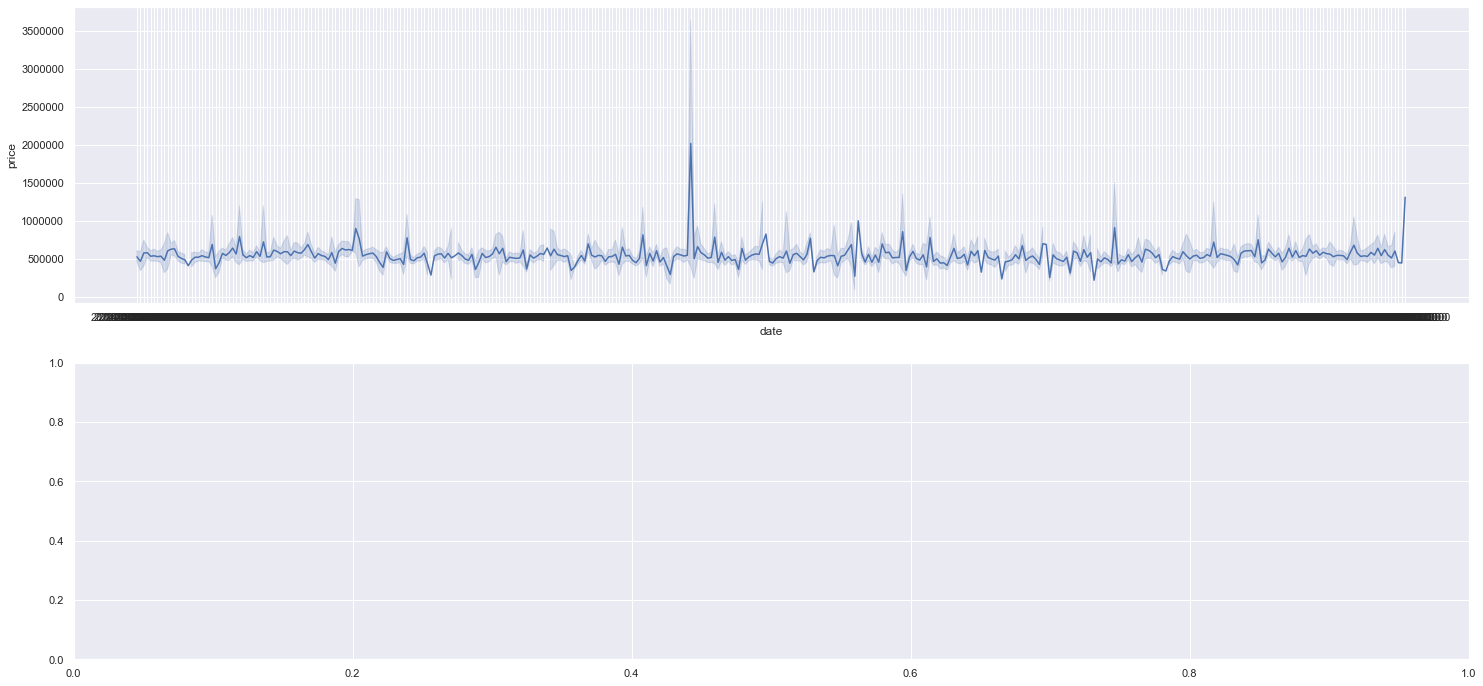

In [41]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='date', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='date', y='price', data=df3 );

# 3.3. Multivariate Analysis

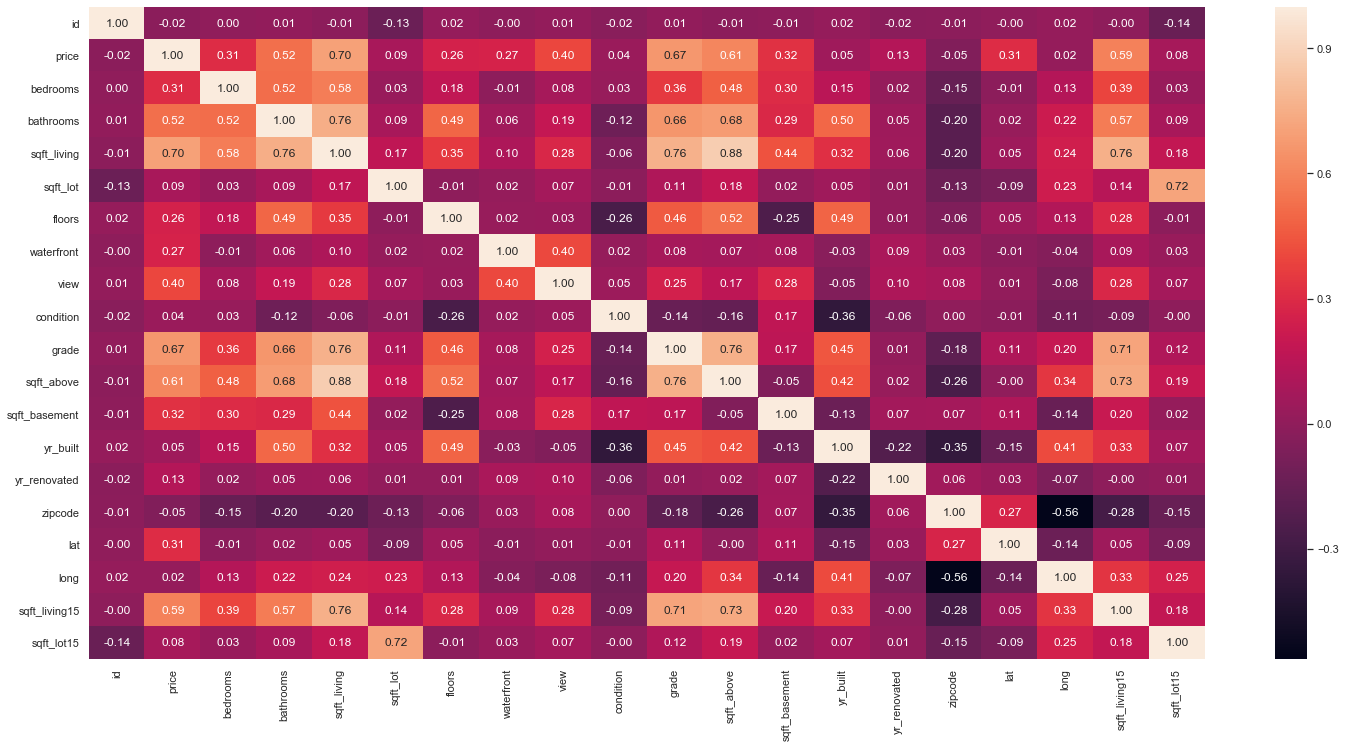

In [23]:
corr = num_attributes.corr()
sns.heatmap( corr, annot=True, fmt=".2f" )

plt.show()

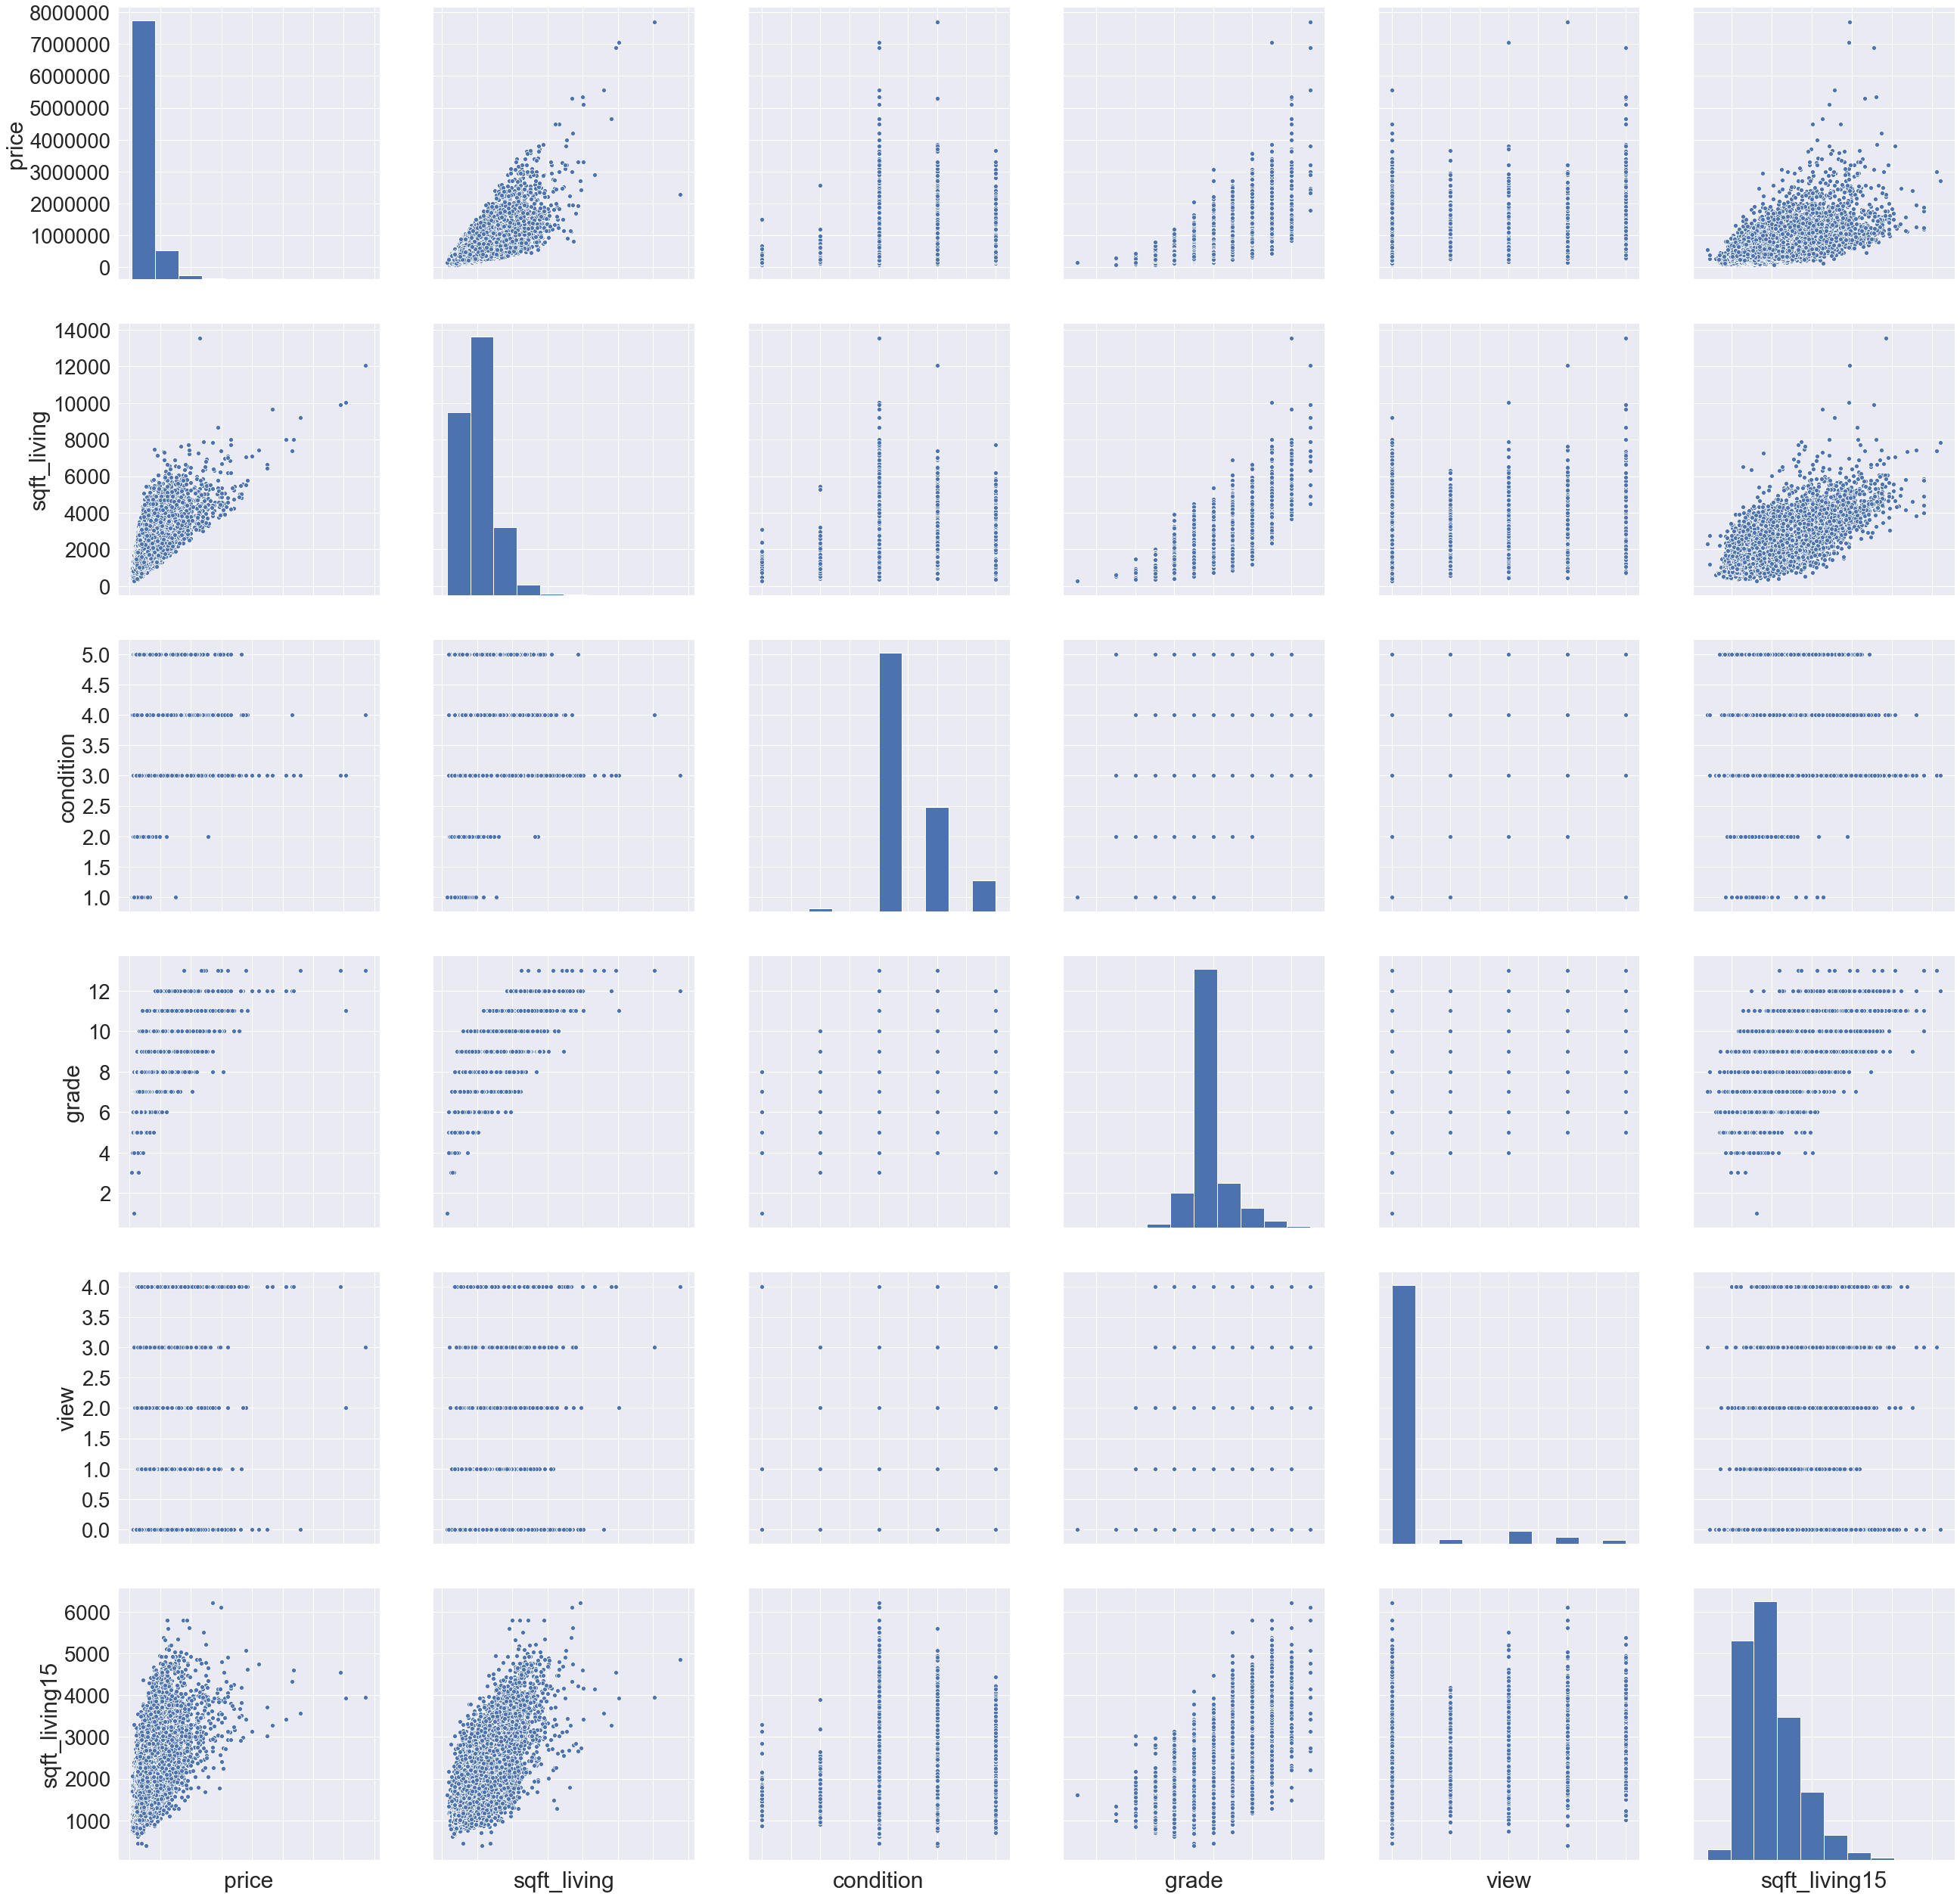

In [25]:
with sns.plotting_context("notebook", font_scale=2.5):
    pair = sns.pairplot(df3[[ 'price', 'sqft_living', 'condition', 'grade', 'view', 'view' ]],
                       palette='tab20', size=6)

pair.set(xticklabels=[]);

#I choose some variables that has high correlation with price to pairplot comparation